In [4]:
# import the required module
import pandas as pd

In [8]:
df = pd.read_csv('Bharti_Cleared_May_1st_to_31st_2017_TT.csv', encoding='ISO-8859-1', engine='c')

C:\Users\esapgup\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (96) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# Count the number of rows and columns in the DataFrame
numbers_rows, numbers_columns = df.shape
print('No of rows are {}'.format(numbers_rows))
print('No of columns are {}'.format(numbers_columns))

No of rows are 195875
No of columns are 10


In [7]:
# dtype of each column
print(df.dtypes)

Row Labels                                   object
Count of Total Restoration Time - TT SLA    float64
Unnamed: 2                                  float64
Unnamed: 3                                  float64
Unnamed: 4                                  float64
Unnamed: 5                                  float64
Unnamed: 6                                  float64
Unnamed: 7                                   object
Unnamed: 8                                   object
Unnamed: 9                                  float64
dtype: object


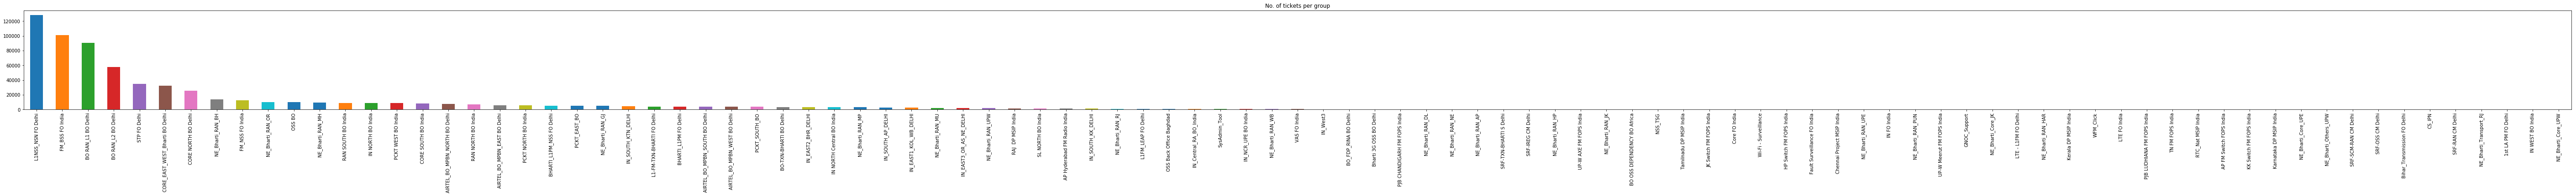

In [61]:
# Checking the number of tickets assigned to each group
tickets_per_group_count = df['Assign to Group Name - TT'].value_counts()
# plot the bar graph for visualization
ticket_per_group_plot = tickets_per_group_count.plot(kind='bar', figsize=(100,4), title='No. of tickets per group')
plt.savefig('tickets per group.jpg')

In [51]:
# deep dive into the above analysis
# find the mean value of the ticket_per_group  

tickets_per_group_average = tickets_per_group_count.mean()
print('Mean value of ticket_per_group_count {}'.format(tickets_per_group_average))

Mean value of ticket_per_group_count 6744.131313131313


L1NSS_NSN FO Delhi                128115
FM_BSS FO India                   101108
BO RAN_L1 BO Delhi                 90482
BO RAN_L2 BO Delhi                 57976
STP FO Delhi                       34563
CORE_EAST_WEST_Bharti BO Delhi     32530
CORE NORTH BO Delhi                25525
NE_Bharti_RAN_BH                   13855
FM_NSS FO India                    12476
NE_Bharti_RAN_OR                   10367
OSS BO                             10135
NE_Bharti_RAN_MH                    9657
RAN SOUTH BO India                  8974
IN NORTH BO India                   8953
PCKT WEST BO India                  8806
CORE SOUTH BO India                 7941
AIRTEL_BO_MPBN_NORTH BO Delhi       7822
RAN NORTH BO India                  7239
Name: Assign to Group Name - TT, dtype: int64


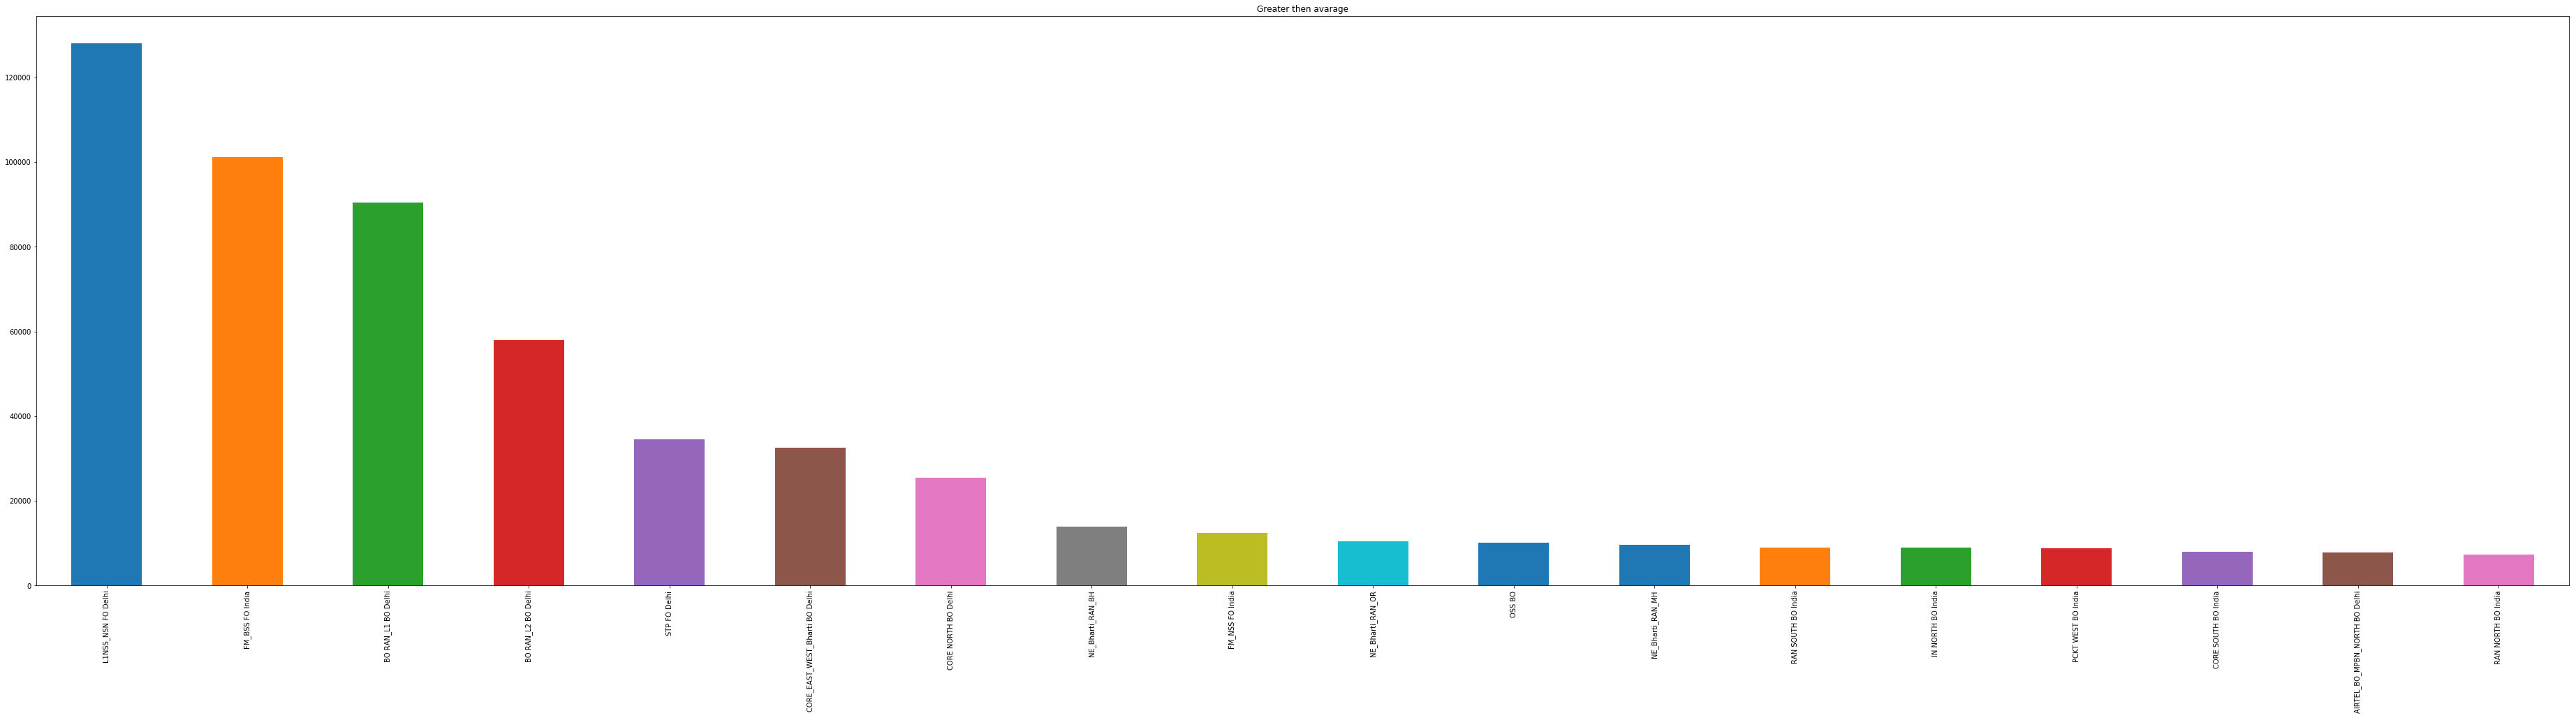

In [65]:
# find the group having tickets greater then 6744 and plotting them
tickets_per_group_greater_then_average = tickets_per_group_count[tickets_per_group_count > tickets_per_group_average]
print(tickets_per_group_greater_then_average)
tickets_per_group_greater_then_average.plot(kind='bar', figsize=(65,15), title='Greater then avarage')
plt.savefig('tickets per group more than avg.jpg')

In [18]:
# Now lets see no of Major and Minor tickets with respect to each group
group_ticket_priority_with_per_region_tickets = df.groupby(['Assign to Group Name - TT','Latest Priority - TT'])['Latest Priority - TT'].count()
print(group_ticket_priority_with_per_region_tickets)

Assign to Group Name - TT      Latest Priority - TT 
1st LA PM FO Delhi             Major                        1
AIRTEL_BO_MPBN_EAST BO Delhi   Critical                   463
                               Major                     4006
                               Minor                      787
                               Non-service affecting      512
AIRTEL_BO_MPBN_NORTH BO Delhi  Critical                   591
                               Major                     5498
                               Minor                      495
                               Non-service affecting     1238
AIRTEL_BO_MPBN_SOUTH BO Delhi  Critical                   418
                               Major                     2490
                               Minor                      520
                               Non-service affecting      470
AIRTEL_BO_MPBN_WEST BO Delhi   Critical                   277
                               Major                     2700
                 

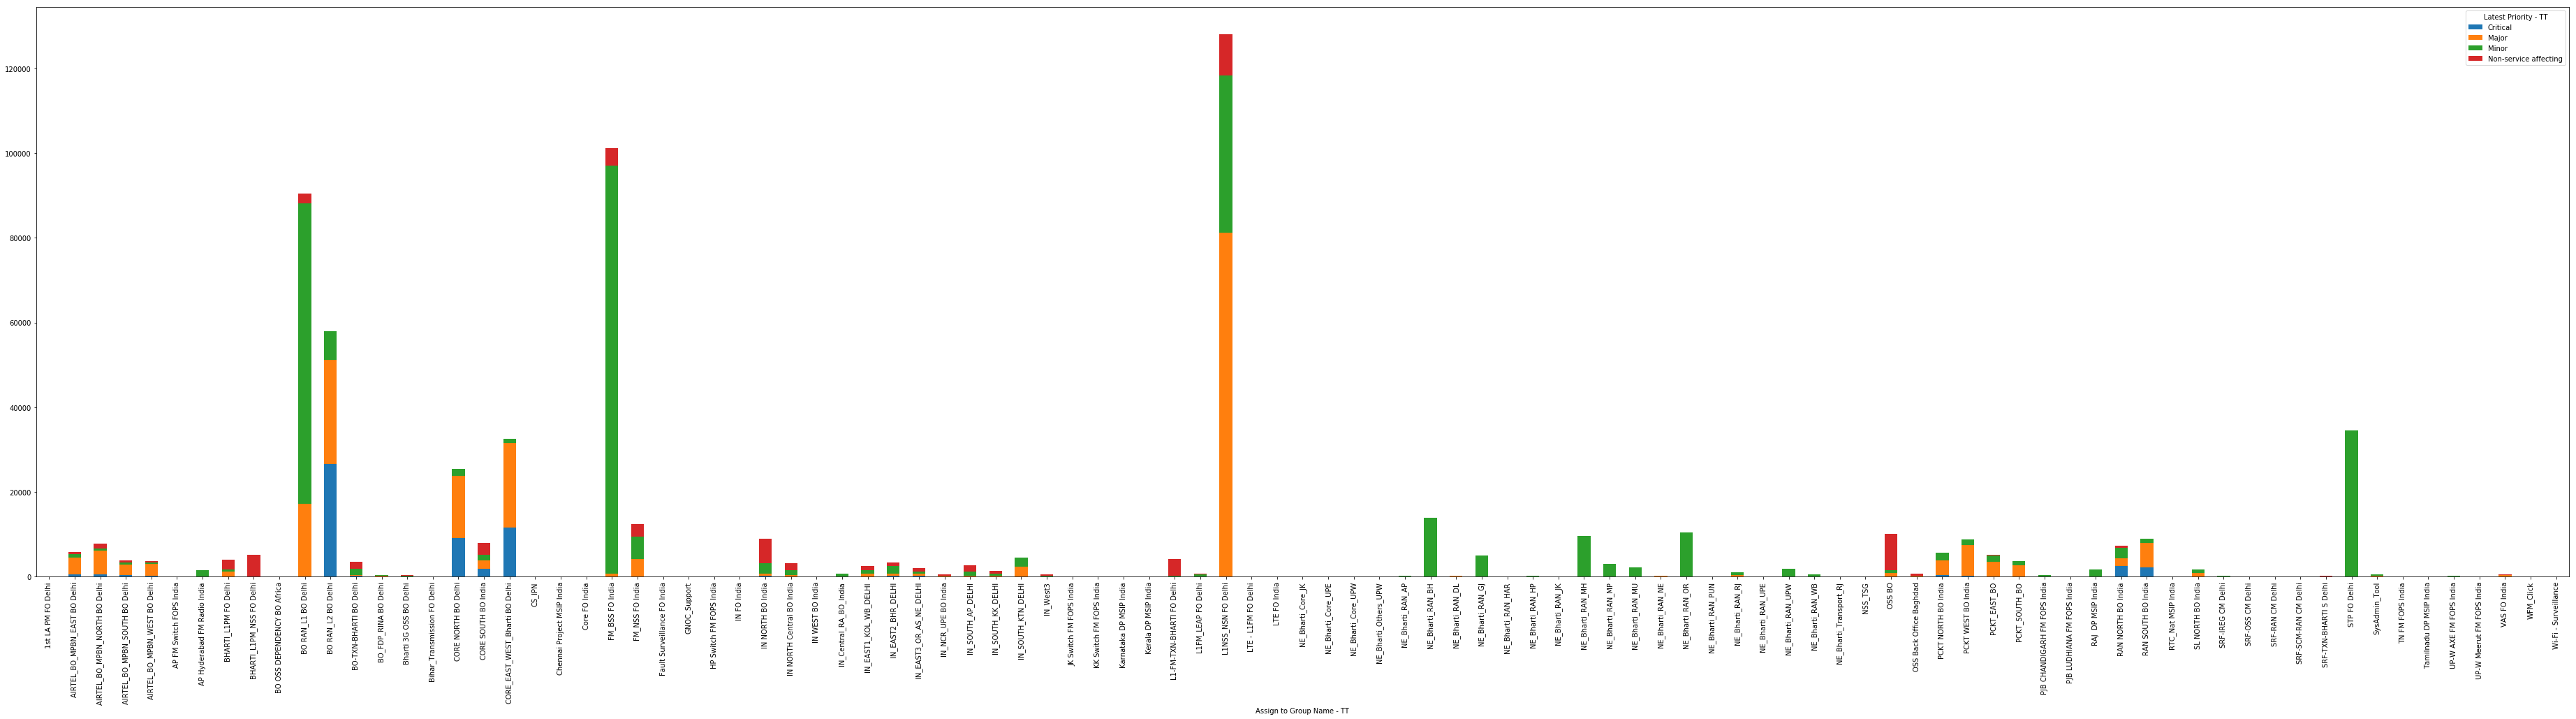

In [67]:
import matplotlib.pyplot as plt
# plot the stacked bar graph of the groupby object
df.groupby(['Assign to Group Name - TT','Latest Priority - TT']).size().unstack().plot(kind='bar', stacked=True, figsize=(65,15))
plt.savefig('test_image.jpg')data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAADmkAAAQFCAYAAADgjc0OAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzs3Xu0l3WdL/D3A9uE8DIirlI4M2CnJi57s9EtGBgqKGY6O3VQgUzR6WKjkuNI4TAjhIeWRzFc5DRWRmrjBYa8YlNmp52SNAjDlggYL0fGYSREdAimMMDn/BHuI4FcHjbuoNdrLZbP73v5fD/Pz99/e73XtyjLMgAAAAAAAAAAAAAAAAAA7J52bd0AAAAAAAAAAAAAAAAAAMC+SEgTAAAAAAAAAAAAAAAAAKACIU0AAAAAAAAAAAAAAAAAgAqENAEAAAAAAAAAAAAAAAAAKhDSBAAAAAAAAAAAAAAAAACoQEgTAAAAAAAAAAAAAAAAAKACIU0AAAAAAAAAAAAAAAAAgAqENAEAAAAAAAAAAAAAAAAAKhDSBAAAAAAAAAAAAAAAAACooKatG2htXbp0Kbt3797WbQAAAAAAAAAAAAAAAAAA+6gFCxa8UpblETtbt9+FNLt375758+e3dRsAAAAAAAAAAAAAAAAAwD6qKIp/35V17fZ2IwAAAAAAAAAAAAAAAAAA+yMhTQAAAAAAAAAAAAAAAACACoQ0AQAAAAAAAAAAAAAAAAAqqGnrBgAAAAAAAAAAAAAAAABgT23cuDErVqzIhg0b2roV9iEdOnRIt27dcsABB1TaL6QJAAAAAAAAAAAAAAAAwD5vxYoVOfjgg9O9e/cURdHW7bAPKMsya9asyYoVK9KjR49KNdq1ck8AAAAAAAAAAAAAAAAA8I7bsGFDDj/8cAFNdllRFDn88MP36PZVIU0AAAAAAAAAAAAAAAAA9gsCmuyuPf3NCGkCAAAAAAAAAAAAAAAAAFQgpAkAAAAAAAAAAAAAAAAAu+Gggw7a5bVNTU158sknK52zfPny3H333W8717Fjx9TX16dXr1659NJL88Ybb2x37cCBA3f77Df37KiH3TV58uTU19envr4+7du3b3n+4he/uN3xadOmtcq5e1NNWzcAAAAAAAAAAAAAAAAAAPurpqamHHTQQZWCkm8GJEeNGrXd+fe9731pbm7Opk2bMmTIkDzwwAM555xzWuY3b96c9u3b71ZI9Hf37KyH3TF+/PiMHz8+yW+Drs3NzS1zEyZM2O747zs3aQIAAAAAAAAAAAAAAADAHnr44YczYMCA9OvXL6ecckpWrVqV5cuX59Zbb83UqVNTX1+fJ554IqtXr86f//mf57jjjstxxx2Xn/zkJ0mSH//4xy03SPbr1y/r1q3LuHHj8sQTT6S+vj5Tp05927NramoycODAPPfcc2lqasrJJ5+cUaNGpba2Nsn/v/mzLMuMHTs2ffr0SW1tbWbMmJEkO9zzuz18+MMf3ipEOWjQoCxatKj1v9B9hJs0AQAAAAAAAAAAAAAAAGAPnXDCCfnpT3+aoihy22235YYbbshNN92USy+9NAcddFCuvvrqJMmoUaPyV3/1VznhhBPy4osv5rTTTsvSpUszZcqU/P3f/30GDRqU9evXp0OHDrn++uszZcqUzJ49e4dn/+pXv8oPf/jDTJo0KUkyb968LF68OD169Nhq3X333Zfm5uY8/fTTeeWVV3Lcccdl8ODBO9zzuz107tw5t99+e26++eY888wzef3111NXV9cq3+G+SEgTAAAAAAAAAAAAAAAAAPbQihUrcv7552flypX5zW9+s03Y8U2PPfZYlixZ0vL5l7/8ZdatW5dBgwblqquuysc//vGcc8456dat207PfP7551NfX5+iKPKxj30sp59+epqamtK/f//tnj9nzpyMHDky7du3z3ve856ceOKJeeqpp3LIIYe87Z7fde655+a6667LjTfemOnTp2f06NE73bM/E9IEAAAAAAAAAAAAAAAAgD10xRVX5KqrrkpjY2OampoyceLE7a574403Mnfu3HTs2HGr8XHjxuWMM87Id7/73Rx//PF57LHHdnrm+973vjQ3N28z3qlTp+2uL8vybWu93Z7f9e53vzunnnpqHnzwwcycOTPz58/fZs3FF1+chQsX5qijjsp3v/vdXaq7r2rX1g0AAAAAAAAAAAAAAAAAwL5u7dq16dq1a5LkjjvuaBk/+OCDs27dupbPw4YNyy233NLy+c2Q5fPPP5/a2tp84QtfSENDQ5YtW7bN3j01ePDgzJgxI5s3b87q1avz+OOPp3///jvcs70ePvnJT2bMmDE57rjj0rlz5232fOtb30pzc/N+H9BMhDQBAAAAAAAAAAAAAAAAYLf86le/Srdu3Vr+ffnLX87EiRNz7rnn5sMf/nC6dOnSsvbP/uzPcv/996e+vj5PPPFEpk2blvnz56euri69evXKrbfemiS5+eab06dPn/Tt2zcdO3bM6aefnrq6utTU1KRv376ZOnXqHvd99tlnp66uLn379s2QIUNyww035L3vfe8O92yvh2OPPTaHHHJILr744j3uaV9X7Oh60n1RQ0NDub3rUQEAAAAAAAAAAAAAAADYfy1dujQ9e/Zs6zb+ILz00ks56aSTsmzZsrRrt+/fJbm9305RFAvKsmzY2d59/+0BAAAAAAAAAAAAAAAAgHfEnXfemQEDBmTy5Mn7RUBzT9W0dQMAAAAAAAAAAAAAAAAAwL7hwgsvzIUXXtjWbfzeEFMFAAAAAAAAAAAAAAAAAKhASBMAAAAAAAAAAAAAAAAAoAIhTQAAAAAAAAAAAAAAAACACoQ0AQAAAAAAAAAAAAAAAAAqqGnrBgAAAAAAAAAAAAAAAACgtXUf90ir1lt+/Rk7XfOLX/wiV155ZZ566qkceOCB6d69e26++eZ84AMf2GrdwIED8+STT2b58uV58sknM2rUqCTJ/Pnzc+edd2batGm73d9JJ52UKVOmpKGhYbf3Up2bNAEAAAAAAAAAAAAAAABgD5VlmbPPPjsnnXRSnn/++SxZsiRf+tKXsmrVqpY1mzdvTpI8+eSTSZLly5fn7rvvbplvaGioFNCk7QhpAgAAAAAAAAAAAAAAAMAe+tGPfpQDDjggl156actYfX19Nm/enJNPPjmjRo1KbW1tkuSggw5KkowbNy5PPPFE6uvrM3Xq1DQ1NeXMM89Mkqxfvz4XX3xxamtrU1dXl+985ztJks9+9rNpaGhI7969M2HChHf4LfldNW3dAAAAAAAAAAAAAAAAAADs6xYvXpxjjz12u3Pz5s3L4sWL06NHj63Gr7/++kyZMiWzZ89OkjQ1NbXMXXfddTn00EPzs5/9LEny2muvJUkmT56czp07Z/PmzRk6dGgWLVqUurq6vfBG7Ao3aQIAAAAAAAAAAAAAAADAXtS/f/9tApo789hjj+Wyyy5r+XzYYYclSWbOnJljjjkm/fr1y89//vMsWbKkVXtl9whpAgAAAAAAAAAAAAAAAMAe6t27dxYsWLDduU6dOu12vbIsUxTFVmMvvPBCpkyZkh/+8IdZtGhRzjjjjGzYsKFSv7QOIU0AAAAAAAAAAAAAAAAA2ENDhgzJ66+/nm984xstY0899VR+/OMfv+2egw8+OOvWrdvu3LBhw3LLLbe0fH7ttdfyy1/+Mp06dcqhhx6aVatW5Z//+Z9b7wWopKatGwAAAAAAAAAAAAAAAACA1rb8+jPe0fOKosj999+fK6+8Mtdff306dOiQ7t2756yzznrbPXV1dampqUnfvn0zevTo9OvXr2Xub//2b3PZZZelT58+ad++fSZMmJBzzjkn/fr1S+/evXP00Udn0KBB78SrsQNFWZZt3UOramhoKOfPn9/WbQAAAAAAAAAAAAAAAADwDlq6dGl69uzZ1m2wD9reb6coigVlWTbsbG+7vdYVAAAAAAAAAAAAAAAAAMB+TEgTAAAAAAAAAAAAAAAAAKACIU0AAAAAAAAAAAAAAAAAgAqENAEAAAAAAAAAAAAAAAAAKhDSBAAAAAAAAAAAAAAAAACooKatGwAAAAAAAIDfR0s/2LPVavVctrTVagEAAAAAAADw+0NIEwAAAAAAAAAAAAAAAID9z8RDW7ne2p0uKYoiF1xwQb797W8nSTZt2pQjjzwyAwYMyOzZs9923/z583PnnXdm2rRprdYu7wwhTQAAAAAAAAAAAAAAAABoBZ06dcrixYvz61//Oh07dswPfvCDdO3adaf7Ghoa0tDQsMvnbNq0KTU14oG/D9q1dQMAAAAAAAAAAAAAAAAAsL84/fTT88gjjyRJ7rnnnowcObJlbt68eRk4cGD69euXgQMH5t/+7d+SJE1NTTnzzDOTJK+++mrOOuus1NXV5fjjj8+iRYuSJBMnTsynP/3pDBs2LBdeeOE7/Fa8HSFNAAAAAAAAAAAAAAAAAGglI0aMyL333psNGzZk0aJFGTBgQMvcBz/4wTz++ONZuHBhJk2alL/5m7/ZZv+ECRPSr1+/LFq0KF/60pe2CmQuWLAgDz74YO6+++535F3YOfeZAgAAAAAAAAAAAAAAAEArqaury/Lly3PPPffkox/96FZza9euzUUXXZRnn302RVFk48aN2+yfM2dOvvOd7yRJhgwZkjVr1mTt2rVJksbGxnTs2HHvvwS7zE2aAAAAAAAAAAAAAAAAANCKGhsbc/XVV2fkyJFbjf/d3/1dTj755CxevDgPP/xwNmzYsM3esiy3GSuKIknSqVOnvdMwlQlpAgAAAAAAAAAAAAAAAEAruuSSS3LttdemtrZ2q/G1a9ema9euSZLbb799u3sHDx6cu+66K0nS1NSULl265JBDDtmr/VJdTVs3AAAAAAAAAAAAAAAAAACtbuLaNju6W7du+dznPrfN+Oc///lcdNFF+fKXv5whQ4ZsNffmbZkTJ07MxRdfnLq6urz73e/OHXfc8Y70TDVCmgAAAAAAAAAAAAAAAADQCtavX7/N2EknnZSTTjopSfKhD30ozzzzTMvcddddlyRZs2ZNOnfunCTp3LlzHnzwwW3qTJw4sfUbZo8JaQIAAAAAAAAAAAAAAABAG3nooYcyfvz4TJ8+va1boQIhTQAAAAAAAAAAAAAAAABoI42NjWlsbGzrNqioXVs3AAAAAAAAAAAAAAAAAACwLxLSBAAAAAAAAAAAAAAAAACoQEgTAAAAAAAAAAAAAAAAAKACIU0AAAAAAAAAAAAAAAAAgApq2roBAAAAAAAAAAAAAAAAAGhttXfUtmq9n130s52uKYoiF1xwQb797W8nSTZt2pQjjzwyAwYMyOzZs/PQQw9lyZIlGTduXKv2RtsR0gQAAAAAAAAAAAAAAACAVtCpU6csXrw4v/71r9OxY8f84Ac/SNeuXVvmGxsb09jYuMfnbN68Oe3bt9/jOuy5dm3dAAAAAAAAAAAAAAAAAADsL04//fQ88sgjSZJ77rknI0eObJm7/fbbc/nllydJRo8enTFjxmTgwIE5+uijM2vWrCRJWZYZO3Zs+vTpk9ra2syYMSNJ0tTUlJNPPjmjRo1KbW3r3hJKdUKaAAAAAAAAAAAAAAAAANBKRowYkXvvvTcbNmzIokWLMmDAgLddu3LlysyZMyezZ8/OuHHjkiT33Xdfmpub8/TTT+exxx7L2LFjs3LlyiTJvHnzMnny5CxZsuQdeRd2TkgTAAAAAAAAAAAAAAAAAFpJXV1dli9fnnvuuScf/ehHd7j2rLPOSrt27dKrV6+sWrUqSTJnzpyMHDky7du3z3ve856ceOKJeeqpp5Ik/fv3T48ePfb6O7Dratq6AQAAAAAAAAAAAAAAAADYnzQ2Nubqq69OU1NT1qxZ87brDjzwwJbnsiy3+u/2dOrUqfWapFW4SRMAAAAAAAAAAAAAAAAAWtEll1ySa6+9NrW1tbu9d/DgwZkxY0Y2b96c1atX5/HHH0///v33Qpe0BjdpAgAAAAAAAAAAAAAAALDf+dlFP2uzs7t165bPfe5zlfaeffbZmTt3bvr27ZuiKHLDDTfkve99b5YtW9bKXdIaih1dfbovamhoKOfPn9/WbQAAAAAAALCPW/rBnq1Wq+eypa1WCwAAAAAAANi+pUuXpmfP1vs7H384tvfbKYpiQVmWDTvb226vdQUAAAAAAAAAAAAAAAAAsB8T0gQAAAAAAAAAAAAAAAAAqEBIEwAAAAAAAAAAAAAAAACgAiFNAAAAAAAAAAAAAAAAAIAKhDQBAAAAAAAAAAAAAAAAACoQ0gQAAAAAAAAAAAAAAAAAqKCmrRsAAAAAAAAAAAAAAAAAgNa29IM9W7Vez2VLd7qmKIpcddVVuemmm5IkU6ZMyfr16zNx4sRW7aW1vPTSSxkzZkxmzZq1V+q//vrrOeOMM/LKK6/kmmuuyVFHHZVLL700BxxwQObOnZuOHTvucq0HHnggH/jAB9KrV68kybXXXpvBgwfnlFNO2Su97yo3aQIAAAAAAAAAAAAAAABAKzjwwANz33335ZVXXmnrVlps3rz5beeOOuqovRbQTJKFCxdm48aNaW5uzvnnn5+77rorV199dZqbm3croJn8NqS5ZMmSls+TJk1q84BmIqQJAAAAAAAAAAAAAAAAAK2ipqYmn/70pzN16tRt5v793/89Q4cOTV1dXYYOHZoXX3wxSTJ69OiMGTMmAwcOzNFHH/22ocl/+qd/Sp8+fdK3b98MHjw4yW8DmGPHjs1xxx2Xurq6fO1rX0uSNDU15eSTT86oUaNSW1ubL3zhC/nqV7/aUmvixIm56aabsnz58vTp06el1tVXX53a2trU1dXlK1/5SpJkwYIFOfHEE3PsscfmtNNOy8qVK7fp7eGHH86AAQPSr1+/nHLKKVm1alVefvnlXHDBBWlubk59fX2+9rWvZebMmZk0aVI+/vGPJ0luvPHGlt4nTJjQUu/OO+9MXV1d+vbtm0984hN58skn89BDD2Xs2LGpr6/P888/n9GjR7d8V927d8+ECRNyzDHHpLa2NsuWLUuSrF69OqeeemqOOeaYfOYzn8mf/MmftHqAtqZVqwEAAAAAAAAAAAAAAADAH7DLLrssdXV1+fznP7/V+OWXX54LL7wwF110UaZPn54xY8bkgQceSJKsXLkyc+bMybJly9LY2Jjhw4dvU3fSpEn5/ve/n65du+a//uu/kiTf/OY3c+ihh+app57K66+/nkGDBmXYsGFJknnz5mXx4sXp0aNHFi5cmCuvvDJ/+Zd/mSSZOXNmvve97+WNN95oqf/1r389L7zwQhYuXJiampq8+uqr2bhxY6644oo8+OCDOeKIIzJjxoyMHz8+06dP36q3E044IT/96U9TFEVuu+223HDDDbnpppty2223ZcqUKZk9e3aSZO7cuTnzzDMzfPjwPProo3n22Wczb968lGWZxsbGPP744zn88MMzefLk/OQnP0mXLl3y6quvpnPnzmlsbGzZuz1dunTJv/7rv+arX/1qpkyZkttuuy1f/OIXM2TIkFxzzTX53ve+l69//etV/pfukJAmAAAAAAAAAAAAAAAAALSSQw45JBdeeGGmTZuWjh07tozPnTs39913X5LkE5/4xFYhzrPOOivt2rVLr169smrVqu3WHTRoUEaPHp3zzjsv55xzTpLk0UcfzaJFi1pulFy7dm2effbZvOtd70r//v3To0ePJEm/fv3y8ssv56WXXsrq1atz2GGH5Y//+I+zfPnylvqPPfZYLr300tTU/DZ22Llz5yxevDiLFy/OqaeemuS3t20eeeSR2/S2YsWKnH/++Vm5cmV+85vftJy7I48++mgeffTR9OvXL0myfv36PPvss3n66aczfPjwdOnSpaWPXfHmd3Lssce2fM9z5szJ/fffnyT5yEc+ksMOO2yXau0OIU0AAAAAAAAAAAAAAAAAaEVXXnlljjnmmFx88cVvu6YoipbnAw88sOW5LMskyfjx4/PII48kSZqbm3PrrbfmX/7lX/LII4+kvr4+zc3NKcsyX/nKV3LaaadtVbupqSmdOnXaamz48OGZNWtWfvGLX2TEiBHb9FOW5VY9vTnWu3fvzJ07d4fve8UVV+Sqq65KY2NjmpqaMnHixB2uf7P2Nddck8985jNbjU+bNm2bPnbFm99h+/bts2nTppYz9rZ2e/0EAAAAAAAAAAAAAAAAAPgD0rlz55x33nn55je/2TI2cODA3HvvvUmSu+66KyeccMIOa0yePDnNzc1pbm5Okjz//PMZMGBAJk2alC5duuQ//uM/ctppp+Uf/uEfsnHjxiTJM888k//+7//ebr0RI0bk3nvvzaxZszJ8+PBt5ocNG5Zbb721JeD46quv5k//9E+zevXqlpDmxo0b8/Of/3ybvWvXrk3Xrl2TJHfccccO3+tNp512WqZPn57169cnSf7zP/8zL7/8coYOHZqZM2dmzZo1LX0kycEHH5x169btUu03nXDCCZk5c2aS397c+dprr+3W/l3hJk0AAAAAAAAAAAAAAAAA9js9ly1t0/P/+q//OrfcckvL52nTpuWSSy7JjTfemCOOOCLf+ta3dqve2LFj8+yzz6YsywwdOjR9+/ZNXV1dli9fnmOOOSZlWeaII47IAw88sN39vXv3zrp169K1a9cceeSR28x/8pOfzDPPPJO6uroccMAB+dSnPpXLL788s2bNypgxY7J27dps2rQpV155ZXr37r3V3okTJ+bcc89N165dc/zxx+eFF17Y6fsMGzYsS5cuzYc+9KEkyUEHHZR//Md/TO/evTN+/PiceOKJad++ffr165fbb789I0aMyKc+9alMmzYts2bN2qXvbMKECRk5cmRmzJiRE088MUceeWQOPvjgXdq7q4p34rrOd1JDQ0M5f/78tm4DAAAAAACAfdzSD/ZstVpt/cdfAAAAAAAA+EOwdOnS9OzZen/nY9/3+uuvp3379qmpqcncuXPz2c9+tuVm0rfa3m+nKIoFZVk27OwMN2kCAAAAAAAAAAAAAAAAAPudF198Meedd17eeOONvOtd78o3vvGNVj9DSBMAAAAAAAAAAAAAAAAA2O+8//3vz8KFC/fqGe32anUAAAAAAAAAAAAAAAAAeIeUZdnWLbCP2dPfjJAmAAAAAAAAAAAAAAAAAPu8Dh06ZM2aNYKa7LKyLLNmzZp06NChco2aVuwHAAAAAAAAAAAAAAAAANpEt27dsmLFiqxevbqtW2Ef0qFDh3Tr1q3yfiFNAAAAAAAAAAAAAAAAAPZ5BxxwQHr06NHWbfAHpt3OFhRFMb0oipeLolj8lrEbi6JYVhTFoqIo7i+K4o/eMndNURTPFUXxb0VRnPaW8Y9sGXuuKIpxbxnvURTFvxRF8WxRFDOKonjXlvEDt3x+bst899Z6aQAAAAAAAAAAAAAAAACAPbXTkGaS25N85HfGfpCkT1mWdUmeSXJNkhRF0SvJiCS9t+z5alEU7YuiaJ/k75OcnqRXkpFb1ibJ/04ytSzL9yd5LclfbBn/iySvlWX5P5NM3bIOAAAAAAAAAAAAAAAAAOD3wk5DmmVZPp7k1d8Ze7Qsy01bPv40Sbctzx9Lcm9Zlq+XZflCkueS9N/y77myLP9vWZa/SXJvko8VRVEkGZJk1pb9dyQ56y217tjyPCvJ0C3rAQAAAAAAAAAAAAAAAADa3K7cpLkzlyT55y3PXZP8x1vmVmwZe7vxw5P811sCn2+Ob1Vry/zaLeu3URTFp4uimF8UxfzVq1fv8QsBAAAAAAAAAAAAAAAAAOzMHoU0i6IYn2RTkrveHNrOsrLC+I5qbTtYll8vy7KhLMuGI444YsdNAwAAAAAAAAAAAAAAAAC0gpqqG4uiuCjJmUmGlmX5ZnhyRZL/8ZZl3ZK8tOV5e+OvJPmjoihqttyW+db1b9ZaURRFTZJDk7xatV8AAAAAAAAAAAAAAAAAgNZU6SbNoig+kuQLSRrLsvzVW6YeSjKiKIoDi6LokeT9SeYleSrJ+4ui6FEUxbuSjEjy0JZw54+SDN+y/6IkD76l1kVbnocn+T9vCYMCAAAAAAAAAAAAAAAAALSpnd6kWRTFPUlOStKlKIoVSSYkuSbJgUl+UBRFkvy0LMtLy7L8eVEUM5MsSbIpyWVlWW7eUufyJN9P0j7J9LIsf77liC8kubcoiv+VZGGSb24Z/2aSbxdF8Vx+e4PmiFZ4XwAAAAAAAAAAAAAAAACAVlHsb5dTNjQ0lPPnz2/rNgAAAAAAANjHLf1gz1ar1XPZ0larBQAAAAAAAMDeVxTFgrIsG3a2rt070QwAAAAAAAAAAAAAAAAAwP5GSBMAAAAAAAAAAAAAAAAAoAIhTQAAAAAAAAAAAAAAAACACoQ0AQAAAAAAAAAAAAAAAAAqqGnrBgAAAAAAAOD30XnXtN6f0n7WapUAAAAAAAAA+H3iJk0AAAAAAAAAAAAAAAAAgAqENAEAAAAAAAAAAAAAAAAAKhDSBAAAAAAAAAAAAAAAAACoQEgTAAAAAAAAAAAAAAAAAKACIU0AAAAAAAAAAAAAAAAAgAqENAEAAAAAAAAAAAAAAAAAKhDSBAAAAAAAAAAAAAAAAACoQEgTAAAAAAAAAAAAAAAAAKACIU0AAAAAAAAAAAAAAAAAgAqENAEAAAAAAAAAAAAAAAAAKhDSBAAAAAAAAAAAAAAAAACoQEgTAAAAAAAAAAAAAAAAAKACIU0AAAAAAAAAAAAAAAAAgAqENAEAAAAAAAAAAAAAAAAAKhDSBAAAAAAAAAAAAAAAAACoQEgTAAAAAAAAAAAAAAAAAKACIU0AAAAAAAAAAAAAAAAAgAqENAEAAAAAAAAAAAAAAAAAKhDSBAAAAAAAAAAAAAAAAACoQEgTAAAAAAAAAAAAAAAAAKACIU0AAAAAAAAAAAAAAAAAgAqENAEAAAAAAAAAAAAAAAAAKhDSBAAAAAAAAAAAAAAAAACoQEgTAAAAAAAAAAAAAAAAAKACIU0AAAAAAAAAAAAAAAAAgAqENAEAAAAAAAAAAAAAAAAAKhDSBAAAAAAAAAAAAAAAAACoQEgTAAAAAAAAAAAAAAAAAKACIU0AAAAAAAAAAAC8+9hiAAAgAElEQVQAAAAAgAqENAEAAAAAAAAAAAAAAAAAKhDSBAAAAAAAAAAAAAAAAACoQEgTAAAAAAAAAAAAAAAAAKACIU0AAAAAAAAAAAAAAAAAgAqENAEAAAAAAAAAAAAAAAAAKhDSBAAAAAAAAAAAAAAAAACoQEgTAAAAAAAAAAAAAAAAAKACIU0AAAAAAAAAAAAAAAAAgAqENAEAAAAAAAAAAAAAAAAAKhDSBAAAAAAAAAAAAAAAAACoQEgTAAAAAAAAAAAAAAAAAKACIU0AAAAAAAAAAAAAAAAAgAqENAEAAAAAAAAAAAAAAAAAKhDSBAAAAAAAAAAAAAAAAACoQEgTAAAAAAAAAAAAAAAAAKACIU0AAAAAAAAAAAAAAAAAgAqENAEAAAAAAAAAAAAAAAAAKhDSBAAAAAAAAAAAAAAAAACoQEgTAAAAAAAAAAAAAAAAAKACIU0AAAAAAAAAAAAAAAAAgAqENAEAAAAAAAAAAAAAAAAAKhDSBAAAAAAAAAAAAAAAAACoQEgTAAAAAAAAAAAAAAAAAKACIU0AAAAAAAAAAAAAAAAAgAqENAEAAAAAAAAAAAAAAAAAKhDSBAAAAAAAAAAAAAAAAACoQEgTAAAAAAAAAAAAAAAAAKACIU0AAAAAAAAAAAAAAAAAgAqENAEAAAAAAAAAAAAAAAAAKhDSBAAAAAAAAAAAAAAAAACoQEgTAAAAAAAAAAAAAAAAAKACIU0AAAAAAAAAAAAAAAAAgAqENAEAAAAAAAAAAAAAAAAAKhDSBAAAAAAAAAAAAAAAAACoQEgTAAAAAAAAAAAAAAAAAKACIU0AAAAAAAAAAAAAAAAAgAqENAEAAAAAAAAAAAAAAAAAKhDSBAAAAAAAAAAAAAAAAACoQEgTAAAAAAAAAAAAAAAAAKACIU0AAAAAAAAAAAAAAAAAgAqENAEAAAAAAAAAAAAAAAAAKhDSBAAAAAAAAAAAAAAAAACoQEgTAAAAAAAAAAAAAAAAAKACIU0AAAAAAAAAAAAAAAAAgAqENAEAAAAAAAAAAAAAAAAAKhDSBAAAAAAAAAAAAAAAAACoQEgTAAAAAAAAAAAAAAAAAKACIU0AAAAAAAAAAAAAAAAAgAqENAEAAAAAAAAAAAAAAAAAKhDSBAAAAAAAAAAAAAAAAACoQEgTAAAAAAAAAAAAAAAAAKACIU0AAAAAAAAAAAAAAAAAgAqENAEAAAAAAAAAAAAAAAAAKhDSBAAAAAAAAAAAAAAAAACoQEgTAAAAAID/x979hGp213cc/3zNxb9gjToVTYQGOmCsKx1icCVGdNKNLqrEjUMJBMQiuDOrAf+AgiAIVggYjC6MIoKCKSFooZvWOm2hMY0lg4E4NejQSaVQqkZ+LuYIl8mduZnPXHkieb3g4TnP9/zO75y7Gmbx5gAAAAAAAAAAAAWRJgAAAAAAAAAAAAAAAABAQaQJAAAAAAAAAAAAAAAAAFAQaQIAAAAAAAAAAAAAAAAAFESaAAAAAAAAAAAAAAAAAAAFkSYAAAAAAAAAAAAAAAAAQEGkCQAAAAAAAAAAAAAAAABQEGkCAAAAAAAAAAAAAAAAABREmgAAAAAAAAAAAAAAAAAABZEmAAAAAAAAAAAAAAAAAEBBpAkAAAAAAAAAAAAAAAAAUBBpAgAAAAAAAAAAAAAAAAAURJoAAAAAAAAAAAAAAAAAAAWRJgAAAAAAAAAAAAAAAABAQaQJAAAAAAAAAAAAAAAAAFAQaQIAAAAAAAAAAAAAAAAAFESaAAAAAAAAAAAAAAAAAAAFkSYAAAAAAAAAAAAAAAAAQEGkCQAAAAAAAAAAAAAAAABQEGkCAAAAAAAAAAAAAAAAABT2dv0AAAAAz0ePvuHmI9nn5h8/eiT7AAAAAAAAAAAAAABXz5s0AQAAAAAAAAAAAAAAAAAKIk0AAAAAAAAAAAAAAAAAgIJIEwAAAAAAAAAAAAAAAACgcGikOTP3zswvZuZH+2avnJmHZuax7fv6bT4z8/mZOTsz/z4zb953zalt/WMzc2rf/C0z8/B2zednZq50DwAAAAAAAAAAAAAAAACA54Jn8ybNLyc5ecnsY0m+t9Y6nuR72+8kuT3J8e1zV5IvJheDyySnk7w1yS1JTu+LLr+4rf39dScPuQcAAAAAAAAAAAAAAAAAwM4dGmmutf4hyYVLxu9Jct92fF+S9+6bf2Vd9E9JXjEzr03y7iQPrbUurLWeSvJQkpPbuZevtf5xrbWSfOWSvQ66BwAAAAAAAAAAAAAAAADAzj2bN2ke5DVrrSeTZPv+021+Q5Kf7lt3bptdaX7ugPmV7vEMM3PXzJyZmTPnz58v/yQAAAAAAAAAAAAAAAAAgGevjTQvZw6YrWJ+VdZa96y1Tqy1Thw7duxqLwcAAAAAAAAAAAAAAAAAuGptpPnzmXltkmzfv9jm55K8ft+6G5P87JD5jQfMr3QPAAAAAAAAAAAAAAAAAICdayPN7yQ5tR2fSvLtffMPzkW3JvnlWuvJJA8medfMXD8z1yd5V5IHt3P/OzO3zswk+eAlex10DwAAAAAAAAAAAAAAAACAnds7bMHMfC3J25O8embOJTmd5NNJvjEzdyZ5Isn7tuUPJPnLJGeT/F+Sv06StdaFmflEkh9u6z6+1rqwHX8oyZeTvCTJ322fXOEeAAAAAAAAAAAAAAAAAAA7d2ikudb6wGVO3XbA2pXkw5fZ594k9x4wP5PkTQfM//ugewAAAAAAAAAAAAAAAAAAPBe8YNcPAAAAAAAAAAAAAAAAAADwx0ikCQAAAAAAAAAAAAAAAABQEGkCAAAAAAAAAAAAAAAAABREmgAAAAAAAAAAAAAAAAAABZEmAAAAAAAAAAAAAAAAAEBBpAkAAAAAAAAAAAAAAAAAUBBpAgAAAAAAAAAAAAAAAAAURJoAAAAAAAAAAAAAAAAAAAWRJgAAAAAAAAAAAAAAAABAQaQJAAAAAAAAAAAAAAAAAFAQaQIAAAAAAAAAAAAAAAAAFESaAAAAAAAAAAAAAAAAAACFvV0/AAAAwPPR++8+mv+OPXwkuwAAAAAAAAAAAAAADW/SBAAAAAAAAAAAAAAAAAAoiDQBAAAAAAAAAAAAAAAAAAoiTQAAAAAAAAAAAAAAAACAgkgTAAAAAAAAAAAAAAAAAKAg0gQAAAAAAAAAAAAAAAAAKIg0AQAAAAAAAAAAAAAAAAAKIk0AAAAAAAAAAAAAAAAAgIJIEwAAAAAAAAAAAAAAAACgINIEAAAAAAAAAAAAAAAAACiINAEAAAAAAAAAAAAAAAAACiJNAAAAAAAAAAAAAAAAAICCSBMAAAAAAAAAAAAAAAAAoCDSBAAAAAAAAAAAAAAAAAAoiDQBAAAAAAAAAAAAAAAAAAoiTQAAAAAAAAAAAAAAAACAgkgTAAAAAAAAAAAAAAAAAKAg0gQAAAAAAAAAAAAAAAAAKIg0AQAAAAAAAAAAAAAAAAAKIk0AAAAAAAAAAAAAAAAAgIJIEwAAAAAAAAAAAAAAAACgINIEAAAAAAAAAAAAAAAAACiINAEAAAAAAAAAAAAAAAAACiJNAAAAAAAAAAAAAAAAAICCSBMAAAAAAAAAAAAAAAAAoCDSBAAAAAAAAAAAAAAAAAAoiDQBAAAAAAAAAAAAAAAAAAoiTQAAAAAAAAAAAAAAAACAgkgTAAAAAAAAAAAAAAAAAKAg0gQAAAAAAAAAAAAAAAAAKIg0AQAAAAAAAAAAAAAAAAAKIk0AAAAAAAAAAAAAAAAAgIJIEwAAAAAAAAAAAAAAAACgINIEAAAAAAAAAAAAAAAAACiINAEAAAAAAAAAAAAAAAAACiJNAAAAAAAAAAAAAAAAAICCSBMAAAAAAAAAAAAAAAAAoCDSBAAAAAAAAAAAAAAAAAAoiDQBAAAAAAAAAAAAAAAAAAoiTQAAAAAAAAAAAAAAAACAwt6uHwAADvPoG24+sr1u/vGjR7YXAAAAAAAAAAAAAAAAz2/epAkAAAAAAAAAAAAAAAAAUBBpAgAAAAAAAAAAAAAAAAAURJoAAAAAAAAAAAAAAAAAAAWRJgAAAAAAAAAAAAAAAABAQaQJAAAAAAAAAAAAAAAAAFAQaQIAAAAAAAAAAAAAAAAAFESaAAAAAAAAAAAAAAAAAAAFkSYAAAAAAAAAAAAAAAAAQEGkCQAAAAAAAAAAAAAAAABQEGkCAAAAAAAAAAAAAAAAABREmgAAAAAAAAAAAAAAAAAABZEmAAAAAAAAAAAAAAAAAEBBpAkAAAAAAAAAAAAAAAAAUNjb9QMAwGHef/fR/XP18JHtBAAAAAAAAAAAAAAAwPOdN2kCAAAAAAAAAAAAAAAAABREmgAAAAAAAAAAAAAAAAAABZEmAAAAAAAAAAAAAAAAAEBBpAkAAAAAAAAAAAAAAAAAUBBpAgAAAAAAAAAAAAAAAAAURJoAAAAAAAAAAAAAAAAAAAWRJgAAAAAAAAAAAAAAAABAQaQJAAAAAAAAAAAAAAAAAFAQaQIAAAAAAAAAAAAAAAAAFESaAAAAAAAAAAAAAAAAAAAFkSYAAAAAAAAAAAAAAAAAQEGkCQAAAAAAAAAAAAAAAABQEGkCAAAAAAAAAAAAAAAAABREmgAAAAAAAAAAAAAAAAAABZEmAAAAAAAAAAAAAAAAAEBBpAkAAAAAAAAAAAAAAAAAUBBpAgAAAAAAAAAAAAAAAAAURJoAAAAAAAAAAAAAAAAAAAWRJgAAAAAAAAAAAAAAAABAQaQJAAAAAAAAAAAAAAAAAFAQaQIAAAAAAAAAAAAAAAAAFESaAAAAAAAAAAAAAAAAAAAFkSYAAAAAAAAAAAAAAAAAQEGkCQAAAAAAAAAAAAAAAABQEGkCAAAAAAAAAAAAAAAAABREmgAAAAAAAAAAAAAAAAAABZEmAAAAAAAAAAAAAAAAAEBBpAkAAAAAAAAAAAAAAAAAUBBpAgAAAAAAAAAAAAAAAAAURJoAAAAAAAAAAAAAAAAAAAWRJgAAAAAAAAAAAAAAAABAQaQJAAAAAAAAAAAAAAAAAFAQaQIAAAAAAAAAAAAAAAAAFESaAAAAAAAAAAAAAAAAAAAFkSYAAAAAAAAAAAAAAAAAQEGkCQAAAAAAAAAAAAAAAABQEGkCAAAAAAAAAAAAAAAAABREmgAAAAAAAAAAAAAAAAAABZEmAAAAAAAAAAAAAAAAAEBBpAkAAAAAAAAAAAAAAAAAUBBpAgAAAAAAAAAAAAAAAAAU9nb9AAAAAAAAAPBc9PDjT+z6EQAAAAAAAAB4jvMmTQAAAAAAAAAAAAAAAACAgkgTAAAAAAAAAAAAAAAAAKAg0gQAAAAAAAAAAAAAAAAAKFxTpDkzH52ZR2bmRzPztZl58czcNDM/mJnHZubrM/PCbe2Ltt9nt/N/tm+fu7f5f87Mu/fNT26zszPzsWt5VgAAAAAAAAAAAAAAAACAo1RHmjNzQ5KPJDmx1npTkuuS3JHkM0k+t9Y6nuSpJHdul9yZ5Km11p8n+dy2LjPzxu26v0hyMsnfzsx1M3Ndki8kuT3JG5N8YFsLAAAAAAAAAAAAAAAAALBz1/QmzSR7SV4yM3tJXprkySTvSPLN7fx9Sd67Hb9n+53t/G0zM9v8/rXWr9Zajyc5m+SW7XN2rfWTtdavk9y/rQUAAAAAAAAAAAAAAAAA2Lk60lxr/VeSzyZ5IhfjzF8m+Zck/7PWenpbdi7JDdvxDUl+ul379Lb+Vfvnl1xzufkzzMxdM3NmZs6cP3++/ZMAAAAAAAAAAAAAAAAAAJ61OtKcmetz8c2WNyV5XZKXJbn9gKXr95dc5tzVzp85XOuetdaJtdaJY8eOHfboAAAAAAAAAAAAAAAAAADXrI40k7wzyeNrrfNrrd8k+VaStyV5xczsbWtuTPKz7fhcktcnyXb+T5Jc2D+/5JrLzQEAAAAAAAAAAAAAAAAAdu5aIs0nktw6My+dmUlyW5L/SPL3Sf5qW3Mqybe34+9sv7Od//5aa23zO2bmRTNzU5LjSf45yQ+THJ+Zm2bmhUnu2NYCAAAAAAAAAAAAAAAAAOzc3uFLDrbW+sHMfDPJvyZ5Osm/JbknyXeT3D8zn9xmX9ou+VKSr87M2Vx8g+Yd2z6PzMw3cjHwfDrJh9dav02SmfmbJA8muS7JvWutR9rnBQAAAAAAAAAAAAAAAAA4SnWkmSRrrdNJTl8y/kmSWw5Y+/9J3neZfT6V5FMHzB9I8sC1PCMAAAAAAAAAAAAAAAAAwB/CC3b9AAAAAAAAAAAAAAAAAAAAf4xEmgAAAAAAAAAAAAAAAAAABZEmAAAAAAAAAAAAAAAAAEBBpAkAAAAAAAAAAAAAAAAAUBBpAgAAAAAAAAAAAAAAAAAURJoAAAAAAAAAAAAAAAAAAAWRJgAAAAAAAAAAAAAAAABAQaQJAAAAAAAAAAAAAAAAAFAQaQIAAAAAAAAAAAAAAAAAFESaAAAAAAAAAAAAAAAAAAAFkSYAAAAAAAAAAAAAAAAAQEGkCQAAAAAAAAAAAAAAAABQEGkCAAAAAAAAAAAAAAAAABREmgAAAAAAAAAAAAAAAAAABZEmAAAAAAAAAAAAAAAAAEBBpAkAAAAAAAAAAAAAAAAAUBBpAgAAAAAAAAAAAAAAAAAURJoAAAAAAAAAAAAAAAAAAAWRJgAAAAAAAAAAAAAAAABAQaQJAAAAAAAAAAAAAAAAAFAQaQIAAAAAAAAAAAAAAAAAFESaAAAAAAAAAAAAAAAAAAAFkSYAAAAAAAAAAAAAAAAAQEGkCQAAAAAAAAAAAAAAAABQEGkCAAAAAAAAAAAAAAAAABREmgAAAAAAAAAAAAAAAAAABZEmAAAAAAAAAAAAAAAAAEBBpAkAAAAAAAAAAAAAAAAAUBBpAgAAAAAAAAAAAAAAAAAURJoAAAAAAAAAAAAAAAAAAAWRJgAAAAAAAAAAAAAAAABAQaQJAAAAAAAAAAAAAAAAAFAQaQIAAAAAAAAAAAAAAAAAFESaAAAAAAAAAAAAAAAAAAAFkSYAAAAAAAAAAAAAAAAAQEGkCQAAAAAAAAAAAAAAAABQEGkCAAAAAAAAAAAAAAAAABREmgAAAAAAAAAAAAAAAAAABZEmAAAAAAAAAAAAAAAAAEBBpAkAAAAAAAAAAAAAAAAAUBBpAgAAAAAAAAAAAAAAAAAURJoAAAAAAAAAAAAAAAAAAAWRJgAAAAAAAAAAAAAAAABAQaQJAAAAAAAAAAAAAAAAAFAQaQIAAAAAAAAAAAAAAAAAFESaAAAAAAAAAAAAAAAAAAAFkSYAAAAAAAAAAAAAAAAAQEGkCQAAAAAAAAAAAAAAAABQEGkCAAAAAAAAAAAAAAAAABREmgAAAAAAAAAAAAAAAAAABZEmAAAAAAAAAAAAAAAAAEBBpAkAAAAAAAAAAAAAAAAAUBBpAgAAAAAAAAAAAAAAAAAURJoAAAAAAAAAAAAAAAAAAAWRJgAAAAAAAAAAAAAAAABAQaQJAAAAAAAAAAAAAAAAAFAQaQIAAAAAAAAAAAAAAAAAFESaAAAAAAAAAAAAAAAAAAAFkSYAAAAAAAAAAAAAAAAAQEGkCQAAAAAAAAAAAAAAAABQEGkCAAAAAAAAAAAAAAAAABREmgAAAAAAAAAAAAAAAAAABZEmAAAAAAAAAAAAAAAAAEBBpAkAAAAAAAAAAAAAAAAAUBBpAgAAAAAAAAAAAAAAAAAURJoAAAAAAAAAAAAAAAAAAAWRJgAAAAAAAAAAAAAAAABAQaQJAAAAAAAAAAAAAAAAAFAQaQIAAAAAAAAAAAAAAAAAFESaAAAAAAAAAAAAAAAAAAAFkSYAAAAAAAAAAAAAAAAAQEGkCQAAAAAAAAAAAAAAAABQEGkCAAAAAAAAAAAAAAAAABREmgAAAAAAAAAAAAAAAAAABZEmAAAAAAAAAAAAAAAAAEBBpAkAAAAAAAAAAAAAAAAAUBBpAgAAAAAAAAAAAAAAAAAURJoAAAAAAAAAAAAAAAAAAAWRJgAAAAAAAAAAAAAAAABAQaQJAAAAAAAAAAAAAAAAAFAQaQIAAAAAAAAAAAAAAAAAFESaAAAAAAAAAAAAAAAAAAAFkSYAAAAAAAAAAAAAAAAAQEGkCQAAAAAAAAAAAAAAAABQEGkCAAAAAAAAAAAAAAAAABREmgAAAAAAAAAAAAAAAAAABZEmAAAAAAAAAAAAAAAAAEBBpAkAAAAAAAAAAAAAAAAAUBBpAgAAAAAAAAAAAAAAAAAURJoAAAAAAAAAAAAAAAAAAAWRJgAAAAAAAAAAAAAAAABAQaQJAAAAAAAAAAAAAAAAAFAQaQIAAAAAAAAAAAAAAAAAFESaAAAAAAAAAAAAAAAAAAAFkSYAAAAAAAAAAAAAAAAAQEGkCQAAAAAAAAAAAAAAAABQEGkCAAAAAAAAAAAAAAAAABREmgAAAAAAAAAAAAAAAAAABZEmAAAAAAAAAAAAAAAAAEBBpAkAAAAAAAAAAAAAAAAAUBBpAgAAAAAAAAAAAAAAAAAURJoAAAAAAAAAAAAAAAAAAAWRJgAAAAAAAAAAAAAAAABAQaQJAAAAAAAAAAAAAAAAAFAQaQIAAAAAAAAAAAAAAAAAFESaAAAAAAAAAAAAAAAAAAAFkSYAAAAAAAAAAAAAAAAAQEGkCQAAAAAAAAAAAAAAAABQEGkCAAAAAAAAAAAAAAAAABREmgAAAAAA8Dv27vDl9/qu4/jrPa9cozA1zoZ4BI0OlXWIuYMzBt1I0KNFxxsNHJEXQzgwLBYE5bojbA3qTiuhBJm2YyxMLFDCJeK2e5t5yrELdwoPGnrQ5oHjTBprWO9unK/jIi/Pae/ftX7nwOMBF9f3+/5+vp/rc/0BT74AAAAAAAAAADAg0gQAAAAAAAAAAAAAAAAAGBBpAgAAAAAAAAAAAAAAAAAMrBRpVtXFVfVwVf1zVR2rql+oqkur6omqem75fcmytqrq7qo6XlVfr6prtu2zuax/rqo2t80/UFVbyzt3V1Wtcl4AAAAAAAAAAAAAAAAAgN2y6pc0/zTJ33f3Tyf5+STHktyZ5Mnu3pfkyeU+SW5Ksm/5OZzkniSpqkuT3JXkg0muTXLXW2HnsubwtvcOrnheAAAAAAAAAAAAAAAAAIBdMY40q+qiJL+Y5L4k6e7vdve3khxKcmRZdiTJLcv1oSQP9GlfTXJxVV2W5MYkT3T3qe5+LckTSQ4uzy7q7q90dyd5YNteAAAAAAAAAAAAAAAAAABrtcqXNH8iyckkf1FVz1TVZ6vqR5K8r7tfSZLl93uX9ZcneWnb+yeW2ZnmJ3aYAwAAAAAAAAAAAAAAAACs3SqR5kaSa5Lc093vT/IfSe48w/raYdaD+ds3rjpcVUer6ujJkyfPfGoAAAAAAAAAAAAAAAAAgF2wSqR5IsmJ7n5quX84p6PNb1bVZUmy/H512/ortr2/N8nLZ5nv3WH+Nt19b3cf6O4De/bsWeFfAgAAAAAAAAAAAAAAAAD4vxlHmt39b0leqqqfWkbXJ/lGkkeTbC6zzSSPLNePJrmtTrsuyevd/UqSx5PcUFWXVNUlSW5I8vjy7I2quq6qKslt2/YCAAAAAAAAAAAAAAAAAFirjRXf/60kn6+qC5M8n+SjOR1+PlRVtyd5McmHl7WPJbk5yfEk317WprtPVdWnkjy9rPtkd59arj+W5HNJ3pPkC8sPAAAAAAAAAAAAAAAAAMDarRRpdvfXkhzY4dH1O6ztJHe8wz73J7l/h/nRJD+3yhkBAAAAAAAAAAAAAAAAAH4Q3rXuAwAAAAAAAAAAAAAAAAAAnI9EmgAAAAAAAAAAAAAAAAAAAyJNAAAAAAAAAAAAAAAAAIABkSYAAAAAAAAAAAAAAAAAwIBIEwAAAAAAAAAAAAAAAABgQKQJAAAAAAAAAAAAAAAAADAg0gQAAAAAAAAAAAAAAAAAGNhY9wEA4Hy0/8j+Xdlna3NrV/YBAAAAAAAAAAAAAADg/58vaQIAAAAAAAAAAAAAAAAADIg0AQAAAAAAAAAAAAAAAAAGRJoAAAAAAAAAAAAAAAAAAAMiTQAAAAAAAAAAAAAAAACAAZEmAAAAAAAAAAAAAAAAAMCASBMAAAAAAAAAAAAAAAAAYECkCQAAAAAAAAAAAAAAAAAwINIEAAAAAAAAAAAAAAAAABgQaQIAAAAAAAAAAAAAAAAADIg0AQAAAAAAAAAAAAAAAAAGRJoAAAAAAAAAAAAAAAAAAAMiTQAAAAAAAAAAAAAAAACAAZEmAAAAAAAAAAAAAAAAAMCASBMAAAAAAAAAAAAAAAAAYECkCQAAAAAAAAAAAAAAAAAwINIEAAAAAAAAAAAAAAAAABgQaQIAAAAAAAAAAAAAAAAADIg0AQAAAAAAAAAAAAAAAAAGRJoAAAAAAAAAAAAAAAAAAAMiTQAAAAAAAAAAAAAAAACAAZEmAAAAAAAAAAAAAAAAAMCASBMAAAAAAAAAAAAAAAAAYECkCQAAAAAAAAAAAAAAAAAwINIEAAAAAAAAAAAAAAAAABgQaQIAAAAAAAAAAAAAAAAADIg0AQAAAAAAAAAAAAAAAAAGRJoAAAAAAAAAAAAAAAAAAAMiTQAAAAAAAAAAAAAAAACAAZEmAAAAAAAAAAAAAAAAAMCASBMAAAAAAAAAAAAAAAAAYECkCQAAAAAAAAAAAAAAAAAwINIEAAAAAAAAAAAAAAAAABgQaQIAAAAAAAAAAAAAAAAADIg0AQAAAAAAAAAAAAAAAAAGRJoAAAAAAAAAAAAAAAAAAAMiTQAAAAAAAAAAAAAAAACAAZEmAAAAAAAAAAAAAAAAAMCASBMAAAAAAAAAAAAAAAAAYECkCQAAAAAAAAAAAAAAAAAwINIEAAAAAAAAAAAAAAAAABjYWPcBAOB8tPXCi+s+AgAAAAAAAAAAAAAAAGvmS5oAAAAAAAAAAAAAAEYPbIkAACAASURBVAAAAAMiTQAAAAAAAAAAAAAAAACAAZEmAAAAAAAAAAAAAAAAAMCASBMAAAAAAAAAAAAAAAAAYECkCQAAAAAAAAAAAAAAAAAwINIEAAAAAAAAAAAAAAAAABgQaQIAAAAAAAAAAAAAAAAADIg0AQAAAAAAAAAAAAAAAAAGRJoAAAAAAAAAAAAAAAAAAAMiTQAAAAAAAAAAAAAAAACAAZEmAAAAAAAAAAAAAAAAAMCASBMAAAAAAAAAAAAAAAAAYECkCQAAAAAAAAAAAAAAAAAwINIEAAAAAAAAAAAAAAAAABgQaQIAAAAAAAAAAAAAAAAADIg0AQAAAAAAAAAAAAAAAAAGRJoAAAAAAAAAAAAAAAAAAAMiTQAAAAAAAAAAAAAAAACAAZEmAAAAAAAAAAAAAAAAAMCASBMAAAAAAAAAAAAAAAAAYECkCQAAAAAAAAAAAAAAAAAwINIEAAAAAAAAAAAAAAAAABgQaQIAAAAAAAAAAAAAAAAADIg0AQAAAAAAAAAAAAAAAAAGRJoAAAAAAAAAAAAAAAAAAAMiTQAAAAAAAAAAAAAAAACAAZEmAAAAAAAAAAAAAAAAAMCASBMAAAAAAAAAAAAAAAAAYECkCQAAAAAAAAAAAAAAAAAwINIEAAAAAAAAAAAAAAAAABgQaQIAAAAAAAAAAAAAAAAADIg0AQAAAAAAAAAAAAAAAAAGRJoAAAAAAAAAAAAAAAAAAAMiTQAAAAAAAAAAAAAAAACAAZEmAAAAAAAAAAAAAAAAAMCASBMAAAAAAAAAAAAAAAAAYECkCQAAAAAAAAAAAAAAAAAwINIEAAAAAAAAAAAAAAAAABgQaQIAAAAAAAAAAAAAAAAADIg0AQAAAAAAAAAAAAAAAAAGRJoAAAAAAAAAAAAAAAAAAAMiTQAAAAAAAAAAAAAAAACAAZEmAAAAAAAAAAAAAAAAAMCASBMAAAAAAAAAAAAAAAAAYECkCQAAAAAAAAAAAAAAAAAwINIEAAAAAAAAAAAAAAAAABgQaQIAAAAAAAAAAAAAAAAADIg0AQAAAAAAAAAAAAAAAAAGRJoAAAAAAAAAAAAAAAAAAAMiTQAAAAAAAAAAAAAAAACAAZEmAAAAAAAAAAAAAAAAAMCASBMAAAAAAAAAAAAAAAAAYECkCQAAAAAAAAAAAAAAAAAwINIEAAAAAAAAAAAAAAAAABgQaQIAAAAAAAAAAAAAAAAADIg0AQAAAAAAAAAAAAAAAAAGRJoAAAAAAAAAAAAAAAAAAAMiTQAAAAAAAAAAAAAAAACAAZEmAAAAAAAAAAAAAAAAAMCASBMAAAAAAAAAAAAAAAAAYECkCQAAAAAAAAAAAAAAAAAwINIEAAAAAAAAAAAAAAAAABgQaQIAAAAAAAAAAAAAAAAADIg0AQAAAAAAAAAAAAAAAAAGVo40q+qCqnqmqv5uub+qqp6qqueq6q+r6sJl/u7l/vjy/Mpte3ximf9LVd24bX5wmR2vqjtXPSsAAAAAAAAAAAAAAAAAwG7ZjS9pfjzJsW33f5TkM929L8lrSW5f5rcnea27fzLJZ5Z1qaqrk9ya5GeTHEzy50v4eUGSP0tyU5Krk3xkWQsAAAAAAAAAAAAAAAAAsHYrRZpVtTfJLyf57HJfSX4pycPLkiNJblmuDy33WZ5fv6w/lOTB7v7P7n4hyfEk1y4/x7v7+e7+bpIHl7UAAAAAAAAAAAAAAAAAAGu36pc0/yTJ7yb57+X+x5N8q7vfXO5PJLl8ub48yUtJsjx/fVn/vfn/eued5m9TVYer6mhVHT158uSK/xIAAAAAAAAAAAAAAAAAwNmNI82q+pUkr3b3P24f77C0z/Ls+52/fdh9b3cf6O4De/bsOcOpAQAAAAAAAAAAAAAAAAB2x8YK734oya9W1c1JfjjJRTn9Zc2Lq2pj+Vrm3iQvL+tPJLkiyYmq2kjyY0lObZu/Zfs77zQHAAAAAAAAAAAAAAAAAFir8Zc0u/sT3b23u69McmuSL3b3ryf5UpJfW5ZtJnlkuX50uc/y/Ivd3cv81qp6d1VdlWRfkn9I8nSSfVV1VVVduPyNR6fnBQAAAAAAAAAAAAAAAADYTat8SfOd/F6SB6vqD5I8k+S+ZX5fkr+squM5/QXNW5Oku5+tqoeSfCPJm0nu6O7/SpKq+s0kjye5IMn93f3sD+C8AAAAAAAAAAAAAAAAAADft12JNLv7y0m+vFw/n+TaHdZ8J8mH3+H9Tyf59A7zx5I8thtnBAAAAAAAAAAAAAAAAADYTe9a9wEAAAAAAAAAAAAAAAAAAM5HIk0AAAAAAAAAAAAAAAAAgAGRJgAAAAAAAAAAAAAAAADAgEgTAAAAAAAAAAAAAAAAAGBApAkAAAAAAAAAAAAAAAAAMCDSBAAAAAAAAAAAAAAAAAAYEGkCAAAAAAAAAAAAAAAAAAyINAEAAAAAAAAAAAAAAAAABkSaAAAAAAAAAAAAAAAAAAADIk0AAAAAAAAAAAAAAAAAgAGRJgAAAAAAAAAAAAAAAADAgEgTAAAAAAAAAAAAAAAAAGBApAkAAAAAAAAAAAAAAAAAMCDSBAAAAAAAAAAAAAAAAAAYEGkCAAAAAAAAAAAAAAAAAAyINAEAAAAAAAAAAAAAAAAABkSaAAAAAAAAAAAAAAAAAAADIk0AAAAAAAAAAAAAAAAAgAGRJgAAAAAAAAAAAAAAAADAgEgTAAAAAAAAAAAAAAAAAGBApAkAAAAAAAAAAAAAAAAAMCDSBAAAAAAAAAAAAAAAAAAYEGkCAAAAAAAAAAAAAAAAAAyINAEAAAAAAAAAAAAAAAAABkSaAAAAAAAAAAAAAAAAAAADIk0AAAAAAAAAAAAAAAAAgAGRJgAAAAAAAAAAAAAAAADAwMa6DwAAAAAAAAAAAAAAAACce/Yf2b9re21tbu3aXgDnEl/SBAAAAAAAAAAAAAAAAAAYEGkCAAAAAAAAAAAAAAAAAAyINAEAAAAAAAAAAAAAAAAABkSaAAAAAAAAAAAAAAAAAAADIk0AAAAAAAAAAAAAAAAAgAGRJgAAAAAAAAAAAAAAAADAgEgTAAAAAAAAAAAAAAAAAGBApAkAAAAAAAAAAAAAAAAAMCDSBAAAAAAAAAAAAAAAAAAYEGkCAAAAAAAAAAAAAAAAAAyINAEAAAAAAAAAAAAAAAAABjbWfQAAADjf7D+yf1f22drc2pV9AAAAAAAAAAAAAABYD1/SBAAAAAAAAAAAAAAAAAAYEGkCAAAAAAAAAAAAAAAAAAyINAEAAAAAAAAAAAAAAAAABkSaAAAAAAAAAAAAAAAAAAADIk0AAAAAAAAAAAAAAAAAgIGNdR8AAADON1svvLjuIwAAAAAAAAAAAAAAcA7wJU0AAAAAAAAAAAAAAAAAgAGRJgAAAAAAAAAAAAAAAADAgEgTAAAAAAAAAAAAAAAAAGBApAkAAAAAAAAAAAAAAAAAMCDSBAAAAAAAAAAAAAAAAAAYEGkCAAAAAAAAAAAAAAAAAAyINAEAAAAAAAAAAAAAAAAABkSaAAAAAAAAAAAAAAAAAAADIk0AAAAAAAAAAAAAAAAAgAGRJgAAAAAAAAAAAAAAAADAgEgTAAAAAAAAAAAAAAAAAGBApAkAAAAAAAAAAAAAAAAAMCDSBAAAAAAAAAAAAAAAAAAYEGkCAAAAAAAAAAAAAAAAAAyINAEAAAAAAAAAAAAAAAAABkSaAAAAAAAAAAAAAAAAAAADIk0AAAAAAAAAAAAAAAAAgAGRJgAAAAAAAAAAAAAAAADAgEgTAAAAAAAAAAAAAAAAAGBApAkAAAAAAAAAAAAAAAAAMCDSBAAAAAAAAAAAAAAAAAAYEGkCAAAAAAAAAAAAAAAAAAyINAEAAAAAAAAAAAAAAAAABkSaAAAAAAAAAAAAAAAAAAADIk0AAAAAAAAAAAAAAAAAgAGRJgAAAAAAAAAAAAAAAADAgEgTAAAAAAAAAAAAAAAAAGBApAkAAAAAAAAAAAAAAAAAMCDSBAAAAAAAAAAAAAAAAAAY2Fj3AQDgfHTld/5qV/b5113ZBQAAAAAAAAAAAAAAgHXwJU0AAAAAAAAAAAAAAAAAgAGRJgAAAAAAAAAAAAAAAADAgEgTAAAAAAAAAAAAAAAAAGBApAkAAAAAAAAAAAAAAAAAMCDSBAAAAAAAAAAAAAAAAAAYEGkCAAAAAAAAAAAAAAAAAAxsrPsAAACcO/Yf2b9re21tbu3aXgAAAAAAAAAAAAAAcC7yJU0AAAAAAAAAAAAAAAAAgAGRJgAAAAAAAAAAAAAAAADAgEgTAAAAAAAAAAAAAAAAAGBApAkAAAAAAAAAAAAAAAAAMCDSBAAAAAAAAAAAAAAAAAAYEGkCAAAAAAAAAAAAAAAAAAyINAEAAAAAAAAAAAAAAAAABkSaAAAAAAAAAAAAAAAAAAADIk0AAAAAAAAAAAAAAAAAgIGNdR8AAIBzx9YLL677CAAAAAAAAAAAAAAAcN7wJU0AAAAAAAAAAAAAAAAAgAGRJgAAAAAAAAAAAAAAAADAgEgTAAAAAAAAAAAAAAAAAGBApAkAAAAAAAAAAAAAAAAAMCDSBAAAAAAAAAAAAAAAAAAYEGkCAAAAAAAAAAAAAAAAAAyINAEAAAAAAAAAAAAAAAAABkSaAAAAAAAAAAAAAAAAAAADIk0AAAAAAAAAAAAAAAAAgAGRJgAAAAAAAAAAAAAAAADAgEgTAAAAAAAAAAAAAAAAAGBApAkAAAAAAAAAAAAAAAAAMCDSBAAAAAAAAAAAAAAAAAAYEGkCAAAAAAAAAAAAAAAAAAyINAEAAAAAAAAAAAAAAAAABkSaAAAAAAAAAAAAAAAAAAADIk0AAAAAAAAAAAAAAAAAgAGRJgAAAAAAAAAAAAAAAADAgEgTAAAAAAAAAAAAAAAAAGBgHGlW1RVV9aWqOlZVz1bVx5f5pVX1RFU9t/y+ZJlXVd1dVcer6utVdc22vTaX9c9V1ea2+Qeqamt55+6qqlX+WQAAAAAAAAAAAAAAAACA3bLKlzTfTPI73f0zSa5LckdVXZ3kziRPdve+JE8u90lyU5J9y8/hJPckp6POJHcl+WCSa5Pc9VbYuaw5vO29gyucFwAAAAAAAAAAAAAAAABg14wjze5+pbv/abl+I8mxJJcnOZTkyLLsSJJblutDSR7o076a5OKquizJjUme6O5T3f1akieSHFyeXdTdX+nuTvLAtr0AAAAAAAAAAAAAAAAAANZqlS9pfk9VXZnk/UmeSvK+7n4lOR1yJnnvsuzyJC9te+3EMjvT/MQO853+/uGqOlpVR0+ePLnqvwMAAAAAAAAAAAAAAAAAcFYrR5pV9aNJ/ibJb3f3v59p6Q6zHszfPuy+t7sPdPeBPXv2nO3IAAAAAAAAAAAAAAAAAAArWynSrKofyulA8/Pd/bfL+JtVddny/LIkry7zE0mu2Pb63iQvn2W+d4c5AAAAAAAAAAAAAAAAAMDajSPNqqok9yU51t1/vO3Ro0k2l+vNJI9sm99Wp12X5PXufiXJ40luqKpLquqSJDckeXx59kZVXbf8rdu27QUAAAAAAAAAAAAAAAAAsFYbK7z7oSS/kWSrqr62zH4/yR8meaiqbk/yYpIPL88eS3JzkuNJvp3ko0nS3aeq6lNJnl7WfbK7Ty3XH0vyuSTvSfKF5Qf4H/buPNyyq6wT//dNgoAIiAoqIoOAJkAYRUAQpB1wQnGKOAZRgf45odgiKirQrQKKIuKACkSFxqEdwNbWFmhABoEwlVBRAsGo4IATKIbx/f2x90mdurm36nK9tfeq5PN5njz3nnNu7fPN2fvsYe31rgUAAAAAAAAAAAAAAADA6g5cpNndf5Kk9nj5M3b5+07yzXss66lJnrrL869McpuDZgQAAAAAAAAAAAAAAAAAOFXOWDsAAAAAAAAAAAAAAAAAAMDpSJEmAAAAAAAAAAAAAAAAAMABKNIEAAAAAAAAAAAAAAAAADgARZoAAAAAAAAAAAAAAAAAAAegSBMAAAAAAAAAAAAAAAAA4AAUaQIAAAAAAAAAAAAAAAAAHIAiTQAAAAAAAAAAAAAAAACAA1CkCQAAAAAAAAAAAAAAAABwAIo0AQAAAAAAAAAAAAAAAAAOQJEmAAAAAAAAAAAAAAAAAMABKNIEAAAAAAAAAAAAAAAAADiAs9YOAAAnc+SSS9eOAAAAAAAAAAAAAAAAAFdgJk0AAAAAAAAAAAAAAAAAgANQpAkAAAAAAAAAAAAAAAAAcACKNAEAAAAAAAAAAAAAAAAADkCRJgAAAAAAAAAAAAAAAADAASjSBAAAAAAAAAAAAAAAAAA4AEWaAAAAAAAAAAAAAAAAAAAHoEgTAAAAAAAAAAAAAAAAAOAAFGkCAAAAAAAAAAAAAAAAAByAIk0AAAAAAAAAAAAAAAAAgANQpAkAAAAAAAAAAAAAAAAAcACKNAEAAAAAAAAAAAAAAAAADkCRJgAAAAAAAAAAAAAAAADAASjSBAAAAAAAAAAAAAAAAAA4AEWaAAAAAAAAAAAAAAAAAAAHoEgTAAAAAAAAAAAAAAAAAOAAFGkCAAAAAAAAAAAAAAAAAByAIk0AAAAAAAAAAAAAAAAAgANQpAkAAAAAAAAAAAAAAAAAcACKNAEAAAAAAAAAAAAAAAAADuCstQMAAAAAAAAAACd27gXnHtqyjpx/5NCWBQAAAAAAcFVnJk0AAAAAAAAAAAAAAAAAgANQpAkAAAAAAAAAAAAAAAAAcACKNAEAAAAAAAAAAAAAAAAADkCRJgAAAAAAAAAAAAAAAADAASjSBAAAAAAAAAAAAAAAAAA4AEWaAAAAAAAAAAAAAAAAAAAHoEgTAAAAAAAAAAAAAAAAAOAAFGkCAAAAAAAAAAAAAAAAABzAWWsHAAAAYAxHzz7nUJZzzkVHD2U5AAAAAAAAAAAAADA6M2kCAAAAAAAAAAAAAAAAAByAIk0AAAAAAAAAAAAAAAAAgANQpAkAAAAAAAAAAAAAAAAAcACKNAEAAAAAAAAAAAAAAAAADuCstQMAAMDp5qaXPfNQlvOWQ1kKAAAAAAAAAAAAAABrMZMmAAAAAAAAAAAAAAAAAMABKNIEAAAAAAAAAAAAAAAAADgARZoAAAAAAAAAAAAAAAAAAAegSBMAAAAAAAAAAAAAAAAA4AAUaQIAAAAAAAAAAAAAAAAAHIAiTQAAAAAAAAAAAAAAAACAAzhr7QAAAAAAAAAAAABXNudecO6hLOfI+UcOZTkAAAAAwKlhJk0AAAAAAAAAAAAAAAAAgAMwkyYAAAAAAAAAAADAldjRs885lOWcc9HRQ1kOAAAAXJmYSRMAAAAAAAAAAAAAAAAA4AAUaQIAAAAAAAAAAAAAAAAAHMBZawcAAAAAAAAAAIBRnHvBuYe2rCPnHzm0ZQEAAAAAMCZFmgAAACRJznvE4Vwi6nIEAAAAAAAAAAAAwFXFGWsHAAAAAAAAAAAAAAAAAAA4HZlJEwCAy930smce2rLecmhLAgAAAAAAAAAAAACAMSnSBAAAAK7Ujp59zqEs55yLjh7KcgAAAAAAAADgRM694NxDW9aR848c2rIAANidIk0AAAAAAAAAAAAAGMxhFWkp0AIAADi1zlg7AAAAAAAAAAAAAAAAAADA6UiRJgAAAAAAAAAAAAAAAADAASjSBAAAAAAAAAAAAAAAAAA4AEWaAAAAAAAAAAAAAAAAAAAHcNbaAQAA4ESOnn3OoSznnIuOHspyAAAAAAAAAAAATqUjl1y6dgQAAD4IijTZ1WEVQyQKIgAAAAAAAAAAAAAAAAC4cjpj7QAAAAAAAAAAAAAAAAAAAKcjM2kCAAAAAAAAAAAAwGCOXHLp2hEAAADYB0WaAAAAAAAAAAAAAABcZR09+5xDWc45Fx09lOUAAHB6OWPtAAAAAAAAAAAAAAAAAAAApyNFmgAAAAAAAAAAAAAAAAAAB3DW2gEAAAAAAAAAAAAAAGAt5z3icLrVHzmUpQAAcLpRpMmuDutCI3GxAQAAAAAAAAAAAAAAAMCV0xlrBwAAAAAAAAAAAAAAAAAAOB0p0gQAAAAAAAAAAAAAAAAAOICz1g7AmI5ccunaEQAAAAAAAAAAAAAAAABgaGbSBAAAAAAAAAAAAAAAAAA4ADNpDuLo2eccynLOuejooSwHAAAAAAAAAAAAAAAAADgxRZoAAAAAAAAAAAAAXKWde8G5h7asI+cfObRlAQAAML4z1g4AAAAAAAAAAAAAAAAAAHA6MpPmIM57xOGsCmMvAQAAAAAAAAAAAAAAAMAyFGkCrOzo2ecc2rLOuejooS0LYBQGswAAAAAAAAAAWJ++bgAAALtTpAkAAAAAAAAAXCmce8G5h7KcI+cb+g8AAHY6rIG2E4NtAwAAVy5nrB0AAAAAAAAAAAAAAAAAAOB0pEgTAAAAAAAAAAAAAAAAAOAAzlo7AJMjl1y6dgQAAAAAgNWde8G5h7asI+cfObRlAQAAAAAAAADAbhRpAgAAAAAAAAAAAABwlWXCHQAA/jMUaQIAAJDEDQcAALiqOXr2OYeynHMuOnooywEAAAAAAACA05EiTeAqR8cjAAAAAAAAAAAAAAAA4DAo0uS0obAOAK6azOwHAAAAAAAAAJxq+icAAABwUIo04T9B4SgAAAAAAAAAAADAOs694NxDWc6R848cynIAAICrJkWaAHAloXAcAAAAAAAAAAA4Vcw2CgAAsDtFmpw2znvE4WyuhznW0YiZAAAAgKsGA7UAAAAAAAAAAACsT5EmAAAAcKU24gA7iusAAAAAAAAAAADgykGRJvwnHLnk0rUjAAAAAAAAAABXcudecO6hLOfI+Yc5FBkAAAAAAIkiTU4jCiIBAAAAAAAAAAAAAAAAGIkiTQAAAACAhRw9+5xDWc45Fx09lOUAAAAAAMDpzAQgAADACBRpAgAAAMBJHFZhXXJ4xXXnPeJwmvaOHMpSAAAAAAAA4PR108ueeSjLecuhLAUAgNONIk0AAAAAAIZh1HMAAAAAAAAAAE4nijQBAAAAAAAAAIAPyrkXnHsoyzly/pFDWQ4AAFyZHNbMnonZPQEAlqBIEwAAAAA4FEfPPudQlnPORUcPZTkAAAAAAAAAAACnmiJNALiSOO8Rh3NYN04tozmsUeHecihLAQAAAAAAAFjOYc1am5i5FgAAAOBUUaQJXOUoZAMAAAAAAAAAAABYx2ENQmAAAmxLAMAoFGkCp5SLHwAAgCsyeMzp57DWWWK9AQAAAACwPPcmAAAA4NRRpAkAAAAAcBV29OxzDmU551x09FCWAwAAAAAAAAAApxNFmsBVzpFLLl07AgAAAFwpGYn95HxGAAAAAAAAAABw5aJIEwAAAAAAAAAAgMWde8G5h7KcI+cb0goAAACA9SjSBAAAAAAAAAAAALgSO3LJpWtHAIBD5/gGAIxCkSYAAMAKNBLDcnzfTk+jjaA/4nYkE4flvEccTjOx+SqAw3D07HMOZTnnXHT0UJYDAAAAnDraAQAAALiyGL5Is6o+J8kTk5yZ5Be7+0dXjnRK3PSyZx7Kct5yKEs5vDzJ4WUCAAAAgA/GYXXwSXTyuarTWQyWo3AcAABgfKMNsgcAAFz1uC7hykpfl9PX0EWaVXVmkicn+awkf53kFVX17O5+w7rJWMNohawAoxltxprDuvhJDu8CSKdaAGAUo527AQAAAACsQVspMBKTW3BYFI0AAHBQ59z/rWtH4ICGLtJM8ilJLu7uNydJVT0ryRclUaTJEBSOAiMZbZ804s00MzEAwFXTaOdJcFhG3LZHyzRiw/WI10ojZhqN60murGzbACemU+0+/NB1D2k5/3o4y2FfbNtcaR3WPimxXwJYyIhtuKMZrd0dgBMbcXILTk8mJTk597lPT9omuTKr7l47w56q6suSfE53f+P8+GuT3KW7v2XH3z0oyYPmh5+U5M8P4e0/KsnbD2E5h0mmkxstTzJeptHyJDLtx2h5Epn2Y7Q8iUz7MVqeZLxMo+VJZNqP0fIkMu3HaHkSmfZjtDzJeJlGy5PItB+j5Ulk2o/R8iQy7cdoeZLxMo2WJ5FpP0bLk8i0H6PlSWTaj9HyJONlGi1PItN+jJYnkWk/RsuTyLQfo+VJxss0Wp5Epv0YLU8i036MlieRaT9Gy5OMl2m0PIlM+zFankSm/RgtTyLTfoyWJxkv02h5Epn2Y7Q8iUz7MVqeRKb9GC1PMl6m0fIkMu3HaHmSK3emm3T39U/2R6PPpFm7PHeFqtLufkqSpxzqG1e9srs/+TCX+Z8l08mNlicZL9NoeRKZ9mO0PIlM+zFankSm/RgtTzJeptHyJDLtx2h5Epn2Y7Q8iUz7MVqeZLxMo+VJZNqP0fIkMu3HaHkSmfZjtDzJeJlGy5PItB+j5Ulk2o/R8iQy7cdoeZLxMo2WJ5FpP0bLk8i0H6PlSWTaj9HyJONlGi1PItN+jJYnkWk/RsuTyLQfo+VJxss0Wp5Epv0YLU8i036MlieRaT9Gy5OMl2m0PIlM+zFankSm/RgtTyLTfoyWJxkv02h5Epn2Y7Q8iUxJcsZSb3RAf53k47ce3yjJW1fKAgAAAAAAAAAAAAAAAABwudGLNF+R5JZVdbOq+pAk90/y7JUzAQAAAAAAAAAAAAAAAADkrLUDnEh3v6+qviXJHyY5M8lTu/v1C739UxZ6nw+GTCc3Wp5kvEyj5Ulk2o/R8iQy7cdoeRKZ9mO0PMl4mUbLk8i0H6PlSWTaj9HyJDLtx2h5kvEyjZYnkWk/RsuTyLQfo+VJZNqP0fIk42UaLU8i036MlieRaT9Gy5PItB+j5UnGyzRankSm/RgtTyLTfoyWJ5FpP0bLk4yXabQ8iUz7MVqeRKb9GC1PItN+jJYnGS/TaHkSmfZjtDyJTPsxWp5Epv0YLU8yXqbR8iQy7cdoeRKZ9mO0PIlM+zFaU7a47QAAIABJREFUnmS8TKPlSWTaj9HyJDKlunvJ9wMAAAAAAAAAAAAAAAAAuFI4Y+0AAAAAAAAAAAAAAAAAAACnI0WaAAAAAAAAAAAAAAAAAAAHoEgTAAAAAAAAAAAAAAAAAOAAzlo7AFdUVf+lu59XVV+y2+vd/VtLZ+LkRl5vVXW9JLdMco2tPC9cK89IRlxvI2baqKrbJLlVjt+WfnmtPOytqs7u7ouq6o67vd7dr5JpPFV1r+5+QVV94W6vd/ezF87zNd39q1X1nXvkecKSeXayTzo9VdXnJ7l1jl9vj14v0Zicv+1PVd0gx39Gl64YBw7FaN9/+20A/rNcu+3PCMfckdslOX1V1XWT3DzHb9svWS8RAAAA26rq3pnaJDrJG7r7+Stm+YgTvd7d/7RUltPBCO1JfPBGXG+jteGOlofT29r9SqrqOt39jr2OcY5t7NeI29KImdi/qjo7VzzePnO9ROP1mUrGO3cbLc+Iquqjk/xwkht29+dW1a2S3K27f2mJ97/KF2lW1Xd39+Oq6kmZGhqO093ftkKseyV5XpL77vJaJ1mjaGy4z6mqfr27z6uqIzsy1RSpb7twpOHWW5JU1Tcm+fYkN0rymiR3TfLSJP9ljTxzpmsk+YZc8QDxwBXijLjeRsyUqvrBJJ+e6YTs95N8bpI/SbJ4A8iA3/8RM31nkgcl+fFdXuussw8YKlNV/WR3P7SqnpPdj227FkqeYp+V5AVJvnyX1zrJokWaSa41/7z2wu97UoPtk0bcloZUVT+X5EOT3DvJLyb5siQvXznTSOclm0xDnb9V1S2T/Eiu2CjzCWvkmTN9YabjyQ2T/H2SmyQ5mmk9rpXpV7r7a0/23IJ5hlpvo+WZM10/ycN3ybTmtdJo3//h9tuc3F6FNRtLF9jsNeDHxloDf4y2Xxqt89Feg+tsrDTwz3CZRjPosW2Ya7etTCN+TqMcc4drlxzxmruq/qS771FV78zu7YDXWTjPj3f3w6rqt7P7Z3TCc4NTqaoemORhST4uyZEkd07yskz7hTXy3Ki7/3qP1+7b3c9ZIdN1uvsde7x24xU6jf1jpnX0kiQvTvLy7n7Xkhl2yXS/JC/p7r9fM8fG3LHve5PcItN2/SN7rUN2V1UP7e6fXDvHyKrqWt397yu99x0yFde/vruPrpFhK8vtuvu1e7z2X7v7Z1fINOo17v0y75e6+w/XyLCVZee5Ryd5e5LXdPc7V4h0+WAk8+836+5Ltl77klEGI6mqM5Pcv7ufscJ73/hEr68xQOJJ2krevfR+cjMg8fz71bv73Vuv3bW7X7Zknvl9r9fd/7z0+34wqupDM11//2V3/8PaeUZUVR+X5Mz54Vu7+30Lv/dvJbksyYWZrmvPq6rHJvni7v6bpbJsuTDTsaOS3DjJP8+/f3iSS5PcbIVM2pP2n+k2Sb470+fUSd6Q5Me7+3Ur57pZjhUiH+3uN6+YZcT1NlQb7mh55kxD9SsZ7R7XRlXdNcmTkpyT5EMyHd/+fen20q08o/QreWaSL8jxx7iNTrL4ehu0JmCoTKPdB5gNty2NmKmqTritdPdPLZVl22jnk1X1/Uk+O8nZSf4wyX0yHW9XK9Icrc/UnGmoc7fR8mxU1aO7+we2Hp+Z5Je7+6tXivT0JE9L8n3z479I8mtJFinSrO4rHMeuUjY3Xavq/N1e7+4Lls40ohE/p6r62O5+W1XdZI9Mf7l0phHNBWN3TvKy7r79POrBo7r7K1bM9BtJLkryVUkeneSrMzWAfPtamTi5eVu6XZJXd/ft5lEGfrG7d+u0daqzDPf9HzETJ1ZVd+ruC6vqXru93t0vWDoT+zfYPmm4bamqfuAEL3d3P2axMFuq6nXdfdutnx+W5Le6+7PXyDNnGu68ZLTzt6r6kyQ/mOQnMnXW/vpM15I/uEaeOdNrMzXA/HF336GmEX6/srsftGKmV3X3Hbcen5mpU9StVsoz1HobLc+c6Y8yNcB8V5KHJDk/yT9098NXzDTa93+4/faca5gbj3vdJNpY6QbW007wci99w3i+mb6n7n7UUlm2jbZfqqpLcsUbVxu99PZdVScaLb/XuFk0aKazM21DH0jybUkemeR+mRr5z1+6U/vAx7Yhrt22Mo34OQ15zB3BiNfco6mqT+nul1fVZ+z2enc/d+lMG/M+4FOSvHQ+v711ku/v7q9cKc+fJ7lPd79lx/MPTPJ93X3zFTJdfi1ZVc/t7s/Y7bUF81wnU8eHT53/u1OSN2cu2uzuX18yz5zpN5PcLcm7MhWObrK8fuksc57/k6nT0QszdUC6dnc/YI0sW5l2LWTf6MEGkauqS7v7hMVAp+A9d3ao2/buJG/KtB9YdJ85F0Z8bJLXdfd75iLghyZ5QHffcMksc54fSPI1mbbxu2QqQv6FpXNs5Xlzki/v7gt3PP+oJPddeh85v/f2NeODk/z89utrXONW1c9k6mT8kiSfkeQ5a90DmPPs1i7xEUlum+QbNsWSS9pxvN3ZjrvW8fabMw1k8ewk/zfJt2S6RnlNd3/RknnmTJuBiHd2qL1+kht095m7/sNTm+lEbSWbSQm+Z6mi1tG2o/l9/z7JP+TYABsv6e6/WDrHjkxfmOSnkvxTku9P8uQkf5fkpkkevnT/sqr655z8HOCRveDMkVX1iCRX63mmk6q6NMm/ZCpmuaC7f2TBLL+d5He7++k7nv+6JF+6xv5oK8PPJXl2d//+/Phzk3xmdz9spTzak06e54uS/Fim+zevzLT/vlOSRyT5ru7+3RUyXSdT5/VPztTRvzK1VV6Y6bxk8QF3Rltvc6ah2nBHyzNnGqpfyWj3uLZyvTLJ/ZP8Rqbv3dcluUV3f98J/+GpyzNcv5JRDFoTMFwmTk9VdcI2ke5+5FJZto12Pjkfb2+f5FXz8fZjk/z8mm3Jo/WZmjMNde42Wp6tXE9P8ufd/SNVdfVM5wKv6u4fWinPK7r7zlX16u6+w/zca7r79ku8/1V+Js2eR8Ud8eA9b6Bfmqmh6vJ11StMRzvi59Tdb5t/DlX4NNJ6m13W3ZdVVWoaze+iqvqklbJs3KK7v7yqvqi7L6iqZ2YahWE1A663ETP9R3d/oKreNzdi/X3WGXllyO//iJk2qupTc8XtaLXRxZIxMm1u6o/Yma+qPiRTx96b5vjP6IdXynP9JN+0S57VZhrMWPukEbel3UYP/tAk35jkI5Os1UHjP+af76qqGyb5x2Sd0U63DHdekvHO367Z3c+tqpqPcz9UVS/K1Oi/lvd29z9W1RlVdUZ3P7+mUX0XN99M/94k16yqzY28SvKeJE9ZI9NstPU2Wp4k+cju/qWq+vZ5H/6Cqlp7Xz7a93/E/XYyjXa2ufF478w3HlfK8sqV3ndP3f31a2fYtkYH1X0aar/U3SN8ty7X3fdeO8NOI2bKdKx/fJIPyzT74MMz7ZO+IMlPZ+ogvaQRj23DXLttGfJzmn8OccwdqV1y0Gvuy9U0OMtH5/jPadFZhrr75fPP1YoxT+Cy7v6P+fz2Q7r79fNN9bV8R5L/W1Wf191vTC6/pvuqTDPJrmH7PHbnbFGLn+POHVT/aP4vVXWtTMe2h2YqHlm8SLO7v2zOctMcKx59cE0zfr2iuz9v4Ugfs9W58A+raoTZvH9s/llJfiFTG+DI1ti2r73Xa/O+/DZJnjH/XERVPTTTSN4XJ7l6VT0xyRMyzQ5zp6Vy7PAVSW7f3e+qqo9M8n8ybVNr+fIkv1FVX93dL62qSvKzST4xK83KvH2NW1X3G+Sa955Jbtfd769pxroXZb17AHu2S9Q00O2vZyoAXlrt8ftuj5fwK5lmhntppn32f8tUnPVF3f2aFfKku8/dfjwfdx+e5DOTrHJ/8mRtJfP9yxdk2n8vYbTtKN19g6r6xBw7R/qu+XN5WaZBLR63QqzHZJqN5bpJnp/ktt395poGInhukqX7nX3UCV47K9Ox/4IseA6Q6fj2aVuP/3EuHDkz0za9WJFmklt19xfvfLK7f7mqVimo2XLn7n7I5kF3/8HJOtyfYtqTTu7RST6rjx8Y6bVV9bwkvzv/t7SfyjSb5/27+wNJMp9TPjJT++3XrZBptPWWjNeGO1qeZLx+JUPd49rW3RdX1Znd/f4kT6uql6wYZ5h+JRs1DdZ0kxzfnvzCpXMMWhMwXKaNEe4D7DTKtrRtlExrFWHuw2jnk/8xtyW9r6quneRvs/7xdrQ+U8l4526j5dn4+iTPmO+53TvJH3T3T6yY59/n9u1Okppm+/7Xpd78Kl+kuTE3Wn1XrtjpYLXpcTNdmP5rppF73r1ijsuN+DlV1ZckeWySG2Rq+FxzKvFkvPX211X14Ul+J1Png39O8taVM713/vkvVXWbTAf2m64XJ8l46y0ZL9Mr523pFzJl+resPEX2gN//4TJV1a8kuXmmEeHePz/dmW7yr2K0TFV19yQ/lGMXiJt1tuYFx28nuSzTd+39J/nbJfxuppv6f5wx8iRj7pOG2Za6+8e3cl07ybcneWCSZyX58b3+3QJ+b15vj0/yqkzf/V9cMU8y5nnJaOdvl1XVGUneWFXfkuRvMh3n1vQvNY0E9cJMF/h/n+R9awTpaQSox2YavXPN4vWdRltvo+VJjn3/31ZVn5/pe3ajFfMk433/R9xvJwPdeBz0JtF3nuj17n7CUlmSpKp+6kSv9wqzjc6G2i9V1QlnW+juRTv/z9e2e+ru31oqy8aImTLNnPWcZBqVtbufNT//nJpm91naiMe24a7dMubnNNoxd7R2yaGuubcyfWum84+/yzSjbjKtu9uulOeuc56dn9EnrpFn9rZ5235OpmK2f8r0ea2iu3+/qt6d5A+q6n6ZiiLunOSe3f3Pa8Xa4/fdHp9y8039TSf/O89PX5hpFqSXLp1nW3e/paqukeSa83+b35dWVXW9HCvGOHP7cXf/09KBtgvZq+rfRi1s37L4tr3T3GlsMyvcW7v7tVX1pIVjPCjJJ3X3P81Fxxdn2h+9bOEc2y7r7nclyaYj64pZ0tNs2vdL8ttV9c2ZBpNMks/p7vesGG1j9W159p65A3TmAtu1BrI6oe7+y6q62lpvv8fvuz1ewidsiiKr6heTvD3Jjbv7nStkOU5V3TJTAfldMt1P+rbufu+J/9Wy5g6a39Xd31RVS844Mtp2NL3xNHPmXyR5elXdPMnnZbov+NlJ1ijS/MCcKVV1SXe/ec7591W1+H2czf5xp7no579292NrmpF4Ud29PeDuE+fn3l9VS5/f7jpL7nwOsPgMuju8vaq+P8mvZvqOfU2mDshr0Z50clfbUaCZ5PJrubXOAe7e3Q/YkaeTPLqq3rhOpOHWWzJeG+5oeZLx+pUMdY9ry7tqmpjgNVX1uCRvS3KtFfMM068kSeZ+JV+RqXh8u8/kaoV1g9YEDJVptPsAc6YRt6URM90w07n2PeanXpjkO7p7rT44o51Pvno+3j410+Dk78h0brKm0fpMJeOduw2VZ0c/lycm+fkkL85UhHzHpfu5bPnOJM9OcvOqenGS6yf5sqXevKZrDmqa1vznsqMYYjNK80qZ/qy7lxyp66QG/ZwuTnLf7j66VoZtI663jaq6V6bR6v7Pmjeuquobk/yvTCepT8s028APdPfPrZhpuPU2YqaNmkbOvE53v27lHEN9/5PxMlXV0UyjHw5zwB8tU1VdlGkU/Z3HttUa+Ef7/teC07wfxED7pKG2par6iEwXG1+daQTYJ67Y4fAKapqZ5RrdvdgINXvkGO68ZNsI529VdeckR5N8eKYRkK+b5HFrdhiraSaPyzJ1gPzqOdMzVt53X9jda81ycAWjrbfR8syZviDTIAQfn+RJSa6T5FHd/ey1Mm0b4fu/I88Q++05y4szjTT+m5lmrvubJD/a3YuPoFdVz8kJOmF19xcuGCdJUlXbxaoPztQIerleeJaPqjp/6+GjsqOYdq1C19H2S1X1/K2Hd8p0TrnRS994rKqnbT28b6bimu08iw9MMGim13X3beff/7/u/pmt1xa/rjsNjm03zRjXbqN/Tqsfc0drl0jGu+aeM12c5C5rZtg2t7l9d674Ga1WFLmtqj4j0/H2f3f3qsW/VXWPTDf5X5LkvO6+bMUsf51p5rzKtI1vBtSoJA/t7o9fOM8HMt3Y/4kkvzHItcj3Jrlbppvof55pZqiXJXndXp3uT3Get2TqkLVbEdTag/+lql7V3SccAGShHO/MsWulzWfV8+/X7O5FB5OuaQTvq/U8K3RVXZppQIKrJbmgu5ecsWqT6bh1NcLxt6r+Jcc6z1Wma+/LO9MtfY07t3Enya0y7bf/ONOsvh+Y8yxeFL1toO/buzIV+SbTerv5/HgzYMNqHUe3zYV1T+/uu63w3ptte+d2XUnu0d3XWzjPzu//6tvSXGzwfUlunamw73+ucZzdkem2mWaLvmGmfcCTkvxM5gLSXnhGhrlT/7MybTdfMf+e+fF53f3RS+aZM20G17hbpmvcN+fYudKr1jiXm/uVfXqSMzK13X56jp0LPL+7b7dwno/LtG1vtqNfyzQA0AOT/Hp3f/OSeeZMf5Hk1jsLoOf2gD/r7lsumOUnMt0bfeimcHS+B/cTmQZvWGuAvc15wA9mmjE6mfbdj1rr+K89aV8ZXpupv9SlO56/SZLnrHFOUlUXd/ct9njtjUt+3/bIsPp622mUNtyNUfKM1q9ktHtcW7lukmnm06tlaue6bpKf6e6LT/gPT12eofqVVNWfZ5plfIiBEZNhawKGyjTafYBk2G1pxEx/mKlPyWbymK9N8uXdfZ+V8gx7PllVt8h0vF27SPNyo/WZSsY7dxshz45+Ljst3s9lW1WdleSTMp0H/PnOa/BT+t6D1EesbrQOtUlSVU9J8qTuPrJ2lo1BP6cXd/fd186xMcp6q6rrdPc7tm5eHWftm1ajGWW9bRstU1V9cZLnbQ7m80gMn97dv7NipqG+/8l4marqNzKNcPq2tbNsjJapqv60u++ydo5tNY2a+4TufsPaWZKkqv57kpd09+8PkOXs7r6o9phpaM0LxZG2pap6fJIvSfKUJE/u7n9bOc9/6e7n1R6zH/U6sx4Nx/nb6a2qnpypk9Er1s7C6We07//o++2RbjzODcPJ1Kj3C5lmY7pcrzyDTVW9urvvsGaGbaPlGdVon9NoeZJxMlXVgzPd0P+3Hc/fIsm3dPdD10m2vpGv3UYy6jF3tHbJZKxr7o35xuNndfdqo69vG+kzqqprdfe/1zQ7zRV09zuWzpQcVzRWSa6eaeTq9+dYEcuueU9xphPOBt/LD7Bxt0yd/D81yc2SvCXTDJovTfLKNTrZzEXa/5bk9zIV1v7pKJ0gRrHjWvL5Ob4YQptSpgKoJJ+2VXzw6u6+Q1WdmeQF3X2PEy/hlGTaFPts3H/78RpFEVvXuLta+hq3qi7Jsf325TGS9WbUrqojOVaAfIscXxy5SkHk3BF6T939l0tlSZLafUCrj0jysUm+prsXn5l5wG37/Un+Pce27WsmeVfWPSd5f5K/SvK/s9URemOlfdKfJvnZTOchn5NpQJJnJnlkrzDIRh0/ENkV9AoDkW0NsPGEJL/T82zIaxptQIuqem6Onc/eJ1Oh9hszzaDzN0tm2cr0w0k+JlPb0bvm566V5KeT/G13P2LBLFdL8iNJHpBkc7y4caYBgL93lM7QHG/g9qT7ZSr0/+FMhTWd5M5JvifJw9foX1ZVFyR5U5LH9FZH6ap6ZJJP7O6vXTDLcOtttDbc0fLAYauqP8hUILZqH65tg9YEDJVptPsAybDb0oiZrjAxyW7PXdVU1S27+401DYx0BWsMjDBan6k501DnbqPlGV1VfXOmfhz/Mj++XpKv7K1Bt0/p+1/VizS3vszflmkEj99OcvkNxpW+1JuG/bOS3DLTSGfvzroN+yN+TpudzL0yNV79zo5MS+/8hlpvVfV73f0Fe928Wumm1dd0969W1Xfu9np3P2G3509xpqHW26iZ5ly7nbCu0ilytO//iJm2boBeO8ntk7x8R541ZvQZKtNWo955Sc5M8ls78izeuFdVr870GV0t0wgeb8zx3/9FR9Hd0XHtWnOW927lWeMm8S909zftMQJL9wojrwy6LX1gzvC+HN8ZYpV1V1WP6u4frONnP9roXmfWoxHPS4Y6f6uqn+zuh+7RqWatY8mfdPc96vjZGJIV90uXB6h6Q5JPzHQTe9PBZo3rgKHW22h55kzf3d2Pq6on7ZFpjQ5Ho33/h9tvnw5GKRrbVgPMxLBthDwj7pd2GuFz2jZanmS8TFV19+5+8cmeO4XvP+KxbcRrtxE/p6GOuSO2Sw56zb25jrx1pvab/70j06LXk1s30r9y/rnzM1rjhvofdPfnVtVfZauYJse2pRsvnWl0VfVR3f32tXPsVNOMFfdN8u1JbtTd11gpx0dkKhz91CR3zTRjxWszDSy32z50UVV180wFdl/ZK8yEuMe15MYq9wQ3qurcJGfPD9/Q3a9fKcfOWese0N1Pn39fpfPfiMU+nNxoBZEj2qUgspP8Y5I3tmKfYVXVA7LLddLGGvuknf0T5nPLm/aKM3xW1fWT3CTJxZuOfmuqqo/JsXOkT8l0LfeqzEWJ3f3mFeMNoape21uzd1bV3yW5Sa9Q6LuV4cwk/yPTgH9/mekc7uOT/FKS71+jAKCqrplp8IHKtH2PUPB7/UzF2bdOcvl1yNJtStqTPjhVdbskD8u03irJ65P8WHe/dqU818n03bpjktdkWod3zLSv/IZecACgEdfbaG24o+WZMw3Vr2TUe1xV9evdfV4dP6jN5VboMzFUv5KtY8jHJbldkufm+PbbNY4lI9YEDJVptPsAc6YRt6XhMm1U1fMyTXDxa/NT5yV58FX9fLKqfqm7v6GqXrTLy93d99zl+VOdaag+U3Omoc7dRsuzU02DET2ujy+KfFh3f/9KeVateVGkOeBNqxEb9gf9nE5003WNnd9w6200VfXg7v752mNk6F54ROg503DrbcRMSVJVr9t5wVxVR7r73BWyDPX9T8bLtMsN0OP0CjP6jJZpj0a9jbUa925+ote7+01LZWH/RtyWOLkRz0tGU1V36u4L99p/r3EsGdle53BLn7uNtt5GyzNnum93P2evzpA6QY5r1BuPG6MVjSXjZRohz4j7pZ1G+Jy2jZYnGS/TbnmWzOjYtj8+p5MbsV1yxGvuva4jN5a+ntzjRvrGKjfUR1V7jMI8e3fPM+wtqaq+IMnTMg2M9oEk53X3S5bOsSPT2TnW2f/uSa6XqaP/i7v7x1bOdlaSOyW5Z5IHJ7lZd5+5UpaPTfIVSb4qyW0zzUD0Wz3QLMRrqqrrJvndTDMxvTbTPeZzk1ya5It64Rl1q+ovkty6u9+74/mrJ/mz7r7lknlOpKqukeS+3f0bK7z3rh1qN1boWHui8+l3J7m0u9+5VJ5R7dXxePNz6Q7II5rPKffatru7P2PJPBtVde9MHX47yeu7+/+tkWNUNc2m/ZU51k/pGZmOu5UsP2BLVX1jptnh3pTkZkke1N3PXjLDyVTVhyZ5YJKHZqXzpKr6nSQvzjQD+it65eLsqnptknvk2Hb0ou3HS5+TbNsqjEymwsj/WCnHTZL8e3e/varumunzeVN3//YaebZy/VGmDvXfleQhSc5P8g/d/fCFc2hPuhKY++LcKnPhqL437Ndo/UpGvcdVVR/b3W8bpc/EaPY6hmyscSwZtCZgqEyj3QdIht2Whsu0UdMAhD+T5C7zUy9N8q3dfcnCOZxPcqW3WwHkmn06qup1SW7Xc7FkTYMlva67b73I+1/VizRHdJKbxKuMUMHJjbbeTnLTapURxkc02npLxsyUJFX11CT/kuTJmS6GvjXJ9br7AWvkgSujmkbx29MKHVeGO5bUsVlrd9UrzKQ7orkjz0My3dh7XZKn9gqjrm7l2XVUwY1eYXSxEY34nRvNqOdJGzWNDvtp88MX9UqjwnL6Ge37P+p+e8Qbjzv2S89P8unZunG00jXldqfaWyS5ePNSVpgFbUdn0Q9NshmFXWfRLTtGzrx/kmdtv97Lj6C5XQx9zyQv3JFnjZmQR8x0t0wFLA9N8hNbL10nyRf31kwNVzWu3fZntGPu6OfbnD7q2Oyeu+oVZvdMTtrR56z55/d09zMWzPS6TIWZF1XVXTKNNHzCwe5OcZ63J3lbpk71L8lUmHnxif/VKc/0hTlWMHrrTDOxbPK9pLv/YeE835SpYORGSX59/u93u/tmS+bYJddZSd7f3V1VH5+p89HF3f2alfL8VJL3JPnu7v7A/NwZSX40yTW7+1sXzvPDST4mybf0PDNUVV0ryU8n+dvufsSSeXbJd2aSz860bd0nU7vSl62QY9OhtjLNEPF526+vMBjZiQZrOCtTEfCTu/txC0UasiByLoj6mEyzaT+ruy9dOsOOPCN+RrvNlnvXTDO0/X1333nhPB+XaX1dluTCTJ/NHZNcM9O15N8smWfOtHNQtE7y9iTP7+5fXTrPnGmoAVuq6s+S3Lu7/6GqPiHJM7r7bktm2CXTdZNs2iY+NckdMrUFbs7jfnOFTF+wlee2SS7KsaLNl3T33y2c568zDYayV2f/Gy+ZJ0mq6s5J/qq7/3Z+/HVJvjTTrJo/tOS1d1U9MskDMn3nn5XkM5P8v0znkq/t7oculWWXbBd2951qa0D5qnrBmtdLoxitPWmjqj4qyTcn+eckT03y+Ez3Td+UaRadVa4t97hWelN3v3rhHMOtt9HacEfLw+lLOzfA3ub29j2tMRjRaH2mkvHO3UbLs9N8r+vO3f3u+fE1k7xyqaLIXfI8PslNk/xcpuvdh2S6Dn/YEu9/1sn/5Mpt0BP7C3OC0SCSrDFCxXCf03xzb09Ld17LeOvtx+ef10jyyTk2Su1tk/xpppHPFjXgOkvGW2/JmJmSqSjzkZlGqqskf5SpcW1QvzAuAAAgAElEQVRxI25Lo2Xa5Qbo5S9lvRugQ2Ua9KT19bni9//yG9eZOhws6cdP8FonWWOGyPvOP2+Q6ebe8+bH9850w2iNc5IRt6ULMs3A8KJMHWluneTbV8ixce355ycluXOSzcX8fbOjc/1SRttvz4Y6fxtt5PzZ9nnSjTPd5KskH55pJobVOkRW1bcn+aYc2w/9alU9pbuftHCOodbbaHmSXTscHWeNIp8M9v3PgPvtJOnuC+efq890uGXn9dt24/Ba129fsMJ77qm7r33yv1rOiPul2Su3fr9wx2trjLK3PUvWia4LljRipg9J8mGZ2tm3t/V3JFmsU/2gx7YRr91G/JxGO+YO1y454jX3aNtSVZ3w+rW7T3j9e4o8ef559UwFB3+Wabu6dZJXZOpIvriTFdFV1fWTvHAe8fcNC8V6X3dflCTd/adVtfa5080zHcc+srvfvnKWjQdk6tj/3Uku7JVnY8q0fb80yVd19yuTpKpWHRV5Lhx9bJJ/q6rHJPlvma5N7lBVT+3ux64Q6zOT3HZToJkk3f2BqvreJGvMNvrIJP8jyaVVtSk0vHGSX5pfW0VV3TPTrHCfn+TlmYqRb7YpJF3adhFmVb176aLMXfLc+0Sv1zQT6qvnUdn/eKFYz81ABZFJ0t33mwu1viTJL8yDOP5apnxrdD4e8TO6/Dp7HvzrkZnOUx7S3X+wQqSfTvKz3f307SfnQq2fSfJFK2Tabbbsj0jyNVV1m+7+nqUDnWwfsFFVn9Xd//dU50nyns3gEN395nkftLaLk7wsUwHkY5K8vFeajXGju38vye8llw9CcIdMA9s9PtM9nEVn9+zuG+3n76rq7M15+QJ+PtO50uZc4Ecz9ce5fZKnZME2pUwDRJyTaXC9S5N8THe/ay5qW2Wwjy2bGdDfVlWfn+StmQZKWdRobQCz0dqTNp6ZqZ37lpnObZ+e5ImZCjV/MdO+YFGDXSuNuN5Ga8MdLc9w/UpGvcd1gj6BSZIV+ikO1a9kxPU2aE3AUJlGPAcYdFsaLtNGVd0w07nIpr/NC5N8R3e/deEco21LXz7//KhMx9v/Nz++V5IX5Ng5ypJG6zOVjHfuNlqenX41yXOr6mmZtvcHZurDvJaHJ3lwkv+aYzUvv7jUm1/lizRz7MR+N50VTuzXHml1D8N9Trlih7VVjbbeNg3WVfWsJA/q7iPz49sk+a6VYm3W2d2T3CrTzaFkOuCvsj5HW2/JmJmSpLv/PcniN1/2MNT3fzZUptE6QidDZhotT7r749fOsG2/Nz+X1N1fnyRV9XtJbtXdb5sff2yOdQBc2nDbUqbP5twkqapfynQTZDXd/ag5yx8luWN3v3N+/ENJfmOlWCOel4x2/rYp8tkMyvAr88+vzrFZ0Ba1OU+qqp9L8uzu/v358edmvqG9om9Icpf5nClV9dhMnTYXLdLMeOtttDzJsQ5HX5Kpw9hmJPivTPKWNQKN9v0fdL89ZAP/ia7f5lkRFneiTrRV9eJMx74hVNWlK4xWP+J+Kd29ZwN1Ve3WUfKUOlExdFX9WqYbNIsaONMLqurpm+/ePEPUh3X3OxaMMuKxbcRrtxE/p6GOuYO2S454zb34fvkkrr92gJ26+9OSpKr+Z6bz29fMj2+XdQeROqGeZkV6eKb9wwlHbj5EN9hRjHzc4xUKkT8tydOSvLeqPpBpls+XLJxhpy/NVKxy90z7hD9aN05umKn96AlV9dGZZtK82rqR8tBMBbbXTnI0yU26++1V9aGZCqPXKNJ8T3e/b+eT3f2+qnr30mG6+/1JvqeqHpXkFvPTF+8sZFmw0Gczs9elSX42yX/r7ndW1SVrFWiejrr73XNR21Oy0H57wILITa5/TfK0qrogyVdkapO8RpLFB7QY9TOqqvtkKs68LMn/6O4TzdJ4qt2qu79455Pd/ctV9X1rBNrrmruqnp3pnsko/QR289gkS+y7b7SjUOO4x2sM/tnd16+qG2QqPrjCcW0tNc2mt5lN866Z9kd/nOmeyaiemeWuAc7c2h9+RZKndPf/SvK/qmrpwsjL5kFQ3lNVb9qch8znbGsPjvLf5+PJwzId166T5DtWyKE9af8+uru/t6oqyV/2sdnOL6qqVSYByEDXSiOut9HacEfLMxutX8mo97iunSRV9egkfzvnqjnX4u27A/YrGWqA3dmINQGjZRrtPkAy5rY0YqaNpyX5zSRfMz/+2vm5+yycY6jzye7+2uTy6/1bdfffzI8/Lskag34O12dqzjTUudtoeXbq7sfNfbo+I9M5wGO6+w9XzPOBTO3uP7vG+1f3qgN7cgLzBetXZxot8zFVdeNMI1at2sl+VFV1rU2H6JVzDLXequo13X37kz23cKbnJ/ns7n7v/PhqSf5ozWKg0dbbSJmq6ie7+6F7jeax0qhwxxnl+79tpExVdY8kt+zup803RK7d3ZfINLaqun+ST+juH66qG2Vq0F6lcGxuoP7OJDfu7gdV1S2TfFJPI6Guoqr+rLtvs/X4jCSv237uqqymkcPvuNfjtVTVRUlu193vnh9fPclru/vsFTONeF4y1PlbVb24u+9+sucWznRhd99px3Ov7O5PXjHTkSR37u7L5sfXSPKKTcH0CnmGWm+j5Znf/4Xdfc+TPbdwptG+/0Ptt6vqJvOvu9547O5HL59qbysVIJ5QVf1VDzQwyJp5Rtwv7WW0bWm0PMn6marqmUkekuT9mTpmXDfJE7r78QvnGPHYNty126Cf02jH3CHaJU8HVXXNTO0lf752lhGNdn67XzXNpHmHhd7rB0/0+ubG+1Kq6nWZCjMvqqq7JHlcd99ryQy7ZPqZTB0hX5rpBv9zuvsxa2bamNtt75+pQ82HJvnt7v7eFXJcvs1W1Wu7+3a7vbZwposyfS47Z2euJL/a3ecsnWk/lmxHraonJrlfpplFn5nkd5Mc6e7FZ67eyrT9//6MTLN8Xr4Ou/tVi4fahxW38zNyrCDyh3uFGb63snxqpu/cpyX5kyS/1t0vWivPxiifUVW9ItPAFo/PLkViS2/b/z97Zx6261T2/8/XlFlbESXzbBsjQgppHgyFKENSv7cIvUqG6s2Y8MpQypAmRCGpDG/GkHGz7b3NsRVRmaIo0/f3x1rX81zPve/73s8uz1rn5v4eh8N9Xdd+jvU9rrWuNZzn+T1PSffYXrbL/VmAu7o9q4no+7dSc4CkHfs9d58EXGMFSbsAhwL3AkuRgllrVD1pc7ob+BtwNqnK5w22/16T02hQ+AwwGVgjCyHvIPXblc2zkjYTSfeSgp4FfINUZZDm2vYypbhEx8CeNCo+Q3vpKPEKgc9KYfotcwhlw43GJ3MIFVcS1ccl6Trb607vXkE+EeNKliDFTP4m25ZncxbaDBAXEf0AEcdSNE7R/BPR9pNd1luRbJM119tQfZbbD7V3i8YnKiRtAPwPsASpsKUAl7K9DyppZihlOj0UeL3t90haGXiL7VMq0vo28CKwCXAQ8BTJiLVOLUIR35OktwCnAPMCiytlYv607c9UohSt326XdDIp84JJGSFur8SlwetJGXKazHDz5ns1Ea3fInFqAp/DZYYJ+P2H45SDfNYmlTg/FZiDNB/UFESE4iRpeVK2jNfZHi9pNeCDtg+uwSdzOp6UfX0j0rr7NPAd6s1Jp5ICjdfP1w+Qsq9UE2kCl0u6CDiDtL5tC9TMehxtLK0uqancI2CufN0cNuavwAnSmnK9pHNJ/bYF8MNKXBpE3JdE27/NI2lD21fBUMDPPBX5ADwi6QBGvqNH61LiVOC6PL5FqvJR8zwZrd+i8QFYSNLStu/NnJaifhWiaN9/qHnbw1XqNuhwMn5JqUJkKJEm0wYjR0C0bG01+UScl3oh4lgaYCRWtv2kpO2BXwP7kM5QRUWaxFzbwp3diPmeQq25xLFLDiHYmbvh9AGSzXQOYClJawAHulJSO0nLkqoKLGJ79fyO3mf7sBp8Mu5Syljf3t/eVZHPaFFsj1JahDkKPG/7DgDb10mKUM12I1LQwQtKyeR+S5qbqsP2A6R54EhJK5DWOQBUsCIjyfa3JjALMEf+rfzfnIU4dOIhelfwe7gkkRlEsb237T0k7QlsTBLXHQHML2lr4NeVBC1HtX4/zMg+NGlvEBFFz5ZdBJFb1BRESpoKPAH8BPgU8Hy+vxbUEddGe0fAP4C/Ax8mVWhuf+s1xvb5kk4C9nRO+itpHuBo0pmyOCQt2OX2OGAHYEphOjOKInNADRHmKLAXMN6pIvzSJIF9VZEm8D1S9cytgFWB8ZJ+B9zsVNk6KkquJWcAV0h6BHiGtL9tznR/K8gD4AqGq1ZdycgKVlcW5gKApOPo0x+uULU2Y2BPmj6WVqrIpNZv8vVSlThFPCtF6zeIZ8ONxgfixZVE9XG9kP0kPyH13UdJyS1rIVRciaRdSWe2BUlVfhcjxQNuWpFTRE1AKE7R/ACZU8SxFI4T8JhSoZSmCvLWDM/jNRBtP3mlpF8xcr2tcgZoIVrMFMTbu4XiI+kq2xtKeoqR57jaccqnkGwmN1FhLzKopJkh6QJSUO3+2Xk9G8lAVKXqSeY0wfZa6pPRpwKniO/pOpIx/Ret91Q0s1gHn1D9plTB579ITmxIC+gJzhV+KnHamaRObw7PbwP+p6ZRO1q/ReMkaVbgB7Y/Nt1/XBDRvv+InCTdAqwJTGjxudX2ajX4ROQk6QpSRsjvRuiz3H6Y7z+3faPttaPwafHakuTgB7jS9rmV+YQbSxEh6U3AhvnySts3V+YTcV8Sav+W++x7pIpQkAJ+PlEjuKfFaUHgq4x8R1+zXdOY1gQ+NeP7tzXHd7R+i8Ync3o3cCIpyzjAkqTkGhdV5BTq+8+cQs3bMLSf3K3D8fjtmtnzukGVKvvlPVLXR8B3bBc19Ev6fB8++9vuFgQ45og2L/UIhoT0nibaXqwwn15ZzQX80vaiJflATE5DBKQpwBqkCkjH276ixpkp4toGIc9uUd9TmDU3ml0itx/uzC3pJlJA/+VBbFyXA/sB37K9piQBk22vUoNP5jQXsBsj97fH236mFqfRQGUr6R3bccvAI8BlzX63JCQ9wEhR1ufb165QAa2zP0r2z3+CwuOob7CqK1X2GA1UVsw6XdQcX0qVWN5DCoh6p+3X1uAxGryS+00jBZGXkgWRDSoJIi9nOAjKdAgQbRcVIEZ8R6NFqbGdv/fDgJ2A+0n9tgTwA2A/28+ONYcunO7ruNXsSS4HDrb95DR/FASl5gBJ5zMy4LC9b/vxWLffg1PofZJSsp31gbeQ7AJ/deUq7b1QeC2ZjZTUelFSFbZGrL08MG/kebIENFy1dgNgZYaD6j8C3GR7r0q8Bvak6XPp+33bvqIUlwZRz0qR+q1BQBtuND6h4kqi+bgaSFoSOIY0hxu4mpSYZGolPqHiSrKP+83AdS178qTK8fcRNQGhOEXzA+T2I46liJyWJCUlXZc0J10L7G678/xbik+o/WT2IX2E1noL/MyuJy6LGDMF8fZu0fhEhCpW8oZBJc02Xmv7LEn7Ath+XlLtDF7PZWGUASQtRMpeXRMR3xO2/5jWiiHU5BSq3/LCdHT+LwRsn5o30s3k9yXbtbPmhuq3jDCcnDJULyRpjhpOoX4I9v0D4Tg9a9uSmnEUIWtWNE5z276+o8+e7/WPC+E5SbMw/P2/hrpz0rM5qK7hswzwr4p8ALB9DnBObR4thBlLfYL8AagsZLuFlEl/NgBJi9v+Qy0yEfcl0fZvtm8iVWedH5Dt0ll8u3F6DNijNo8eEGnOrlr1LFq/ReOTOV0oaTlgxXzrDttV17do339GqHk7Yxfge5JGOB5rEFHvrN4CXl2YToMP9HlWoxJ6v+pLxxRj0YGA89JNTBtM2+C5wlxgZAWdTtxRjMVIROTU4LvAVGAiKevoEkDxANaIaxvEO7tFfU/EWnPD2CVbCHPmbrdv+28dnGpiHtvXNHyy/a3GGjKELMY8gvKVhf9TlLSB39Tl3oLAEZLOtP3NglwATmLk/q3zugZWlHRr/i1gmXzdZGKuFhA1HZSsyDiqwOJowrqMw4FonKrA9nOk6me/yPb4yIjWb1MLt2XgXcA7oXpFRmy/fTT/ruAcMJVg72gGUGRs5+99b0lfBpYlvaN7bD/d/ncl523btSqcvRSYWqidI7vcWxD4mKTxtr9UiEcbi3Uk/Rhx7XoVB1Gq7Plmkv9tPVKFmHv7/lFdlIzpuL6bINT2XQU5hEUjeJK0E7BxnjOR9B3g4oq8Bvak6WC0IkxJZ9veaqz5QOizUph+axDQhhuNT6i4koA+LgCyGPNDtXk0CBhX8i/bzzb22yw+rF1pK6ImIBqnaH4AiDmWwnCStJvt4/Oc9N4aHLoh2n4yizHPyv+FQNCYKYi3dwvDJ3Cc8mWSjiDtJ4e+s1IJLQYizWH8IwsgmqCD9YDaG9djgXOBhSUdQqrMdkBdSiHf0x+VqmZY0hzA56hb2jhUv0nagJTFZwla37ztpWtxypgV+CuJ0/KSlrdds0x2qH7LiMZpKnC1pF8A/2huukLm7Baiff8ROZ0l6bvAqyXtSgpeP6kin4icHsmiw2Zt+zBpA1sT3wLOBhaS9DVga+BrFfl8FbgQeKOk00gZz3aqyKfJmnc4sDDJed0EZc1fkVaksdQvyN9AlX2ApN1J4+nPJGenMp/awXSh9iXR9m+SXgVsRcrgNVsr4PfAGnwyp+WBvRtOzX0XzgrfwekrpAxjZ5PG9qmSfmr74Ep8QvVbND4tvInhcbS6JGz/sBaZgN9/yHk7mOPxxn/z2ZjB9s412u0F2zX3sT0RbV6KFgw52uCVkojIqYHtY0l2nAb3S6rFN9raFvHsBvHeU7Q1N5pdEmKduRtMlrQdMGt2rH8OuKYin0clLcXwO9ocqJqEKPuQvsq0+9vlq5FiKEP09sDStg+UtDiwiO3rM7/1SnFxj4oLOQD5GqCoSDPo3m2l2gT+TdQOjOqGaMI6qJzkqgumlmpI0iT6j5PaNtN+KNJvkjbq97yx4dresgSf3NbbR/PvXsmi6Jn8HRWdk3JCi0l9/kmxeTvvZ48giUYnAXvbfrBE2304hZoDeomPcvzETUANkeYXOq67JQApCknnkkSZfwN+R6qgdZzt2yrzutj2O3vds71OSToF25qZ8XpSwpgmqHfefK8mBvaklwa1Yxa7oeSaG67fotlwo/FpIUxcSTQfV4Oc7G9Xpo3jqJVsN1pcyRWS9gPmkrQZ8Bng/EpcGkTUBETjFM0PADHHUiROnwCOr9T29BBmPynpQ8DXSXvsEOtttJipzCnU3i0aH4LGKTOcWGPt1r1iyePkehVpQ0HSWsBxwHhgMimD14dt39r3D8ee14rApqSBe4ntquKjiO9J0mtJlRfeQXpPFwN72H60Iqcw/SbpDmAv0iQ4lE2k8vs5HNgGmMJwBnbb/mAtThCr3xpE4iTpq93u1wzaCPr9R+S0GcOZai+K4PCMxEkpi+eJwPrA48B9wPa276/FKfNaheFx9BvbkyvzeQ3JoSbgWtuPVOZzD/CBCHN1g6hjqR8krWJ7SsH27gHWrTkndiLiviTa/k3ShSSDZyefftWsxprTROA7XThVC0CQdDuwZs7qhVLFgwm2qwSTRuu3aHwypx8By5AyjDWc7LrZxaN9/+HmbZjW8djcr+147ISk2WwXr/Al6Zu298y/97B9TOvZ923vVJjPWba3zr8Pt71P69k0wVEFeYWalyR9zPaP8+8NbF/derab7aKOJElftP2N/Psjtn/aenao7f1K8onKqdX+64BDgdfbfo+klYG32D6lMI+Ia1vEs1vU9xRqzY1kl8x8wp25Jc0N7E/LxgUc1JwJKvBZlvSO1iMFjD0EbOuULboK8jnpi0y73v65FicASSeQbACb2F5J0jjg4sKB2dOFpJttr1m4zWM7bhl4BLjM9lUluczskDTBXSok1USNMTU9lHpPoxX6lIRS9XVIa8iv6MjsH9yuXKrfugXzGVgdWMz2rGPN4d/FYA6YPoK+o1CcSvaZpN8CPwSuBD5IOtMWE0D34DTTzAGSbrG9Rm0eESDpg8A10/MllxJqKyXWnhP4LbAhw4Gj85N88Cv2+tsx5PQA0DMZuusmSg8DSTuTArQvy7feBvxPr0Q3BfgM7EkvEaKtt1B8zQ3Xb9FsuNH4QLy4kmg+rgaSriGtuZ28zq7EJ1RciaRZgF0YaU8+2RWFHEE1AaE4RfMDZE4Rx1IYThH3GhBvP5nX2y1s90seVRTRYqYyp1B7t2h8BuiOgUizBaXSyiuQFoc7bT9Xmc+qDJc0vr22OKNBtPcUDdH6TdJ1tted/r8sB0l3Aqu5YpnuTkTrN4jDSdKPbH+8M7h3gJkDkl4NLJcv73LdKkNATE4AkuYBZrH9VAAuKzHy+7+jIpfZgPe0+QAX1hActCHpatsb1OTQC5HG0vRQ2igh6TJgs9rjp42g+5JQ+zdJk22Pr82jDUk32X5TbR5tSLoA+KjtJ/L1q4Ef235/JT6h+i0aHxgKGF+5pqG6EwG//3DzNsRyPEq6yvaG+fePbH+89ayK8b/dbieHGpzawQ1d+FQLEI02LwXst1B8onJqtX8BcCqwv+3V8znqZturFuYRcW0Ld3YL+p5CrblR7JLdMDOduWtB0gIk/98TAbiE2t82aNaNjn3KRNur1+YGQ/a4jwNb2v5A4bZ37HJ7QWBr4EzbRSt7Akh6ipHVBoeEo8A+UYMRJJ1TW9zSidp7pm4YiP0SIvZNP1Q8E2xICowcBxxiu3aViJ6IJoiEeONs8I6mj5J8OkWG0d4F1J8DJC3Y5fY4YAdgWdvbl+QDQ+tb132SczKwqCi4B9gL+DypGtufGRZpPgmcVGl/+xBwQovLCLhgonRJ6wB/tP1wvt6BlCDxfpIg8rF+f1+A3yIMV0C5ruFZicvAnvQSIegaU3LNDddv0Wy40fhAvLiSaD6uBtESVwSNK1kIwPZfa3NpEFETEJFTNAQdSyE4SXoeeLrbI+pWig61nwy63obzKUXbuwXk8y5gPts/67i/HfBX1y3g9D5gFVLiJqBc8v/Zpv9PXv5Qqgy1HSPFB38CqhgasgP9POCNwK2kRWFVSX8APmT7yUq8Qr2nzGljYHfSZqzhdLztyytwCdlvwGWSjgDOAYYOibYnVOIDcC8wOy0+tRCx3wJyepNSNt9PSPohHYbiWkbZSN9/RE5KGSFPBDYnfXOzAEtIOhf4f7afHXACSSsAn6K1tkk60fZdpblkPvOT5uvlGP7+x0u6mxSUVTQAUdLrScFODwE3Zz7vB46StLHtP5Xk04EbJZ0J/JyR69s5NchEG0szgK7OvzHEvcDlkn7FyH6rmRE2zL6khWj7t2skrepAmbOA8yV9BjiXke+oprP4X8AUSf9HCoTYDLhKuQqJy2c+i9Zv0fhAyrq4CGmdi4Jo33/EeRtSAO27K3NoME/r9yodz0qvs93arcWhjX5OhpoOiGjzUr9+q9GP0fh0thuFU4PX2j5L0r4Atp+X9ML0/mgMEHFtC3V2y4j4nkKsuQHtkg2vcGfuLGTbg5F2wGNt/7ASn2WBXRn5jk62fU8NPi1cKukwpt3fVsvEnvGcpFnJe5EcPPJi/z8ZG3QRIAI8A1wBfLo0H/eoSiPpO8A1QPEgdtvzdeEzDtiJVA3hIyX5aJQVGaMJNANjaolGOgXPLaHPQ8BuJTi8zDC1ZGOSNgW+TJovD60Z3DMDCBFwFxwR39HU2gQqYk5JazJ8vp6rfV0zviTQHHBT5tC8o0YQeTnwX5U4Hdnl3oLAxySNt/2l0oRmAEVsObaPzn6aL9j+eok2R4GHSgWGjgLfBd4BQ/vcr5NiXtYgxXZ8uB41AGYF/kqKcV1e0vKuUAE9Y2BPeulQ25ZbGxH7LZoNNxofiBdXEs3H1eCXkt5r+9e1iWSEiCuRJOCrJPuD8q0XgONq7gmCagJCcQroBwg3liJyAiZFSwqVEW0/eYOk05h2vf1FPUrhYqYg3t4tGp+vAd2SjV5KWn+r2HCyT2tuYGPgZNLZ9vpS7b/iRZpKlaouJZVVbsQH6wD7SdrEdSpXHQTcCGxi+8XMc1bgMOAQkjGkKCK+p6xuPh44kPSBC1gL+J6k3Sps9MP1W0aTUWDt1j0Dm1Tg0uBp4BZJlzBygahRsjtiv0Xj9B3gQmBpkuOhbSxzvl8UAb//iJwOIBmH3tgI+yTNB3yL5MT6cmE+4ThJegtpM/9dkoNBwJqkDeyWtq8tySfjQGAS8C7bL2SeswGHAweTDv0lcShwQmcGUUmfI81J3TLrl8L8pPXkna17JvVpUQQdS6NF6SCIP+T/5sj/RUCkfUmDaPu3DYGdJN1HekdNZrHVKvGB4fnnC617VfYlLZyb/2tweSUeDaL1WzQ+AK8FbpN0PSO//w/WoxTu+484b0Msx2NEAeIsOWh9ltbv5hxXozrM3DmobxZGBvgJmKsCnwbR5qXOqge9npVCND6d7Ubh1OAf2XHciH3WI1X8LY2Ia1uYs1sLEd9TlDU3ml0y5JlbqbLInqRqLBMYtgMeIYnSARqS1iWJa08GmiR7awJXSvqQ7RtK8unAhh3/hzQH9BW5FcCxpPPbwpIOITlnD6hBpJsAsRskrWJ7yljz6QXbz6R4mxiw/ThwtKSPT/cfv/T4Qpd7QxUZqbPnHi2mlmooqpg1kNAHSe1KPSPEUFAn+Chav2Xf2/6kvfX+tq8u0e7LGFNrE6iFaGN7BjC1YFsPAe2Avodb11Xsk9HmANtLjebfSdqs1Ppi+4oeHH5Biu2ILNIsZsux/YKkzUkCxAgY1cZa0ri87x1LzNoSqmwDnGj7bOBsSbeMcdt9IenwzGkKw0l1DNQSaQ7sSdOBpO/b3mkU/3Sfsebyb2BqwbZC9VtGNBtuND4QL64kmo+rwR6kmPJ/Ac8xzKtK1TrixJXsCaIgXggAACAASURBVGwArGP7PgBJSwMnSNrL9tGF+UTVBITiFM0PkBFuLAXlFBXR9pOvIe2z2+0bqCnSjBYzBfH2btH4zO0u1XNtPyxpnm5/UAjr215N0q22vybpKAruJeUYFXOrQdLPgLNsn9VxfytgO9tbVeB0G7CaO8rQZpHGJNsrVeAU8T1dDuxhe2LH/dVIGRjeVphPuH6LipxdZBr0ytA8xlzC9VtETrn9E2zXygA5AtG+/4icJE0G3mz76Y778wLX2h5fkk9ETpIuAA53R6VTSW8DvmT7PSX55LZ7ff9zABNLf/+S7rC9Yo9nd9peoduzVxoijqXRQtIE22tN/1++fBFpXxIVShW1p4Ht+0tziY48X69IMhDd6QpVoltcQvVbND4wNE9Pg16BLQPEQd4zLQtUdzxKuhf4b5IA8Qhg7+YR8A3by1TgNJVkTO8W7GPbRR2Pki7r99z2xqW4tBFtXpL0NHAPqd+Wyb/J10vbLmrAVspw+g+GxbTNOU7AnLZnL8knKqcWt7WA44DxpCyoCwEfduFKcYO1bXQYvKfeiGiXjHjmlnQtsK3tqR33lwR+Ynu9wnx+DRxl+5KO+xuTqsW8tySfmQWSVgQ2Ja0jl9i+vTKlvqhpw8lzwMeBLd1RjbAmJM0O3FQ7AFHDFRnHAYfYPr8Ch1GJj0pCUrf3MCRmtV1UzNoh9Dm4ttAHpntWsu0agqho/fYi8AAwkS5insqiiL6QdE5BMWu4OWA0KPyOoo3tmbLPoKwAcWadA6L43iTdYnuN2jx6ofR7knQQcKPt80q12YfLgh5FBa8S7yjHcKxh+3lJdwCfauYgSZNrxJW0uN1JslGEqFo3sCdNH1HmvzYk9d1ruG5lxgFmIkSLK4nm4xqgPyTdDGxm+5GO+wsBF7tCxb+gmoBQnKL5AXLbEcdSRE772T50FP9uX9uHleCU2xvsJwd42UHSXcDKXXzLswO32V6uEq/rbK+b5/ItgUeByaX4vOIraQKr2v5w503bZ0ua7gQ9Rni2c6ACZINILcNDxPe0SKcYCsD2rZJeV4FPqH6T9Pl+z12vrHE00UOofsuIyIm2QDNnN9icdPh5XwU60b5/iMfpxU4xZObzd0m1MjRE47RMZ4Bf5nOFpBMr8IHe3/+zlb7/Z/o8m6YvS0DScfTJrOo6WeoijqXRooiALAdA9Ou3ao70SPuSaPs3SQvmn0+VbLcfIjvSJL2XVN3n96Qg36Ukfdr2BYV5hOq3aHzaiGToDPj9h523MyIlQLiC4cyCVwDtoPUqAXW2l6zRbi/UEmH2QuB5KVRyr9IBqqNBRE4NbE/IjrUVSPuAO20/V4FHpLUt4tmtaTvSe4q25ka0S0Y8c8/fGZgBYHuqpBpZ4ZftFGhmPpdJ+k4FPkjq+43bPrYUl05ImgW4NQcbF88I/x+gSBlLSU8x7bz0DGmv++kSHDrRwxYwjlRV52eF6QxBgSoyErC6Z6egtyVmfQjYrTQf4HyS0OdRYB91VIatcc4d7VmppCAqYL+FOk/C6MV1pcSHGaHmgIjvKODYDtVnM4jDgVJrXrg5YJQoVn68ZedqYxywA6n6YGRMLdzebsAC+Wz7DMOJ/7q9wzHFaASaGSXG0hnAFZIeIb2X3wJIWpaU3KIm7gVmp1VlqCYG9qRRYW51VIdvwxUqxTPSZ/MB0rmgQdHKjBH7LZoNNxqfjrZDxJVE9XHlRJY9Ufr7DxhXMnungC3z+GsWsdRARE1ANE7R/AAQcyyF4zQagWbGR4BiIs0o+0lJR9N/ve0bvzQWiBYzBfH2btH4tHAOcJKk3Wz/A4Y0JsdStwr6LyW9mpRsfwLp3Z1cqvGBSDNlX/93no0l5uxxYBXwqgp8IOZ7isYpWr/NV6HNvpA0if4LRI1sx9H6DWJyaipDvRfYDng3cDZQJciHeN//9NqtwcmSxtHd+PliaTIZ0Tj1M1jV3AOsSpzvf4EehisBtYwNN1Zqtx/CjaWcNe8J23/L1xuTxPX3A8c7V/crmNXryELtjBpB9yXR9m83kd5R10psQNFKbBn9KnYUdaR1wf8CG9u+B0DSMsCvgKIiTeL1WzQ+vYKOYTgoo8YaF+37DzdvQ0zHo+2da3PoBqVqR+8hVfcFuA24qJvwphCf15DOkg2f24HTZyAg6aVEuHkJhrMbZ0Nxk73vrmY/Vwv5fDI0jmxXD/CLxEnSROAq4Brg6lpcgq5t4c5uQd9TtDU3ol0y3Jmb/kmt+j0bK0R8RwtVane6sP2ipImSFrf9h9p8ZgBFktzZHtXZRNIqBde9TluASUK7Y2z/qhCHIWhkRcb9HaAiY0DxUZtLFDHrzCr0gbKCKCBOv/UKXpP0RmBbkoC8NMKJ6wLOAeHeUYNAYztan80IigkQg84Bo0HJ5MSddi4DjwCXA//V42/GFBGF2hmvLdzeS4ExH0u2D5F0CbAoqdJR0+YswO5j3X43tERaTwO3ZH5DQs0KorGBPWn0eANwFL1t78Urxbd9OJJuruzTidhv0Wy40fhEjCsJ6eMiffu9UOP7jxZX0i+BfpHk+l0QLdZ1eu3W4BTNDwAxx1JETqNFzcSITfs19pOTC7c3GkSLmYJ4e7dofBocABwM3C+pqei9OHAKyQZXBbYPyj/PlvRLYM6SsTcaPlu/MiHpAVIw7TSPgD1tv7EwJSRd1u95jQoEQd/TE3SvSiFgQ9vjCvMJ12/RkAUjPdEEJJZExH6LxknSZsBHgXcBlwFnAsfVrM4S7fuHeJwkTSUJH7saZWzXEERMJRAnSX8BftLtEbC17eIVUCX9tt9z228txQVA0qn9nkcVJZRG0LF0HbCF7T9JWgP4DSnz02rAc7Y/WZpTNETclwwwc0PSlbY3al0LuKJ9b4ABBvjPIOk++jgea+xxASStAHyKkQLEE23fVYnP60lnt4eAm0nva01gEZKY/E+F+awEXApc1MFnM2AT2zNTBasxQ06MdCIpscZ9pPe0BHAu8P+aJBsF+SwAnEcyoE/MfFYF/gB8yPaTJfkE5jQeWL/13zwkweY1wDW2ryvNaYAB/hNEs0tC2DP308A93R4BS9uepzCfvwA/7sFnuxrvKDokXQqsA1xPK8CnYqbh6ULSBNt9qxKURDQ+AJL2tT3mmc8lvUiqyDiRLsE1NcdRFPFR5tIWsx4cQczaDY3Qx/YRtbn0Qg4mX7NQW2H7TdJrSRUOPkoSAJxre++6rEaI68YBh9g+fzp/MpZcwswBbUR4R1HHdtQ+64dae4Coc0A3BN0nFavKnKt7dGJIqG27plD7vUDjs7nc9oW1uIwGJcaSpLlJvuPn8vUKpOTt97t8lbGG0479njtINbsBpkXJfeu/g4jz8wDxMYgrGeClgKQX6C4yFEk0UrzaYFBNQChO0fwAEHYsheM0Wgz2BgMM8NJB0lzAsvnyHtvPdDwvYpfoUZRoCKXOuQORpvTVfs9tf60Ul8iI+J4kva3f815Z9QYYYIAZQw44+C2wk+378r17awVA5/bDff8ROQ3QHwPj/gAvFSKOJUm3Nhn7JB0JvGj7i5JmAW6pkM1vgAFe9pB0AklMcxYp4OAjwJ3A1VDukD/AAANQtKqPpLeQsq2eCExgWIC4K7Cl7WtL8Ojg9H3Sev/NjvufA95ku+/eZQz4/Aw4y/ZZHfe3IglHtirJJyokHQgsQxJkPpXvzQd8ixQUVTTLoKRjSdlNv2j7xXxvFuDrwFy2i2fSj8ipEzlodFtgT2CpmoGHAwzwckHQM3eo4CxJu/R7bvuUUlxmFvSy5Ua24Uq61vZ6tXk0iBh8WyqoJqIvIKL4KLiYdaYR+kDZgLFo/ZbPRFsA2wHLk5LYbGN7sZI8uiGSuC7iHADh3lG0sR2yz0aDwnNS2DmgHySd4/JVIvuiZvBxBKF25nEIsAFwer61LSnB1gE1+IwGJfbckq4EdrF9t6RlSYlsTgNWBq63ve9Ytj/AywsRz4ltDIQYAwwwwADDCKoJCMUpmh9ggJce0fcuAwzwckJB/02/wkS2/Ymx5gADkeYAAwwwwADTgaQ1SQbqDwP3kjLXf8V230PIAAMMMMAA9SBpku1V8+8JwL62L8rXQwLOAQYY4KVDlEP+AAMMUDxY7ALgcNuXd9x/G/Al2+8pwaOj7Ttsr9jj2Z22VyjMp2ebNfhEhaTJwJttP91xf17gWtvjC/O5DVjN9vMd92cDJtleqSSfwJxmJQmz1ycF+i0DPAj8DvhdZLHPAAMMMMArHZJeR6qmCSn4+C+V+QjYnpSF/UBJiwOL2L6+Jq9eiBjcWjuopmZFxmjio8wplJh1ZhX6QPEzbrR+e4YkFjkAuMq2AySSDSeuizYHBH1H0cZ2qD6bEZQUIEabAyRt1O+57StLcZlR1NgnRRJqZz63AmvafiFfzwZMqOEzHW31SkkL2n5sjLm0fcoHAQva/qykOYCbmmc1IGkS086RfwNuJK0vj5ZnNUA/SHqn7Ytb17MD44EHa525lar7NuNoI2DEXB15zR1ggAEGGGCAAcYWkvazfWhtHgMM8EpAbf9NacxWm8AAAwwwwACxYftm4GZgH0kbkDILz5GDkc+1fWJVggMMMMAAA3TDpZLOAh4iZaa9FEDSoqTqQ8UhaSFSlcF7bD9Rg8MAA4wlbO9cm8MAA4wFskDMtv9Rm8sMQAXbWqZToAkpuE9SrbPSM32ePd3n2Vih39iZmcbVWOPFToEmgO2/S6qRZe/ZTjFk5vO8pH9V4AMxOT0J3E6qePol2/dV4jHATIzBWWmAAcpD0tbAEcDlpL3jcZK+YPtnFWl9G3gR2AQ4EHgKOJthIekA00fxPVO3ioylOWRsXKndnugleGrErEDpZBZ/YVqhzxaFOfy7mFqqoYD9tl9u9wTgdElnFm6/G84nieseJflORzysFOgfbQ4I944Cju1ofTZqAWLhCpHR5oAvdLlnYHVgMWDWsnRmCMX2SR1C7f0jCLVbmB94PP+eryKPC4FdgKZ65e9I1SvfL2mdpnrlWAs0M9pjYxPSOQnbz2ZBeU1cALzAyOqnIo2t7wMfqEMrFoL5cLaU9KDtKZIWII3tF4AFJe1t+4wKnI5s/T6qQvt9IWkc8IQHlXZGQNJrbT9Sm8cAAwwwwAAzN7L/bVdgSVqaqSbJ/itdoCnp1QO/5Iwhyt4t2BlgtCjyziR9vi8J+39L8BiINAcY4GUKSR8Abm1Kqkv6CrAVcD+wR+2gsZx1bfl8eWeTIW6A2MgG9KslfQ7YjGQEHYg0BxhggKKQ9B5gX2Bl0ub9NlIFq19XJRYLxwPbkIQPG7bW2eWAftX+xgSSPgkcCvweWErSp2z/ojSPbpA0J7AsaSz93vY/K/MZD3yRkeP7KNu3VuS0MbBKw8f2ZbW4ZD4LA59tcwK+bfvPlXmdSves50UraI42A3NpRBtHAJKWYpjT7bbvrcwn1Pcv6TPAl4B50qWeIq23367BZwZR0iD6VJ9ntQyiC0jqFjAnUiBSaSzcwxAqYKHSZIYajzcvORv1u4mMawREzSlpTablI+BVFfhATE6fBN6S/7+zpBsYrqL5YCVOSHoNKTP8H2zfVInDrsDltu/O1eG+R7JNTgV2sj2hEq/NSfv/SbYvqsGhg0/Ys9IAA/ynkLQSKZC9c397W1ViCfsD6zSVPHKwxm+AmiLNdW2vJelmANuPZz9KVFRJAjYdFEnW0qMi49I1KzIGFB918oggZo0m9IkqiBpChH6zfTRwtKSlM4+fA6+XtA8pkexdpTkRUFwXcA4I947aCDK2o/UZBBQgRpsDbI8QhEnakLSvfAjYrSSX4Agn1M74BjBB0iWkfePbga9U4jLO9t35947AGbZ3b6pXkvzgpXCrpCOBB0n2koshBWwX5NALG9jeoHU9SdLVtjeQ9LHSZAL6lCL6cN5q+//l3zsDd9neXNIiJNFtDZHmzrZ3qtDuNMixm2fZvkPSq0iC7dWB5yVtZ/s3FTiFsuHmeNfvkd7JC8DWtq8pyaEXAsaVhPJx5RiO/ci2d+Aw208G4BQurmSAAQYoivOA35Js/y9U5jKE2n5cSe8lJT2RpGdI6+21pXl0cAqneQm6d4t4BoiGmgmZhjAQaQZFNrxsz8gN4um2a2WFD40oivBg/XYIsF7m9X7gYyTD9ZrAd4B3VeBE5vN24AekA72AN0rasXE2VuATqd/CcmrD9ovARfm/qojy/bcRiVM0owzE5BQJkmYnOWDb3/+ZtmtVPwxltMpG4k+TRCw35ttrA1+XtNiguu8Qjgb26yLseRp4N6nST0nsCaxi+6/ZmX4aUDXwWNJspGDoT5AO9LMAi2Wh3f41EkhI+hApm+dh+f8C3gScnbOLnleYzxuAc4B/kpzCAraWdDiwRQ3hgVJV79NJxqIfZk5rAddJ2r5yRuZftn7PSQrY/FMFHqPKwFwKQcfR/MDJpPXjlsxpdUk3AbvUcBgF/P4PANYH3t4EGuT5+xhJC9o+uCSf4HijpGO73Bcp0K8GrqB3FvEa5+6T6G0IPbkkEYg5L2Us0OLTiRqZGB8CemURfLgkkRbCccrZ38+AoUQJbwY2AA6TNIftJUrwkPRLUiXPyZIWBSaQzkvLSDrR9jdL8OjAHqQ9GySb5GrAUiTb5DHAW0sTkvRt0tn2GuAgSW+2fVBpHh2IeFYKbZeMhGjBWZGQfRLHAIeTEkk1Z7fzJH3e9vk1+QGzNALNjEdJdoGaeE7SrOR1PwtHq1WuycGZ25PEhwdKWhxYxPb1ALbXq8WtD35aqJ3QFRkjiI8yj1Bi1mhCn4xwgqho/dYg2yYOAQ6RtGrmdwGwTAUuEcV1bR7V54CI7yjq2IYYfQaxBYiR5gAASZsCXybN2Yfa/r8aPGYQUwu2FVKobfvHki4D1s23vlLRDhipeuWuJBvOksA7bT+d76/MyAqENTCvpHVtXwcg6c3AvPnZ86VIBPUpRfXhtGNaNiOf0Ww/3CnYLojVajXcBdsAjS1yx/z/hUh7kx+QBCSlEc2GewhJ7HuHpHVJAvu3FeYwAtHiSgL7uH6Y+RwHvB84FtipEpfocSUDDPCSobbYr4NLqIQWGXPb3qc2iYB+3MOAjZ2qn69P8uNUXW+JqXkJtXcLfAYYLaaWaMT210q0Mz3IdauthoDiVatYmRSIcTXDG+m1SAE+H6yVZTjae8qcRijCSRUsqijCo/WbpIm2V8+/v0eqVnl4vp5ge62SfDq43QRsZ/vOfL08KTPcmypwCdVvUTlFRKTvPyKnHkaZtYC5qCeIiMgpVEVGSSuSsotez8h39GbgA7bvKMynbbRq89kRqGK0knQbqTLkYx33X0MKilqpNKfcfrSxNNn2+B7PJtletTCfEXuP2nuRzOFokmBkL9tP5XvzkxyOz9jeowKnicCHbE/tuL8kcF6ztyvI59zc7vc77u8AbGX7QyX55LavBf7L9s0d99cAvmt73e5/WR6SZgF+Y3uTwu0OfeOSDgIWtP3ZHGx/U4XvP+I4+j7J+HNgTj7SBCB/GVjW9g4VOEX7/u8EVu8UGkiaC5hoe/mSfGYUkq4tFTQuacd+z23/oASPfwdKyZLC8JO0r+3DCrQTbl6aEUhaxfaU2jwaSNosWjBiaU6S5iEF+K1Pst2sA/wRuNp2kUBWSVNsr5J/7wesaHuHHIh8te3iwUiSbrG9Rv59OnCd7WPydZXzgKTJpPXthSyq/W0Ne2QHp1Bnpah2yYBn7q7BWUDNpD/vJNklO9/RxaW5ZD63AFt2BmJkh/G5pfe3nZB0BCnwsKnisQ2pwu4XK3LaPvNYi+Tg/zBwgO1SwsNOPieQRKKb2F5JqeL3xbbXqcEnc/oGcDDwDMNZq/e0/ePCPPYiiYzmIdlOzwT+z/bSJXl0cOomPtqmpvhIKQt7p5j13prvqRMtoc/WtqsIfTr4NIKoccAhNQTtM0O/wdBavG3p778Lj2nEdbb3rsAj3BzQINA7CjW2g/dZeAFirTlA0vtI8/TfgIMjBPdrlFWZI0BZqG37iIocPghsSBrfV9VYazOPH5MSjj1IOsctZftppeqVV9Q4LylgEiJJ65Aq6s1Lsk88CXwSmAK8z/ZZhXh8n3g+pZA+HCUh9FGksX0ZyUb5cJ63J9tesQKnO0j7kK4qUResFCnpZttr5t9nk87Y383XteyloWy40WylmUOouJKoPq72WMrXte3coeJKlCqdtcUaytciFQKZvySfzOnz/Z7b7pU0dcwQjZOkXtqIpt9q+N56iv2AKklb1SOhBcnHVCWhRYvbwcA1tXxJLR6h/LhB19twmpdoe7fAZ4At+z23fU4pLgCSvmj7G5KOo0sydNufK8HjFV9JU8GqVWQcR9ogjjB2SnoHqepR8axjEd+T4inCo/WblKr5PQ1sCrRFYnMW5tKJ2Z0FmgC271KqHFcD0fotKqdQCPj9R+R0PHBCD6PMt4EaRplQnBSzIuNxwO62L2zflPQu0ve/aWE+RwGbdxitzstGv+8ynGm0JOQOgSaA7UdVKfti0LHUb62fqxiLYSymkVXGRlyXOvx04P3A8vZw1hrbT0r6L+AOUtbI0pjdHQItANtTK+2VVrY9TSUI2z+UtH8FPgDzdxrSAWzfko1XkbAcsHiFdiNlYIaY42gD2zt18DFwoKS761AK9/3TLQjD9jOVxtEQNIrqXi5Y1cejFDlKOs727mPNZwaxB0kAEAUfIdmdxhoR56UZwY9I4o0oOByIFrBZjJOkm0nr/Q2k6tVHAdfa/nuJ9ltoC8I2JVWwxfZTFeftF7OD+PHM6ZDWsxpnEoBnbb8AkIMfq6XwbyHaWSmcXTLomfsIUnDWUl2Cs46k8HlS0idI1Y2+RHpHjf/mUElvtH1KST4Zs7tLpmzb91b0BbR5fCE7jjckva8TbVepWtXidJpSgstNM6fNbd9ekdK6ttfKax22H8978Zp4p+0vKlWtfIC0f7wMKCrQcMyKjBGre+5HErOeAJwu6czKfKaB7UmSvkwK9K+GYIKoUP2W19fPksR9vyDt83cD/huYSOHvP3OKWJEx1BwQ9B2FGtsE6zOYRoC4v2MIEKPNAeeT9iCPAvt0Hiltf7AwHwhYlbkNBakUm7kcR0pq85N863OS3lnJZhumeqWGkxDtDPyByhXi2rB9A7CqpAVIMQJPtB4XEWhmRPQpRfXhfJpUPW8RUkKdh/P9TYFfVeL0BpLNtpsd0CRfain8S6lIyp9JNrZ24oq5C/JoI5oNd+EOkdaI6xqiMeLFlUT1cUkpwVfzrc3avu4W5zXGiBZXcglpbjwH+IntP1Tg0IkjSYK6C4B/0UPMXhjROL1IWitOJ50FnqlLB0g+icn5986kxHFDYj+guEiTtPbfRkrI0pnQ4nigeEKLFvYA9pP0L5IvtZYwOpofd2FJn+t1bfvYLn8z1oioeQm3dwt6BvgZae6+JV+3526T1r6SaPxqN/b9V2OMV7xIEzgQ2KwjGHKipEuB8/J/pfGGbs4X27/JRqMaiPiePk6HIjw7+LcmGWRLC6Ki9ds3SRPek6TS4TcCSFoTeKgCnzZulHQKKbAQUoBtrVLr0foNYnJC0sa0AqFtX1aLC/G+/4icIhplonHai2krMl6qVJ3hKqBGkN8bOwWaALYvknRMBT7RjFYAT0pa3fbE9k1Jq5Oq19ZAxLF0g6RdbZ/UvilpF+qsuZ1O4lrrfhtuG9JbN1+QNM39QnhO0uKdBllJSwDPV+DT1XmvVCGylmNfksbZfrzj5oIkx3E1aDj7YZP18GFgnwpUbpV0JPAnUtbjizO/V1fgAkHHUaV2+yHa9/+ApE1tX9LBZxMqnifVvbrX24H9JVWr7jVKbFCbQBdE+xZK8Yk4L80IXqn9NiMoyWlHUuW1vvtHjX3l2j9K2p2UpX4tUnWxJnNmLTHUV0jOj1mBXzhXgJX0NmAa4VYhrKjhzMcClsnX1bIeE++sFNEuGfHMHS04a2/grbYfbd27WNIE4EqghkjzhSyifaB9U6l6zgsV+DTtLwu8zvbVTtl7z8n3N5K0jO3fV+I1C3Cr7fGkMRQBz0malZwISNJCpMCkmmjWtPcCZ9h+rKbePguRDwEO0XBFxgtImetLI5r4KJyYNaDQJ6QgKlq/kXzJj5MSonyStHeagyRkv6XfH44hwonriDcHhHtHAcd2tD6DmALEaHNAuGTatj/QvtZwVeaHSOtccQQVakMSYo1vznFK1Vl6VUcaU9h+Bvh6c50T2YwH7rF9TWE6TRKipR0gCVEn8n5pFWDOZl6yfWBpGoXbGw1C+nDyevruLvcvklRaoNXgHtslhZj9sCcpiH0h4Gjb9wFIei8wTVxOIUSz4Z5EmpN6XddAtLiSqD6uBRj23TZoKtUaKF3BPlRcie3Nc9KBLYGTlCpYn0kSbNaaH9cinUneR+q7M4BLpufveiVxsr2GpBVJZ8jTycmjSdX0asRwQDyxHwRNaJF51F5DGkTz455K2o/0uq6BiJqXaHu3kGcAYCtgG2A1kp7sDNv31CJj+/z8/x8ASJrH9j9K81Dd9bQ+JN1me+UZfTbGnO4CVnWrCkS+Pycp6Ge5Cpwivqc7ba/Q49kdtlcszCdiv70BWBi4pWVoXJSUxbpaNhZJryI5Qpss1VcC3+58d4W4ROy3UJzyODoH+CfDh+m1SBmztrD9YEk+mVOo7z8iJ0n32F62y/1ZgLu6PXulcZJ0u+2VZvTZGHO6G1jF9rMd918FTK7w/d8OrN/DaHVNpW9tQ+A00uHwJpIxbx1ScPTHbF9VgVPEsfQ6ktPzWYaDfNcmOa+38HDWylcsJP0cOMf2DzvufwzYukbAgaTNgW+QMta2x/eXgH1s/7wwn6OBeUmZTv+R780DHA380xUqoEr6FCnD8N4MG/XfRKqY9T3b3y3NKRqyEW8PUibGU51F7ZLWB5ax/aN+fz8GfCKOox8AvwcOahv0lapnLG/74xU4Rfv+VyEZz67q4LMB7t5FwQAAIABJREFU8KHGSVsaki4Bvt4pHlGq7rW/7XCBUg0kTbAdqfphOE6l+EScl2YEr9R+mxG8EjlJWpiUZG8Rko2tSdKwMfAm20WrMLR4zQbM1z5T5u9NLl9ttEl+0BO27y/FJSqi2SVz2xHP3HfZXn5Gn40hn37vqJb/ZktSheyDGLmf3J+0bzu7NKfM65fAfrZv7bi/NvDVziD3kpB0GrBvTd9NG5K2JznW1yJVX/8wcIDtn1bkdBgp4P8Z4M3Aq4Ff2l63Fqc28rq3re3iYr8Wh0Z8tC2wHPBV6lX3nAYtMevWtouKWSWdx7DQZ1NgHMlWukcloQ85eO4Bkki0W9BvDUHUNKjcb5Nsr5p/zwo8AizeiEhqQNJepG9sHlJw5pmkyhWlg46nQZQ5IPI7aqPm2G5xCNFnmcvb+j23fUUpLg0izgHdoJSIZFvbR1TkEKYqs6RnmFaofW/tOUDSucDnbP8xXy8GHGV7mwpcvgMcZ3tKFmz8jpTMZkFgb9tnFORyNx1JiPL9WYE7atgBWhy+Q6pQszFwMulMcr3tXQrziOhTCunD6YRS4s1tSWvd32yvXYHDzbbXLN3uzIRoNtxoiBZXMrP7uEohclxJjpPcBjiOtG+rUSF2BHIsyUeBd5BiE35RmVJUTtsA3wIOr7X3l3Q+KVH7A8D3gKVsP5HjhG60vUoFTl1jgvOzuyv5lVa0fYekrr5Z2xO63R9DPiH9uNEQVfMSBdHPAHk/8iHSGvcaki+wuC2pxectpCS289peXKkI0Kdtf6ZE+4NKmvGqVQD8EDhb0m7OlSslLUkqCV00oLaFiO8pmiI8VL/lRf0LpOo5kyQdZvtJ27WraJKDfP43/1cbofotKKfjgRNsf799U9IOpJLiH6rAKdr3H5HT+ZJOortR5tcV+ETkFLEi44+Bn0n6jHOlgewgOo4kTCyNo0mVF7oZrY6uwAfbV0laF/gMsBMgYAqwXkXhYbixZPvPwPr5MD8+3/6V7Utr8MlGop7ZYSoFHH0WOEfSJxh5cJ2LFPBXHLZ/Luk+Ugb/3UnjezLJuD+x7x+PDb5ICqq9X9L9pHe0BCk4c78KfLB9oqQ/kQJ9hyp8Awc7Z0IqjXwmesL23/L1xsDmwFTgW+4Q3o81bD8j6SJS5Y5nW/evAUpnYIaA44j0fZ0C3CPplsxpLdJaV9S536DH9z+FSt9/Dg4ZTwpUWyXzuZJksPpn3z8eW0Ss7jUzI1oG8FJ8OuclgMWpOy8N8PLHmI5v23/JgWFLAPe07l8GXDaWbfeCpOVI1RiWlTSJFGT4oCtkqmwQUYQZ8KwUzS4JAc/cwG2SdugRnFWjCuJTkla1PamDz6pAlW/O9jmSppICob7A8Pl2e9s1K8Yu2SnQBLB9Yx7rNbEoMEXS9bT6rZZIy/Zpkm4iidlEqlh1ew0uMBTAdj4puc2TThUrnqaCf0IBKzI2cKzqntPA9qS8Z6kRMLJ0S+hzMjGEPmETDbVRud+GKkTk7/6+2uIsx6vI2OYWYg6I/I7aqDy2Gw4h+ixz6Ro41wgQgRqBdeHmgAaSXgt8hDTG30BKnFqDR7iqzMSsFAupwtftkq7N1+sC10g6B8D2lgW5vNX2/8u/dyYltN5c0iKkOaCYSJN4FeLaWN/2apJutf01SUeREsyXRkSfUlQfTuM3/Wj+73mSvXLtxs5UAV+s1O40yHEuJ5LW+UnALrZvq8wplA1X0rH9nlcSIEaLKwnp4+olhGpQWhDVJa4E0r6/ZlxJIzp8K0lgs4Xt39bg0oakhYA1gVVJwr+/1GUUi1MWjW1L+t4fB/ai0t4/YxeS2O8dwDa2n8j31yMVvKiBqyV9he4JLa7t/Wdjis8DnwKO6vLMQNEq29H8uJL6ajdsf74UlwYRNS/R9m6RzwAZ/yTZJp4k7U3mrEuHbwLvIvlwsD1R0kalGh9U0gxWraLFazfShnpu0kf0d+BI21WCDiO+p4iK8Ej9JulC0nu5Eng/KePRTqV5dHA6y/bW+VDfzci3WgVanf0GKQCi2vcWjZP6V4js+WyMOUX8/kNxkjQ7ySizEzCNUaa0YCQiJwWsyJh57Uk6cMyWOb1AMooe081BUoDP+0nzUdtodUQto1VERB1LkaCAGZgbZDF9c3Cd0im2L8xlNtu1EqD0hFLGtWVJ7+ge209XphQKkq4jGdD/JGkN4Dek9W414DnbnyzM5yvAx0jz0brAYbZPKsmhGyKOI0nLACsz/P3/vjKl0MiBR4/W2I+0OISr7jVaKGC2ZknH296tNo8GkvazfWjB9sLNS6OBpGttr1egndltP9fj2VK278u/zykcxDZdBOU01pU0P0my2/4eWAr4lCtnFZb0W5Lg70rgg8BbaveLpKfoLogUKShx/sKUQp6VItklM59wZ+4cmHEOqZrfNMFZth8szGcjkoj2pA4+uwA7VhpHqrlv7AX1z+rd81kJ9JoPKvXfLMCttsdP9x8XhKTf2X5LAB7hKjL2gipW95yemNV2UYFt535srPdn/wlUsSJbwH57gWHhukhr7dNU3L91gwJUZOyGmnNAFy5V31G0sd0LUfqsmwDR9t4VeISaAyTNRwrO3g5YnhScvY3txUry6OAUtiqzAlWKzXw27fe8pH+wbSuW9Cvgp85J00vbkRWsQlwHh+tsr5uFtVsCjwKTa/kBovuUgvhwriEJon8C/MT23Vlgv1RFTp0xiiYlbLmMZO8qFtAu6UZgX4btpZ+0/a5S7ffgFMqGK2nHfs9t/6AUl05EiivJfEL5uCT1ExnZdlFBVDQoJbN7gjQ/XkpHYaTSItbMaWdStbM5gZ8BZ9muKtCMxknSFcB8wFmZz2Pt57Yf6/Z3rzTk8/YppCQWTUKLNYGbSaK2v1WkFwLR/LiS+iYasX1KKS4NgmpeQu3dJK1nu5bwuSeUill8FHgzKWbyJ7ZvrMtqxHmyff6eaHv1Iu0H9JEWh1LG5f9meBM9GTjKdarVjEA28uEA2eC6vKcppMNqtfeUAzHbivApwGm1FeER+k3SLbbXaF1XdzZKWtT2Q0pZs6aBK2ezj9BvnYjAqVdwSg7UuKtW4ErE7z8op1BGGYjFSSkb5WcY2Wffcr2KjEOQNI60Vxsc6FtQyuS3P8nw8b+kAMS3kg6xn7R9QyVeYcdSRGTR9njgwVoGNUlb2j4n/x5n+/EaPDo4De3XJB1ne/fKfA61vV/+vZm7VK+rwOli2+/Mv/e1fVgATrc6JxuRdCTwou0v5r3SLS6ciETSFGAd209Leg1woe11SnLo4BNuHMFQwNMLtp2DH9cFfm/75kp8XksKFHsc+B4pQUOzvv237Xv6/PlY8FkP+DppvT2IFPT/WmAWYAfbF5bk0+J1ACkLZLfqXjfaPrAGr9FA0k5NoE2h9mYFxtl+JF/PQUqWspftlUrxyG2fZXvr/Ptw2/u0ng3N64U5LQH8w/YjebxvSJoDqmU+VcoOuR85OyRJZP9kRT4XkBIOPdtxf3XgPNtLVuDUN7Oh7StLcZlRjHWAnaTJwMa2/5qDIE+rLWKJaJucGRDhrNTiUt0u2eLyOtJeKdSZO1JwlqRFSdU92u/oeBcWjLb4tM+337S9Zw0enZB0BnCpOxLZ5KCEd9repg6zIR6vIwlsAa6vHIR0GrCv7T/U4tAJSV8DbiUFkdcMPJ7k4YqMsxKgImNE8VE0MWs0oU8nAgmiQvXbaBHBvltTXBdxDuiGyu8o1NiO2GcRBYijRak5QNIzwPXAAcBV2bZ8r+2lx7rtPpzCJf7pBgUQs+cYhX/mflsGWAG42BWSp2Yhy1HAgySh2Iq2H87z5GTbKxbkEioJUQe3LwPHkebtb2VuJ9n+SgUu0XxKUX0455FEGb8ATrd9TYB5sluM4oKk5F/z2N61IJdwiWNmBhtujp16oqYdoA1Jc5ME2/fb/mslDuF8XNGQYzi3Ic2TvyQVS9iI5Hs/qPGfFuRzOcOCcZNsEQ3sCiJWpWQfk4DG9jfiG3OFRA3ROCmJa9v9NvQo0am3vkWEAia0yLbb9wFLkgqmAGC7byXJMeARzo/bCUnzDTQv03AKtXfr8LuFSGgJQ3P3raQCV2baubtGJXQk/YwUX348Kc7sc8Datrct0n6QvWs1KG61mrcBj9meJGlrhjeI33ZHxYgBhqHKWaEi9ZukicDbGd7QX9a+Hoh+EiR93znbgqQdXTHjUoNonCQdDcwL7Gn7H/nePMDRJCN2lQW0E7W//26ozSmiUSYip0iQdIrtXfLvj9VwVHfwCWW0ypyuImXymx/YC9gTOJ8kZDnY9rqlOQ0wfUj6DnCc7SmSFiAFQrxAcoDsbfuMCpzaB9fqB/vMo525pzqnwTsaNad2cOYEUhDrRfl6SMBZkM9Ntt/U67o0go6jXYHDgb+TnNdfACaQHMffs314BU4XAzeSMjFuCnyf5MR+K7C97bcX5nMjSSy2AHAi8B7b10paETjDFStCamR1L5H6sWZ1r1AC28xpW+C7pADku4H/IQVp3EDawxXNxtpv7h5r4VoPPl8mCVZNylj7DuByUmDNxFoiEgXLDinpYOAtwAecE+tIejtpLH3CFUT3ks7vctvA6sBitmctTGnU0BhXro3mJMoc7iCJDBrb5GmkgMzGNlkjM/TcpErnz+XrFYD3AlNr2SWinZWi2SUzj8UdSCQGoGBJfyS9oWbgbDdEPLvBkAjyXOBZ0roLsDZJpLGFKwp/s0/pCNK+RKQ95Rds/6wSn0tJwdnXMyxsq12N6SlgHtI8+QyVxHVB191Q4qPMKZyYdTQoOa9HFETNxP1W7DtUTHFdqDkg6DsKNbaj9VnmFE6AOFqUmgMk7UWqCjkPcDpwJvB/Ed+RKlZl7gVVrhSbbd4bkWzeN5Aq+zxue4cKXJYnJR5cBPimh6tovouUPOa/K3AKk4SoGyS9CpjTFSoxBfUpRfbhLABsRbILLgu8GniX7etrceqF0v4JSfcC7UQsR7avG1tTSUSz4Ur6Cqly3h35u78AWINUdXA7278pySdz+iBpzn6MtE/6FvBnkuBnn9L208A+rnWAPza2NUk7kOaC+4H/KR2rLOks4DnSvm0cqXDT+aQ4xTVsv78kn4hQwGQfETkNMH1I2s328fn3Kran1ObUQNKvgX+SxL8vNvdtf60wj1D2ZEn7A2fn9XYOUlzwuqR39VHbl1bgFE7zEm3v1uF3Kx5n0wuSdqJDmNlGLV9zjuU6hrRXEnAxye72aJH2A2lZqkDBqtVkHt8CViOV7L6TJI66EFgfmNX29hU4RQw6DJUVKlq/KWXxeBFGZF1p4BqG4uxA7zcRF89SGzFYJBonpQz+h5EO+E2108WBHwD7uaOqRiFOob7/iJwiGmWicVLAiozRhCwRjVZqZc1RR6VfdWTUKcgp3FiKBklTbK+Sf+8JvN325koVSC+ocWiMeHANOAeE4hOY0zHAosBDwAeB5W0/p1TJ5nzbaxfm8wRJ4APDgb1DlcVKB9QG7bMppLVsPuB2YAmnBBJzAzc081VhThNtry5JpMyri7eeFV/fOtbb292qvBhozgxR3UvTCmxPZTiBRHGBbeY0Gdjc9j2S1iIF/G3regKknvNAjXlB0m0kp/7cpEysizhVH56NVAF5fEk+LV4Rs0PuD7wbeA/wLlKypi1t31iTVwNJG5L24eOAQ2x3E3GONYe+gXy2f1iIx19I5+wG27avXSHBllJViF6w62SGvhLYxfbdkpYlBSCfRsrse4PtL1XgFOqsFM0u2clD0tm2twrGqfp76uAzVME6EKfq76gTkjYmVa2FFIB8acfz4uLbHISwmXP1TEkLAb+xvXpJHi0+XYOiBsFQoIAVGRVMfJR5VN/7/zsoyVMBBVEzcb8Vs1Uoprgu1BwQ9B2FGtvR+izzmGkEiJ0oba9UqnzyUdL7Wg74KqkC8l2lOPTgFaUqczihduY1wfZaSkkA57X99Vq+5QGmD3VP/n2P7Z9X4BLRpxTehwMgaWFSUvCPAm+0/cbKlEag8c0VbO/UPo9t+xOluDSIZsPN39v4fDb6FGnsvIOU1OYHtt9ckk/mNJG0vi5AEoysZvvePL4vafZ0BflE9XFNAN5h+zFJG5H8E7tnrivZ/nBhPpNtj8/v5QHbi7SeFf32c5sfI+k1ftRxf1fSend6ST657YWAhWzf1nF/FeAvrlApNhonpQQa87kjiZ6k7YC/ukJC24iI7AtQhcT6PXiE8uN2rLefBD5Ost+sQEpCUrxIimJqXkLt3TQsZJ0FuJSRotZqxdsUt2DiQjXWsgazTf+fvOzR/pg3qMZiJDa2vbJS9aoHgYVtvyDpu6RysDVwOinocDmSs+j7JHXxW4GTSR96aRzPcFaoS+nICkUSSJZEqH6zvWTpNqcH2/MBSDoQeJgkYhOwPcmYVYVWpXb7IRQnp+oCeysJ7JYl9dk9zpU0KiHa9x+R00eBlehhlCnMJSqnUxmuyHgdqSLjFqS17XiSePSVjpU7jFZNcNaFedNfAy+2fj/Z51lJDMbS9NEW9G8G/BTA9sNJj1QFc0lak3RwnTP/bh9ci1f2AVaUdGvmsUz+DcNBfqUNRwtL+nxuv/k9BNv/W5gPwNKSfpE5Nb/bnGpU9NiT5GBcFNgw750gZUDevwKfzgCHIytwaCPiOHo2B1w/riT4fyRzeVpS8QQkGS9kDpbUWam6xvrWbvOZjmdVzys5WPwx25MkbZ0dfb8Hvm37XxUovc72ftKQwLbJTn+HpM9W4ANpjN8DaT2TdJ/rVq6fu7XmztVac5uA9tL4p1OyoWcl/b4529p+vuIcACBJ4xjej8zavq5hVLd9SA4cvynz2MQVErV1QtKmwJdJ89GhlZ2g63S5J+ADpGDEIiJNUgb/Nm7q+q8KwvbGtTl0wTjbd+ffO5IqC+yulCX2JqC4SJN4Z6VQdsmM9ouIEiCuHr9roc1huWosRmLFHJwlYIX8G4bPt1UDNWxfRgqs64VLgNIcZ3EWaGY8Sto/VYHtK5QqjzZr3fUd/Ioj77m3B5ayfZBShahFXbgii0dZvbuw2LexRZB9k/fVFPpkrC6psd+KdBZ4kopi1lGi5Ly+Hyko6wTgdElnFmy7F2bWfiu5h1m6Ja47mQDiOuLNARHfUbSxHa3PsH00cHRLgPhz4PWS9iGAAHE6KHqOsX0vcAhwiKRVSRXHLgCWKckDaBLZdVZlXtoVqzKT4oAaofYnSTaLOUhJ5WrFKQDMolTlazvgU/neqPZ1LzWUKsX1gm0fVIxMQKiV/FtSO/n3+yS93eUTkkf0KYX14bSRz5DHAcf9f/bOO8qSqvr+n02SnCQKAoICApIUUUQkSBAGScIQFFAMGEFAECSI/kAkR1FRgkoWkCRJouQcJAkyRAETCBIF9u+Pc6u7+s3rNw1f+t47zttrzeJVVT9qr1dVt+495+x9FMbX2aEwsuzELMBnaZnc5oDtz+c830hQYQz3VXug69CawCm2XwfuTXVLJfBGMw9Kc7aHIO5vSSUECbXmuCZv5bHGAj+3fQZwhqQS7/9XYeB3+WvHsdcL8NmR6OjdiVOJGGV2kSYxPh/dZf+8RJ3L5nnpAPVx2pvI93XiMmLenT0/KekIejdKym7a2oEa8iVtXCBpDdsXF+ZRWx63/b5di8iXvgbcrWjqlB2Val5qm7vNxGDdBkC7ttWUy6HeSMqnqZKGiQnXShpHvGvPsP1szpP3RZoVLUxbeBnA9suSHkkLjaZY87+9vzpq6Cw63D/tL1l0OEXz4pT0A9vXAzjaL5fgU911SwVGWwCLE/f6PcBJhQpX21jTQ50WjpZ0A7D/cF8YRcwr6XDipdV8HkChSWt1nDToUneXwqXua2mhX6rQt7bnv0ZONQZlauM0ve2fA0ja1vbpaf8lkg7o8b3RxLySDmbw+R8iXLG9Q/evjRpqC1pBbxFbqYVGjfdSbXhW0hjCyOJjwDYQTjqUEWdAdD1snrGnWp8h5k3ZO/sQQvaacAyDRhrtzyXRFiCWFh8CMd9nqONZs/+29rak62x/NAOfK9P5piYMNgz8xfbLo33uYVDjfdQWaU/VIRibuhCn4QTIAt5TgE9TuNYuWmv4lPqNkHQUsCQhrr8fmJ4wQ1kBOJZY/+ZGbQJbGF8QPX172/nF0e33bOc796nMXABmlrQhcT/PmD6TtmcqwKdBZ1AdBgPr2YPqks5N5xUwO/AgcHCzvnUBYwRJ6xBJ2H8D37N9TW4OnWgnGVrCkV2A64mCzVw8TmjxmD52+YUeX8kChZv41xkamzyqoMinnQtYFTgAwParkkqN2bWtlaqLSzL0utWSz6nN9KfG3yhrF4FRQImA7oWSLiIM/yAK2i4owAMASZsQ4+QVxO9xhKTvuMM5PjN+QsyxVwV+CPwHOIrupgk1IKfYtzbxUa1i1pEg2zhaoyBqIr5uOVGduI76xoDqfqMK7+3artkAahIgTgxI9RN7AHcXovA3xu/KvEEhLg1qFGoD7EAU2p9v+0/p/fvHQly6xWymJUSt7yTmupMyajP/rjGnVGsO52rbK6bPv7b9udbhU8lvhgRwUMe2CVOkK4Cf5yYjaQlCqNGOlx5o+67cXFqcaorhvpJ+o6eBVYB2R+hpC/CBEPnPQowBb2io2WYJc61ac1yTa7CT1moMGiJAGZ3CcHFuEQabuTF5t7mQ7edKCaKADzS1JW3YvkhS59iZC7VxmtZdurA5TDanK8AHotlWbZg5rUEmY+i4BIDtM8vQAiJfe5akyYhYRZE1d4V53FckvZ9YT64K7Nw6Vup9W6Xmpaa5W41C1oQaGyZi+32SPkyYJH5P0Y38FNu/yXH+vkizvm41MHynkaYoqgRqLDqszRWqqusmaTHgHOAaBov8ViYGmvVslwoSA7wuaQuimN1EgK2U2KftUFHLBLYqTurtUvcJ53epg/qef6iPU41Bmdo41diRcddhPpdCbUErqE/EBnXeS7XhK8DhRGfB7W03gozVgPNLEHJ9rpDYfqQ0hzZs712aQye6BWQnImRJiqYk9b7AF4BHiEDovJKOIwQtWQ1karyP6C3SLiEYg94C5OyC5JEWrhXAKrYXSyLkJ4A5UrHfz4A7J/Dd0UJtAlsYXxBdVCBte+VS5x4GVzLoenoVQx1Qszpnt1FhUP3AYT6XxLnA40QRzS6dhkglhKMw8O7dmnBCvgH4jO37C/D4KrGOnC5t/wf4se2f5OaSzv8xwv35eKKjqIhCrBslbVFIZHunpAOJd8h7gcZsa+YCXBrUtlaqKi6Z0KvwsFQBe22mP0tJ+hfxm8yQPsPgbzRrZj7Y/kvuc77NyB7Ptf2dFC9dkbh2Py9okghhjLBcU5QpaXbgD0BJkebytpeVdBuA7WdS4UatyCb2rVB89GZQonNtVZhIBVG1Xbec4vrqxHUVjgHV/UZvAlnu7QqvWVdUIEAcKbKMAZJmJEQs8xC1OJcA3yDiAXcAWQr9OlBjV+bqhNqJy2VE16Nm+yHga4W4DIgMFN1QtyNyOqcwvqBsUkRt5t/V5ZQqzuG0BSuLdxwr4m5fU02ApPWIWPuPiGddwAeBMyXtZPvsApxqi+FuT8QdZgcOsT0u8VwbuK3XF0cRE+palRtV5rgI07ErU235SyQjBEnvJYw3c6NXnLtE3HtKSdN1irLSPKBUbKuXOLSUcLQ2TlO3xMcDSMLaUg0JFrG9W6FzD4crgSZH2zkuGSgp0jwI+Chwl+2iBpeV5XF3JNa0swGHpbVR874tUndTo+alxrlbpajFPHY82L6RmNfuS6zjTiBT7EaFx5ziUHSHGxYlCqUl7dXreIkiV0nPEi9PAR9ncEIvYEXbsxTg9DrhLiZiwvNii9PUtrNOymq7bpIuBfazfUnH/k8SxdnFghCSFgAOIxTzJl6q29t+uBSnPoZHcg9YmmFc6mwvUYBTVc9/jZySEGNYuEAr9to4SXqR6AYjotjhweYQ4fBZyvGoGkjaqtfxtsvPpIz+vdRHH32MBJJutT3qBT6SDiHEWN9uCh9S8ciBwEu2txttDn30MVpoP0edz1SuZ6wLp0/0Oj6Ri8vfFkhaqddx2yWTxlVD0kJEod1mudfeklbvjCm1jv3Y9i45+aTzVve8Sfo6UUjXxOGKmG5I2p3oKvyNViJtQSL+doPt/1eA0/XAVz1+d/GlgZ/ZXr4Ap2mI6zU3cKztO9L+FYCFbP86N6c++ng7IKlncabtUgaJEy1yzi1TsdqcnYWPaQ71RCnBq6S7nDogpe3JgDva+wpwuoF4392UxJqzAxfbXqYUp14otUbphUo53VbTNayBT8q/bZrL1futINfvJGlGR2eRroYDtv+V/m7W5nMtKC2u64baxoBKf6PiY0AbmeckPQWIttfr8fVR41TTGCDpbOAZ4DrCWGcWoqh+O9sluvu1uTVdmTcF3gfsRaGuzK26CRhaO1FUqJ3m3TsAC9BqamF7jUJ8Zk18tiAKRQ+rbUwsBUkPEd3zBOzPoNBGwP62azaymKRRYw4nnbuKDkiS7gDW66yPTHWUZ9teKiefdO7qYrh9TLyQ9BEi9n5xI0aUtDAwve1be375fxySdiLmj19txoD07B8FXGH7gAKczie65v6+Y/+ngG/Z/tSkzknSfsCcRO6tuaenI4w3/1EoV1rVur52SLoI+JTtok02aszj1oYaNS81zt1qxARqp+0yDRObONcGRJxkIeAs4DTbt2Q5/6Qu0uxjZKixCKqP3pB0n+1Fhzl2r+0aO5H1USE6gmhDElP9SX8fEzNqNGroY+JE/16aMDTYhbUrbH8rF5c++iiFjCLNB4CFO13gUuH2fbbfN9oc+uhjtCDpccLdTMC3GXSsFmH88+4CnNYHrnXqMFQDanvvSjq3Gw1gKWBe1+v6XQSS5gbGEt1zliScGc8sUDDyZ0Lwf35r32TAsYR501o5+aTzH29769zn7QVJbwB/A/7OUJfIrEkHSfcDS9kF09BDAAAgAElEQVR+uWP/NEQx7cI5eHSc+x7bi73ZY5Maahuz++ijj0BOgYak84DdbN/Zsf9DwF621+3+zVHndQAxFzk57RpLOI7vXIJP4rRF4rEsUcj+GWB326eX4tQLNeZPahMfQdZ4SVVCn4YTlQmiRoqM1+0822MkjSPm2+0OTLa94GhzeKvojwETRqW/UVWcMs9JqhMg1jYGtE0sUrz9H8B8rqBLZBsa7Mq8Sc1ittxCbUm3A78kurIMGNnYviEXhxaXA4ANgZ8TQoT/5OZQM1SZ+XcfI0cS2O4ITAYcQIhtoaDAVkM7IN2cuHyQ6GSVtQNSjfHS2jhJ2qHXcdsH9zreRzkMt9ZuUJupTglI2pYYe6Yn5rYvEIKkowvxWRg4D7iWmB8BfIjoOjimkNlHVZySidb/A74INLV/8xFzyj1s/3e4744ipzuI7oJdO1T3n7WhkHQ8sCBwAfBKsz/3+6S2PK6knrlH2z1zl6OBGjUvtc2TaoWkbwNXEzGl8cbFUrXTKZb0O0KYeV3u808x4T/po4++CHMixWSS3mH7lfZOSVNT+NlPHLYhHKqmbvbb/kIxUn30wsySNiQm9jOmz6TtmcrR6qOP/xv6wrk+3i7076URYVvgT8BpwF8ZJljUx1BImhJYguicUY34pyZImq5xrJsIkOu+d6dAM+18XVLfpamPiR3HEJ1iOz8D/CI/HQA+CxyV3OGuIZJG19i+uxAfGExaAexNOOcXQ6ewQNKKwPeAJ4kC5D4ASV8iOh7MS8yZvkg4MO5diNIawIUptnRmShKdDjwHFBGLEEKR2vCe0gQadCb20r6XkpC0BNSt4DIVa0xWiNCdvY4XcvLsr5X6+J9Er7WapHlsP5GbUzr3iERahDAhFxboFGgmLjcnR+YisP2dlAtYkRibfm77rFJ8EqcTJd1CXB8B69u+tySnCaDGMX1SjgucBIwh1kvjCX2Igq3cxWy/ZlAQ9UWiu89UxL1dtCNbLbA9Jv23mnn3m0B/DJgwavyNakPOa7ZgS4D4CyoQIFY4BgwUG6Z4+7jaBJoAtu+StAdQMj45ElxKmG/kwhu2j8h4vl7YkSgS3x34njQwHBbtNloL+iLMiRpXAp9ufW7Hka/KTweAHwCre2gHpDskXQacnf7lwn8lzWf70fbOZAr+WkYeHaevKoZ7IHA7g2Ka/nxx4sE/gMcZvJe7rrknZdj+KfBTSdMTDbaKziNt/7ll7rFE2n0l8JVu+aZJkZPt14DvStobeG/a/aDtl3JzaWFRIrbVbXzsP2vjY1z6N1X6VwyV5XEPJd63FxHr3BretzVqXqqau0maFvhvIxCXtAiwNvCI7TNz82lhHqIr7KLAnaSaKeC6UsLxZKx1lu2eBiCjib5Is48+/nfxK+AMSd9oAg0poX84kfQriV8D9wFrEsGQLYCaE+mTOtqBs6uoI4jWRx999NHHxIW5gY2JbgevAacCZ+R0yB0OisznFkQBwg8kzUd0h7qxAJefAkfYvlvSTESB1uvArJJ2sn1y7//D285nXeDORogsaU9gI8Ihbjvb43Ly6eC2AiHImh6YT9JSRGD2awW4vBeY0/Y1Hfs/DvzV9l/Srs9lonSPpC1t/6qDz2eJOXhWSNqy1/FOnn3UAUkX216jNI9OjFSsJmlX2z8abT4Atj+TzrkAsEL695X0PrnJ9to5eHRwOqH5LGn79nZJSFoN2INIEO1r+5LClGrDUcS7f3PbNwOUFNfbfljSJ4GLJM1BvMduKBnIBqaVtAzDu8PemplPTYYtj0tazfal7Z2SViUE0SVwCHCxpJ2A5tp8EPhxOlYCbxBj0EnAuUDJRHqDatdKffTxf8QfSQXXXeaW55K3GLuNGkVaU/c4Nk02FgntNW5K7J+Z9q8kaaHWGrcUHiBMI6YA6FYkMdqoVOw7MSNLEVCFQh+oUBD1JpC1eEvSpbZXm9C+ylCbILJG1Pgb1VCYWArVChArGgOWkvRcQwGYJm0XE9ZpAl2Zgd/k5vQmkPt5O1vSl4GzGNpF57nhvzI6sF3EvKqP/x1UnMMZkcBW0lYZ8xZTdgg0gYH495SZODTYC/iDpH0ZjEssB3wX2CUzlwa1xXCXBTYF1iF+o5OBS7sZFPdRHY4guvtdQ1y3q/vXrTtcUQftJIbq2cE6Nyrl9BJwV2keCffYXqY0iYkFBc2QO1FbHnd5Ii+5NnA9cLLtKwrwaKNGzUttc7cLiQZpD6Q8znXAicAYScvZ3rUAJ2zvBCBpKqL78QrAF4BjJD3rAh1HU1xrqdznbUP9eVB9kLRhYUVzH28BNV43Sd8AdgamTbteAA4s7Q4n6Tbby0i60/aSKehxke1VC3Dp2Zbbds+23qOB1D3jCtsPJOHIsYQg4mFg6xJFh330MdqQNGXj8NEHSJqNmKguQMtUw/aXS3GqBZLuonvivkmA1thdp48WJM1DdInaAdjFdlHzCElHE8Xaq9p+v6RZgIttL1eAy922F0+ftwdWtr2+pLmAC3IH2lKnoY/YflHSGOBg4totA2xse82cfDq43QB8Bjin+V0k/cn2Er2/OSpczgN2c0fnE0kfAvZyRwe5DHzmIYpoX2JokGgaYANn7lgjqdvaQ4Txxzy2s5tHSepZEF5ivi3pXHoUptn+9HDHRgPNmi3nOd9OSLrVdvbCf0mLAh8jgo4fAf5me5XcPDo4FfktOjisQ3TO/Dfw/zpF7QX47Gx7//R5Y9unt47ta3u3QrxmI4RamwFzEl31trb97kJ8mvtmbiIpcgmwf3O80Fj5PHATw7jDFoorPU/v9UmWAk1JixOu71cz9P3/MWA9F+rum+aQOwOLJ073AAfYPrcEn8RpUeI5WzfxOYmY/5dyqx9ADWulNHfrNSfJHisFkLQ+4VR9l+2LSnDo4DNfr+O5BWM1oj2f7JxbTuxzzbcbkk4GLrN9TMf+bYA1bI/NzKeqNW4Hh28ShRFPE6ZWReKBks6zPUbSOLqIfW1X61if8/kbqZhV0qw5hdEVCX3GW69Vsn6r6rop3PKnBS4nCn6b521GIl76/tHm8FZRw/XsRG3v4Jy/UW339kiRedx+nagngSRABF6krABxohwD1KUj2Sie62wGuzKvBsxCdIjZzpV3Zc49Tkp6rMtu2+65vuujj0pzSlW9098sMs8B7gDW7YzVKDognVtgPbkUIaRfnHiv/Qk4yPYdOXl0cKouhpt4rUDESj9JxErPKcSj6/yxQe65o6QNex0vWb+c6lxXJq7bh4GLgaNdwPy71jh3H338X1HjHEDS+4hOyAsRYtadctcldeFUW/1NlXncxG0lwiDhE8T79ryCXKrTvNQ0d5N0lwcN/34IzGr760kceUtzrBQUDUk+StzXHwVmJvK6IzJyGQU+BwHvA05nMN6Vba40yXfSTIXHXQ9RrtB/d5IzbR8TFaq7braPBI6UNEParsLpkEEXxmclLQE8RQiRSmBb4qV5GvBX6nDH3A44Pn3eDFgSeA8hiDgM+HgZWn1MTKg5KNMgBWdWATYniiPnLMxnSmAJ4AnbfyvJhViUXU8szF4vRaLSoNWY9F8B5xOOPn1MJEhJrM2A1YELiMBDaSxve1lJtwHYfiYtXkvg1dbn1YlFIrafiiEzO2z7xfR5Q+CXtm8BbpGUvWNlJ2w/1vG7lBovF+gsXgWwfbPC1SsrUrBzeYXjWhMkusAdjmwZ+Xyz+Zze/VsQjmLXA/uU4AQc1Pr8QeBmBtcBBrKLfIigdU2Yqdd8soa55ASQbdCUtBsRYJwduJ+4t48Evmy72DyuMpwLPA78E9il852WOwlCJBkaseGupPdtwlpAEZGm7X8ARwNHS5qX4Pk3SfcCZxUQj7bHyjuJ9Vqzr9RY+WAJIWYv2J6hNAcARyf2JYj1dfP+v4roNP5yQV7nAcWSed1g+z5C4LOXpLGECPnHwAEleVW0Vrq50HmHhaSfEPf1tcAPJX3Y9g8L0zqf7l0YZwfmACbPSUbSMwyN34hBfrbds5hslOBhPnfbzo6aRFrA9sBZkrZg8Nn/EFFcv0EBPlWtcTuwHbCI7X+WJOEKOzKOVHxE3u6eVXWubQl9ZlOYtLWFPu/KwaELquvIRmXXDfgKMU6+K3Fq+DwHHJWJw1tFzthEjWPASJAz6F3VvV3jNbM9ojlsTgEiE+8YcCn5OsdPzF2Zs8KFjND6+J9AjTmlfg5n5KimA5KkKVJB/5Y5zzsh1BjDlTQ7USf5ASK/VLKGqz1/nJuh9aUD88iMWLfjc1tMawrWL9s2cHmqvdkU+CHwAHBMzy+ODtpx7r2JsaCPPv4XcNhwByTNb/uRnGQSjiVybVcBnyY66/asXc6Apv5mQ2Au4DdpezOiWVJW1JrHTTGJ9wOLEMaIRU2ratO8VDh3a+fWViXltm2/KumNMpRA0s+J+/p54AYin3twxtjRcJiVqFFqr9eyzZUmeZEm0TXHRFD2XKLbSB8dqM1VAOpxqq8Vko63vXXa3ND2CSX5dODnKQG6O3AOMD2wZyEucxOdKsYCrwGnAmcUfjm85sGOgmOAX6Wigz9I2r/H9/pgqFtE5vO+m5j0zEMU0x3QXEdJv7O9fmZKvRzNiwZlJC1PLDg2ICZCXwe+U4DHT4Ej0iJoJsJh9HVgVkk72T45N6cWprO9Y8HzN6guaNUOJkh6pVBwYQgknWZ7E43f5bPf3TNB0t7EO+1e4BRgV1fQqSbhv5ImJ127FPAvtXB9NjlVPkG4Cm2TOE1BuFbnhiRNT7hlrwb8pHVs6gJ82ngsuWc6iWq/RdxfJdDrt8h+3SRtaPtM25clF73SQY/mHt6acBe7AfiM7ftL8XGrs2H6jYoLfmxfWZpDB2Yixu2u3eqozKCoC3IW/m8J/IdIYF8L3GD73xnPPx464iXTdhT9loiXFO0m2gUa5nO37SKw/TiRPDpQ0iJEMhsASavbviQDhxFdt1x8+ugNSR+xfT2RCK0Cki62vUb6vKvtH5XmBDTdKjclYhLPAN8GzirIp7a10iIFROETwkrAUrZflzQt8EeiwKcYOmOPSbi2C+Hsv28BStcQAtEziPuoqEt1whySvkW8W5vPpO3ZS5GqUaRl+2lgBUmrEAZyAOfbvqz9dxkFEVWtcTvwGNGdvQpUJvatSnyUzlWbmLU6oU+NgqjarpvtwyQdSXT4LW3SANQprqOyMaDG36i2e5vKrtmbRDYBYo1jwAiRM77U1JWQ1kzjSheyvglkj8NJWhRYjNac1/ZJuXn0MTKkGMCOhPD4S6lL0yLO3N2nxpwS/RzOyE9k/07SOOJe+iaDHZA2cf4OSDeS3qGSjmgb3ZZCbTFcSZ8najinBn5LXKeiJvvt+aMq6GDnVjeqxKdId6pOSJoOWI+4frMT49Cytrt1sh51tGulJW1funZa0ozAnLYfSNsbMxhnuyjFB4uisuYWVUBSz47r7ujSnAO2j5f0UaJG+Srbf5O0JGE+8HGghDHJDLYbMfYBkrJ3Ge9EU38j6Ye2V2odOlfSVbn51JbHlfQ5Ilc6I5FX+qztJwtzqlHzUtvc7U5JBxI5wPcSHauRNHNRVjAf8A7CmOEJwmDj2aKMGDpnKgGFecWkjRSE2YwQtNxDBEQvLlUMIelF4MFuhyhU6C/pEy0OxwBfbB8vXVBawwKotuvW/k0k3Wo7l1PfRItUpLUZsAPRtvvXhXjcCqxDFIo9Aqzq1M5c0r2235+Zz4y2n5vwX+ZDD0c4AT+1nb3QR9IlxIT1ekJU80FgXdv/LDFGNQKNnOecECTtA2wCPAqcTBRB3lwqISrpbtuLp8/bAyvbXl/SXETHsWLvFUk/Ai63fXEpDp2o4V3biVreb5Lmtv2kpPm7Ha9BSFoaya3nIQYNUZpFSHEhq6JTxVhiUX0C8Blgd9un9/zi6HBZGDiccPE61Pbxaf+awBq5xduSvkB0E3sO+JvttdL+ZYADCxUdNtxmIxziPkncRxcD27lANw1JJwOXtYKOzf5tiOs2NjOfgbGxhnFS0teJbieXAvvVNibW8Bu1kYoMfsT4hSJZXVhr+13eLHLPW1LR4Qrp30cII6I7gGttH5eLx8QOSWfY3ijDeYYdJyeGe782jjn59BKESvqx7azO5zWh476+zvZHK+BUXWxS0pXADMBpRJHPkILnEgXQta2VarlWbdQ8Vqe52/eA5YnOGid40HwvN5dZiPXsWGAyQqx5mu0iiVBJPYvobe+Ri0sbkrZjUKT1BENFWsc4nJqrRK57v7Y1bjr3Dunj4oSr9/nAK81x2wdn5tOIfS8HVmao2PeC3Dmc2lGTmFVh1DaxCX2KvPtqum7p3FXMcQEknWd7TCr2H09clzuGUyNq/o1qu7cnRhTKe1czBowEmWMlrwMvNJtEsf+LUM7cfqRCbUmz5lyHS9odWANYFLgIWBO42nbpLj99DANJpxJi9i1tLyFpGuA620sX5FRFTKIWHm8VpWtPUgzlWWcunK40XloVpxQrvYuoK4MOQa8LNJJpo4bfqI2a+Eh6gRBnnEzUUHdeu5LNJIr/ToouY9e2aoAeJJqATEM0dNm2AKdhm1sARZpbSLqc4YX8zr1u02Czhk5TndmBOTxC8623mdP+hNbldkKkdR7wNcI88mcu0JVR0n1E3X3zO51INHARgO1iok1J9wLr2H4obb8H+H2BGvyq8rit9+1DaVfnmJ19jVTbnKRGTmk9tB3RnOxYJ8MRRZOLhUppXhIHEfmbpm5qCSIPf53tIo2BJB1Hl3eK7S/kOH+/kyZg+z6iM9ReksYSbZd/TGoDWwDj6N0BLTvcEmFK+o/r6/JRg9q4tutWw28yHlICdBbb/0jbUwFbATuUTFxLWpaYKK5OLIBuKcWF6Cp6MzA5cI4HBZqfYHBSlBO3Sfqe7VMKnHs4nEpM5rvd56U6e81u+6fp8zclfRa4StKnKfM87k597nhfBu4HjgbOs/2ypJJj1autz6sDpwPYfirmjEWxLbCLwgDgVQYTaV2TWZlQxXsljdcNpklisYELVmJh70Enoa91FoZL+jHRTWNSRy3u1OPB9omSbiFcuwWsb7tIR0bbfwbW6rL/IiJhnJvPsZIuAuYgxEYNngSKug2lueQWJTm0sD1wVhL8NnPIDwFTER2acqNXh7gSOAL4G7Ai4UrX7C8u0q4UxxHxiUOI7oOfp8x1rOHeeVOQtJztm9JmVqF9KiY6T9KFhFnLSkSXli8Q17QoFI7jiwEPN2vxSpGrSHMpRXdREfPJdqfR0p2iR4Lans+cfI6S9G3b5w+cXJqMcB2dKyOPGtG+DrXcx1WsITswP8HrK0SMooFodavJjNrWSpNraHfBISghZAUWlXRn+ixgobRd0tRyCUKcuTiwP7CN7ddz82jD0WHtGEm/IISaRxKi5IMKUfqr7aMLnXtYeOLtxgT53rm1rXEh7mWIIs1HE5ep0r4S75vqOjI2qEl8pDo7174uaW0Kd2R+C8g2567xuiVcLGkj4MzcxfSdcH0dGQdQyxhQ429U671dyzV7kyjxDFYzBtSGkRaGK2NXZurtFDsWWBq41fbnJM0N/Cwzhz7eHBayPVbSZgC2X1IFhRyVoMrfQSM3k79m1MkkSNqTMLG6T9I7iJrApYHXJG1u+w+5uFBnvLQ2TqtM+E/6qBSnE/fToulfGxNDh9/RxnJEPKnB804d2SRdXYYSH2+JQz8P/Nmt5haE4DY3duqy7yPAzkTNSVbY/kB7W9ICRA3gJwlRZAmMAZZJdbezAH8FlnTq0loITwJtE72nWtsGSnYh/zZwhaSm7n4Bhj6LuVBbHnf10gS6oLY5CVTGyfZLwH5dDj0GfCwznSFIsZo/SXoW+Hf6Nwb4MFEDVwLntT5PTeS3/prr5H2RJqDonrcp8eM/QwzKZxWk9Kor6y7SgaoGnYpQ23WbV9LhxMu9+TwA29/KTUjSpkSQ8wVJDwDfB34N3EShIntJexMvgnsJd/FdXaiLbgPb5ym6sc3QESi/iQgc58aqwKEKp+yv2u7WMTY37iQ6eP2p84CkTxbgAzClpKkbNxrbv5H0FCGqma4Qp9owF+FOuRlxT11OFEVPUei5e1bSGMI1/2NEB1QkTUE4VZXEbIXPXzPaxYXtRT2UX9ivzviCzE912TfJobI50gBSUf+dtpcA7quAz5eAK2w/kJKMxwIbAQ8DW9m+LTOf+QkX0SfS9irA+kSn76LdRSSdQHTOfDZtzwIclMvtqA3bTwMrpN9nibT7fNuX5eaS0AjYJwOmrkDMXk0xVgNJRzC4rq1irdTCNLYvlaQ0dn5f0h/JH7T6XHtD0jsJ4eGjtksa2gyBpMWIeM5mRJDvQwC2syVFkinLCsR8cnHgbuBaYMf03+xInA4nnOl2JwrFnwYWkLSL7RNK8BoBssSbSriavs2oLS6Xk88awIWS3mH7zFRk+1vi+a/JOK0EJkvzoclan9vv/xLCugUlnZN4NJ8HUML13PYCuc85IVS4VlqUoYKjNkoJWWvsSHcHkfQ8n0gwfrhdJ1oo9v5hYk60CnA9sDFwRW4eLXyJMGqrDhOxSCvXXGlEa9ychf62907n3Nj2EEMWSRvn4NDBpzqxb6Xio1rFrBOj0Ccnz1qv2w5Eru01SS9TsENcg5rEdZWOAVX9RlR2b9d6zSpGdWPABFCjeOpSIEvXjxqF2gkvpbXAa5JmIPLMk3z348rxqqJbjAEkLQS8kptEpTmlWnM4IzKTt/2NDFwajGVw/b8VET+dHVgYOAHIKdJsjMjaJmRQ1ti2qhhuhY1jkLRDa3OOjm1sH0xGSDqXwTGp+DVrnXfrEucdDpKeZ/B3mrbDsLXEPHKKjhhEexyfOTOXBtU1t2i/wxQNbfYA3gFsa/uCIqSCy/sI08blibrFb9n+byE6L7Xqk5+RdH9hgSZEzf31hTl0he0L0/VrxOP3AW8UoFJVHtf2pTnPN0JUp3mhzrlbEJBmI/KAmwHzUFD3JulbDNZM/ZcwZLmOqHu9qxQv22e0tyWdTMa5/yQv0pR0JeHAehqwNVHABjCVpFkLFbBkcwsaKSS1O3eN56Zd4neS1G6nPHPHNiN0Zno7Udt1+07r883FWAzF7sAHbT+o6IR2HbCp7ZKi6D2I7pRLpX/7pkVGSSf25YDHbD+VtrckBBqPEMLWrEjFYhtIWgu4RtJNtCaqhRb32xNJs24o5eb9C2IhNhAwsv2HVCSyfwE+7S4DbRS7tx0dBS4ALkjJxzFEAvKJlJTdPDOlrxDF63MB2zfPHNFN7/xhv5UBrWKxldKuK2xfmJtHhUEriOKn6wqcd1hI+irwNYYuxiDmmLXND/powfYbku6QNJ/tR0vzAbYDjk+fNwOWJARuyxDj1ccz8zmNeK/+W9LSRFD2R8Sc6SfAFzPzaWPJRqAJA8HHZQryaeDWv1Jou9QVF7NXKDyAoeujagSHCS8nAfkDkr5BmEnMUYDHfpK+a/tPCkfxW4nfbSFJP7d9aAFOwICAfLP07zWiK9qHbD9ciNLWhBhzZ+AW26/2/vMs+CEhZpsJuJwYMx+SNAdRkFWrSDML0lpkW+C9hAHQsaXNmvoYGWw/nIyZLkr38+eAG2zvMIGvTgqYiaGFxm1ThlLCuvVanw8scP4+3hrusV3DvHoAw80nJX0M2Bz4el5GQBh9VSPskfQg8B/ChHAbIgkK8AFJ2O4WI5zUMTGKtLLC9uXEXHI4ZCv0b2FXUsHYBPaNOioU+1YlPoI6xawJE5vQJytqvW62Z5jwX+VBpeK6qsaAGn+jCu/tqq7Zm0T2iu1axgBJM9p+rqN+agCtuqkaO6Fmv26VCbUBbpM0M1EoejPxvOU2tezjzWEv4ELg3ZJOJIp+ty7Ao8acUrU5nArxamvdvyZwcqpduldh4J4TNRqR9WO4E0Z7HnJMx3YJtK/TQcP+VR+zFhTRdcMbkuZqahOdGpMoGkyVEIxBpc0tJK1J1HS/DOyTYpSluCxBiDMXJ+p/t0nvkJJYqEOcvUB7u1At90/IHyceMWy/kuo5VyHW2+sCc2amUWMetzbUqHmpau6WzIY2IHKjCxPCzAVtz1uUWHSo/S3wbdtPFubSC+8D5st1Mk3quUdJDzM0md58bhIy2Qc+SesSHX0eSdt7MijQ2s72uAKcxhG/TVcH7UK/03E9DtuZu+jUeN1qg6RbbS/b2r7P9qK9vpOB0/y9jpcoKpd0K/BJ2/+StBJRXPNNYGng/bY/U4DTIoTz+b+IiWpbpFmVi5Wk7WsLOJbgJOluYO3hjtckmEiTxw1db0ef7JC0DxEAOSnt2hS41vbumXlMWVnQarx3SQ2QNBMwCyFe+27r0POFDD/6eBOQdBmwHHAj8EKzv0TgStLttpdOn08iRAeHpe3s976kOxtRv6QDgTds75wEZLcXdoS6A1jZqWtHKoq40vYHCnCZh3CFfZnBoNqyROB6A6dOpJMqOgT/Qw5RqAhS0r62d8t93pEgGbbcSzhm/pAoXjsgt/OgpLttL54+7wYsanvLNG+7ptTzL+laIoB9CnCKo/PwONfnyj4eJF1n+6OZznVbI7CRdFd7bGwfqw25uEk6lRCv/JHoev6I7e1G+7xvFySdaXvDCf9lHuTkkwy/AOYGfgVcQssUyfm7RffRx/8can5PACTzmM2BTYBxhMDuiLKsAkmA8GwJwZ+kqxleNGrbKw1zbNQg6TW6m+w164Cuhe25kNYp0xGmHxOFSKu25zMnH0mfImLdmwCntg7NCCxm+8M5eHThtTdh+lGF2FfS5NQjPhpAzrXQ/ypKPP81Xrf0rn0fMHWzz/ZVBXhsx6C47gmGiuuOsX1kbk6JVzVjQK2/UeJWzb1d0zWDkQsQVcjsvoYxQNJ5tscMUz9VpG5qpMiZY2oJtS8HVmaoUPsC29kLXSUJmKspGJX0XmDGfiypfig6RH6EuI+ut/2PAhyqyylVnMN5EXiw2yHKNUq4njAefhq4n2guMS4dK6JlcBUAACAASURBVF632Ef9kPSNkvPXTkg63pV1rawRtdWWSfosYdq+I3Bb2r0sIbo93PavC3BamMHmFofaPj7tXxNYw/aOBTjdRHQ7PoBoADQEuedukl4HHiOafYwnznSBzn6KDqPDokQtd21x6zYkLU/klDYAZiVMP89pas366GNigqSXiPrW3YGrbVvSQzXHIkqiVa+o9N+niM6/Z/T84tt1/gpyRn10ICn2P2L7xeRUcTDRIWIZYGPbaxbgNH9Ngh4ASRs6f7fMYVHjdasNkh5naCefHdrbtg8e70sZIGl9ooPGXbYvKsGhg88dtpdKn48C/m77+2l7QLyRkc9+wKeBHW1fkPPcbwWSHrWdze1gJCjBqcbFj6Ir7LCw/atcXAAkfYnoUPlASswcS4jrHwa2sn1br++PMrc7gWWc3JeSS9WtuYPWtQWtoM57GyCJ1u60vURpLjVD0naN6LDXvsycugawCgWubgXWAZ4hjD5WtX13OnZv7sR1W9iTuO3azJXaAs4SSO+UXQknJoCNCRe9EsHrs4Czm6B1a/+WwEa21+v6xT6Kocb3GwwUZu1n+zsT/OPR59IWjV9KFNCd0nmsAK+ziTX2OcBJtq+dWIKOmYvY7yAKoCYDLmNoMdTlzXqzFCRNCSwBPGH7b639a9i+OMP52++3KYAbaxgTJPUUOuaOgdXGB0BSL7dc287aLbqPPt4uKDrCLwTcbfvewly27pzXto4VyRGkYpFNiVj7PwmB1k62e5rvjTKnPYHTbN8n6R3ABYTB3mvA5rb/UIpbLZB0G/Ch4Y67vON4NahdEDEcMhf6L0WsA/YG9mwdep6Y3xYpqqlR7FuT+KhBbWJWqEPok3hU+/zXdt0kfZEoaJ0XuJ0Qa1xXag1Qm7iuQU1jQMW/UW33dk3XrFoBYm1jwMSIzHO3KoXakm6x/cES5+7jrUHSBsBltv+dtmcmDFx/l5lHdTmlinM41ZnJJ3HGCYTo59BmbiJpbeBztjfLzamP3pA0OzA/8KDtZyvgU9UYUBufTkh6h+1XJrQvA4/qasskrQXsRnRlNHA3URtQfT1uLki6gkEzwm5rkqzzf0lb9TruihqSSHo3sKntAwqc+1lg2LiayzRJ2Icw/HsUOJnoOHizJwLz71xI8cj5gIdsdzPc7KMySPo2kS+djmj+cypwycRQLzUpYorSBEpD0hzExOe9RDB2vwoGG9t+MX3eEPil7VuAWyR9rRCns6ivHfXuRMeaWlDjdasNxwAz9NjODkk/IRY+1wI/lPThCpJFk0uawvZrwGrAl1vHSozbrwPL2n65wLnfCrp1/C2NEpyuKXDOCWG5LvsErAvMQ3RCyYntgOPT582AJYH3EAU/hwMfz8ynEzMSQi0oN1bW+Dy9R9I5wx0ssbBP531D0h2S5rP9aAkOEwm2AjoFmVt32ZcNtq+UNCeDY9SNbcFIZuwJ3AxMTjh3NQLNTwAPFeBzmaTTgCeJbrGXJT5zA68W4DMA27+SdAuwCjFWbWj7nkJ0FrO9QefOxPF7JQj1MUFMngoyu77nShU+235d0gclqYIiscckfRN4nIgFXAggaRpgylKkbK+n6GC9EbC3wvF85rSOu7EUrxEi5zWdicHOvgBtV9ES3b1+Chxh++50/a4j1pmzStrJ9skAOQSaCQOd4m2/Fn4tVWDdjs/ntrZN/hhYbXywvcpI/k7S6rYvGW0+fUx8UHTz2JZk1kbEb18rzGlP4LPEuL2/pB/ZPqYUH9vHS/ooEae5yvbfJC0JfJeIk7y7AK37iO7H69p+EAYSkSUxluh6DrHOFVHstzBR+JdVpCnph7b3SJ9XtX1ZzvMPh9qFmLWItIhk+hhiHBiv+AhYEMqtU2qA7TuAOyT9FliA+F3+UjpnYbtofmsYXCxpIyoRHyXsQBKzSiouZh1O6AOUEPrU/PxXdd2Ia7Yc0UFrFUmLEsLtIkgxnLUZnA/UgmrGgIp/o9ru7Zqu2Zj03xqLVqsaAyRdanu1Ce2rDNkCYLYPk3Qk9Qm1b5S0rPvdMycm7GX7rGbD9rOS9gKyijSpM6dUZQ4HeLWEELMXbN8AjNct0/bvgd8325K2qklsM6kirdf2Bf5C1AZ92faw9UGTKKZNpn/DjUml33PXMX6debd9o43ZJe0w3EEXaCZj+0LSeF0DVGFzC9srD3dMYQKcFcO9F1Kuad1ux3JC0myEof1mRE7nrN7fGDX8HTio0LmHw5eJDtpHA+fZfllSLbHS4pD0eWB/4nmfT9I2ts8ry6qPCcH2IcAhkhYknvvfAe+StAtwlu0/FyVYCSTNDzzbMvtZBVifuN+Psp2l5nWSF2kSgpBbgCOIJMjhRKF4SUjS9MCLhEDrJ61jU3f/yqijmoq1ilHjdasKtosFyntgJWCplCialij4KR0oPhm4UtI/gJcITqQC5H8X4HMfMZkf0pkqLdResH1SAU69UONkOjsn299ILrWz2P4HgKSpiHfct525G1vi9M3mc1rcbwHsAlwP7JObD/Ca7aZAewzwK9v/BP4gaf8CfNrYH7g1uR6K6H60Z89vjA6qC1pR58K+wdzA3ZJuBF5odpYSjtYESZsBmzO+yHYGohNKMUjaBDgAuIJ43o6Q9B3bv+35xVGA7fPSQnEGD+0CcTNRBJwb26fzzg2s2Boz5wJqEB/eR4jZpwAoKJKevNtORYfdrsf6KI5FGSpga2OgCLIQbgPOlnQ6Q98lucVQ2wA/AD4JjG051X4EOC4zlyFIgbRjgWOT8dZY4FBJ77ZdQjhSHWwvMJK/k7R4Ywgwyvi47W3T588Df7a9vqS5iM5jJ2fg0MZSkhqDNgHTpO2ihZm2P998Tg6/n+/195ManzeJHwN9kWYf3XACIdT+I/ApYDGi2LckxgJL235R0juJIo1iIs0UD1mXEK3sIuk84GtEcdQXCtHaiHCGvVzShcAplM9XvNoqol8TOCUJEu9VdGnOjXWAPdLnA6nDcHPY+auk7W0fmpNMFw7ViLQqF0T0QrbnMD1X+xJzyUeJjvHzSjoO+F4rXpEdFYl9G9QmPqpRzFqN0Kfm57/C6/ZyKqhrurDcJ2mRwpyqEde1UNsYUN1vVOG9Xds1q1WAWMUYkIqxpwVm6xBszUh0jcwOjbArM1HDlA2VCrVXBL4k6S9E7L153mpYP/XRHZN12VdizV1jTqnWHM7Vwx2QtJztm3KSeZPYjogd9lEW2wOL2/57EiCcCJQWaS7Zyim1UWreNg9RMzXcmFSk03jK+c1D5NzaItIZiflTbkwOTE/5ODIAkk6zvUn6/GPbu7SOXWx7jQK0am9u0dSXrkLUm60LzFmQy+TAGsRvtSaRZzq9AI8ZgA2I32RhQpi5oO15c3Np4T+2ryx4/m6Yi8Hrdaiky4nxqWmeNKljJ2AJ208nXcKvgb5IcyKB7YeIevt9JH2AuM8vABYqSqwenEaMk/+WtDQxVv8IWJrQdn0xB4m+SBPmst0UGF8kqbSTCMChRFL4OeBe2zcDpMnrk4U4zSPp8OEO2v5WTjIJi0q6s8v+ZgG0ZGY+NV43JM0OfIlwFx545m2XKqqpDa+mAhpSMVTxhZntfZIwa27g4lbSajLgm8N/c9SwAyFm7cQphKAlu0hT0vN0Fz4KmCYznThxZZwkjQV+Drwg6QHg+8Rk+iZCHFkEqaBma2BH4AbgM7bvL0TnDUU3uGeIxFRbKFrkPmpg+zdpcbg8cQ/tafuJAlSqClol1Liwb1CjGUEtuJaYD83GUJHt80Q3+5L4HrCcU/fMNHf6A5BdpJkwD0mYJekjRNL4L22n2FxIc5BTuuzP7pjXieQOuxfwNNGNTcR7OPcaAOBcSccA29turt10wCG0HFhzQVLPgoIK3DNrwD22lylNYhjMSojX2wm07B3r0pi4bZf9l0v6Y04uvZB4HkEI7Bcoy2aCqGk+1eDX5BFxtJ3oViclrGw/VWIJbntiENBXUbzaQm18JoQan7dRxXDFmA1cwNG/w5xlPBQys1nM9gcAJP0SqKEL88u2XwSw/c9k9FESY4BlUgH0LMBfgSVtP1CKUFoLnZXm2OsD3wbmlHQ04QybqxNzG69IWoJYj6xCJLQblCg6qg7u3TFnByKfUhLViLQa1CKIqLTQ/wDC6GtB289D8CREyQdSSHBfk9i3QYXiI6A6MWsVQp82ann+O1HZdXtc0syEQ/wlkp4h5iklUZ24rsIxoLrfCOq6t2u6ZjUKEFuoZQz4CiEeeRdDBVvPAUcV4AN1d2WuQqjdKsRevxSHPt4ybpZ0MPF8maiXuqUAj+pyShXncFaQNIuHmhEjaQ3gl0DNRpujHlMeps61OXeJWtcaY7iv2v57OvdDkt6R+fzdcFdlY8CDtovFHXpgTaIecF6gbfj/PLBbAT5P2v5BgfMOh/e1Pq9ONLVoMHtmLg2qbW4haXlChLgBUT/xdeA7hbislLisQ+SUPga8p8nrFMDfEo/dgattW9IGhbg0GFf4/OMhaQIuAC5Ia90xxHr3iRRz2zwnnwrzuK/Yfjqd+0FF85+i6KVRgjI6pdrmbpKOBE62fU2zz/ZdwF2UedfWimlsNzGjzwLH2j4o5eBvz0WiL9IMs4V2gHHy9naJQJXtYyVdBMwB3NE69CTluny+RJlARy+Mo4KW4Q16XLenCHffUjibcO34A1HA3sdQtMW+AhZK28UCIMSJr++yr1Qr6smbwoc2bD8vacoShEaasOoW/BstVMhpD+CDaRK9LFEcsmkJkU8DSV8nilYuBday/UgpLgl7Et3pJgfOceoiJOkTwEMlCEl6n+0HJDVjz4Ppv++U9E7bucVstQWtoMKFfYOKxaPFkZ73RyRtAfzV9ssAkqYhgrQPF6Q3WSPQTPgn3Z1ZRx2S9gS2AizpFML99ApgHUmfsL19Zj7jGCrKUGvbtks6MG0HLJKCxKWxM+G49Iik5t02H+G2WiIIcjNwN9F5GMYvyqgxadPHIH7RDqgBSPpYbhKSrra9Yvr8a9ufax2+kYLdmSR9lBC0X2X7b2ne9F3CzbOqBL+ka2w31+9zPf+4DHIJ2Z6VNAZ4gkhcbQMDBi4lDG06kyAGni1ZLNbH245J8Vr+A3gcaNxfuxZlZsZHgceIbrk3kG/M6YWBTmu2X6vAqw0iFtkUQ6lju0Qh1EvNes32M5LuLynQbCMZopwInJjG8o2JOUAJkeb2hLHP7MAhtscBKDrFlDC1mUPSt4h7qPk8ANs9k9sFUMPDV41Iq0JBRI2F/mOAhdvztSQk/SpwH+W6Ilcn9oW6xEeJT21i1lqEPjU+/wOo7brZbgoOv58MLmciOpAXQ03iujZqGgNq/I1qu7cTp1quWY0CRKCeMcD2YakocrcJmJJkgyvuykw9Qu0bgWVt/yXzefv4v+ObRN3LqcT9czEh0pjkUXEO56fA5ZJWb4R2kjYnDNPXKcRppMgRU34jneck4FyiHrc0aovhztsh0hiyXUKg0cfIYPsE4ARJG9k+ozQfyt/Lneg1xpTKaVXX3ELSPsAmwKPEuPQD4OZ0f5Xg83jicjTwnVQvPa6gQBOiBmnTxOkkSacW5NLgR5Lmsv0UgKQtgY2AR4DvFzKMGUDKef0W+K2iE+mGBWjUlsedN5mhNHh3e9v2Dpn5QBiQ/InogvhX6hjHa5u7PQAcmMbuUwnBZjbR4USE9r2zKrArgO03ctYG9EWaEbxrBxgBms4ipQpYcHTLGuiYJWkhoh3tpsASBSj9s9REpwderUDgMwBJn7X9G8Jp4WPANQC2n5T0DeDIQtSmtb3LhP9sksX7SxPohIZ2ZGzGJhNj9lS2c4/dU0qaLhVCDSBNWIs7aEwAl1KwgHwY5OL0qu0HITpmpQViMYFmwhGEm8+KRNexZn8RUbTt8yTND8zQIZy9GRibk0sL3yWK1rslO033rrajiRoWO504UVJ7sWxiIXt7N0F5Tii6Hh5BvFumIgTALxRINtaM04AVWtuvE920litDB4ALk9HGyWl7LOGmVQKbEvfPtESgby5Hp+8pyOjk08KHOrYnIwKiO1Gm8LiNx4B/F+YAQHIX3EnSHsB7ibHzwYKB2R2JgOdLRCfUs2z/pxCXWnHYcAckzV94nXkE488Vu+0bbUzX+rx4x7Fi8wNJBxAF2rcDu0g6D/gasC/whVK8emC+5oPtP5UkMgxyJf2+AhwOzEV0HX4q7V8NOD8Thza6CQ5mkHQ78EXbDxfghKRzGbwmC3Y6WOcWatXGp48J4ghgZSIeeTLJPbcoo3jmVydi2psTz/vJjUFSISwl6TkGn/9pWtslCkUB1uvYPrAAhzYW6njeFygsGkXSqrYvS5/fY3tcSur/TNI/cvOBAYO9Rbvs/z3w+/yMOI5Bx/X251pRenyCikRaVCaIqLTQ393ea7Zfl1TyfqpG7NugRvERlYlZaxH6JFT1/HegqusGIGlyYE4GjRznImKoxVCRuK7hU90YUNtvRGX3dk3XrEYBYhu1jAFp/rE2UNVvpAq7Mlck1K4x393HCJBqlL5bmgd15pSqzOHYPiaJsi9TdM8cSxTcr1Iq7v4mMOq/m+2l09xjM6LY/57034sdHX9LoLYYbmenvBqaypw+3IFu9ZQZsHPm870p2D5D0jrE2NReA+RuENB1DpTigV+3vU+346OIaSUtQ9TcTJM+K/0rIoikwuYWwJeB+wkB4nkp7lYy9ncG0Y19LPC6pLMpHNu2fQhwiKQFibH7d8C7JO1C1AaVaAT0M6IJQdN5dD/CbGNp4OfAZwpwIvHZjsiZPA8cQ9Td7FqASm153M7foMRv0om5CXPWsYSY9VTgDGdq0tQNtc3dbB8GHJZq3jcFjksmgCcDpxR6/mvEZZJOI5ojzgI0Oea5gVdzkVD5Wo0+hkO6GcYSC6Alie4sZzpa0+bmcr3tj+Q+by9IOtL2N0rzaCDpVtvLdn7utp2Z1/8Drk0FIkUhqae7gu2Dex2fVJHEkF8jkrVn2d4x8/l3IhauX22CZpIWIBLEV9g+ICefNwNJt9lepjSPNnJxSk4+7Wdqh/Z2iectTQ6HRYngtaQ5CLfFxYlF9D3AT2w/nZtLjZA0azc3o4JBKyQd12X3rMRcaZumcLMEJN1MLIBOJ8RtWwLvs12ik16VkHS77aU79t1he6lSnBKHDQkBuYjObEVE7R3zySHvi8LzycmIDnDfIQpF9rV9TwkuLU6/BBYhEkWvNPsLvd96CuhLFR1Jeg8RKFqPcKjbt++gNQj16MZoO3s3xsRnBaI485DWoRmBDXKPkxWvb+8hXM9fTkV+fwWWdCUdvjoh6VHb8034L8ug5LVscVjO9k0lOTRI84Ev216r0Pk/0eu4M3dtr43Pm4GkM22XcEEtCoUT0srE+//DRHeBo506/JWEpHcQvA4AfmD7iMKUqoSk2QGcOg0U4lDds1/jvEThBD0cbPvX2chUig4jwiGHgGmc34hwWKT7fibgQtvZErQdHCanMkFETYX+kn5H5Ed/1bH/s8AmpcwjJJ0FfJ5Yx61KdB6Y0vbaJfgkTncxKD5qikj2tl3KlBBJN9leLpmiLG/7lW4xwsycGqHPwFhku4jYr8bnH+q7bpK+CewFPE242EMB888OTl3FdbZLCiKrGgMq/Y1qu7erumaJ03W2P1rq/N1Q2xggaW/gTmJ+UrToToNdmS8nYgLtrswX2C5qWl6DULtL3cQQ9OuU6oOkQ21vr6EmcgMoMf+vMKdUXaykDUkbE2KER4FP2f5nQS4b2j5zBH+XvQ5V0lii9u7HNdTe9WO4w0PSPIR45E7br6Zas+2BrW2/KzOXuxg6NjbG9pcDBzo6xhWDpJ8Sc5NVgF8Q4qwbbW+Tmce7iW7M7yJEbCcRJhufI4TI22Xmc3mv47ZXycWlDYVh/JDmFpKmI7Ql2Y3AU4xkDWIsWpW4rz8JvLuEICpxEnE/bwasTcyztwF+X+I36gZJHyB0JpvYXqjA+Qfq/iQdBfzd9vfTdukY4B22l5K0JlEjvAdwXKG8UrV53NqQ3rubETXvu9SSc6tt7gagEP0fS9RNTV6aTw1Iz9pYYu52mqNxYvNbzWH7ohw8qkmC9jEISV8iBpd5iW5DXwTOtl3SVbSrQFPhCLuT7S9lpgQwrkP01yw4ri700tIwn7ttjzpaRRACdpP0CvDftG2XcYY/kEjAXEAU01ftWCfpLtsfKHj+mYkF/ZbEQnG5EoEr2wdK+g9wpaTp0+7/APvZPjo3nzeJGp0IcnE6BphhmO0iv0sJEWYvKLoenwQcD/yKGJOWBW6QtIXtawpy2xC4xPbzkr6beO1j+47MVKaTtB/DBK0ycwHA9ue77U8i4NOA5fMyGgrbD0qa3PbrhFvNtSX5VIi/S/q07XMAJK1HzN+yQ9J7gTltX5MSM2em/StJWsj2XwrQmjk9/wJm1GDXWBEFo1khaUqiM923gauB9Qr9Lt3waPo3FeU7e3c6ekK8a5ci1nRFgiC2xymc/KYhxu2FKdORtTpI2h9Yl7q6MU4FTE/EadpzuOco4yw4s6QNCDfPmUuPRy281CQXbT8j6f7SAk0N7fA95BDlnE9HilIihMUIY4vNiK7InZ2bi8D2mZJ2L0jh87a3Lnj+TtTGp9fzBsQ1TP+d5ASaEME+4HJJtxHP2A+BB4h4QBGkwp51iOd9AaKr7gSLokYbKWHddEG8xwW7e6ZE0Z6Eq7CAySS9Bhzh/O7iw4owU1HLpkAJgXZVcfeE5brsEzHHnAeoImEMIGk32/vmPq/r6ZozLFRJNyaoqyNTq9B/tlRU3y70z1p42MLXgTMlfYHBrujLEfPtDXp9cTThujoyNqiuuyd1da4dVuhDmABmR03Pfwequm6E0G+RkgX+XVBVR8aE2saAGn+j2u7t2q4ZwMWSNqICAWILtY0BOxBd7F5TdIwrWYNTbVfm4YTa5O8UOzkRe6+6PqmPIWjMWQ4syiKh0pxSlTmclnhMxLrynUS8shknS8y5d2cE8chcAs0kOtiUWMs+Q+ThixhItzhVFcOVtBXp3Z923Qsc3mnclJHPdsR99CDwDkmHEeL/XwEfLEBpTJd9swJbEeLoEnXcbaxge0lJd9reW9JBlLmffkXEss8A1gKuB+4mRCxP5SZTSoQ5AswKfF1SFc0tUq3dBcAFKUY5hnifPKEwj9u8ACcTXdguSzVUaxHj5U+A2XLz6QZH469dKdcNcXJJUyQh7WpER9QGpXVKzRpgbUKceUeal2RHbXlcSVvQ/X17Ugk+DSQtSzxjqxPjQdGu2pXO3ZqxaFPimbuS8vG2apCetVO67L8tJ4/Sg18f3XEUEZja3PbNACrbshuFA9SBDIo0jiAmGcsDBxWiNX2XfQsA35P0fdvjPWCjjE6HmuGOZUGlRRDLEi+FdYgX58nApSWD+xMoqJ0rJ5eBE0uzATsSSv5jgWVs/7sElwa2fwr8NIk0Zfv5knz6mDB6CfsldSskG3Wot4N+icTVQcD6HZOvsxUO6D+jrNjv+6lIfAUi4H9w4pS7q3VVQatesP1IWoCUxIuSpgJuT8maJ4kkbR+D2BY4MTlnGXicMCMogUOBbl1OX0zH1s1LB4jnrTnvVR0cSnRjHAe8RvwejwJLSRro5jcS19HRQkkDm07YHnKvSFoR+B4xBmR1XE3nX5CYc68HPEYEHvYp7ZpZGcYQc+xqujEmQcSVko6vxNjiKqBxo26PTc2xUlhI0jmt7QXa2y7TQafX++K8bCy6QNKUtv/bsW822/+A4Q25RonL/EQwfTPi3TI/8CHbD+fiMCGk9e5kBSkU6wAzDGrjA0Oft3WBc1vbpgLxXykonI3XI2JJsxO/xbK2HyvI6QRgCSKBtrftP5Xi0kDSTMDZwHzAHUQ84gOSHiUMSZ4rQGt7YEXCnG1c4rkgcLSkb9s+pOe3RxEpRrkxMXbPQ7mkY1VxdwDb32w+p4T+FsAuRNxknxKcemBbonC0jxZqE2kl1CKIqK7QPzkdLy9pVWDxxOkC25e2/07SLG45/+dATWLfhNrERzWKWWsT+kA9z/8AKrxujxEmPzWhRnFdbWNAdb9Rhfd2bdcM6hIgNqhqDKipFsf2YZKOpMKuzNQj1H6yhAlSH/8nHEAUG69te5fSZKgwp0S9OZxu4rE+EiRdSRi1ngZsDfwrHZpK0qy2/zXcd0eRU1UxXElbEjGJHYBbGTTbP0AShYSaXyHWkP+SNB8h1lzJ9vUFuAzXIOER4LYk/CmNl9J/X5T0LuCfwHsK8JjVqZMfcJGkp4kY/CsFuAwLSasDO9tevcC5q21uAZDqW34L/FbSDMBGJfkApLz7ucC5klYqwaHC+lsIHcCVkv5BjAF/hIHmCaXXcbdIupgYh3ZN99IbE/jO247a8riSPgvsTOgU2u/b/SXJ9okFOO1NzCXvJercdnWhDrotTlXN3dI7YzNCg3Mj8Tt92fYLOXn0MTKokjh/Hy10FD/MSXq4bb+7IKcbgKMJ8ehaxOB8ErBHbcW+kmYF/uDM7aglvUgswgQslD6Tthe0XUSkkZyzLmtEfinIv7Lt35Xg0+K1AnGPf5JoR33OBL4yWjz+C5xI94nrZ0oE2CW9APwdOA4YTwxp++DMfHqKZ0o5VY0Ekm6zvUxpHm2U4qSObjW2q+hWUxKS7rG92Js9lgPNfSJpX+Bu2yeWuHck3WF7qdb208B8tQWtYKC79/G2P1qQw/xEcd9UhGvOTITD2IM9vzgJogbRv6Q/2V5imGNFu2lPCJK2sn1ChvMcz/BFz7Zdyh0WSbMTa5LFgalbpHI7MLc5rQbsQfxm+9q+pBCPN4A7CQHCc3Rcw9xzyRoh6RbbH2xt32576ZKcGkhaGNiJMCAaMNYqeW/XBEmf6HXcw3T/mtQgaRWig9c7gNuIwOzD6ditBeIl1xLzolOAU2w/IGmc7RJJWSTt0GX3LERRy5G2S7lV3kes17q6d9q+dVLm04ka1/slkWJJZoZo1wAAIABJREFUDxCJ0AcZ//2fXcCa5iRNUqjNp1iiWNLhRBfhnW2/kfZNBuwHTNMW3mXkdBuweiOgb+2fHbi4QBxgBsINdnOiE/tZwFjb8+bk0cHpWaLAUMDHGSw2FLCi7VkK8ZqCSMruCNzA/2fvzMN1Hcv+//nubdjbsE0vKmMIRTaxI1MkkraETJEMzSUKmSOFt1CypSJT/aJICMk8ZMq42cbMJUJeIvPw/f1xXs9a93r2s561trd9Xdd69/M5jnWs57nvtY77ezz3/Vz3fZ3X+T1POMz2vYW0DLYQLGBO272CrW1Iuh9YtSaTVkqwmZ0oaFHUEJGMhzUm+ncl97PuYGZfl+kOMxVp/jQX8EfbrxbW0jKzNue5RcysyZS1fukknyY1ff/bdBU/b43523JEZf/zgb71iZJxLkXBzx2JJPIPEdX0Z7a9USlNTWoYA2r9jGq4tjtRwzmrjcrHgHmAdzFwfaKYMUrSdSXXSDsh6UbbEyRNJp69XykRix9uDKlEwY8enZF0F/Al4KdEfGJAfLJAnLTaNaXaSGaMBduNPZLWAh6z/UABTa18zql2kXn+Julh+uOkneKlS+TS0tBUVQxX0vXA1m4r8ClpcWJ9KXdh+6liDd3yTErTnuNVSMMBRAOg9YhiXwZ+bvuAzDpuA9ah/x5yefN9AWPNh4j7WqtJ0qH0GyMPKbSGcz3wJbd1FpO0IvAz20WaW6T52jytNRNFs4TPAN+w/e4CWrYkilj+0fYdkiYSDQHGll6nrGmtVNJqwNuJda0X0ralgTlKrimnNcAVgQdtPytpPmAh27dn1lHVOq6k64Dt2p/NFEVkTy10v30TeJB+s3/rMyrWkb22Z7cU1z4VODP3fazHtNNbmO1AcqxvCmxj+2O5j58eLn5CVMtemDDVPCnpbuAs2506/kxvZrV9cnp9r6Q9gL0d7cWrwlG1pkQ76qwPgNPAgbb7qpynB40DiYf9IqQko5WA9xIdtJ4spYVIYD/CHSpBSfpwAT0QVeFaN/QaqjB26rooohLbQsSEsVbWKy2gA9k0aQR0q4E+8/hXbOfuNKBOiy3J7F+ygw7A44pOgxsCq6SAQxFNaZGxdV/9BzBbelbKHrRKes5latPYvMREf7vcepq4v2Ldy5SpBFs9khYkgo3vsP3RZCD/gO0TCsgZ02Xf2Gwq3hq7AtPdpGl7h+H8XS7TaBu/An5DVNH6IhGUfSqzBgAkfYzonPkvYL/2hccCHEz/ODlHSSEV0+zGKOroxtjiDGKB5udAsfm2pKeJTlDXAtcAN9h+sZSeFsM1YUo603a2apqSlgf2JBLGDNxFzDOn5NLQxveBj9i+U9IniU4Mn3ZU9S0RL3kKWJhIgJyfWIAoWTWufZ5t4jl3u4LnDGJ+fSSdz5GJhNac1Kank4Ye/ZxBfCbLpp8mRbqM2i49r+7Eh4lOB31Vcm2/KWlfoNT3f+Z2gyaA7ackzVxAz5NE9dX9gattW1EEsCSbNF4f0bav/X0WJH2FmJddCmzo8p3QXwBWJYxiTUR/d78eA6mqGxNU15HpDUkbASPKpEn+Z90aOzI2zUdVdPcczMxK5s61DaPPg8AVkqox+tT0/W9Ry3mjf/721/QzS/opjuvryAjUNQbU+BlVdG03NVVzzlpUZECscgyQ9FniOWBhYDKwGlHwvmSspLquzNTTKXa4+RmXEt1jepTnW8DexHesPT5ZIi5Z3ZpSrWs4wFGEcaWdl9K+jTvsm948VOi4U2F78dIa2qkwhjuuU06b7YcllSpis3Aq/tdigeZ721/LKUZSp3vVPES+VMlOugA0Cn6dKek8YIxTc5nMzAXczMB7SMsoZiC3KfpI4PPEM+NHiTH8ANs/yqyjybh2gyaA7cmpmGN2JG0N/Ax4QdJ9wEFEYeIbgW0LSDoBWIRYMzla0iPABwjvRNEmSYlanvtxh+7Ctv9SQksbpxPNkiYDpDhuiVhubeu4c3UqnmH7QUlzZdbSokiB727U9uxme93SGkYqkt6XvdhPPbGZsiTzw0ZEBaYNgTOJ4NW5RYU1UHSI2sr2wQWO3V49/1c0qlWVrHTQTqo6sr8zdxqRtBsR+LjVdVVfvb29goAKdYeStCPRrnsM0Yr+dNslDZqtal2PdKqOKWkV2zcVkDUsJO1j+7DMxxQx4dmLSDw+JHdVkaTjeQZWyiC9nwmYxQWqw9emSZV1q0maFiE6jLWqQp1KJPpsT1Rg2TWzns8DnyO6VbXuYysD3wNOtP2znHratM1BPJfcbvseSe8Axtu+ILOOh4lF6o6J2YUq+bV30DIxeb7P5SvCr0EEiBZjYAXm7J9TrUi6gAh+7Gd7vKLzyK2FnktOI7qNH9+2fWdgA9tb5dY0XGqqhgZTV4/MdMybba/cfNaVdKXtrl32ppOWN4nCI7fRuXJWScNfjw50uJcMYLhGwOmB2ioyF9QxjkguWj39rEwksl4LXGP79ILyhiTnOClpE8IgchhwE/HdXxnYB9jD9jk5dLRpau+GvhwR2N+bWPDLnmyUgvmbE7GlpYC5CSPpDbm1DBdJk5yxq16F9/eq9LRT4vmjx7QhabNW5ddOBZIKaRq000G3fdNZ06DXcqHn7K8TRSNnJ+I2vwEurnVeK+k3JeZuaQ7wJFGIoNMcILfx6DDgbNt/7rDvSNu759RTM6q4GxNUZYhA0reJIpc1Jfp3Jfe4qTo7MlbX3VOVdK5NBWwHxXbRons1ff+TnirOW+2oso6MlY4BtX1GVV3blZ6zjgbE3Pk3NSNpClHo+nrbK0paFvh2yXUlVdqVuYVGQKfY2mNhMxKS1rB9jaRvlciR7KCnujWlWtdw1KXDYMFcxWq+25K+avuY9Ho523dWoKmqGG63ddJSa6iSPtNtvzMXs06xiAESiJypK4DjbL+WU08LSWt3219yflsD7TErSQ/YXrKwpruB1du/94rmFtfabjeS5dB0B/AJ2/cnQ/J1RHfds4b41+mpZwVHsc8xwD+BpWz/o4SednprpUOjaNS0I/HcdAZwsu17yqoqT6X329U6mX1LUuOzW4+3RpE19xGyrjbdkLQ+kSD2EaKl+W+ASSXdz5K+afv76fUWts9o7DvUBTppdni4b+ISAdkU+OzUSesxYPvcN1JJRxCBj2WJhetWtarrXLCtsKQTgWeBHxOf1y5EO/gdCmh5k6hK31p4aW/ZXVUCu6TdbB9VWsdg5LxpJBPNDsDuwJ+Bw2zfm+PYwyFV7/ky8AWi43DxxKPSmiSdQ3Ss/T1hgLxW0oMlk+rSveRKYgK9IVG18k7g66Umr5ImAt9kYNejw124SIOkxYHHbb8iaU2igu//s/1cSV01Iemd9J+3u20/WFhSq6jF14lqbH3dz2pZ7K8BSTfantBcDCmYDL0gcBbwKnHOAFYhqjBvWktQrRO1BdpKLG5Jut72apIuBI4m5gC/LRHIHmRxtq9wQ+7FWUkX2d4gvc5e1GMkkQLpSxHn6wHbLxeWhKSDiIT/sxiYLF5sTgmg6KK9I7Ab8E7bo0vqGYrMc6XbgE3cVtk3Pc+d0zRL5kLSTcDE5r1M0sLAecCSLtylRdICRAGnbYBFbC9SUs9gFEjyryZZBOrTAyDpXPrvsWvTVhW6trhSTiSd3Ir1qUyX86lofodqeX7V1IUI+3YRc+53F9D0BtEFcapdRJXxEt00kbQE8VltTRhGDiTiWzVUPu5D0l9tL1rguIt12+/ynTX7kLSACxdKrImaTVq1GSJqT/TvRK77Tc1m39rMR1CnmbU2avv+J01VnDdJ/wV8BXgGOBE4HFgLeADY3fb9BbXVaK6ragyo9DOq4tpuUds5g7oMiLWOAY21rsnE+Xul1FpX7dRm1O5GLbGLHv2J4bWdkxrXlFrUsoYj6X7bS03rvumsadBijJIm2L4xo5Ya46VVaZL0ItDp/i5gCduzZ5Y0UEQU3LftTvHcGZq0ftOOgfHAwiXGJUXjpm0ZmBN4qu1Xuv7j9NHyINFEosURzfcts3RmTdU1t+hgZr2nhFm0i54axsnNGm8HXEdQ5loaCSgKSm8D7Af8DTieWBfMYmyvbR033W87eWwELF3iftv2THKd7Q/k1jCEpuLf/x5vnRK5L9k7jVXIhcCfgDVtPwQgqWQLcYjEh++n1/sQ7v0WGwLZTZqus0XuxLb3Bp4uNQmyvQf0PdyvQhg2dwKOl/Ss7feU0EWYMg8gDMgAFxEPGiWo8TrqxjeAak2aTJ1QNn0OIn2FWBy+FNiwsiSjuYkg4/ZEdf8JpRexatFkexP1d6v5tqSlgLklvd/lutXMa/ug9PpCSU8Qn0/24EcL2+cRyeq1cTYwQdKSwC+IRJ9TmfreN92pKWiV9MwJnEAEhm4jxsLxkm4Gdi5sZP2XM3c7HYG8IGk+UnK9pNWAf5UQYvsJYHVJ6wKtip7n276shJ5pJMszwDRQovLPd9N9bndgEjCOMEmXYG5iYeHHAJJuAOYnPpe9CuiZv/F6C6K7X48GqQDJocR87RFgFLCwpFan3yIVRhOtaqx7NrYZyFpoQ9HFu1WBeULafDOwP1Fwo0c/M7cbNAFsPyypiLGG6Ji5INBn0rT9aDKVf7WQpj6SUWQSMKlpcumWLDGD8M3SAtqoTQ/EYmOLI4upqJOmIXxXoLhJk4HPrLU8vz4ODGacKVKkpdbCB6kQ0iHAIZLeC3wKuAAoWt27FoYbH61kIfkmILuRtVZKmjCHwa70GyLWbRkiSokpXdjjLZLrftP6bP6afmZJPzXwNwrF2tppmFkfBK6QVNTMWqvRJ1HN97+280asi9xEFI24ATgJ+BFx7n4OrJNZT5NdgWVKr0u2Uc0YkKjmM6rw2m5R2zkDeNn2y5KQNKvteyQtU0hLrWPAoykn4GzgYknPEIUki6L6ujJ3NGoTxYl79OjGa2m9ZiFJR7fvtP21nGJqXFOqeA3nRkmfs318c6Oknekvmpyb1dWhQ6SkDYi8k1JFJGuJl9YWw81eRG84SPoSkcc9e3r/b+B7to8tpGd5Yi25mcd1hO0pJfQA2N64+V7RkGA/IiaffW1S0nuIxhbXEOOPiGfH/SRt4vzd0K4ENh7kvYHsxjrbx0l6DPgOA6+l77pcc4sFGnM3gDma7wvM25aVdHt6LWDJ9L5VzK7Ec+1g1xEUupZqJ+Upbgd8GrgV+BWwJpGbs04mGbWt42bvbj4Mms8hYwb9q3LU8JzU462TPdbeM2lGgv/WwCWpWsWvgdKJEd0mP8W+5IpOB19h4APZj0tVYW4lQqTE+qambl0/czCWSBKfK/08RnSPLMVGtvdubpC0BQPNv7l4qNaqeINQ+001lyFiEtHNZ03gXKnvYyk22UiL6bsT3VdOBFayXXQBq0ZN6fgnAicqOsZtBRwlqVi3mrQ41LqI/gHMlqr6Fe8QVRlv2n4tVT86yvbRkm7NLaLCoBXEmHQXsLXtN5NOEQUJjiEM0lmR1KqSc7mkw4mAR3Nx/5aO/zhj8g3imlpS0jWEmeyTJQXZvpzyz4/TyjWlBbSR/ZkpmewhElhKFwL5JjGnbNEq2jI7kTSS+7m7hGl2pHE4kVT7TtvPA0gaR5h/jiCCokWw/c5Sx27jUaJi5g+BvW2/WljPtJJzXHpN0qLtc91kPizVlWG7ViXGJml+cEh+OYPTZnJZo5iQOviBpOYYbuCfxHPKEQUqs9emB2DHTtd2D6DO+/9YSSsRiWtj0uu+8bnEPKnSQoTVk5J79kk/2WnMuafaBZQqiDBcalhIrj3GnZXKTVo1GSKAehL9JY2z/ZykeTvtb8SV18uhp0azb6Xmo9rMrLUafaCu739t521B2/umNYBHbB+ett+TisyWpBpzXaVjAFT0GVHZtV3xOYO6DIhVjgG2N00vD1J0Z50L+GMpPTB4V2agWFdmKjJqD5Pe3KkeJgIfJq7fUsa+JjWuKdW6hrMbcJakbek/d6sQ99xNB/2v6ctPiTyO9W0/BSDpU8Rayccya5lb0qZEvHScBnZDK9X9rKoYbk2NI1pI2p8wRK+TCtshaQngR5Lmtf3dzHo2Icaew4hiliJy4H8naQ/b5+TU00HfekT+loFDbV9cSMok4Evtx5f0YSK3LOtage0dcx5vuFTY3OJ4+udund7npjrjeK3XUq1I+h2wLPBLYKLtVsHW30i6KaOUqtZxbT9QWkMHRqX1iFGN181nkhK55TU+u/V4C9g+O/cxZVf1vS+KpDWIdsabE0Grs2wfV0DHoO1x299n1LQGsXh1Mv0mjfcRlQS2tZ09UVzSQoQJ4uU2TWOBTW3/PbOe4wiz6PPAn4HriYqnz3T9x+mva6prpuB11Ly2z7S9eW4N04Kkv9qutsq4MrVfVqOzSSdKBEgkvQA8RSyiP99BU/aFqxo1DYakxQqdt4eJKpmdFjhsO2uHqJpRdGE7nAhcfcL2g5LusL38EP/6n9ZxKfDfgwSt9iuR4CrpPtvvmtZ901lTN4OfbZdcAK2OVG10GWIsuLdEddFaaasINxU13UuaSDrGdpbqh5Im0SV4lbt6LoCkG21PaLzv+zwkXW97tcx6ngWuIr5ja6XXfdj+eE49NSLpPmBptwVEJI0G7ilxL2lomI0wtC9q+/OS3kUksmRdHJH0AeADxKLjO4GHiaSe64CbXLAT+nCQtIHtizId6xPA94lK2jcTY9QEopvlXkWCfYXm/P9batOda87dOF6nufe8ROxtdtufy6WlRj1Q3zVSE5KeJIoPiijQ9Ovm/kLPSL150ghE0vN0ft5uFWsbl1nSUNdS1ebbGsat2mPcuZF0EWHSmpMw9J0EnEvMnba1vU5BbWcBOxJJrR8ijKQz296okJ6Oif4lxm9J59meKOkhYoxqxpezx5VrNPtKOrDb/hqNpbmRdJvt8Q2jz6KNfZNtr1hQW1Xf/5qoNG+iFcNdjohzFzfX1TYG1PgZ1UZt52wwJH2QZEAsYQCqcQxoHH80sCCN5gguWLBc0hT6uzKvqNSV2fZWBTVdDqxvu1Qhu5aOYRX8SEabXlHpipA03vZtFeiobk2p9jUcRcONVm7LnbYvK6zn00TR3Q2I2OkXgQ1tP5xZx0lddtv2TtnEJHox3KGRdC8w3m2FKyWNBW6zvXRmPbcBm7Rfv5IWB86xPb7Dv013JH2M6Jz5L6ITY9HC45Lusb3sIPvutp3VfDdScoFKP2OPBCRNzJ270UHDB4FnbN8uaUtgbSIueWzpZ4BakDSBKGrxbtuXSfoMsBnRFf2g3M/9Na7j1kaNueU1Prv1GDn0Omk2SA+G10j6GrA+0REtu0kTGC/pOWKgGZtek96Xqrx8JGESaXbxOictGv0MWLWApmOAn9g+ublR0vbAscAmmfUsCswK3Af8nbjBP5tZQx+SPgpsBCwk6ejGrnGU6+bRvHlWYcYaIvFobGY500qurkxjbd8DtCr49j3IS1qNeHDNzeH0n7f2ajmlqg9UpUnSuUMcN7tBw/biw/k7Scu5TIfGmtgZ+BLw/WTQfCdwWgEdC7UbNAFsX5KMUiWoroppzQmhtSDpQynosVnbrqUVHZr+B7ja9hsF5NXEEUTi4wVE0krR6324geJcBs1Ezkpmw2We5pu2z2P+zFpg4DzoiALHHwm4fTE9bXxDA7vGleAkwui3enr/KPHcnzXQb7u1mP8D6FvY2xg4hUjSLhKbSMlG3YwjKxAvshg007HOTsniuwO7JC13AFsWTCCZTW3Vjpu41+V7UNoK2vwo57HduZDOI8Ctkm7tsG+G0pPoXduDs2fjdRXPS7150sjEdl9MK7dZfTCGey0pOiKUqsxeFEk/ZPBnpLkyy6mdKrsxQZUdmXalP9F/3Vaifwkhtiem3+8scfwOVNeRsRYzT5MKzaxvQEwcJf2zbd+bmbUMoKbvf4XnbQlJvyfuaa3XpPelxoSqOjJClWNAdZ9Rbdd2hedsAA0D4kNp09uIc5mbGscAJO0CHAg8Qf89xMAKpTRRUVdm1dcp9lSiM2OrwN6Agh+k3KWeQbMuUs7bPpLeQ5ynu4Dv2f5DATnVrSlVvIYzhjBALgVMAU4obdQGsP1LSS8DtxL3szVcoMuvK+x+1ovhDo92g2ba9pKkEnPJmTsZjG0/LGnmAnpanEusaz8N7BWht36cv5D0qPY8V+gbp0r4Jkp2g5wWqsvJq9A4ejAFu49K+jEx7xiTTORzEDGk1Ym57raltFXGz4APp1zFtYnuw7sAKxK+oE9m1lPdOm5tDDe3PCc1Prv1GDn0TJodsP0mcKGk4wsdf/Rw/k7SPM7XpXFcm0ETANuTJZV6gHxPY9GqD9u/kLRfbjG2N0wL+8sRDzy7A8tL+h+iunDXaojTgceIm/nHiWBji+eBr2fW0sKDvC5GM/GoGzm/b22m2qloVc2wfWgOPUTQujXRua7xGsIQnX0SZPugwfalKijZqVBTy5Qh4HjgswU0vFV+SYbrStLCwOK2r07vv0FMXAFOLZBs0IftKcCXG+8fAg4pIKW2oBVEQY1vAd9pLoZIOoDoYl2EXpWqIfkgcBmxONSJ+YD9iUIpMzLvA7YGPkY8v50GXNpp4S8TVZlGAWyfUlpDB/4s6XO2B8wfJX2BSNbMiu0rcx9zBHKXpO1t/6K5UdJ2wD2FNLVY0vZWkraBvgW+It+9lIS9evpZgzAkXwf8tISexMSCx+5Io5r39h32fcn2TwrIWogottWxyiDRmaVGsl3rqdL4QsBVtp+UtALR/XQtYBGA9qJghRlVWkAbpfSM1Gt7ulPpM1KPkU8V8dtp4HtAbSbNXPe2O7rs61p8ZwakWpMWVGWIgIoS/VtIutT2ekNty0B1Zt/azEeJ2sysVRp9WlT0/a/tvHUrRlakOFmN5rraxoAaPyMqu7ZrO2dt2moyIFY3BiR2BZYpYfDpwqOS5gbOBi6W9AyRM1SCqozaFRb86DEEkj4HfIHofNhKYl8F+G9JC9vO3XCjyjWlStdwTgFeA/4EfBR4N9EtvhiN4p8CZiPyEi5P87m+4p89enThUUnr2b60uVHSh4DHC+h5TdKibuvgLWkxyjVuAajN8PsL4ExJX22ZWpOh/WgiLzErlc6ROnF+aQEdKJ6n1EZpPevafk/K3fw7sEAqHPEz4PbC2mpidKMIy1bAcbbPJMaFybnF9NZxe/TIh6Rxtp+TNG+n/bkKNKlcvm/9SPqr7UVL6xiMnBUiJN0NrN5uUksX8LUepDX8dNZ0v+2lOmwfBfyl075cJOPPGkQgZCIwn+25C2mZqYaqVACS3gBeoL9L5YutXUTgY1wpbUOR+fv2KpFYczoROB/wYJ/7ga1ZNb+9gn4tFfVT9bytgW2Af9lepbCkqjTVcp6GSy69kk4DfmX7vPT+XqJSzmzAsrazVxaSdJrtbRSdaTpVY8xqipa0P7Aa0ClodZPtg3PqSccfB5xAmNkmE5/T+4BbgJ1t/6uApr4qVUB7larRJa6lkYikE2zvXFpHLUhanbiHfBjYy/bvh/iX6aFhReJetiF1mEaH7BRdoAIjkhYgEh9eIcYigJWBWYFP2H4it6Ye3ZG0EPA74CX6q2dPIOYom9r+e0Ft1wLrAdfYfp+kJYHTbL8/s45/EguL16afa0omh9WMpAeBLWzf3Lb928DGJSp7jqTnfzU6V0raIYcxUtLhRKxmMlHR+zyiQMqhwM86VUTOgaRO18o8wHbAv23vMiPrgZF1bfeoH0nzEAnafZ0FbF9VUM9qwCQieW0WYDTwQsl4aYUVqrtScoyQNB9RrOmvzWcCScvb7mag7JEZSc8CVxEx97XSa9L7NW3PU1BbR0NEqYRRSWcBOxIJtR8iTCQz296ogJYxRMz2csJE01ozGQdcYPvdmfX0jY/tY2WpsVPSRUQC+5zEnPIkoovFWsC2ttcpoOk22+MbZtZFG/sm214xs54PdttfsuhVTd//2s7bcJF0pu3NMx2rOnNdbWNApZ9RVdd2beesTdv9wKqVGRC7knMMSMe7HFi/ljycdtI9by7gj7ZfLa2nFioq+NFjCCTdRczP/qdt+3zA1QWe/6tbU6p1DUfSFNvvTa9nAm4oHVtKxrVBaa1P9OgxGJKWA84BrmbgGLAGsIntOzPr+QTwfWJNq6lnbyKv5OyceqaVzHO3rxKG/9mIWNK/gSNsT8px/KEoHX+XtJrtYs0Qhouk79rev7SOFpLebzt7sfbG8auLS9aIpDuAFW2/Luke4POtNUBJd9hevqzCOpB0H51zlJcuIKdHj/8Iks6zPVHSQ/QXa2lh20vk0NHrpDmyyVmR4YfARZL2YGDi8ffSvhKcq+h2upvtFwAkzZ70/CG3GElfo7861WvANUSFqhOBKQX0nG57S+BWSZ1uotkX9jzMLrGVkvP79nZgC6KCx+vAb4Az203SGenWAbWkSWMxwryyDfE5LQas0jKS9TQNYKRVZMild5mWQTPxou0jAST9KZOGdvZMvz9Z6PgDsP3dFLS6SlIVQSvbzwFbJNPKe5KmvWw/UEJPolelaphImotIOFo7bboSONj2v3oGzX4kzQ+sBLwXeBR4soQO25MJA8veDdPoJElFTKOJktWxO2L7SWB1RbXM5dLm821fVlBWjy6kBfNVG+dMRGLvpd3/MwsHEkb/RST9iphf7lBAx5IlCh8Ml8qMLFsAZ0ja1vZ1KdnvJ8DS5O8wUi2qq3Plx4CVHJ2h5iGKI61g+75Mxx+MI9veG3gauIIoJpOb2vT06PEfQ9Jnic4nCxPPu6sRcdyS3ViPIQqknEF0h9ieMJJnRdJmjbdzt73H9u8yS5oWssW/JJ0H7G37DklvJ9ZMbgKWlHSc7aMAegbNKqm1GxNU1pHJ9qbp5UHJiDAXMVcpwRcIs+g7iATE1nrNc8CPC+ipsSNjdd09qaxz7XBNmLmNPomavv9VnbdpIEtyTaKqjoyJ2saAGj+j2q7t2s5Zk78B1cYFByHLGCCp1aX+QeAKSeeVOluRAAAgAElEQVQTxRsBsP2DHDoGQ5V0Za7NqN0o+PFfKRbYLPjxjpxaegwbtRs0AWw/HcNmXipdU6p1Dee11otkiiippcXMxH33muZGSWtRruNwjxGE7TslLQ98iv4x4CrgCyWKfto+O5kOdgd2SXruALa0fVtuPW+BbHM328cAx0iaM71/Ptexh0npQfJYoikCkq6z/YHCejoaR0saNNvXRxrbF4Zi6yULpHmJGq9J7+cvoKdWTgOuTPP/l4gu30haipE3352erNl4PYbIfZmrkJZqkTSr7VeG2tajDmxPTL9LrdUAPZMmkibRefFeQJHOh9NAtqQD28dJegz4Dv2Jx3cC37V9bi4dbXwTOAx4RFKrqtGiwCnAvgX0LA78Fvi67ccH+yNJ82Qy2+2afk/McKwZgZzft6eBnwI/TRXZtgHuTIaIX+bS0WBhSUcT42LrNen9QgX0tDoMzQX8Gvik7fskPVTYoFmVJg1s1T26bcEhW8vuyhnT9r5ZJXO+nEJa2H40/X4AIBkjiz6v1Ra0SmboZ9Nn9ICkdYGvpWeBYwpVhH0ZICX6P2K7udj/Wvd/neE4kRQgTu8/TSRodAxszWhI2pEo0jCGeK7cMhkAi1KLaRTKdjUYimTK7BkzRxA1njPbF0u6hTCLCNjVdnviWA4dtQemqzCyANi+OVWtPSsl0X0u7dqw0HMJwF7NN5JmBpYH/l7ivqKBnSv3SsaWVufKnXLrAV5qLZzbfkbSvRUYNLG9bmkNTWrTk/hmaQE93hopvrUYjfmtC3atJOKmE4Drba8raVng2wX1AGD7fkmj05zypBRrys3GjddXtr030TmiB7yzYcDcEbjY9vYpdnINcFQ5aT26UblJqzpDRC2J/rZ/JOkYYF/b38l9/A7UaPatzXwEdZpZh0NOs1+Lmr7/I/W85SxWWqO5rrYxoMbPqLZru7ZzVr0BcQhyjQFzpt9/TT+zpJ/iaJCuzECJruy1GbVrK/jRY2iekzS+3WwkaTxQLFehpjWlitdwxkt6Lr0WMDa9F3HbK1Fo8yg655G+lPZt3GHfdGEws0+LWoqjpYLp2wBbu9dpDIhcICLXpQrS+Lh9633KCXy2nKJpIstzm6TtO2zrF2H/IoeOITi/8PGbJtH2HMpS1GYc/S2xvj05vR/QjY0y6yXH0z8vab6GeNbuAdg+RNKlRMOki2y3xp5RhMG9B2D7ibZNR0i6uoQWSR9qNUOQ9E7bDzX2bVb4Oek60tg0xLYeFSDpqynnHUnLOXPX8xYzvEmTCAy9lX0zHI5uY+cN+YeZsP0asIekA4hkTAH3236xkJ5vDP1XAFxKhoG5YRRdD/hTDQmHPaYNSe8jgh7rAxcQAeMS7Nl43T4ulhonnyK6HSxIVIDp2HY9M7VpupmBrbpvaewzZRINhkuuZPbnJS1t+y/Qb1xNyZn/zqShI6mrx3eIRdo3SUFrohhBTh01Bq1OBzYF/iVpRcKccRgwngjWfLaApl6VquGzZFuS47clTR70r2c8TiA6sP8V+AiwQdt37uM5xdRoGlXqFi9pCgPvs63FvRIJB1UiaWniOa7dEFGyQ1QVSHqezs9pMwGz2M4eK5H0EWBO279NRVvOT9u3lfSk7Ytza6qdSowsreIojwKfAc4GLgG+CswhqVRxlM0k/T1V952LCBC/AcwraQ/bp2XWU1vnyiUbyZgAizff577fNknVmPckCqQZuIvoYj+lpweAH0hqjt8G/glcTujKXrW6NlJxjc8RxeSa9/8ShuiWpu8Rz5R3kRKRiXNX0qT5chqTWpVO75G0TEE9AC9KmgWYLOn7wOPA7LlF2N4x9zH/gzyc8VjNgkzrEckQ2H5eUs1dxnoMn2yx01oNEZUl+mP7DUkbETHTolRq9q3NfAR1mlmHQ87OzDV+/0fqectJdeY66hsDavyMaru2aztnULEBsRZsFy/u04WaujJXZdSusOBHj6HZHfi9pJPoz3uZQMTgt8stpsY1pVqxPbq0hg4sbvv29o22b5K0eGYtG7e9bjZGKVocTdLbiRjup4h5/2FEzmJuHecy+JzsFaIr849t/y2jpoe6aLLtJXNpSXq+BZyeYtqzEjmlKwKvS/qU7Uty6qmYCR22ifjuLQRkzXdTZR0iE6PSuu2oxuvSDUBqM45uToyNKwDnAKc5c1f4diqfk1RF+3cubftLCS1p7B4Ml5qnSGrG+kcRBdJLddI8gn5vzZkM9NnsT4HnJElvI+4ZYyWtRP8YNQ6YLbeeHsNmJ6LwP8AvKWSmneEnibZPKa3hf0G2duc13iAkTQD+ZvsfwJRkJPmOopPWQYUeEodD7jb1iwPbKTqP3Uy07f6T7Z4hYtrI+X37NtFl5G6iK+M+tl/Pdfx2ahwnbW+Sko03Jww+SwFzS3q/7Rt6msq36u6EpAWICnVLESakw2w/1/53tlfLJOlA4DxJh9BvYl05adx10P/Kw17A+NJmKCoLWiXG2n4svd4OONH2kZJG0V+5Kje9KlXD5yVJa9q+GkDSGkSVyh5BbR2rqjKNJnrd4ofPGUR39uPpN0T0AGw3x2kUHY++TFTUPquIqOje1ala76WEpp5JcyBVGFkSrSQRiCreqxIV4ltFNkoUR1nL9hfT6x2Bv9j+RAoiXwDkNmnW1rlyk7b3RxZR0YakTYjFh8MITSLmJ79L5tpzZmQ9iU73/3mJBK1J9HeynZE5h4j9XUI99/9PEImirwz5l/l4VNLchLn+YknPEAbyknwaGE0Y/b8OLELEmLIj6YPAM7Zvl7QlsDaRAHVsifM43C4Dtrv+3X+YvyUD26PE4t4fASSNBWbOqGNQJN1g+/2ldYxgchbfq9UQUVOif4uLJG0O/K5R/bxmcs4FajMf1WpmrY3qvv8j+LzlXH+v0VxX2xhQ3WdU4bVd2zkb6cm+WcYASf8FfAV4huimdTjRHfIBYPfCCds1dWWuzqhdU8GPHkNj+2pJ7ye+bzsQ3/E7gdVSjmBuPdWtKal8N6GRRDeTz9hsKhhYHE3SrTUUS5P0OcKMuTBRMP2zwDkFnwu6PQfNRBSUPB3I2V1vlbb3o4AtgT2AWzPqaLEV/fezzyQ98wNLA6cQawM1k+W5zXZfp7xUOGJbIhfveuCQHBraqK1DJIQRq9llvIYGIFUZR22fBZwlaXZiDnekpPmA/YY7x8yBpFts9zr61c0LHbbNRtx356PcPOXHjdevE8VQtyojZcD9of1ekdt30+IjxHxkYaBZTO95Ondq71Efpa4dNDLWsHp0QtK8uR46JO3eYfPswM7AfLbnyKGjiaRbgA/b/h9JaxNmtl2IyjDvtv3J3JqGQ6kHopQg8jligrhQpdWrspO6ngyK+zvr5fy+vUlUzW2ZVloDdbEOUZI+Q0rKSJvuBo52mS56U5HMf1sRgaNFbC9SWFIVmiTNBLyRFkAWIRLG7y9l0pb0R2JyfxWRXDun7R1KaGloWh74JhHIgwjuf9/2HeVUgaQLgU1q6gTTFrS6CzikU8XBDDqm2H5ven0LYWS/ML2/vcQYOVwk7WP7sNI6SiJpPGHubVVdegb4TIlrqUYkLWr7r6V1tEjJ2YNSOuiYipC8y/Yl6Vl3JtvPl9RUE5Jutr1yaR01k8wZuwHbA6cCPyyVgNztHlbi/qYO3bSblJ4HpO//E0Ty6teJ+8qxpStXdkPScrbvzHSsW22vlF6fD5xh++T2fbmQ9Cz9HfNEJK/1ddDLbfpXdBqc3/ZdbduXA560/VROPY3j30bMAR5u2744kRQxfkbWMxQlru0akTTZ9oqldTSRdAGwhe1/l9bSifTMOxdwge3Xhvr7/+tI+jFRFXoMcC8wB2FAXB0YbXvbApreJIoyteJZzQU1u0Cn2BT3Oxh4O1G9/6K0fV1gZdvFO431xsX/Hb3EFpB0ObB+yQKS7Sg62MxOJIy8TP+aybiiwgahxuuoQmNddeNVbXpqJdfnJGlcp2KfaV9fLFXSBq37cQZNVcdMu5FrDBjhn1FVY0DOcbtGA2JtY4Cki4CbCJP9esBJRBe0tYBtba8zvTV00NTqyrwckctRvCtzIxbYHgcUsKbteXJrSrq+DdzOyCn40aMyKltTqm6uUSuSTgMus3182/adgQ1sFzEi1HIOJb0KXEfc629K2x60XcKcNSgp521r24dL+rntzxbQMIootLcnEac8tH2dKZOO5hrgmcBFtn+W3he7roa79pZ57jYTYa7ZHfgz0Uzi3hzH7qCled6qmnPUhKSHiaIenUw1LjU2SRoNbAhsDSwP7N3KVayB3jU1skgFP3Yl/DenA0e6fCOX4jTvYe33s9LPTZI2t31mqeP3mDYkPUjc+0cB3yee3frIVexmhu+kWSNpkbFpyiK9nwmYxfZMkLcqhO2+rgKNG8SOhDGyVMeB0Y3PYCvguDQInimp1yUyIWl/YA0ioeZWwqT5p0Jamtf2VBRaSG91Pen4YE+qCJO5CktVHRBTgvZuwDeIijkiKvscLql4gjZAekidBExKCaPFKa0pVTv7HvBvSd8hHjRuAVaSdKLt7+XWBLzN9n7p9YXJYFeUZMbsakIoxN7ANZKuZ+BC2jcG/5fpQ4eg1SdLBa0Sl0k6neiYNQ9wGYCktwOvFtQ1HLYgOhHNkKSg9TK2x0saBzDY4voMzNn0V8+rIWnuoZpMo03Sfe7zRPesJYmqVT8lEiNmaBpFSM6V9GWiim/zXpK1umCNpISj3Yl55InASrZLVxkfI2mm9gRoSTOTuZJvosZu2iEiFkEOsb0dkZg9Uqr8/5I0xmfgWUkTgb8T8YCdoe+5rsT11N65srRxZRLwkw7bFwb2Az6VV04fM7cbIgFsP5zGghldz1CMKi2gEs6TtJHtP5QWImkSEVt7keh8fCkDn0m+VlDbzrZPSDquTNv+m5iL59Yyhe7x0tyFiNa1/R5JY4j7yAKOjiM/I5JZS7A58dy2AtEt9rTShRlS3O+LzW2Kqt5X2L68jKqp+GNpASOcbNV1azNENBL9HwSuSEU/iib6N44959B/1WMIqkq0TWQxSQzX6EMUKcxCbd//aSSXueUK+uOll9puxv76Yqm5knzTsWrryDgtZBkDRvhnVJtxK+e4fSphQHwXcANhQPwRMS79HFgno5YWV1DXGLCg7X0lCXjE9uFp+z2SvpJJQzvVdWWmwk6xiW+QCn5Iqr7gR496qHRNqcfw2Y3ogrYtkSMI0RlxFmDTYqrq4R1EHssPJC1ImEWqiP+n794WRHOEhUida3MbNNN6yE5E0dirieKWD+TU0MYrioYETwDrErnALWYrIwkY5tpbRoPmV4gc90uBDW0/kuO4XaiqQ2Q3JC0D7GH7c7mPbXvx3MfsRirKuA3wfqJL7Y9ahvbKOL+0gB5Dk3K5vkE0STkFeJ/tZwpp6bpGa/voXFoaLCHp98TY2HpNel/aU7F8KjowANsHlxDTY0iuBFqF4q8i8txaGOiZNHMiaQ3b1wy1LQfti4zJFPll4AukyUYJarpBJEY3kljXI5K0W9R8bedunbsZUVX4fGLgud6FOrO1rm1JBwP/IJJUW53ZSi2ur1PBJGwAth+R9AlgKWBKBVVXvgxs2paceZmkzQmjdpEEbUkfIIIwV9l+UtIKRDLdWkCRTpqVadqNMK3MSXQ+Xcz2PyXNBtxIGDhzo7Ygw+jm+9wBB0lvAw4kKjB9i+jGvBlwD7Cr7cdz6mnjp8A1wBRCXxEqDFpBXNtbEd0q1nR/p5O3EYG9msn9DFAVtt+U9FXg9J45c1Ca10gNSXO1mUabfIUIhP4ZwPZ9im42PaYuQtKsCNVXhGQG5xHgKSLR6EVg58irCQolHf8OOF7SV22/ACBpduBoMgWImtjepfU6JR21umlfDxySW0+TZBSZX9Istmsv0NAk53PAF4hr523Abrb/kbavR4FFmoYBagwxzzXwQKnYBPDeTgmjti+UVKoQGcBr6tBVW9E5tkQHq9r0IKmT0XkeYDsa3VlnRBqF0QTsK+kV4DXKJhy2FqpvBn7f7Q8L8ElJL9v+FYCkY4FZC2mZWOi4g/EygO2XJT1i+4303pKKdBq1fRaRTDc7kex7pKT5gP2GawD4TyPpW8Tc9h5JsxKGyPFEsu+nbF9SQlcT2/uU1lAjNZq0qM8QUWOifx8pnvwuouMvALZrfQ6oMRZYm/koJ1dQl9EH6vv+10jzezRvl301UmMMrrYxoMbPqDZynrMaDYi1jQHN+dE/2/YVWc+1XV0Bu1qN2r2CHz3+F9S4prSspE7FtFqxwNxFv6rF9hPA6slos3zafL7ty3JrkXQu/ff2pvkAANsfn/q/pi+2/0kY634iaWGiS9yTku4GzrK9b049KU96U8LQtzSRK72E7YVz6mjjIWJN5CgiTjJe0vjWTmfqxtRgV+C3wPxER9+HACRtRDRwKUVta2+TgCeBNYni1q3tpcbJuYi1kpaQZmOLIjkcKa/1CMKsfTbxmR0LrEq5xk0dKWgcvZQoXnk1sYa0vaLhDVC2GGkT2/uX1tCjO5IOJ/KSjyPGy38XljR/+v0uIvfu3PR+IuEzKUGtxX4AmudrDPE53V1IS48hsL1jaQ1Qt5EtN5OYuqNBp23ZkDQ3YUTYnlikmWD76UJaartBAJwGXJmCny+RukNKWgqouWJV1u4+tt+XJrBrAusTib9P2F4zp442PmJ71cb7n0j6M9FWODdnUfB73omUGLYccC3wHUnvt/2dgpLGdemeUaSqYBqTJgKTgb0knUeYSQ8lqlf1NMGryUj/jKT7U2AN2y9KKpXM3h5wgP6gQ4mAw8lEkvrswOXAr4hzuAlhkmzv+JOTNyuZyNcWtMK2CYN4+/aSwcbhUlsCRAkulrQH8BvghdbGmqrCFcaDvC5FbabRJq/YfrU1Lim6w9XwmRXHdukKYiOBw+m/XmpJzNgf+C7wiKRWUYRFgROAA0oIUn3dtJs8THQd/z0D7yfFuvoMg2xjlO2/ABt22H6hpOz33HQtteZFjxBVYheWdBJhsMlt+ulWBbpkhegDgUskHUq/4X4CUfgnp1GkVj0w9aKwgaeJhPvjsqupiBoTDW2fAn1FB15umf0UHZFLGSJbbAb8XtKbwEeB/7H95RJCKimG1GQBRRc9NV6T3s8/+L9l4WUi7v8c8Zw0pvufT1e2Alrx2s+k3/MTyWOnEFW1e9TJFdRn0qrKEFFjon8LSZ8lkhEXJuLwqwHXAR/KrKNGs+9IJpfJpjajD1T2/Z9Gcn1m3eKltccCa9dXAzV+RrWbf6cn1RkQqW8MqK6zh0Z2V+YSZoSRVPBjhkfS4u25SpIm2L4xs5Qa15QeYmBHmB6DkIpHfpHUKAE4ITUEKUHTYFCVAQrA9qOExiOSIWrrAjKeJArY7A9cnZ5LSnc8vYQYA8annybZujH1HdD+M7Bsh+1/AP6QU0sbta29VZUz4co6RCaOJ0za1xHryrcQPoVtSxXardA4uhOVzVslPcRATWq8t+0l86vqMQx2B14h7m/7dcjBzZqHb/sAAEkXAiu2Yt2SDiByOktw82DeJElFr2vbA8YfSUdQX4HiHl2QdJ7trIWTZ3iTZup6tjowfyPhAGAcMLqQpv8iBuStiCDaSrZLmw6rukEQBz1E0qVEJ62LkmkDItmv2fVjHmfo+NmoWA/9wXsT37NZbM+UdOfuFLc8EYT9ILAK8DeSobUgb0jaljDZmGgJ/0YhLTUutKwNjE8dYmYjzldJk+ZLb3Hf9ORjxNj4cgqkPwasYPu+Qnpq1DRW0krEmDhLeq30UySJrcKAw4K2JwFI+rLtVnfRSZJ2LqgL4FJJOxFVal5pbRws+Wc6UlXQ6v8ANd5zctMyrTeTjHqd/foZL+k54loZm15DuWfu2kyjTa6UtC/xOa1PFEY4d4j/maFIyXy/sv1sej8PsI3tY8sqK4/tg0praCctCO8t6dvEQjHA/baLPG+rzm7aTR5LP6PoT4qobZyqBknvIRbTtyHMLatklnA4cZ7eafv5pGkcabGfuNZycp+kjdKCdR+SPgo8mFlLH7bPTgtruxNxLQF3AFvavm1G15M0rVviuCOJlLByWSuWnIoArmP77IKyLgU+TH+V0bHARURMPiuSmoaMzxKL/NcAB0uat2TxGEmrEQkH7yY61o0GXigwBzie/ntr8zVER6/spE4H2xDVfC8BfmT7pu7/Nd15tbEe8RHg18mIfHcqTtCjXmo0aVVliKg80X9XomjE9bbXlbQsUMJUegX1mX2HS7brvEIza21GH6js+w9VnreaC0iMRGbYNYoKr+3hkvOcVWdApL4xoMbOHiO5K3PW+28tBT96TBO/k7Sx7b8DSPogcAzw3pwialxTIuISta3b1MopwGtE7t1HidjbbiWEuEunYUlr5NTSOO7aXXZfnk1IP/sS61k/AU6VVMoo0oftHUprGCFUtfY2UsZIlesQCTCr7ZPT63tTwf29WwU3C1GbcfTXwJy2n2pulLQAUUyyBO3r/KOALYE9KNtNt0d3brO9UmkRHViMKJDa4hXKzf9vk7SP7dNbG1Kxjf0JP9W7CunqxGz0cl1HGgvlPqD615FnTNIEfh2iYs5PG7ueB84tYa6R9ALwFBE8e759f82dIXIZIqcFSbfYzt4pUdG98svAF4CzbO+eW0PScT7Rfvpq4MYCHSqmQtLiRGB4DSLweg2wW3sFtExanqRDR7YWJTrZtV+zpa7hxvFfBDolXghYwvbsmSUh6WbbKzfeT7a9Ym4dNWuS1DVYViq5NSWqfZT+ql53AReWqFQn6Tbb49Pr79rev7HvdhfoEtk4/t86bLbtRbOL6TEkkr5q+5hh/N2+tg/NoalHj/8Ekt4gOtSJSKZ/sbWLQoVaGtpGATsDGyQ9FwI/94w+wW3Q6VlE0q2VBv56VEbqLPYkEZuYqhJjyeckAElb2D5jqG01Iel626tlPN5ihKFlG+B1IsC+SqF5933A0u1jtKKb3j22swbUJS0NnAdcS3SIhFjQ+gAw0dGJtAqSwf7ZWu5vNehJxcj2BJYjxqe7gCNsTymlqSZqvP8PoqlIzKRRYViN3y1su9iCmqSbiASkM4gxaXtgKdv7ldJUC+m55HYivm3aEnkLxW+vJ4y+TwD3Aivbfijtu8f2VNXsp7Oe2W2/MMi+hVoJrT0GxtpricNLeha4ihiT1kqvSe/XtD1PZj0XEYn+cwLrEWuV5yZt29peJ6eeNm032p4gaTKwqu1XStxTmvfW9vtsqfvucM1HkjbIZR5t+74NMLOW+L5JehT4AfHd+np6TXq/m+1FcupJmqr6/idNtZ23A7vtd93df7ONBzWOAcMh82dU27Vd3TlLuVOD0s1YMr0YqWOApDNtb57pWLfZHi/1dWVetLGveA5FN3J/9yRNob/gx4qtgh+2t8qloce0IWkC0T1rY6IQyqHAxrY75VLMUEiaZHuXQfaV6DZaLZKm2H5vej0TcEOpHLy0JrIlkST+R9t3SJpIGBPHFppLdiqC3OoaubDtUk1uliDWt7YmTBkHEvm31azf9BjISFp7K4GG6BBp+4cFNN1DfM9a6yS/Aj7Vem/7lgKaBjy/pvzJxUsZRyUdR4zXv2vbvi0Rt/lSCV1Jwyjg08Sa6WTgUNt3ldLTozulPQCDIelbwKbAmcT9fzPgbNvZm0opumUeQzRG+xKRC3AEMWZ+24N02cykbQr9a5OjiaJRBw8nX7hHHUg60fZOQ//lf44ZvqJvCiReKelkp+oZ6eY1x2BB0QwcTv+Xec5uf1ghl5IqxFZE1oqQigr1uxGJNKcCE2w/nVNDE9sfS7pmBpaX9HfbT5bSkzQ9zMAqgyV5if6JYS0sK+n29FrAkul9qYTod2c+3nBYUv3VOwEWb763/fEZXVMpE2Y3JL2DqLT2OFG5R8BE4AeS1rX9WGZJ50iaw/a/2wyaSwFFg0MlEkJGCsNduM7MTsQksSszskFT0ruIifOSwBSiElwvSbRySi26DJNNgF/YPr60kIoZJUktI01a+JulsKYeI4fau2nvQ5hYhtpWFEnL2r4HILNB81pgLqIg0Sdt3yfpoRIGzYQ7mfpsvyEpu9nP9l8kvZdYaFw+bb4S+ILLVGEF+hZBTrd9j6RZgQuAFYHXJX3K9iUzsp6kaRPimfIw4EhiTrkyUVV/D9vn5NZUIaM6bCu9BvCCpPe1FvQlrUzE47Jju+r7m+37JY1OCQcnpfG8OBUsHu9EfR2zdwN+SyzE/rBh0NyIMtWq/0R/V7+LbG/Q2Hcu9a3ZlKS2bkxQX0emBW3v20j0Pzxtv0fSVwroafJoWoM7G7hY0jNA7pgy1NmR8Qrq6+5ZW+fa6rpFU9/3Hyo7bzUasKZhjSJnR8YrqGgMqPQzquraprJzlo41LBNmTgNijWPAMMlZAKi6rszTQO7v3su2X5aEpFlTzGuZzBp6TAO2b5T0NeAiosPP+m7rZDUDs7o6NNKQtAFwAtDLN+mnr5mF7ddjqluM1rm5ATha0iOEgW1v22eXEGR74+Z7SWsC+xF5XV8toQnA9oPAIcAhjfWcC4h8kx4VUuvaW0XU1iES4B/0F7Bqf2/KdBsfI2kl+p8T/w2skOKUJYyja9r+fPtG27+StG9mLUCfD2AnogDZ1cAmth8ooaXHNNFci5gKF2reZvtgSX8kiscBfLFUsY90HX9U0p7APcSY9BHbd5bQ08bExuvXgSdcoClRj7dOboMmlE/QqInDJH2RCGDdDMwl6QeNxcds2D4o9zH/gxSdyQ5ClgVRSf8F7E60VT4RWMn2v3IcexA9PwUm2b5T0lzEA/4bwLwpce20gtrGEJ2PlgPGtLaXGASBp22fUuC43ajKFNkysFdGu8n3yCIqBlKjpgFIOq7TxDEjhwI/sX1Uc2MKrB8GfCanGNvfGmT7/cAnc2ppR9JmwMW2n5e0N7EYe4jt20rqqoQrGMbCdY/qOBH4BVEN/uNEVbjNipCqFcYAACAASURBVCrqMdL5OHCUpKsIE1KRrsyVcxFwepoXGPgi8MeyknqMFCqdAyDpo8BGwEKSjm7sGkcEQ2vjIqBEJ/SngIWBBQmzwX2UNbfcJWl7279obpS0HRFgz47tV4iuUDWxFdCqSvkZwmw3P7A0cAqQ2xRZmx6Ag4lkrIcb226TdBlwTvqZ0blJ0g+AHxPf+10oX5xsN+AMSS0TzduJCuhFUXRlfQ8DY5O/GPw/pjsvSpoFmCzp+0Qi1OwF9TQpHfP/f7U969u+HpiqW6btPwB/yK9owDlqNxqWPn+1UZ1Jq0JDRLWJ/rY3TS8PknQ5UZikxDy3RrNvbeYjqMzMWqPRp8LvP1R23lLxmMFwicr+VGiuo74x4Arq+4yqurap75xNC9kMiJWOAcMh5zW1RCocrcZr0vsihYoqNWpDPQU/egyBorNf83s0G/Av4ARJ2QukS9rMbR20KuCnwOWS+oyrkj5FmNo+VlRZfYyX1BqTBIxN71uNEsZl1LIKsILtN1Pu5D+BpWz/I6OGjkhaDziA+O4davviwpL6sD1F0gFADSaN4khau9t+21fl0tKkUTiutrW3qZD0G+fvpD2r7ZPT63sl7UEYtIt0iASwvU6pY3ehNuNot7lZp6KpOXiIyIs4CvgrcZ8b39pZ4TNLj2A0MAcVzvdt3yDpftJ6qaR3OH+znVbH8z0Jb8mXibygoyV92fa9ufU0dI0Czre9/JB/3KMKJJ1ue0sN7IAKmRul9Uya/bzH9nOKNtR/IIJBNxNdLbOSJmFbAc8QVY73BNYGHgC+Y7t9UbQmaqtonZNHiETIk4AXgZ2b1ZcKVDpYy/YX0+sdgb/Y/oSktxGVhYqZNIFfEomYHyES7LYF7i6k5dVCxx2U2hKiJT1EhxtVem3b2atUDXfhOic1aurAKoWPv5rtHdo32j5aUrEH6Uo5yPbvJK0ObEwEHH4GZOvABNV2raxx4XqFRmC/SYnAfq3M6f6Oh4dLyl3drMf/MWzvmCrEfZSoxnispIttf7awtJr4JvB54EvEeHQRkYQ8wyNp+277Sxg0JHUtMpC7KqSk5+k8vy99b3sMuIkwajdNR88T1SKz02YWHbALmDunlha2N0nFmjYHvq3oFD+3pPfbvqGApK8QnQ53Is6bgQnAWGDTbv84Pegwx21SZI6beNXu6zj6EeC0tDh7d1qUmNH1AMzsDh1hbT+cngt6hCnzAOA36f1FROXzktxOmNmWIcbGeyi3eA2ApAOBdQiT5h+IZ8qricIypfg08bl8lbinLUKM4zVwfuHj30B/kv8k27sU1jPU86Rt/zKbmHTMQV53ej9DU6NJaxrIZYioLtG/iaTRRDGSh9KmtxEJSTmpzuxLneNAVWbWEWz0gbwd2ao6b8ALHbbNTiRszUd/YZmc1LhGUdsYUONnVNu1Xds5mxZy6qtxDKiNGrsyX0F9Ru2aCn70GJpS1+5g7A9UZXiwfbykl4HLUvfMrYhiret2ip/OyNgeXVpDg1dtvwng6Oz7l9IGTUkfI+LH/wL2s31NYT3jiDWlhYDfAxcT8dLdgduA/1dAU22myD07yQDGEwVcS13zpYpWvRU+UOCYtXWIRNIE4G+tcSjFvDcn8uAPsv0/uTVVaBx9stP6evrsSnX3voT+7/z4tn2msmeWHn08bvvg0iLaSc8BPyTuH/8k7r/30aFIaQZuJTowr5wapB0naSJwjqSzbO9TQBOpuMZtBXOle0w7u6bfE7v+1XSmZ9LsZ+aUzPMJ4Bjbr0kqFfz8BfAaEVzcHbgDOAZYEziZwhfNCCRXoP9w+gPSc3b7w0w0zYfrA2cA2P5H0zxaiKVsbyFpE9unSDoVuLCEENsdDU+SlgH2sP25zJK6ImmK7fdmPmy7sW8UsCWwB/Fg1GPk8GTh47/UZd+L2VSMDFqVsiYCx9o+U9L+BXRcQX1dK2tcuJ5ie6VCxx4ptAccxzbflwg49hj5pDnbBcR3fyyRjNAzafazi+0fEdV0AZC0K/CjcpKqYUKHbSIKIyxEGYNGswv7yoQRsTVmZq8KabuGOe1UOLqK3ybpVNuvldaT2JGI3bzSYd82mbX0kQLXJwInSlqASNI4StIithfJrOXvwKqSPgQsR1zbF9i+tPl3kuax/UwGSbXOcV9Jnf2eANZNelrM1tMDwGudFkAkLUad3XRLsJHtvZsbJG1BigsW4jrb7yNi3ACkoi0l5pMtPkksXt+ain8sSDlTTctwdIjt7YCXgapMZLZLxCOaNIPZaxRTMZChnidzmzQXkPQ1+k0HX2toGkkJUtOdEW7SyhX3qjHRHwBJuwAHEs8nra6eBrJUPm5Rqdm3NvMR1GdmHclGn5xx76rOm+2+eImkOYkkmx2BXzMwlpJV1iCvO73PRW1jQI2fUVXXNvWdsyqpdAwYDtkScoZbSFp5uzLXaNSOg9dR8KPHELSua0nvJBLaX07vxxLnrwdg+5fJqHkrcR2vYfvpwrJ6dGdZSben1wKWTO+zdvVp41zgUeBpYK/2nNLcnWuJmNozwHXEuv+ewCzAJ2xPzqylRVWmSNsbN99LWpMw2j5OGFpLMZekzQbb2evuV12HSIhmER+GPjPyfxOFQFcEjiPWUbJSoXF0T+B0SSfTX0B6FWB7YOvMWgDo1CClx4iguGljEA4h1t0usr2SpPUpV0B2B9vNQu3YPk/SJUTRlJK8HbhT0g00YswFnpN6DI+tJF1D5AEUyyHpmTT7+RnwMFFx5aqU3NOxc1QG3mN7+VSV/lHbH0zb/yjptkKahkuNN5L1hv6T/z22D8pxnGng2VRF4O/ETXRn6GsJPbakMMKEDKFxeWLSsXgJIZJWIBIL3kEYjiYBxwKrUiiw32XCKiJInJVWEE/RtvvTxORjMvAx23fl1tPjrWN7w8ISBgvICOh1GhzI45J+DGwIrCJpFsp0GqlxEa23cD0yeZz6Ao49RjCSNiSCnusShvKfEwabHv18hqkNmTt02DbD0ey+lKpTbgvsBVxPBCFLaFq3oelW271xsTvvl3QQsBgR22otYOfsLtLiRuAO29e270gai2P7SWKuO0nSuwrquAy4rMufXEoG01bFc9xdgd8Sz7Q/tP0QgKSNKGMerU0PhCnjEkmHMrAr697EON4D9mFqQ2anbdMdSW8jzGoDCrQQ8/9SRt8WL6XKp6+n6uxPkrdD1QBsvyFpfkmz2H516P+YfnToNqzG+1LdhqvrJFTh8+RJ9MdEmq8hCn/26Gckm7SyUGmif4tdgWVKJx5XavatzXxUnZl1BBt9slLbeQOQNC/wDeJ+ewrwvkwFfgajxjWK2saA6j6jCq/t2s7ZtJB1fbCmMUDSONsd88jaikrVGKPIOeet0ahdTcGPHtPEGcDqjfdvpG2dCidNT5rGuibFjHWSphDXr4g423zA5SlGUcrs12No3l1aQAfWHfpPsrJEq3mFpJ8TXb0Wtf18KUG1miIlrQccQIwFh9q+uJSWxFxEI4JOz4rZu/tJGmy9UcDMObVAlR0iAUY3TI9bAcfZPhM4U1IpU3RVxlHbN0h6P9Hhd4e0+Q5g1bT+nh1Jk4B928dFScsSDco+XEJXjyHJ4mN5C7xu+ylJoyTJ9sWSSuVM3TzIrpWBeXJq6UBtMaUe3VmYyI1szeOuBa4hCktnM/v3TJoJ20cDR7feS/or5SYhryZNr0t6rG3fGx3+viay3UgkPU9/AK/ZYWQmYBbbMwHk+kJJGkM8rD5DVBnaE1gbeAD4ju1/5tDR4AvENf02YLdWdRHiHJ2fWUs7x0mah5go/h6YI70uwfHAT4gKTBsCtwCnAtu2qrEV4DfAr+gcoB6TWQupy/BOwNeBq4FNbD+QW8dgSJqD/8/emYfrOtbt/3OaMk8RZR4zTy8yVohSFBFRGRIpQuhVhp8i0qvMlYiSV4YypIHUNo+FsDdlyKxXqMg8bOfvj+t69rrXs5+19trY93U9e30/x7GPfQ9rHfd5rOd57ue6r+t7fs80ydirwKYINWiS9GOGXuSw7V3a1JO5mpQoMNS5VpG0oe3LhzJGF+7itQ3wYeBE2/+W9C5S4XHb1LiIVuPCdclUmr6gaT4KgreIHUljps/b7pVeN2qRtB2wPbCYpIsbp2YjdUENmNC8ZidSAuJNwNa27y4qaoDqjAgVchrp+eQWys+TbE1KPZsI24u1rAUASdfaXi9vn2n7M43T51I2vW44Winyq/UZ1/ZNwDI9jv8W+G1nX9KOts8YbXrytS/KBrL9SIuyIi2GbpOTdkctkjYlPUMuIOmExqnZKZcy+kHSd+2CDG7Y8ixwYAlBDW6WNCfpmfIW4Dngj2Ul8SBwXR6/NbuwHjPkb0wZakwb7iyiNRMGoGzKQG3jyb/b/kGha/cVfW7Sqq1Jaglz+yPAMwWu2011Zt8KzUdVmllrMvpMJq19/mt73SQdDXycVIy5ou3n2rz+EFS3RlHhPaC6v1Ft7+0KX7MqDYgV3gOuJM+rSRpju1kfdVHnnO3L2pc2Sdqcc67OqJ2pouFHMFlM12xmZfuV3Ny6bR5g6DqXUmxWWkAw+dh+qNdxSeuS1nb3aFfR0I2aJC1Eapg8okZObyGd4I9OY7sHSho0m9RiipT0EZJJ9BngINvXldDRg4dsf7a0iAbDzfP9tTUVmQoTIgGmlTRdThnbCNitca6Ut6Q642g2Yx4KkMchy5fQ0eBx4DZJh9j+maSZga8DW1Bns5iA9nwsb4BnJM1Cqpn4qaQnGGhoUwxJq5DGRtuQxuLnl9Rj+6oc/reU7T/kz12rSdrByLG9P0y4Z69OavzzWeBUSU/bXq4NHbKj9m8oJO1s+8cFrvsEaUFYpIHGOZ1TpKKj+QpoGpEhsiR5Qf2LJHPihbb3a/n655EeFGchufbHkcya6wGr2I4JkgqRdJvtVRr7jwCL2i5W6CvpFmBH2+N6nHvE9kIt63mUVNB3HPBw9/lSRjZJXySZ1mYh3ZeeBb5t+/sl9NSmSVKvLuYLA/uQHmgXbFlSdUj6hu1Ds6G1G5eePMpdDuelMfFhu7t5w5TW8CipmFakIvZOcahIDQBavR9NCkmzlDBHS9oVuNL2vfl1O500mfYgsJPtW9vWFARTM5KmBX4XHeB6kyeGFgO+xWCD/7PAHXmSfVQjaQ9SQcYY4KihFkVLIelW27Wa6KpA0k2231NaB4Ckn9jeqbSOJkpprKvm7UHvp+a52mjrvV/rM+5Iqe0eUVpPbgL2tEf5JLeklUmdhA8DmsXHzwJXlDQfSNoqL6JXiaRFgdlt90pEaFPHob2Olyre1sRpw0e6UNpwHt8OSYmxXG3jydL34n6jh0nr+ML3yREZIiRtUlPBf5vvu0Zh//LAu0mNSCc0bCpgaJ9Aw+y7C3Ae8F0X6KRfm/kIQFKvddoJZlbbs7asp2n0+V4FRp8qP/8Vvm6vkz7vr9Ej7dv27G3qqZUa7wG1UeF7u7rXrPnd3m1ALDXerO0e0DXnNmiOreY5N2h97Nbz+bZDwefcK4CNY42kf5D0e1JT64vz/seAvboM0m3oqO7zLWlJYL5uc5ak9UmNnIo3JQyGp4f54ALbJxbWNA/wCWA7YAFS/e3+LWsYz0BjJAEzAS9QcPzfZYr8ZmlTZB4fPQrcTo8mDLY/2roo6rxX1oSkW4EP2P6XUkLkOQwkRC5ru9WEyKzpIFLzz6dINaWr2Xb+jjnD9roFNI0j1dq/JumvwG62r+6cs71Cy3pOJo1F7pQ0BykIaDwwN7C/7bPb1NPQtRhwEqkh0rtIc5LftP1CCT1B/5Lntl8kfc/uQEpFPtP2kwW0LE1qELEdKYDgXNLnbNg1wjbItcG7AXPbXkLSUsDJbT+XBJNHvm+vDayb/58TGGt75zauX9xYVznfAFo3aZIKHzrc3HWue78VbDe7G05kiCyhqaFlTpLpaAdSAuIaLtP5bDnbKyh10H7U9vvy8Usljepu/t1Iejupe8e6pIfFa0hpoyVetxklrcqA+fg5YKVssqGQsWYfoOeiLLBlm0IyfyC9Tivnf00MtF7AKulgUneD99u+Px9bHDhe0ty2vznaNTULILOOA0npvkeRkodap1nArhbTVobCdmeB6DDbDzTP5YfZYmTD72GkB45OdxoDrXTxaFBdt2MASQsA7ySZjV6R9A7SvXMn0uRD2+wN/CRvbwesRDJIrQocD6xfQFMQTLU4dc18QdIctmtI0KiKXCD+EGmCIejNicATpIY6v8pDf6BcGpOkExlYSFtQg1PQsL1X25oq54pcYHsBg4uzSzy/FUnvmgTDmdVGtZEtU90z7mRSW4pW26k+59n+q6S3AZeQFrBfk7S97T+0paU2nJJEb5d0Vi3FhpI+bft/gUUb5poJFDbUTCg4tv1g97ESdIpUSzUf6qAK04ZLGyCHoLrxZDAyVF8aE/R3IlNbdOYkH87/Zsj/itHD7Fs6kbHGdM/akmv3Iz0/Hgwc1OPeXcLsdyWVff5re91sT9P2NSdFjeY6KrsH1Pg3qu29TWWvWab5fD/3MOdao8J7gIfY7rVfG629hqVMmEPRmJO4H7hSUjUNP4JJsjtwlqSTSO/hR0i1gW1z7VAnJK1h+09tiskcR6oB6ubFfK625M+AIc0Hsr1BQU2zkWoRtweWJtUBL+5Cjf9t15hK9SuSKfKfwAGNZ0mgiCmy2PtlEnym10GlBtyftH1Wm2JUX3JljQmRR0gaQ6q/u8ye0Ax1GpKBtARnA1dJeor0nXYNTGhOUKI2aH3bu+ftnYF7bG8haX7SGmURkyYDzx7TkV6vv4RBM3gjeHBadZGa8gZ/JX3mN7d9H4CkL5eVNIE9gDWBmwCcglzeUVZSMBSSTiE1/HyW9JpdDxzT9vrNqDdpShqqQ7aA1hMrAWyfIWleYBHgPttPl9DRi4oMkZ3uPfuRBq2nA6sWLtJ+BSB38ehOOiuWylgp5wBXkx58IC1inwuUSEP6PwaS4SDFwXf2DWzYtiDb1wxzej1aNmu7slSYzGeAlW2/1Dlg+35J25A6RbVu0qxRk6RlSd28VgWOBnYvXKzZLIDem1S8UgPnk4sdGvwC+K8CWjrsS+qU1XpXmibDLaJJmqVNLY3r7kN6X98HvE3S8aT79k8p95q9ZvvVvL0Z8NM8PvqDpP8ppCkIpnZeAsbmLroTClrCyAaSrrW9nqRnqaC7eKUUbcYwBM0x/i3FVPQPnRTN1RvHijy/ATN3Nf4ZRCHj6JyStiQtyswp6eP5uEjdD2ullWKxkT7j1tBYZghqK/prU8+2DBSq7kh6j89LKh45g2TAHZVIOs/2NsCfJfXqnl3CMNZ5Zmw1kWY4JM0IzAzMo5TC2rnvzE6Zhj8TkLQ2aQF0VmBhpXTUz9v+YstSHmBw2vDKWQtQX9qwpLG2Vyxw6drGkytJ6lVY1HkG6C6yH83UaNKqzhAxQkZzoX91Zt8KzUcdLdWYWSs0+kCln/+aXrdKqc5cV+E9oLq/EdT13q7wNYP+NiC2xTuy4U+NbfL+vCUEaYSpzMABLWqqzahdXcOPYGTkplFrSZqVZGR7dlK/M4VYR9Jc3d8ZkjYhzeUsVEDTorYnqnm1fbOkRduXE4yQGs0HTwB/JM2TXGvbeX0pGKAqU6Ttq3odl7QQyQTc83wLPCzpa6QU1ouB3wN7AvsDtwGtmjSBH5JrkZWSK49iILnyFKDt5MppJU2X6zY3IiWydSjm47B9Y49j95TQkq9dm3H0lcb2xsDPAWw/3m3YboscJLMTcJDtc3PQxfGSPgd8wfZdRYQFfYlSUv1RpDVSUXadZCvS99gVki4lzY/Usj7ycg6SASCHucU8Sb0sDLwNuBd4jNRso3Uv3qg3aZKMmB8EuidfRXLOtk7+sjwS+BuwmKTdbF9cQktDU22GSEhdTZ4kpZ2+AOzSHPgU6HbWSTsRg5NPRHr4CAaYu2vi9ZuStighZLhuVLlzfG3sSyqSag1Jx9neJ2/vbfv4xrkJyYht0zRDNo69KOn1Xj/fBjVpkvRzUtH6d0jpB+OB2Tv3yQIdoaCygamkZUgdM+ZoFK5DKs6csYyqCTwKlHiNJqLC1MrdgHfb/pekhUlmzff2mjhqkdclvZM0ntwIOKJxbqYykupC0jJOiUfdhmigmIEl6G9+k/8FXdheL/8/26R+drTiOtOY3m27V9fjoAcluwr3YAFS8VyvCeJSxtGrgI82tptds69uXw5ImgbA9uuSZgBWAB7sei4plmA3BDU1lmlSy2JEhzb1vNJYkP0gcLbt8cBf8mLIaGbv/P9mRVU0sP3DvPntXvMlhfg86Xn2XaSmCJ3373+A75USlTmO9L6+GFI6ai4eaZvq0oa75mwGnQLmb1NLhwrHk2MZ3LwiGIJKTVpVGSIqLfSfh9St+t+kNcqjgfVJ66j7dYpbW6RGs29V5qOspzoza4VU9fmHeN1GQqXmuqruATX+jWp8b9f0mmWqMyBWyKkMGP6a2wA/al8OUGEqM5UZtWtr+BFMHpI+QqrpmLFR63JYyzJOJhWLb9xpsi1pe1JNwEda1tJhuHqWqE+olxrNBweSNP0A+JmkcwvrqY6KTZGd+ZJPkNJZFyAloZbiTNK8zQ3A54CvkJoifMx2iaTI2pIra0uIrJbKjKNPS9qMZPJZlzSe7Ri0Sn3fzkvybzwLYPsxYGtJm5KCSpYtpCvoT74LbGl7bGkhti8ELszBMVuQat7nk/QD4MKWn2m7uUrSgcBMkjYGvkhK2g4qxPaHlB4elwfWIa3nrJCb3d5g+9A2dIz24hWAXwOz9hoISrqyfTlAKhRZ3vaTkhYndREpatKkPkMkpEXYzgJVDQXIX2lsdycdtpp8CNCYNO9JodeswxWSPgmcl/e3ppIi+3xj3gDYnlTIWiRRdxhKTM40C8J2BI5v7JdIYgB4VNJGtsc0D0rakJSOGppgDdI9cn/SIAMG3j8GFi+gaSgzexLVfvrZu0kFrHMyuHD9WWDXlrV0cx9wuaRfkwp+ALB9wtC/8tajOlMrX+pMpNl+WNI9hQ2aAP+P9F0/LXCx7TsBJL0PuL+ksIrYl2Sw7VWAUcrAEvQxlSabVYWkw0hmrBts9yqKGLVo4pTRCacoV1D7IdJCaDACJM1Ham71LtubSloOWNv2aQXk3Ge7qu8x2zuP5OfUUlJkbsr0Q1Jji91J7/XngaUlfcH2r6BYI5nhKF0cMRTXlRbQRZt6Xpa0AvAP0tzN/o1zM7eoozpsd+YdNgKusX1vST1djJP0D1LRwdXAdaWa/+XGY8dL+pLtE0toGA7bj3R1Xx5fQMNObV9zBJxLWiPpNX4r3WRrIlQo3TOb1oP+pDZDxJXUV+j/M9Lc21KkhI8fk9Yp1icZIt7fopYqzb41mo+o1MxaGbV9/iFetxFRm7muxntAbX8jKntv1/iaUacBsSoqNftVl8pcm1G7woYfwQiRdDJpzm8D0n1oa9LzQKvYPlXSS6T6jU1IZp/dgQ1sP9i2nsyfJO1q+9TmQUm7kBqTBRVSo/nA9rHAsblGeTvSc/+7JB2QNRVL1KuRGkyR+bt1S1Jt69JZw+K2F2xbSxeLd+ZEJf0IeApY2OVSkKtKrnR9CZHByPg8cAKpWeQ+th/PxzeiXL37vb0+V7YvkXR5CUFBX/OPGgyaTXJ921nAWXlu6RPAV4GSJs2vkkzaY0n3hd8S8yRVk79nx0l6mtQM4RmSV2BNoBWTpga+64NakHSr7dWG2i+k6esM07Gz0snI1pE0L7AIqUiz9WjcLi2vA7cBl5AWHAZNwJZ4zRrF0CJ1yuukC04DPFdyYU/Se0gPr1uSJq/3IBltSi4WTYSkh20v3PI1/2x71e7tvF/k/iRpeeCXwLWkCUaTTInrkjow3Rma6kPSjsOdL2G4kTQtcIDtI9u+9nBI6tlB1PYhLeu4C1jPFaVWSnqCtIjX4ZPN/QJmX2BCl6zZmt8beXJdlSyuB8FUhaQH6PF8YrtEE4IqkfRZYD1gbVIDgmuAq23/sqiwoCeSbicVFvcsnKnQvFYUSZeQCrMPsr1y/h7+cwlDRPczUj/R1vOcpD8Dm5I6it4OrGH7bkmLAOfbrjL5q+3nXUk7DHfe9k/b0gL16YEJczdnkArWj7N9eD7+YeAztrdrW1Nt5CYN65HmJ28hff9fU6hTdVPXwqQCyHWBDwNP216lsKYVgOVomPxKvK8ben5Baop0ErAWsBewuu1PtqzjRODA7kV+ScsAJ9n+QJt68rVvAXa0Pa7HuUdsL1RA03DpnifbbtVYI+mQzj2xx7l9bB/Xpp5g8pA07IJw22s5k1gPKDL2lXR7HvcLeKi5RiLpttLfKTWQ1wRfBl5j8HxJGOsqprbPfzAyusx136th/r+2e0CNf6PaqO01C0aGpP83zGkPNSafkjTnr2qqNeth1D6+VO2NpMtIDT9mIxXU/5iUerI+8Cnb7y+hK5g0ku6wvVLj/1mBC2xvUkjPJ4ATgYeBTW3/s4SOrGU+kjHrFQZMmauTUuu2bJhIgsppmA+2dSUNQSWtSKqh3Mb2EqX1lGYIU+S2pUyRkl4kGdYPBq61bUn3l66TqGkckq9/EGkt4ilgYVLTGCslV55he91S2oLgzVD6sxVMXUg6jrTufhGDg2RKB8tVh6SZSM0H7i6tJRgeSXuREjTXBV4lNR2/If8/1vbrw/z6W6cjTJr1Uav5oDYkzUjqTvVv0gTaV0iJf38DDrf9VMt6PkdK8vgbsBiwW8kvKkmrkN47HyJNyJwNjHF86Ach6QhgG9Ik2tmkB+mbbS9WUNNwyT4z2W61m0+jYHwa4HIGF49fYXvlNvU0dM1ImgBZPuu5EzjL9ksl9NSmSdJWts/vcXwGkimx9UWikSLpRNutdYmSdIXtDdq6Xj/RYxJtnO0VCmuq0ez737b/J29/wvbPG+eOtB3JaA1qK4YO+hNJb2/szkhavJrb9nBFEqMSSfOTxrv7A3PZfnZkVQAAIABJREFUnm0SvxIUQNLLwGP0Nmm69MJabUj6k+01ugrIixRnS9rEje7GkqYHVgAes/1E23omh7aK7Ltep0HjyZoXkto2IWRj1ESHgc2BBQrMBVSlZ3JQSymxNZMXinYlff8vYHvagloWJBU+vg9YGfgXqXjkWwU1HUqa31qO1O1006xp64Ka5iGlwn2A9Fm7DNir7UYNuXjls8Ahtn8maWbg66Tu/gc4dfxvFUnrk0xZD/c4t7rtmwtoepWh0z23rmnMXaLpX9Df1FjoX6OmIAhGL2GumzTxN+pPajQg1oak/XocnoWUqPF227O2LAlJj5Ia/oiUyHZM5xQp7adEU5uqjNrR8KN/kXST7fdIupH0nvonMM72Ui3rGMtAIMEiwJPA8wx8r63Upp4ubRuQ1iMA7rQdCVp9hKQFgM687f/ZfrWknqA3tZkiJX2ZVBM8C/Az4Fzg96XXkiWNJ90bIde4Ai9Q8BlA0loMJFc+n48tDcxq+9a29QRTB6XnIktfP5i6kHRmj8O2PWwz59GGpI8CRwMz2F4s+3MOs/3RwtKCHkg6BrgeuM72/xXTEX6t+qjUfFCVITJrOo/kcJ4FmAsYl7WtB6xie7OW9YwDNrD9pKTFScastdvUMBSS1gG2IxX5HFBDlwNJcwFLMdigcXUBHU8CdwPHAb+2/VIN3YVGgqS52ug2KOlBUupp1QXjuZjtnzUZkUtqkvQ70uu2h+3787FNgWOBS23v07amkdL2w2Q2a89BmrjqTBhRckImv3f2Ixl+m/fJVrtC1t44InfLdGcyraCOKBQbITUWQwdTD5Kutb1eaR21IOlHpM/aP0gpWtcCt9p+raiwoCdtm8H6HUlXAluRFh1Xy4ts37b9vgJaTgZOtH2npDlIHdjGA3MD+9s+u21NI6WtcYpSkuZ/2X5d0pq2/5iPTwvcXroJyFBIOsn2noWuLVLSwAHAXcARtu8ooaVGPZNiNI/BJR1M6go5K/Bn0vf/NUUXIFKB9p+AI11JoncurluZlMK8slL6wI9sb15Ay4K2Hx3i3Oa2f1VA02KkRM/ZgHcB5wHftP1C21omhQqlRKrCdM+hqE1PMDG1GSIqLfR/Grg6a1g/b3c0rWd7rrY1BcFbQW2f/yAIRjc1GhBrRilVa2/S3+c84LslGrapwlTm2ozasY7bv0g6hJRcuRHwPdL76VS33LBV0iLDnbf9UFtaOuQ6zt2BJYGxwGmx/lc/kr4GTG/7sLz/MPAMMD3wE9tHFdDUHSQhBkzJ0VyDqk2Ri5PqgT9JqsE9FLjQ9j0ldQXB1E7pug5Jr5EM0BOdIu7bQTBFyGuCGwJXeqA5+R0lm7UE9VNtx/PRTAkT5gj4KQOGyP1IhsiTSIbInwCtGiIzy9leQdJ0wKONYsxLlZL/2uYV208C2L5f0tsKaJgISfMCqwIrAo8CxZM8lFJH9wYWBG4D1iIVsm5YQM78wCakh9bjJF0BzCRpuj6YwBoDTPEJY9uLTulrTC65CPsoUvrC4cCZwDzANJJ2sH3paNdk+4OStgN+L+lnpO558wLb2i5xj6yZdfL/hzWOmTL3pA7/S0r23RLYA9gReLyAjq907d9SQMNESPoC8DXSuARJz5GMGd8vJWmI7V77o52tGSiG3rlTDF1YU9CHSGqOgaYBVicVkQcDvJ3UffVp0vjkqT4Y3wbBSNkXuBhYQtJ1pHFuKcP/+rZ3z9s7A/fY3kIpxfYSoFqTJu2NU3YDZgBe6hg0MwuRnqFaRdKwnR+dE75LGDTzHNdOpLm3m0hpbHe3raNWPZPBaB6Df5xUBPkb4CrgRtsvlZXEqqQ55O0lfRW4F7jK9mkFNb2YjeOvSZqdNF9aqqhmjKQP2n6weVDSzqTu7K2bNBkozJqONNb+S40Gzcy+pOZ7bbMP8J8hzm3ZppARUE1Du2BIejUfm2CIIM01t8mpDDxfN7eh3BzOxxrb3+k6170fBP1EbZ//IAhGMba/29luGBB3JjVv/e5QvzfakDQ36TnkU8AZwGptNNYeihImzElhe5rSGrpYXNLFpPmizjZ5f7FysoJJ0WhYcb6kXwMz2n6mgJTpgflsX9c8KGl94O8F9EC6/7xKatK6KbAsaa4iqJtPkBoPdfin7VVzQ8urKLBeYjvW1yeB7WOBYxumyIuAd0k6gIKmyBzYcARwhKQVge1J65JLlNATBKOI3xS+/tho/h28WSQdyzBrR7b3bVEOkJqyAteRakprq217zfYzqa91EIyMMGlWSGNCqCeF4nFrM0QCvAJg+zVJ3ZMe4wvoWVDSCUPtt502lgt5tiUlsP0C2KZE574h2BtYg1QotoGkZYAik8e2x5MeUC/JncY2A2YGHpM0xvb2JXSNkFa+8SW9AziQ1IHtDuAo20MVIbXFSSRNcwCXA5vavjG/l84GWjdpVqrpPFIS45dJBo0No2PWxNjeoLSGHsxr+4eS9rA9RtLlwBVti2g2jqgotfJgkrH2/Y2U2MWB4yXNbfubBWR5iO1e+6Odmoqhg/6mWRTyGvAgsE0ZKXVie0sAScsCHwSukDSt7QXLKguG4PihTkhapEQn5pqxfauk9wHvJj0X3W371UJyXmlsbwz8HMD2430wSXvdpH/kLWEP2zt1H8yGpAdb0tBkjR7HBGwOLEBqVNY6kvYgzZeMAT5U+nNfm57JZNSOwXO68GwkU+TGwKmS/uGCaeO2b5f0N+BvpCKkTwPvBUqaNG+WNCfJfHQL8Bzwx+F/ZYrxZVKDrQ/bvhcmdNXfHiiREH0wyZx9kO1zJS1Aet7+HPAF23e1rWkSFPmytX3NMKfXA25uSwv0TD2YcAqYqU0tweRTmyGi0kL/q0byc5LOt73VlNYTBG8VtX3+gyAIajMg1oako0nNkU4BVrT9XGFJkco8MqLhRx+S0yuft/1Ubpi+HnAfyRzVNseRaoG6eTGf27xdOUCq41wRQNJplJvXCiaTrnqb4/Ox8ZKKzN/k7/4hsf2vtrTUTs2mSNtjc/rwnaW1BMHUhKS1bN/YPGb74FJ6guAtZFxpAT1YkDQ2WkbSHcD1pHqWGyoYj4yTtD0wraSlgL1I+oJgSGSP2pqVapH0JPAIydRzE12FBiNdjHyLNd1qe7Xu7V77LWp6grRIJZIZ8ZzOKZIhcb6W9ew43Pm2E1IlvQ6MBR7uSOjSU8LsC4CkP9leQ9JtwHtsvyzpNturlNLUTV4M/XilybZAe589SZeSCtauJplYZ+tVYNsmzfeLpL/YXrZx7s8lusXUpknSesD3SQPVA0mFfd8GzgWOsP1ym3omh0J/r4+QDK0zdo7ZPmzo35jiem60vZaky0jFGH8HLrLd+uRed2olqXi1WGqlpLuBlbvTYPKk9e22ly6gaTyp63mn+LGTMCJSR8/p29ZUK5K+T7onfZKUyPQccJvtnYsKC4KpEEmbkYwQ7wXmIiXXX2P79KLCgiGRtDbJIHa17SckrQR8lZTUuFBZdXUg6dOkuawzu47vSirY+FkBTVeQxmuPkZpqLJMNmtMB42wvU0DTiJIi26LUvNFIUHLSfgo4ALiL9Kx0RyEtr5MaWDzJ4DkckYrqVhrNeiaHUvMCNSBpBdL3//tISeOPkL7/hyvanNKabgbeRlqsupb0PVeN6VfSosDspT77WcNGwA+BLYDPkczkm5UohpZ0PHCw7We7jm8KHNOc76oBSQ/bXri0jiY1agrqp4ch4vhShoh+LvQfzWOAoH+p6fMfBMHopsuA+L0aDIi1kedKXiY1juw1VzJ7AU379Tg8IZXZ9qwtS+pbouFHPWSj0U6kz9k5wAeAK4H3kOoBWk2MlDTO9gpDnBvbMUu2rKmK2s1g8pB0D7B8d9NRSW8jrSctVUDTA6TPmoB3kmqTOrXKth0Nt4cgrwN+0vb/tnzd2YE9SGvKFwO/B/Yk1d/cbvtjw/x6EASTQZdv4gbba1eg6UDbR5bWEQRTCkkzkNa41wHWzv+etr1cQU0zAwcBm5DGSb8DDu+uXw6CJpGkWSfzkzqdb0fquPIb4GzbJTuddFIhxeCESJEG/CX4SmO7uzN1q52qoX0T5gioMRmuw6O5W/1FpE7x/yY95LeOpNZjufuQ+W0flLd/J+nWomoSrze2X+w6V6r7QG2ajgM+Z7vTMe+ibPg7FLgdaL1YvMkkUhmHTJKaQlpOJiXobgD8CNia8p0Gj5Q0B7A/8D1gdgZ/77VCpamV9HrAsf1iXhwtoWfaEtftR2x/MW+enJsAFC2GDvoPSZsDd3QK+3Px6FbAQ8Deth8oqa8yNiU12TjedpGxdjByJP0PqdvybcABkn4NfBE4EvhsSW2VsR/JeNzNuSSDZOsmTeDzwAmkuZx9bD+ej29Ems8pQW1JkTNLWpUh0s5st/6MmRfPdyK9p24CtrZ9d9s6ulis8PW7qU3P5NBWSmyNfBu4inRf+lN3wU8hNrX9ZGkR3eSEyEXIaySS3mv76hJabI+RtBOp4PB6YKOCC3v3dhs0AWxfIunyEoL6MCWy+ijtoC4qTGTqNV87odAfqNakyShO0w76kwo//0EQjG72IxkQDwYOSn2tgIIGxNqwPU1pDd1EKvNbShiR6mE7YFlSDcfDpJqlF/Kc7m0F9Mw4zLlS8xIrS/pP3hYwU96Pe3bd/AL4oaQ9bb8AIGkW4KR8rnVsT1gHiMZHvZmUKRJo1aQJnAn8m9Sg+XOkWrIZgC1sl7hHBsHUTHOuf7jxQGv0MmhGs4ZgcpH0Xdv7SbqQHnPqtj9eQFaHmUi10nPkf38nBZYVI4/bDsr/gmBERJJm5eROOdsBRwOH2T6xkI6qUiI7SJqXVExzn+2nS2hoaLl4uPNtJ1dKWtj2w5P+ybJIeh/pi/RS268UuP6hjd3Pk7rWd3DJJL1J0dbkiKTbgfcz8NBxRXPfBaLEa0ytq02TpHVs94xUl7Ss7b+0qadx7S+SEqFmIf1tnqVgKmPWdIftlRr/zwpcYHuTQnqmBfawfcIkf3jKa6kxtXIMcKTtMV3HNwQOsd16kwJJx5ESYa4PI9Sk6S6GBihVDB30H5LuANbKi7GbAceQnpdWBT5h+4NFBVaIpLeTTG0P276ltJ6gN5LuAlaz/ZKkuUgTjSvZvrewtKrojNcm91wpJK1h+0+FNRRPiszmmj/R27Ri2xu2rGcPUsHaGOComhL9guGpLSW2ZiRND6wAPGb7iUIaqm2uIenbwLak++L4fNhtz99mLR0DokiJo69mTUWK6mIx/80TSZrB5FJjItMEAQOF/rsA5wHfLfW9MhLiHhb0GzV//oMgCIL+IVKZ3xpiLFkPXalVg+qiSrxOks4GLrd9atfxXYBNbG/bpp6gf8m1QEeQjHUPkcb9CwGnAQfbfq2gvLgPDoGkXzJgitwImItkity7hCmymeCb31NPAQv3arwXBMGbo1E3PQ1wOYNrqIvUTfciTPbB5CJpTdt/lLRRr/PddbktaToFWJ5UT34TcCNwY8ln29p8QUF/EUmalZLNmR8hFRwvSup+fkEpPbbPqMkQCSDpc6RUkb8Bi0nazfawN8QpzNrAI8DZpC+I0h2zLwI6k1bn296qsB4AJE1DKtBaAcD2VSX12P5GZ1vSFs39UuRJ9CFpDO57DpCmAHMAtzD4Pd1JOjEFOgrWmFpXoaaTyPeAbgoaNKtMZWQg+fQFSe8C/knB1Bjb4yV9nPTdX5zaUiuBvYBfSrqWdG8yKS1qXeBjhTTdR+p4/p3cWfh6UnrP9SQza6m/VXUMVQxNSvsLgpHgTmdR0ufutGw8vCU3Ahj15ATGr9oeJ+mdpHHbzcASkk6xfVxZhcEQvNj5zrX9b0l3h0GzJ9NLmsVdaey5eHyGQpoGIWk54JOk+ZxngNUL6agpKfK+to2Yk+BE4AlgPeBXPZIhiph9J5EUV8KoVZWeTG0psdUg6WTgRNt3SpqDVDAyHphb0v62zy4g6whgraxvM+DTDDTXOBko2VxjC+Ddtl8uqAEA27OV1hBMPn2Y7hlUTI2JTD0K/Vfrk0L/0utyQTBZ1Pj5D4IgCPqLSGUOplLmzPUSAmbP2+T9OQro2Qe4UNKnSPUJkOb9ZwC2LKAn6FNsjwe+KukbwJL58H22Xxzm14LyLN4wRf6I8qbIVzsbub7sgTBoBsEUo7tu+tbGuSJ100Pwm9ICgv7C9h/z/62bMYdhYVIz23uBx4BHgdJepdp8QUEfEUmaFSLpDFKn80uAc2yPKyxpIkMkUNoQiaRxwAa2n8wmn7Nsr11Qz7TAxqRio5VIA5+zbd9ZSM+E7hi1dcqQdBbwtdqSPmvpCCXpAQY66Hdj27UM7oOKqe1zD3WmMubrH0Iq1N4I+B7p8/cj24eU0JM1fROYDTiHlNAKQIHUo+pSK/P1ZwS2J3XPEXAnaRwwkaG0bbIhal2SIfmjwDui4/kA+T6wUg3F0EF/kpM01yElVj8AbGX75nzuLtvLldRXA5LutL183j4QWMb2DtnEdl1tSYNBQtLTDBjWBazf2I8ObBlJ+5PGbF+w/WA+tihpDHel7aML6VqENBewHSkBZRFg9Y7GAnqqSoqs7dkkv15DUvrvFYyMGlJia6Lr+38fUnOkLSTND1xS4jMo6XbbK+ft04G7bX877xedg5N0CSmFPYpXu5D0GmmsPdEpItErCEYFXYX+36vhXilpdtv/GeLcwp21Jkmb2L6sXXVBEARBEATliFTmt47a5jBHM5J+PNx52zu3paWJpA1I9ZwAd9q+vISOoH9pGI57Yrv1ABdJ+zZ29wWOaZ63fQyjnO657ArmtsczUEfWaRj3AvHdHwSjAklr2b6xtI5g6kDSh4DDSfUt0zHwXTJs0NQU1CNSPfA6+d8KwL+AG2wfWkBPVb6goL+IJM06+QxpIL00sFePjv4lBtL7AMs3DZFAUZMm8IrtJwFs35/TR4uRux1dClyatWwHXCnpMNsnlpA0xHYNvBO4U9IfGWw+isLjxPtrKgqV9Gnb/5u317V9XePcnrZPKqcuGIbFhotbL/V5qzCVEduH583zc/rYjLafKaUn8778f3Niz8B7W9ZRXWqlpCWB+Wyf3nV8fUl/t/23QroErEh6QFwXWI6UsHlmCT0Vcz8wPWnBOAjeCMcBtwH/Af7SMGiuCvxfSWEV8WpjeyPgVADbz5b8vg0mSff36neKqKgc29+R9BxwlaRZSWOT50lGxB+U0CTpelIXzXNIaZX35q61D5bQk6ktKfKA5o6k6UkT6o/ZfqJlLWHC7HMqS4mtiVca2xsDPwew/XjjHtA2yvfqF0hjku83zs1YRtIEXgBuy42JJjyb2N6rnKRqGBtFqUEw6tmPdG88GDiokjXKK8nzpJLG2N6oce6izrkwaAZBEARBMNqIVOZJM9KGH3TNYQblKGXCHIrcQHp3UvLhWOA026+VVRX0KZsPc85A6yZNUvP4Dqd27QeJlSV1vkcEzJT3i8yT2J62zesFQTAxkt4N7G971wKX/z4D86Q3lAy2CqYKTgK2IY1xi9eTOSUPjstN7p/J/zYD1gRaN2lW6AsK+ogwaVbISCfRJM1l+99TWk+mKkNkZkFJJwy1X6KoJv9dPkK6ES8KnECZB2gYeEBsPhxCHV1zvlHw2oOQNJYBE+uSOZ0JyhWvAlzIYGNWafYF/jdvn8hgbZ8lDdSC+ngS+G5pEV08KmmjIVIZixprJK1Dum9Pl/ex/dMCOj5u+wLb67d97V7YvlPSCgxOrbwa+HzB1MrjgAN7HH8xnxtuYnuKIOn3wOwk49iNpPTRv7Sto0+IYujgTWH7dEm/A94B3N449ThQ1aJtQR6R9CXgUdK47VKYkFw9fUlhwdDYvgomLPYvSXpG+VsNKdG1Yftk4ORs/JHtZ7t/RtKOts9oSdKTwILAfMC8wL2Ub5S0WOHrd/NxSY/lseUcwA3AeGBuSfvbPrtNMZKepfdrVMN8STAMXSmxHwrD7SCelrQZ8BipacwuMMHUOlMhTTU317iY8g0IgyAIqqTSQv9mx4HuLt7FuhEEQRAEQRAEfcGVRMOP4M1xBqlB6jXApsCypLCLIJgsajMgA9iupoazVsIUGQSjF0krkZprv4s0bjyRZJJ8D+XqcptzoaUbogb9z6PAbbaLGzQl7cVAOMqrwHWkupLTSSbSUrpq8gUFfUSYNPubMbRn5KrOEAl8pWv/lgIaJiDpDFISxCXAN2yPK6mn5gdE21dJWgRYyvYfJM0MlNK7WaHrDkdtRQUaYrvXflAPz3aK/SuiulRGAElnAkuQikfH58MGWjdpkjrUVzOIrzS1clHbd3QftH2zpEXblwOkdMiVgaWAfwJPSXrS9lOF9NRMFEMHbxrbj5EMCM1jpQv9a2IX4DDgA8C2tp/Ox9cCflxMVTAs2URzJKkJykPANKTn7h8DB9l+dbjfH43Yfm6Y03uTCifa0PGxbDzcCvhGHj/NKWlN239sQ0MPTbUZ19a3vXve3hm4x/YWkuYnzaG0atK0HZ2g+5faUmJr4vOkRaH5gX1sP56PbwT8poSgWptrSJoW2Nj2p0tpqJyflxYQBEHQAw+x3Ws/CIIgCIIgCJpEw4/gzbKc7RUBJJ0GFJn3D6YOcvrabsAy+dBfgFNs31NQ0wbAnl2aTrJ9ZSlNQRAElXAq8AOSUexDwK3Az4BPFWy2PY2kuUj1JJ3tCWNa2/8qpCvoT/6btOZ+JYPDNk4Y8jemHIsCvwC+XEsNYG2+oKC/UEqGDfoRSX+2vWpL19pxuPMtJlRUi6TXgefzbvODFUkMXUjalTThMLftJSQtBZzc1bGuGJLmAf7pQjdISU8A5wx1vm1TtKRbba/Wvd1rP6gHSRfY/nhpHd3kdKhmKuOdwFklU6Ik/YU0sV58UFTbZ0rSr4EDu02RklYHDrVdIrXyPttLTu65NpA0O8kEtU7+f15gnO1hx1FBEARBIOlYYDbShOOz+djspM6ML9reu6S+fqPN+ZIe134HsC2pk95CthcqoKGqpMjm6yHpN8DPbf+k+1wQTIrc8GtIKjQoB5WSzaOb236ltJZ+oLa5iiAIRh+SHgWOIY1nv5y3yfv7lBhzB0EQBEEQBP1B1LsEb5Z43wRvFZLWJjVtP4Vk9BGwKrAr8HHbNxbQ9BHgJFID4I6m1UgN5ve0/du2NQVBENSCpNtsr9LYf4QULjF+mF+b0poeBF6nd7MR2168XUVBPyPpElJq5VjS+woA24cUE9VA0m62Tyl4/fAFBW+YSNLsb1ozk9RowpQ0bAqT7Y+2pSVfb5qR/JykuWz/e0rrqZw9gDWBmwBs35sLWVtH0lrAUcC/gMOBM4F5SF1GdrB9aQFZL1I4GbaLZSTdQRpYLJG3yfsxqK+UXgZNSafY3q2Eng7ZjDkhlTGbol8e+jdaYRwpbaSGDizLND5jTUolw9SYWvknSbvaPrV5UNIulL93vgy8QLqPvwwsCMxQVFFlSFoX+DqwCOlZpPPeju+TIAhGO5sBSzebRtj+j6QvAH8lJUMGI6dY8w3bT5DS/k7MDYlKaKgtKfJpSZuRUpDXJSX+dhJkZyopLOgvwoQZvIU8CFyX55c7i2vYPmbI3xjdRLJIEASlOZXU1KZ7G+BH7csJgiAIgiAI+oh3SNqX9Gzb2Sbvz1tOVjAUktYAHrH9eN7fAdgKeAj4eoGEqJUl/acjD5gp70dxdjC5/D9gu66EyoskXQ4cCmxaQNNXgC1s3944dpukm0lrXWHSDIJgNDOjpFUZWCN5DlhJkgBs39q2INuLtn3NYKrmHbb/q7SIYdid1NyiCCP1BQVBL8KkGYyI2gyRmbWBR4CzSWa/fikWGUPqODSaedn2K3ms2inMLFVEexJwIDAHcDmwqe0bJS1Dem+VMGn+szJj9LKlBQRvGauXvHhtpmhJvyLde2YD7pL0RxqG0ULfbQ8AradTDsOMw5wrVVC/D3ChpE8xYMpcnWSG3LKEoJx+tg6wFHAbcD3wQ2BH20+X0FQxp5ESD24BinUWC/ofSWfa/sykjgVBH+Feqd62x0sqnvbdh7Q2PyDpWtvr5e3u+9C5xPM/wOeBE0iNUfbpFNcAGwG/KaYq6DtqS4kN3jiSZiicYvn3/G8aBht9gt7EvToIgqLY/kZpDUEQBEEQBEHfEg0/+o8fAh8AkPReUo3Jl4BVSEXaW7cpxva0bV4vmKpZosugCYDtqySVMiDM32XQBMD2HZLmKyEoCIKgIh4Hjhli38CGrSsaAknvBva3vWtpLUFfMUbShrYvLy1kCPrFFxQEExEmzf6mzZtPjYbI+YGNge2A7UnFImfbvrOoqknTZrHoFsCSwFjbv2vruiPgKkkHkrqLbQx8EfhVIS3T2b4MQNJhtm8EsP3Xjom0ACWL1Caik1QhaU6SAQngHtvPlFMVvEGeKHz92kzR32n5eiPhlcrSYapLrbT9D2AdSRsAK+TDvyn8sPgAcBbwZ9tDGg8lLd8H45QpzTO2LyktIpgqWL65I2laoObuXq0jaR7bT5XWEYyYu3LTip82D0r6NClJM5g8rmvxWrM0tpfvOlfD3ElxbN8DfKjH8d9JarvredDHVJgSWw2S5hhqnkbSGrb/VEDTIbYP73F8DuCXwPvb1tQhzD6Th+2DS2sIgmB0I+n/DXPavb5vgiAIgiAIggBiDqBPmbaRlrktcIrt84HzJd1WUFcQvFmeHebc862pGPl1S2kKgiCoAtvvL62hG0krkWpe3wVcREo9/j7wHuC7BaUF/cmuwP6SXiD5FjqNkecuK2sCNYXdBMFkESbNisnmg+VJHRfusn1F149s1KKc6gyR2QRxKXCppLdlbVdmo92JpXSNgFZSUCR9n/T+uR44XNKaFS1UfxXYBRhLStT4LeU61L3e2H6x61yRxBrba/U6XqrbiaQZSN3otiAZkQQsIulCYPfCyQfBCJA0K2nwPFFhdMtUZYq2fVX3MUnzkNJsSyVWjchQIGnHlhJ3q0tff3xaAAAgAElEQVSt7JDHRd1joyLYPmGEP3omkaZ1haSjgQsYnFx7azlJQT8h6Wskw/9Mkv7TOUyaLCrVYbQqJG0OnA68Jmk8sI3t6wvLCibNHsAFkj5L+s41sAYpubrod25NSNphuPMdk6vtPdtRlC77Bs+NWiQtB3ySNI/zDGl8GQTBm2OMpI1t/7t5UNImpDT7hQpoWl/SEbYPauiZH/gdcH4BPROQNC/w36S50xk7x21X0/W4FD0Sa5X3I7E2CIKS9CoMnYW0zvR2oJa1ryAIgiAIgqAyouFHXzKtpOlsv0aqjdytcS5qXYN+ZiFJvWpLBCzQtpjMEpIu7nFcwOJtiwmCIKgJSWsAj9h+PO/vAGwFPAR8vdFUok1OBX4A3EBqknwr8DPgU7ZfKqAn6G/mKS2gg6T3kOr+liB5S3axfVdZVUHwxlE5D0IwFJIWIBWuv0QqzhSpoH8mYEvbjxWUR8MQeTRQ1BCZtXwk61kUuBg4vfTfaDgk3Wp7ihs0JI0DVrY9XtLMwDW2I12oi1y4/jzpczYT8ELnFDCj7ekLaBq224ntY1vWcxhp4LO77WfzsdmA7wEP2T6kTT3ByJH0RZIpehbSe/pZ4Nu2v19Iz4T7X/e9sK17Y5eetYCjgH+RCnnOJD14TAPsYLvtZM8R0/bfqyu18s7CqZV9i6Q/2161tI6SSOplrHUUQweTi6Rv2f5aaR01IukOkjHzr3kS639sv6+0rmBkSNqQZBgR6Tt3TGFJVSGp1/yDSB30FrDdeoGGpPuB/UhjyKOB/Ru6/sf2Em1rqhFJi5DmbrYDXgMWAVa3/WBJXUEwtSBpV5Lhf2PbT+Zj2wNHAB+zfUcBTTMCvwDusb2vpKWAS4Cjbf+wbT1d2i4DziXds3cHdgSetH1ASV01IOkiUsPGC4BzbD9cWFIQBMEg8trE3iSD5nmkNZMnyqoKgiAIgiAIakXSfj0OT2j4YXvWliUFk0DSQcCHgaeAhYHVbFvSksAZttctKjAI3iCSdhzufEuN2gchadg15F7N74MgCEYLkm4FPmD7X5LeC5wDfAlYBVjW9tYFNN1me5XG/iPAojn0KggmG0lzkPwBzaa2rQcBSLoZ+BpwNfBR4HO2P9i2ji5N+5BCd/6cG8gEwYgJk2aF5HS6X9r+SdfxHYCtbH+skK6qDJGSziAZRi4hFYyMK6FjcmnLoFGDAaqHprEMkyRie6UW5VSLpJsY3O3kv0ndTg4p0e0kG37XtP1C1/FZgRttr9D7N4OSSDoYWAfY0/b9+djiwPHATba/WUBTVaboPLA/EJiD1IVlU9s3SlqGlBZdrZkuzH79SQ3fxUHQ70ga9jMUqax1PgcEwZRAKYr9U8ABwF3AEYVMSD8e7rztndvSUiuSrieNuc8hzd/cK+kB24sVlhYEUxWSPkOaQ9oE2JZkPvxQSTO0pOlJn/1XgbWBfWxfWEpPB0m32P4vSXd05iMlXRWNLRJ5QfbjpNTjGUmG1nMKdYUOgiAAQNLcwL6kZ4AzgOO7E6SDIAiCIAiCYDii4Uf/kBtuvxO4zPbz+djSwKyxFhgEQRAEQRtIut32ynn7e6Rmn1/P+4PMki1q+ivJw6F86Cxg+85+jJOCyUHSLqQ59wVI6ZVrkDwB7y+gpbpaN0nfIdXgLwPcAVxPMm3eEGumwaQIk2aFSLrb9rsn99wU1lSdIVLS6ySzDww2/omUyDR7+6ompI0tnzXdZfuKrvNzt3FzlvQCcF9nl9Tp4D4G/j6tGyJzcgakzv6QUusgLaq/YPuwtjXVSG3dTpoFaz3OjbW9Ytuagkkj6W5Smu5LXcdnAm63vXQZZfXQ/KxJ+ovtZRvnqjZB1vAQEkw+8bqBpPmAI4F32d5U0nLA2rZPKywt6BOGSGPtEKmsgKRHgWMah/Zt7ts+ZqJfCooj6Vl6N7SZDpihREJkrUiaDtiJlF55E/At23cXFTUCJO1YogtyDUj6JbAqqdnXz2xfL+l+24sXlhYEUx2SPgGcCDxMakT0z4Ja9s2b05PMo9eQup8CZcckkm60vZak3wEnAH8HfhHpx4ORNA3J8HsicGSMI4MgKIWko0nm8VOA79l+rrCkIAiCIAiCoI+Ihh/9haSZgVdtv5r3301K1nzI9gVFxQXBmyA3/RyqWNu2d2lTD/QM3DApxfYK4DslwiSCIAhqIYfbrGL7tWyO3M321Z1zJcJtJF3J8N8lo75mKhg5eRywJsl0uIqk5YGDbW9XQMv9wP6NQ99p7pd8DpA0A7A6ybC5dv73tO3lSmkK6ieK/Opk2l4Hc1FEz3Mt8BmSIXJpYK8UWJFkUcgQaXuakfycpLnamFyTtABwAfAScAvpb7ONpG8DW3YSR1t0zy876R9pF9sPAUha1/a6jVNflXQdECbNxIySVmWg28lzwEo5KaZEtxNLmquhp8nrLWsJJoNek2W2X8wm92Dw+/fFrnO1d7Ho9XkMCiFpYdsPj+BHX5niYurnJ8CPgYPy/j2kVJYwaQYjwvYGpTX0AacCsw2zH1SI7UGvUe7o/UXg80DxxLFakLQHqdP5GFI63EOFJU0Oe5MKgEYdtj+WU9m2Ar4haUlgTklr2v5jYXlBMFXQKKYRMDPwduCKPJdUpFkbg8cfJ3QdK/3M/c18X9qPZECcHdinrKR6kLQOqRPz+sC1pLnta8qqCoJglLMf8DJwMHBQDWuUQRAEQRAEQX/Q1fBjxWj40RdcSko7vTfPJd9ASonaTNIatr9WVF0QvHF+3ePYwqR5yVI1wZv1ODY3sCNp3nTXduUEQRBUxdnAVZKeItWWXgOQxyfPlBBUIuEwmKp5KdeTI2kG23dKWqaQlquAzYfYN8mfU4qZSGvJc+R/fycljwbBkESSZoVIOhaYFdjH9vP52CzAsaQb4l4l9Q1HW4bIyaGt1CpJFwK/tP2TruM7AFvZ/tiU1jASJK0LbG97j0n+8JTTcBuwp+1r8/46wPdLxL/XSG0JUZIeJJnZepnCHOkndSJpDCnlYEzX8Q2BQ8LkApLGkxoQiDSQfqFzCpjR9vSFdE0DbG37vGF+5iTbe7YoKxiGSMgcOZL+ZHuNZlptd4J0EIyEPMaeCNs/bVtLELyVSJqTtBi7A/Az4NiSKWi1kZuNPAE8yWCDT0kT0oioPam9TSS9g5TMth2wkO2FCksKgr5H0iIMY3wcYVOZtxRJC9p+dIhzm9v+VWiqjzwP+DRwDnA58FrzfIHmcUEQBEEQBEEQBEHwhslzyi+Tnm97zSlHw4/KkDTW9op5+3Bgbtt75ASbWzrngqCfkbQ4cCDwXlJN8Gm2q2r6HetaQRAEIGkt4J3AZQ0/x9LArCXWSyStATxi+/G8vwOpUfJDwNdbDJEK+hhJ0+WE2ItJtUn7AesB/wJmsf2hogIrQdIpwPLAs8BNwI3AjbX5pII6iSTNOvlv4FvAQ5I6qRALkxIXDiymamSMAWozKbSVNrac7S27D9r+qaSDev1CW0haBdge2AZ4gLIdBSB1PDs9d6w3qavIZ8tKqofhzHOSWjeN2V607WsGbwl7Ab+UdC0p3dfAGsC6QBWm8dLYLtWJblhsvy5pT2BIk2YYNKsjkk1HzvOS3k5eBM2TWUW6iwV9zxqN7RmBjYBbgVFv0pR0wnDna276M5qRNA9p4nNb4HRgVdtxf5yYxUoLeBNEl7SM7SdIHZhPlLRUaT1BMJUwjqHvMy9L+htwUHcjpynMGEkftP1g86CknUlJaCUMkTVqqo0HSe+lD+Z/TQy02jwuCIIgCIIgCIIgCN4MtqcprSGYbJpzXBsCRwPYfiWbboOgb5G0LHAQsCrpvb277deG/61ixP0zCIJRj+0bexy7p4SWzA+BDwBIei9wFPAlYBVScvzW5aQFfcQfgdVsfzTvHyJpI1JK5G9KCJK0b9chA08B19p+oIAkSN6ttwH3Ao8Bj5Ia3QbBJAmTZoXYfhXYX9IhwJKkwv/7bL8w/G9WQY0mhbYKIXuafXIiWutGoNyt45OkZIp/AueS0nNrSM+7zfbKkmYnaYri42GQJGADktF2c2C+soqCfiBHz69Aet8sT7o/Xw183vZLRcUFI+H3kvYn3buf7xyMbkfVssBwpqgwRA1iX+BiYAlJ1wHzEhNEwRvA9pea+7n5x5mF5NTGLY3tbwCHlhISTBYPkdIhf0xK994lPQYkbB9TSFdV2H5o0j9VLTXOl7SCpGttr5e3z7T9mcbpc6mv2VcQ9B22ZxvqnKRpgRWAs/L/bfFl0rPth23fm7V8jTRP8b4WddSuqSpsv7+0hiAIgiAIgiAIgiAIRjV3SPoOqRB6SeAyAElzFlUVBG8SST8HVge+Q5qnHA/M3lkPLFEPJKnX+sxcwKdJNWZBEARBXUzb+L7YFjjF9vnA+ZJuK6gr6C8mql1pudFvL3qtdS8KHCTp67bPaVkPtj+U/RvLA+uQGu+vIOlfwA22ox4vGJIwaVaKpEWA522PzQlDX5T0N9sXltY2CUZzMsSvJJ0K7NOINZ8FOBb4bQE9fwWuATa3fV/W8+UCOnpxn6RfAKfb/ktpMbUi6T2kIrEtgbmBPYCvFBUV9BXZjHl6Zz8nNL1cTlEwGXTShfdoHDOweAEtwaR5kcGmqGAIbN8q6X3Au0kP/HfnBiVB8GZ5AYg0NsD2GZ1tSfs094OqOZqB5+khjTajHUnP0nveQYBtz96ypMnhutICCjJLY3v5rnOj1rwaBG1hezxwu6QTW77ubyW9DFwiaQvgc6Q09Pfa/nebWmrWVBuSjrR9YN7e2PbvS2sKgiAIgiAIgiAIgmBUsSuwN6koe5NGqMVyJHNbEPQra5DWuPYnFfnDwBpJqXqg73btmxQGciUprS0IgiCoi2klTZdTmDcCdmucC09QMFLm7ZFcOYESTeRtf6PXcUlzA38AWjdpQipCAsZJehp4Jv/bDFiTCE0IhkHpvRPURE7Q3In00HMOKZr6SuA9wO229ykmbhJIutV2VQkIkv5se9UWrjM98C3Sa9dJ91gYOAM40PYrU1pDl54tSUma6wCXkt5LP7K9WJs6eiFpNpK2nYFpSCayc2z/p6iwSpB0BLAN8DBwNnAhcHMNr13QP2SD/1HAv4DDSeli85A+czvYvrSgvCCYqqhx/FMzktYhLapNmByy/dNigoK+RNKvGDBqTUNamD3P9lfLqaqPuD8FwZRH0g7DnY/vuMH3ou77UtyngmDqR9J6wEXA9cA2uaFUUWrUVAvD3bODIAiCIAiCIAiCIAjaQtKMpCRNA3+L+ZsgaBdJW+V0tiAIgqASJB0EfBh4iuRPWM22JS0JnGF73aICg75A0v8BP2CIhtpDGSZL0ZYPqMd19yJ5cNYFXiU1Zr8h/z/W9uttawr6hzBpVoiku4BVgJlJJq35bb8gaTrgNtsrFBU4DCVuhJI2ICUxGLjL9hVd5+duxHu3oWcm0iSRgPsaHb2KkNM8twC2AzYkmUYvtH1ZSV0dJL2XZEScE/gFcHgn+XO0IulJ4G7gOODXtl+S/n979x5mWVmfef97AwoIYkQNcVBBIIiCgESjUTx1MolmxHgEwQyeJxnJq5joq4IZTaJGjdHxMBrREdFLxTjA6yEZwgyi4AEUFGlBjIgDE9EQwUTlqHC/f+xVuimqiu62e69d3d/PdfXVz7Oevfe6e3dV7V1V6/f8cmnbUTroJbkD8JOFTmdJ7sPkjf5lbU8eI5NuW5JzgWOAOwHHAY9te3aSfYAPj/GmVesnyX5Mio62WzjmRf7zKcnZbR8ydo7VIMkHgD2B84GbhsNt+4LxUmk1GjqyLvgpk/cl/zRWnnnlhfXSprdMZ7oAhwC7tt3id6xMcimTXaG3YtI19sULS8Ab2u45VjZJm85U9+MA2zL55dVNjNj9eB4zzRuLNCVJkiRJ0piG6yNfy2Tj/8uZ/Fz5HsDxwLEL1y5Jm4MkezJpdHH4vF0TnOTytvcaO4ck6ZaG5i13B05re81wbG9gx7ZfHjWcVoXV9Pu/JGuAV7RdM8K538Rkw9/Ptf3urM+v1c0izTm06EKIWxQ9jv2FcZ4KIpPsCpwMXA+cx+RimoOA7YEntv3OLHIsyrQbcE3b7w9vhA5mspvXKbPOspSh7fNTgcPGeMGayrE18B+Y/EBtdyYd/j4IPBx4bdu9x8o2D4bn57f5eWHtGUw66t5zaFM/6zxnAs9p+81hx5UvMvn/uh/wxbYvn3Um3bYk57c9cBh/ve19p9ZG2VlE6y7JK4FHMfk8+3vgscBn2z5lzFxaWpLdgR+0/bdh/mgmGyRcBrx91t2051mSrwP3q9+ESJvMVPEBTDb+Wdg0xuIDaRNLEuDpwEuBi4DXtL1g3FTjS3L8SuttnzWrLJKklSX5J+BNTN47vmgY/0zbNy11P0mSJEmSpI0hyZuBOwIvavuj4dhOwBuB69q+cMx80i8qyd2Bw4AjgP2BvwRObrt21GCLJPm/be85dg5JkrRxzeP140nW8vNr3RbsDFwBHNn24tmnurUk/6ntcWPn0PyzSHMODR0GXszQUQB4ycISI3UYmNOCyFOAj7V936LjRwJPbvt7M87zp8AzmbxInMikqO7TwIOBr7Y9epZ55tnwMX4G8N/bfn7R2lvtpvVzSbYDHsekYPNg4PS2R8w4w9q29x/GfwHs3PaoJLcHzltY03xZqfPB2AX/um3DNx0HAF9pe0CSXYD3tD1k5GhaQpJzmLwfuiLJgcD/ZvKD9P2ZdCJ+7qgB50iSjwIvcHch/aKGDVHeBtwXuD2wNZPNUixAlDRzw87ez2TSLfIc4C/bfmPUUKtQkme0PWHsHJK0JRs2jVpW2z+bVRZJkiRJkrTlSfJNYO/Fm/4OG95f3PZXx0km/WKSPI/J9X/3AP52+POxtvceNdgy7KQpSdLmaZYN2dbV0CRtWoGrFrrFzguvvde62mbsAFrSZ4CFIowzp8YL8zG8HXjnMgWR7wBmWhA5uF/bJy4+2Pb9SY4dIc/hTC4SvwNwOfArba8dLtY8f4Q882z/tj9easECzVtqez3wP4D/keSOwJPGiDE1XgP81ZDtxiQ3j5BH6+aAJD9kUlS//TBmmG83Xiyto+va3pzkp8OukFcCe4wdSsvavu0Vw/j3gfe2/eskW+F7AACSfILJ68kdgYuSfBG4YWG97ePHyqZV6+3A04CPAg8EjgT2GjWR9AsYvrdeVtv3zyqL1k+So4AXAqcDj2l72ciRVrMXAhZpStKILMKUJEmSJEkj6+ICzeHgTUnsRqLV7L8BXwCOaHsuwNgf08t0rYLJtWW7zDiOJEmagXkr0ARYRdfZZOwAWh0s0pxDbZ+1LrebcYeBeSuIhEm3nFsZCiKWXNvErm97I3Bjkm+1vRag7U+T3DhCnrmT5G0M39gnt36dskBzIskfj51hkQuSvBH4DpPih9MAkvzSqKm0orZjfB3UxnPu8Dn2biYdrH8MfHHcSFrB9IvaGuDlAEOh7TiJ5s8bxw6gzU/bS5Js3fYm4Pgkn7/NO0nz60FLHAuTTZt2BSzSnF9vY7KhxsHAJ6Ze+8PkYpL9xwq2CvnGSZLmkLvCSpIkSZKkGbooyZGLN69M8vvAxSNlkjaGfwc8FXhTkl2YdNK83biReNzI55ckSVpNDrntm0gWaa52s+wwMG8FkTC5+PHdwNEL7YyT7AC8Gfj7EfL8UpInMbmocKdhzDC/0wh55tG5U+M/A145VpA5d8ep8R8A75qaj7GD1vOYfL3ZHfjthQJk4H5YdCNtEm2fPwz/JsmpwE5tLxgzk1b0qSR/C3wXuDPwKYAkdwfcqGHiO8AubT83fTDJI4Y1aX1dm+T2wPlJ3sDk82+HkTNJG6zt/7MwzqTK7+nAS4GzgdeMlUvr5N5jB9iMuAu6JM0ni+glSZIkSdKsHAWcnOTZTDa0LpONLrcHbtVgQlot2n4feCfwziT3AJ4GXJnk68ApbY8ZIdNq6VolSZI0U0keDBwH7AmsBZ7T9qJxU2m1SOv1T6tVkq+0fcCMzvVmYEeWLoi8fowOiEluB/wl8Exg4RvGezEpXD1m6Go5yzzHr7S+rh1StxSz/PhdzebxeRo+9/YDvtP2yrHzSJurJLsCuzG1qUbbM8dLpOUMxTSHAXcH/rbtd4bjDwDu1va0MfPNgySfZPL+7IJFxx8IvLKtuwxpvSTZDfhn4PbAi5hsivKOtpeMGkz6BSTZhsn3t38CnAP8ZdtvjBpKmqF5/P5XkgRJXt32FWPnkCRJkiRJW44ka4B9mWwedWHb00eOJG0SSfYGDm/7Z2NnkSRJ0kSSc4GXA2cCjwee2/Z3xk2l1cIizVUsyZfbHjSjc81VQeS0JNsDezH5ocwlU13+5lKSZ7SdVQfUuTXLj9/VbB6epyR/A7yt7YVJ7gR8AbgJ2Bl4cdsPj5lP2hwleT2Tor+LmHy+AbTt48dLpfWV5GAmP0w/auwsY0vytbb7LbO2tu39Z51Jq1OSe7W9fOwc0saW5Cgm3etPB17nzrWrR5IfsXQHyDB5/7bTjCOtWkne3vaPxs4hSZIkSZIkSZK0MSV50krrbU+eVRZJkiStbHH9xjzUc2j1sEhzFRujw8C8FUQOHXSuafv9JA8BDga+1faUMXOtxC/SEz4P62YenqckF7bddxgfDTyq7ROS/ArwP+10Im18Sb4B7N/2hrGzaP0kORA4AjgU+DZwUtu3j5tqfEkuabvX+q5Ji02/N0pyUtsnj51J2hiS3AxcCfwLtyz4Wyj023+UYNJGkOTIldbbvn9WWSRJG84NdiRJkiRJkqQNk+T4qekhwCem5m377BlHkiRJ0jKSXAq8eOrQG6fnbrChlWwzdgCtnyRPbnvSMP3cjM+9UBC5diiIfH6S0Qoik/wpk86eTXIi8FvAp4H/kOSRbY8eI9c6yNgBxrKow8gdkvxwYQk7jPxMkrX8/HnaK8kFC0uMc4H2dKfcfw98lEmQ7yVb7IeztKldCtwOsEhzFUiyN/A04HDgKuAjTDZDefSowebLl5I8r+27pw8meQ5w3kiZtDpNv/nYY7QU0sZ377EDSJvQg5Y4FiYXIewKWKQpSXNihR39A/zKLLNIkiRJkiRJm4u2z1oYD81ZnrXS7Wchya8CxwJXA28C3g08ArgEeG7bL40YT5IkaUyfYXJNy1LzAhZpall20lxlklze9l4jnPdnBZHAdEHkg4GvjlEQmeQi4EDgDsDlwK+0vTbJNsD5bfebdaZ1MQ+dETXfhoLoZbW9bFZZAJKcAfw18B3gDGCfoUBzG+BrbfeZZR5pc5bkbUxea3cFDgBOZ6pQs+0LRoqmFQzdz84CntP2kuHYpW0tIBsk2QU4hUnh/0JR5gOB2wNPbPu9sbJpdVnUSdP31ZK0ymSy08/TgZcCFwGvaXvByveSJM1Kkp8AH+SWnb0XPKXtHWccSZIkSZIkSdqszMvvuZN8lslGmjsBLwKOZtLh8+HAq9s+eMR4kiRJ0qpkJ83VZ6y2dYcD92WZgsiRMl3f9kbgxqGj57UAbX+a5MbbuO+YbD2oFS1VhJnkrsBVHaey/g+AtwJ3B46eKqT5TeDvRsgjbc7OHf4+D/j4mEG0Xp7MpJPmGUlOZbKhha/3U9r+M/DQJI8GFjbS+Lu2nxoxllanA4Zu7AG2tzO7NhdJfsTSxRB+bGuzMPz86JnAnwDnMCn0+caooSRJS7kAeGPbry1eSPJbI+SRJEmSJEmStGns2PY4gCR/2Pajw/H/leSvRswlSZI0qiR/vOhQge8Dn2377REiaRWxSHP1Gav16TwWRP5SkicxuWh1p2HMML/TSJmWlOTJbU8app8bNYzmXpKHAK8Drgb+AvgAcFdgqyRHtj11lnna/iPwmCWO/wPwD7PMIm3u2p4wdgatv7anAKck2QF4ApMdBndJ8k7glLanjRpwjrQ9g0lXZmmDtN167AzSpmBXKm3OkhwFvJBJl/jHLLUxkSRpbhwN/HCZtSfOMogkSZIkSZK0uUjyCX5+7e8eSW6xcXvbx88+FTdPjRf/TPBmJEmStlxLXce1O3Bskle1PXHGebSKZJymbFpJkrUs30Fj77bbzjgSSS4FXjxkeAPwkqlMb2i75wiZjl9pve2zZpXltiS5vO29xs6h1SHJucAxTIqNjwMe2/bsJPsAH277gBEyPRZ4GbAvk69PFwGvb/v3s84ibc6S/G3bQ5d7L9B2/xFiaQMk2Rl4KnBY2zVj55EkSRpLkpuBK4F/4ZbvcRc6xfoeV5JWgSRHt/2vY+eQJEmSJEmSVpskj1xpve1nZpVlQZJrgUuY/L5mz2HMMN+j7Q6zziRJkjTPhuuC/3fbg8bOovllkeYcSrLbSutjdBxYTQWRiyV5xtidyZL837b3HDPDvEjyBGAvYO3QiVGLJDm/7YHD+Ott7zu19pVZF2kmeR7wB8D/C5w7HH4gk26f72l73CzzSJuzJHdv+93l3gvYdWg+JVnT9lPD+N5tvz21Nt1NW5IkaYszjz/nkiStPzcilCRJkiRJkjZMkrsBd2t70aLj+wJXtv2XETL5+xtJkqT1NEYth1YXizTnUJJ92l48jLdte8PU2kPanj1eupXNQ0HkYkm+PHa1uhewTCR5B5NOjJ8HfhP4RNu/GDfV/Jn+mF388TvGx3OSi4CD21696PhdgM9OF5FK2viS3BW4qr5pm1vz9nVbkiRJkqSNzY0IJUmSJEmSpA2T5ETgnYs7Zib5HeAZbY8YJ5kkSZLWVZI1wCvarhk7i+bXNmMH0JI+BCxczP+FqTHAOxbN580Lgbkq0gQyk5Mka4GlCmgC7DKLDKvAI4AD2t6U5A7AWYBFmrd2QJIfMvnY2X4YM8y3GyFPFhdoArS9KpnJp5e0xUjyECZdaq9m8vXxA8Bdga2SHNn21DHzaVlZZrzUXJIkaYuS5Ecs//OStt1pxpEkSRvGzaMkSZIkSZKkDXP/xQWaAG3/IclfjxFo6hbEONgAABUXSURBVPc3C9e1TP/87wbgW8CxbU+fdTZJkqQxLVMXtDNwBXDk7BNpNbFIcz6t5gv95zHfrC4eedyMzrOa3dj2JoC218YKvyW13XrsDIv8MMkBbb86fTDJAcCPRsokba7eDhwD3An4FPDYtmcn2Qf4MGCR5nzqMuOl5pIkSVuUtnccO4Mkad3cRmH99jOOI0mSJEmSJG0ubreBa5vMSr+/SbI1sB/wweFvSZKkLcniuqACV7W9ZowwWl0s0pxPq/lC/3nMN6tCwO3bXgyQZNu2N/wswKQz2mUzyjHP9klywTAOsOcwX+iesf940bSCPwE+nuR44Dwmn+cPAp4B/P6YwaTN0DZtTwNI8udtzwZoe7F17XNtjyQfZ/J6tjBmmN97vFiSJEmSJK07C+slSZIkSZKkTeKbSX637d9PH0zyWODSMQIl2Q74Q2Av4ALgvW1/CjA04vhqkreNkU2SJGlMba370QazSHM+3SPJW5lc2L8wZpjvOl6sdTIXFSRJntz2pGH6uRmd9kPAQcP4C1NjgHcsmm+p7jt2AK2/tp9N8uvAUcAzmXyeXwg8pO33xswmbYZunhpft2htHjdC0MTvTY3fuGht8VySJEmSJEmSJEmSJElbjhcBn0xyKJMmCQAPBH6DW3dqmpUTgJ8AZwG/C+wLvHD6Bm3fNUIuSZIkadVK6/X+8ybJM1Zab3vCrLKsi+mCyCRvb/tHc5Dp8rb3mvE5v9L2AYvHS811S0keBhzR9qixs0jSmJLcBFzDpBh6e+DahSVgu7a3GyubfnFJTmr75LFzSJIkSZIkSZIkSZIkaXaSbAscAew3HLoQ+FDb60fKs7bt/YfxNsAX29qIRJIkSfoF2ElzPt2n7TFjh1gPbwZOApiHAs3BGB09u8x4qfkWL8mBTH7ocCjwbeDkcRNJ0vjabj12Bm1Se4wdQJIkSZIkSZIkSZIkSbPV9gbg+LFzTPnJwqDtT5MxLrmVJEmSNi8Wac6nxwCrqUhzHr87G6Mo8h5J3srk+VgYM8x3HSHP3EmyN/A04HDgKuAjTDr6PnrUYJIkzYabNkiSJEmSJEmSJEmSJGlsByT54TAOsP0wD9C2O40XTZIkSVqdLNKcT1snuTPLFD+2vXrGeW7LKAUHSdYuc+4Au8w4DsBLpsbnLlpbPN9SXQycBRzS9hKAJC8aN5LWR5IdmfwQ5pqxs0iSJEmSJEmSJEmSJEmSpPXTduuxM0iSJEmbG4s059M+wHksXaRZYI/ZxpnLgkiAx4103uXcp+1q6oA6hicz6aR5RpJTgROZz06sWiTJ84GXATtMpvkR8Pq27xg3mSStKr7mSZIkSZIkSZIkSZIkSZIkSdJmJu0oTRC1giRfafuAsXNMS7LbSuttL5tVlgVJ9ml78TDetu0NU2sPaXv2jPN8ue1BszznapVkB+AJwOHAGuAE4JS2p40aTEtK8grgocAftb10OLYH8BbgnLavHjOfJI0tyU5tf7jM2r3aXj6Mf9vXOkmSJEmSJEmSJEmSpC1Hkl8FjgWuBt4EvBt4BHAJ8Ny2XxoxniRJkqSNZKuxA2jV2L7tZUMx5vcWxsP87iNl+tDU+AuL1sbo7rd1kjsn2XmpPyPkmVttr2n7wbaPA+4BnM+kS6Pm038EnrRQoAkwjA8FjhwtlSTNj08vDJKcvmjt/1sYWKApSZIkSZIkSZIkSZK0xTke+DxwBXAO8F7gLsCLgbePmEuSJEnSRmSR5nx6y3ILt9XRchOat4JIgCwzXmo+C/sA5y3z59wR8qwKba9u+662a8bOouW1vX6JY9cBN48QR5LmzfT7jsUbM4zxnkSSJEmSJEmSJEmSJEnzYce2x7V9I3Bd24+2vb7t/wK2HTucJEmSpI1jm7ED6Nbavi/JbwC7Ame2vTLJ/kw6DT4cuOcIseatIBKgy4yXms/CRW0fMMJ5pU3tn5L8ZttbdIdLsgb47kiZJGmezNt7EkmSJEmSJEmSJEmSJM2H6UYIP1xhTZIkSdIqZpHmHEryBuAQ4HzgpUk+CTwfeC3w7JFizWPxwT2SvJVJkejCmGG+60iZpM3RC4CPJfksk86wBR4EPAz4vTGDSdKc+OUkf8zkPcjCmGF+t/FiSZIkSZIkSZIkSZIkaWT7JLmAyXUkew5jhvke48WSJEmStDGltbnPvElyEXBQ2+uT3Bm4Ati/7TdHzHQlcCKTbwoPG8YM80Pb7jJCpmestN72hFllAUjyzLbvW2Ztt7aXzTKPtDEl2Q44AtiXyef9hcAH214/ajBJmgNJXrnSets/m1UWSZIkSZIkSZIkSZIkzY8ku6207rWlkiRJ0ubBIs05lOS8tr82NT+/7YEjZ5qrgkiAJK9te8ysz7uSJL/BpIvnmW2vTLI/8DLg4W3vOW46aeNJclfgqvoiIkkrSrJD22vGziFJkiRJkiRJkiRJkiRJkiRJ2jQs0pxDSf4VOHPq0COm520fP0KmeSyI/HLbg8bOsSDJG4BDgPOBvYBPAs8HXgu8y46DWq2SPAR4HXA18BfAB4C7AlsBR7Y9dcR4kjQXkuwK3B24oO2NSX4ZOBp4Ztt/N246SZIkSZIkSZIkSZIkjSHJj4ACGQ5NX7h9A/At4Ni2p886myRJkqSNxyLNOZTkkSutt/3MrLIsmLeCSIAkXwUexc+/cb2FtlfPOM9FwEFtr09yZ+AKYP+235xlDmljS3IucAxwJ+A44LFtz06yD/Dhtg8YNaAkjSzJ0cCxwCXAtsBbgDcB7wfe0Pa7I8aTJEmSJEmSJEmSJEnSHEqyNbAf8MG2+42dR5IkSdKG22bsALq1MYow18HWQ+HhXBREDvYBzmPpTAX2mG0crlvoltn2B0m+YYGmNhPbtD0NIMmftz0boO3FyZJfEiRpS/OfgPu0vTrJvZgUaz5i4eulJEmSJEmSJEmSJEmStkxJtgP+ENgLuAB4b9ufArS9CfhqkreNGFGSJEnSRmCR5hxKspZJkeGtloC23X/GkWD+CiIBLpqzDn57Jvn41Hz36Xnbx4+QSdoYbp4aX7dozXbMkgTXL2xY0fbyJP9ogaYkSZIkSZIkSZIkSZKAE4CfAGcBvwvsC7xw+gZt3zVCLkmSJEkbUVrra+ZNkt1WWm972ayyLEjylTkriJy7TEkeudL6nHZIlW5TkpuAa5gUaW8PXLuwBGzX9nZjZZOkeZDkSuDEqUNPm563fcHMQ0mSJEmSJEmSJEmSJGl0Sda2vf8w3gb4YtuDRo4lSZIkaSOzk+YcWq4IM8nDgCOAo2abaG69ZbmFJLvNupjVIkxtrtpuPXYGSZpzL1k0P2+UFJIkSZIkSZIkSZIkSZo3P1kYtP1pkjGzSJIkSdpE7KQ555IcyKQw81Dg28DJbd82Qo5ntn3fMmszL4icOvdvALsCZ7a9Msn+wMuAh7e954yzrAWW+oQK0Lb7zzKPJEmavSQ7Mnndv2bsLJIkSZIkSZIkSZIkSRpXkpuAhetIAmwPXMvPry3daaxskiRJkjYeizTnUJK9gacBhwNXAR8BXtx2t5FzzU1B5JDnDcAhwPnAXsAngecDrwXe1fb6GedZ8f9nrEJWSZK06SX5z8DLgR2GQz8GXt/2HeOlkiRJkiRJkiRJkiRJkiRJkiRtahZpzqEkNwNnAc9pe8lw7NK2e4yYaa4KIodMFwEHtb0+yZ2BK4D9235z1llWkuRhwBFtjxo7iyRJ2viSvAJ4KPBHbS8dju0BvAU4p+2rx8wnSZIkSZIkSZIkSZIkSZIkSdp0thk7gJb0ZCadNM9IcipwIpBxI/E44AFzVhB53UJxaNsfJPnGvBRoJjkQOAI4FPg2cPK4iSRJ0ib0H4EDpjetaHtpkkOBrwIWaUqSJEmSJEmSJEmSJEmSJEnSZsoizTnU9hTglCQ7AE8AXgTskuSdwCltTxsh1jwWRO6Z5ONT892n520fP8swSfZmUlx7OHAV8BEm3WofPcsckiRp9pbqKt72uqFDuiRJkiRJkiRJkiRJkiRJkiRpM5W2Y2fQOkiyM/BU4LC2a0Y4/78CZ04desT0fNYFkUOmR6603vYzs8oCMBRhnAU8p+0lw7FL2+4xyxySJGm2kpwOvLbt6YuOrwH+1A0bJEmSJEmSJEmSJEmSJEmSJGnzZZGm1sm8FUTOoyRPZNJJ86HAqcCJwHva3nvUYJIkaZNKsi/wMeCzwHlAgQcBDwN+r+2FI8aTJEmSJEmSJEmSJEmSJEmSJG1CFmlq1UqylkkRxK2WgLbdf8aRJidPdgCeABwOrAFOAE5pe9oYeSRJ0qaXZDvgCGBfJu9FLgQ+2Pb6UYNJkiRJkiRJkiRJkiRJkiRJkjYpizS1TuaxIDLJbiutt71sVlmWk2Rn4KnAYW3XjJ1HkiRtfEn2AnZp+7lFxx8OXNH2W+MkkyRJkiRJkiRJkiRJkiRJkiRtahZpap2shoLIBUkeBhzR9qixs0iSpM1fkk8Cx7S9YNHxBwKvbHvIOMkkSZIkSZIkSZIkSZIkSZIkSZvaNmMH0OqwXBHmQkEkMGpBZJIDhxyHAt8GTh4zjyRJ2qLsvrhAE6DtuUl2n30cSZIkSZIkSZIkSZIkSZIkSdKsWKSp9TYvBZFJ9gaeBhwOXAV8hEl32EePkUeSJG2xtlthbfuZpZAkSZIkSZIkSZIkSZIkSZIkzZxFmlonc1oQeTFwFnBI20sAkrxoxDySJGnL9KUkz2v77umDSZ4DnDdSJkmSJEmSJEmSJEmSJEmSJEnSDKTt2Bm0CiS5mUlB5HOmCiIvbbvHiJmeyKRw9KHAqcCJwHva3nusTJIkacuTZBfgFOBGfl6U+UDg9sAT235vrGySJEmSJEmSJEmSJEmSJEmSpE3LIk2tk3kuiEyyA/AEJl0+1wAnAKe0PW3UYJIkaYuS5NHAfsP0wrafGjOPJEmSJEmSJEmSJEmSJEmSJGnTs0hT62XeCyKT7Aw8FTis7Zqx80iSJEmSJEmSJEmSJEmSJEmSJEmSNl8WaWqDWRApSZIkSZIkSZIkSZIkSZIkSZIkSdqSWaQpSZIkSZIkSZIkSZIkSZIkSZIkSZK0AbYaO4AkSZIkSZIkSZIkSZIkSZIkSZIkSdJqZJGmJEmSJEmSJEmSJEmSJEmSJEmSJEnSBrBIU5IkSZIkSZIkSdqCJHlikibZZwPv/+dJfmsjZTlmA+6zY5J3JvlWkq8kOS/J8zZGnvXI8KjhOTxk6tgnkzxqljkWS3KXJOcPf76X5DvDeG2Si5Y4fn6S24+ZWZIkSZIkSZIkSVrtthk7gCRJkiRJkiRJkqSZOhz4LPA04FXre+e2/2UjZjkGeO163uc9wKXAr7a9OcndgGcvvlGSrdvetBEyLuefgGOBT2zCc6yXtlcBBwIkeRXw47ZvnL7NcsclSZIkSZIkSZIkbRg7aUqSJEmSJEmSJElbiCQ7Ag8DnsOkSHPh+N2TnDl0Vvxakocn2TrJ+4b52iQvGm77viRPGca/m+TiJJ9N8tYknxyOvyrJe5N8OsmlSV6wRJbXAdsP5/zgcOyPh/N9LcnRS9xnT+DXgVe0vRmg7b+0ff2w/qgkZyT5ELB2ucdMsnuSr0097ouH4kWGzP81yeeH+/z6Mk/nV4F/S/Lvl8j5X5J8abj/cUky9dhvHp7rryd5UJKTk3wzyaun7v/7Sb44PDfvSrL1MhkkSZIkSZIkSZIkjcwiTUmSJEmSJEmSJGnL8QTg1Lb/CFyd5KDh+BHAP7Q9EDgAOJ9JR8Zd2+7X9v7A8dMPlGQ74F3AY9seDNxt0bn2AX6HSVHlK5Pcbnqx7cuA69oe2PbpSX4NeBbwYOAhwPOSPGDRY+4LfHWhQHMZvw4c2/Z+6/iYS9mh7UOB5wPvXeF2rwZescTxt7d9UNv9gO2Bx02t3dj2EcDfAB8DjgL2A56Z5C5J7gscBjxs+P+4CXj6OmSWJEmSJEmSJEmSNAKLNCVJkiRJkiRJkqQtx+HAicP4xGEO8CXgWUM3yfu3/RFwKbBHkrcleQzww0WPtQ9wadtvD/MPL1r/u7Y3tP0+cCWwy21kOxg4pe01bX8MnAw8fKU7JDl26DZ5xdThL05lWu/HnP63tD0T2CnJLy11o7ZnDTkWP+ajk5yTZC2whklx6YKPD3+vBS5s+922NzB5vu8J/Cbwa8CXkpw/zPdYh8ySJEmSJEmSJEmSRmCRpiRJkiRJkiRJkrQFSHIXJgWD70nyf4CXAIclyVCM+AjgO8AHkhzZ9gdMump+mkm3x/csfsjbOOUNU+ObgG1uK+I6/DMuAg5IshVA29cM3SZ3mrrNNevwmD/llr8r3W7Rem9jPu01wLE/O+Gkw+g7gKcMHUjfvejxF56Xm7nlc3Qzk+cowAlDh9ED296n7aumT5jkwUNx6vlJHr9CNkmSJEmSJEmSJEmbmEWakiRJkiRJkiRJ0pbhKcD72+7Wdve29wS+DRycZDfgyrbvBv47cFCSuwJbtT0J+FPgoEWPdzGTTpu7D/PDNiDTT5LcbhifCTwhyR2S7AA8EThr+sZtLwHOBV6dZGv4WVHkcsWYyz3mPwO/nOQuSbYFHrfofocNj30w8G9t/225f0Db04A7MylohZ8XZH4/yY5Mnvf1cTrwlCS/PGTYefj/mT7nOVNFnB9f8lEkSZIkSZIkSZIkzcRt7VYrSZIkSZIkSZIkafNwOPC6RcdOAo4AzgZekuQnwI+BI4FdgeMXulYCL5++Y9vrkjwfODXJ94EvbkCm44ALkny57dOTvG/qcd7T9itL3Oe5wF8BlyS5GrgOeOlSD972y8s9ZpI/B85hUqh68aK7/iDJ55l06Hz2Ovw7XgN8bDjnvyZ5N7AW+D/Al9bh/tOZL0ryCuC04bn/CZNOppetz+NIkiRJkiRJkiRJmo20HTuDJEmSJEmSJEmSpFUoyY5tf5wkwH8Dvtn2zWPn+kUk+TTw4rbnjp1FkiRJkiRJkiRJ0vzb6rZvIkmSJEmSJEmSJElLel6S84ELgTsB7xo5jyRJkiRJkiRJkiTNlJ00JUmSJEmSJEmSJEmSJEmSJEmSJEmSNoCdNCVJkiRJkiRJkiRJkiRJkiRJkiRJkjaARZqSJEmSJEmSJEmSJEmSJEmSJEmSJEkbwCJNSZIkSZIkSZIkSZIkSZIkSZIkSZKkDWCRpiRJkiRJkiRJkiRJkiRJkiRJkiRJ0gawSFOSJEmSJEmSJEmSJEmSJEmSJEmSJGkD/P/AFEuF4gLwdwAAAABJRU5ErkJggg==

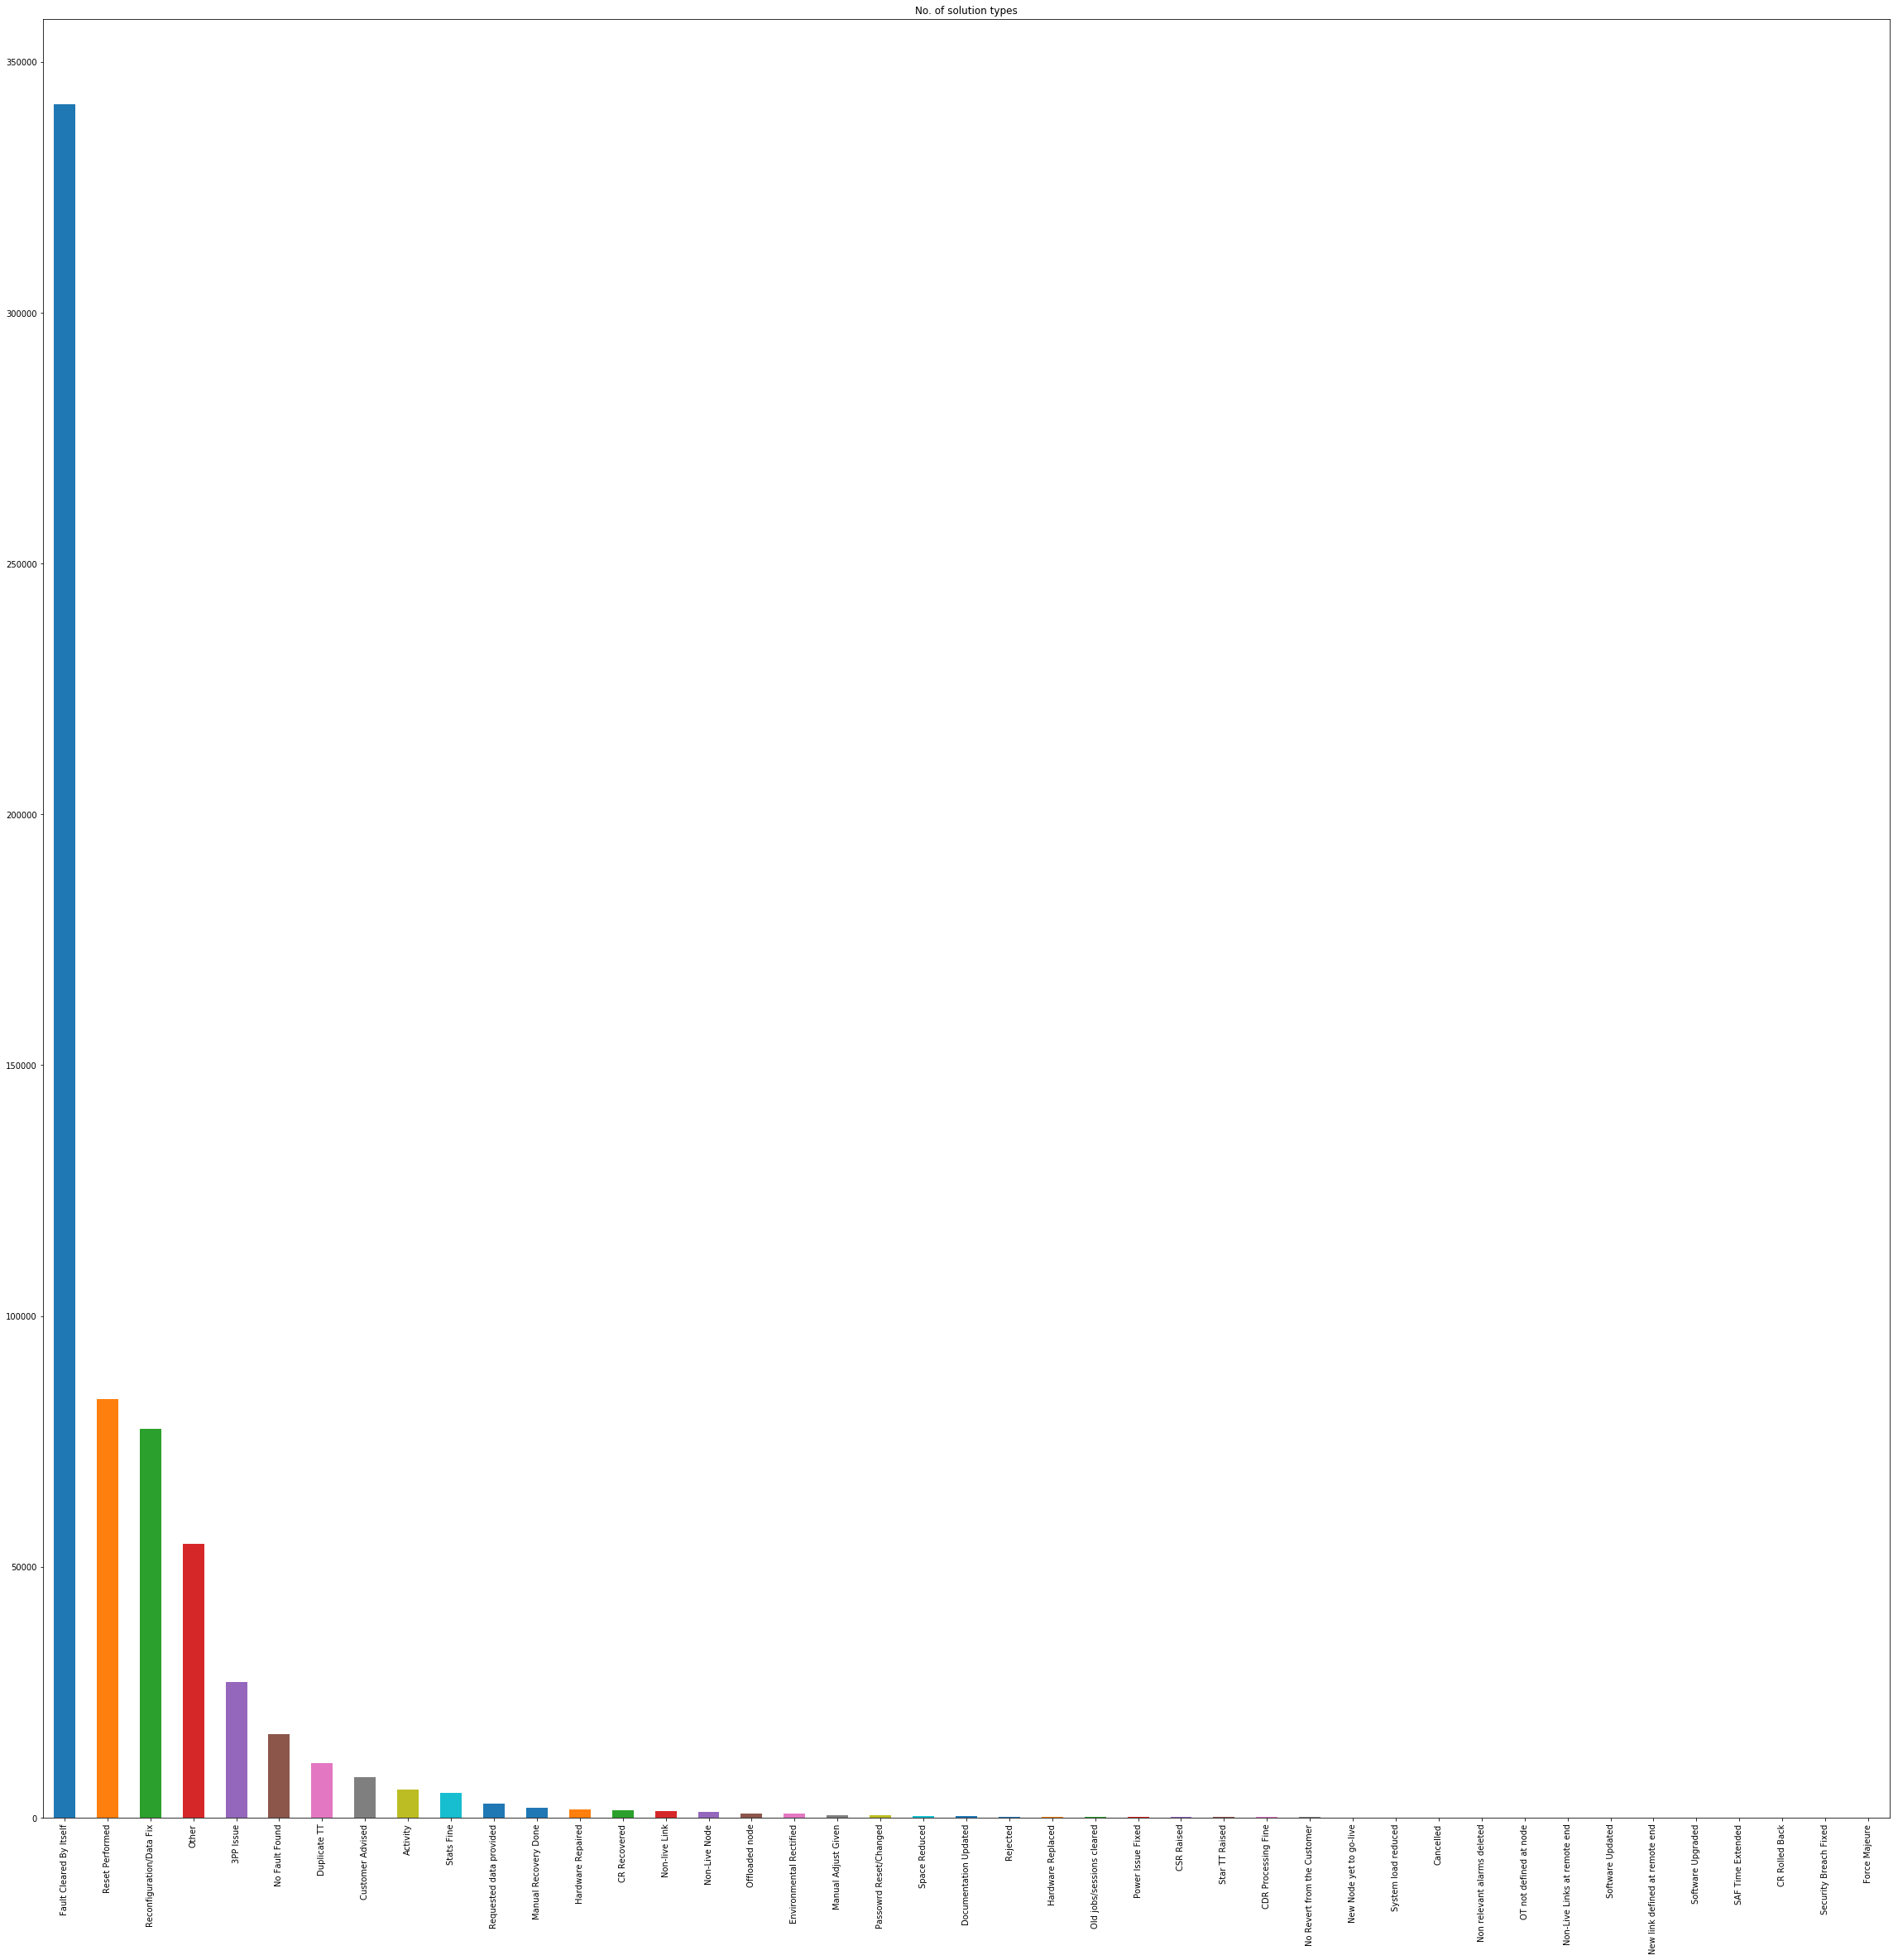

In [53]:
# Checking the number of tickets for each solution
tickets_solution = df['Action Code - TT'].value_counts()

# plot the bar graph for visualization
ticket_solution_plot = tickets_solution.plot(kind='bar', figsize=(40,40), title='No. of solution types')
plt.savefig('solution type.jpg')


Action Code - TT         Latest Priority - TT 
3PP Issue                Critical                 12357
                         Major                    11260
                         Minor                     2675
                         Non-service affecting      799
Activity                 Critical                   937
                         Major                     2237
                         Minor                     1805
                         Non-service affecting      573
CDR Processing Fine      Critical                     9
                         Major                       61
                         Minor                       24
                         Non-service affecting       18
CR Recovered             Critical                     1
                         Major                        6
                         Minor                     1512
                         Non-service affecting        3
CR Rolled Back           Minor                        2
 

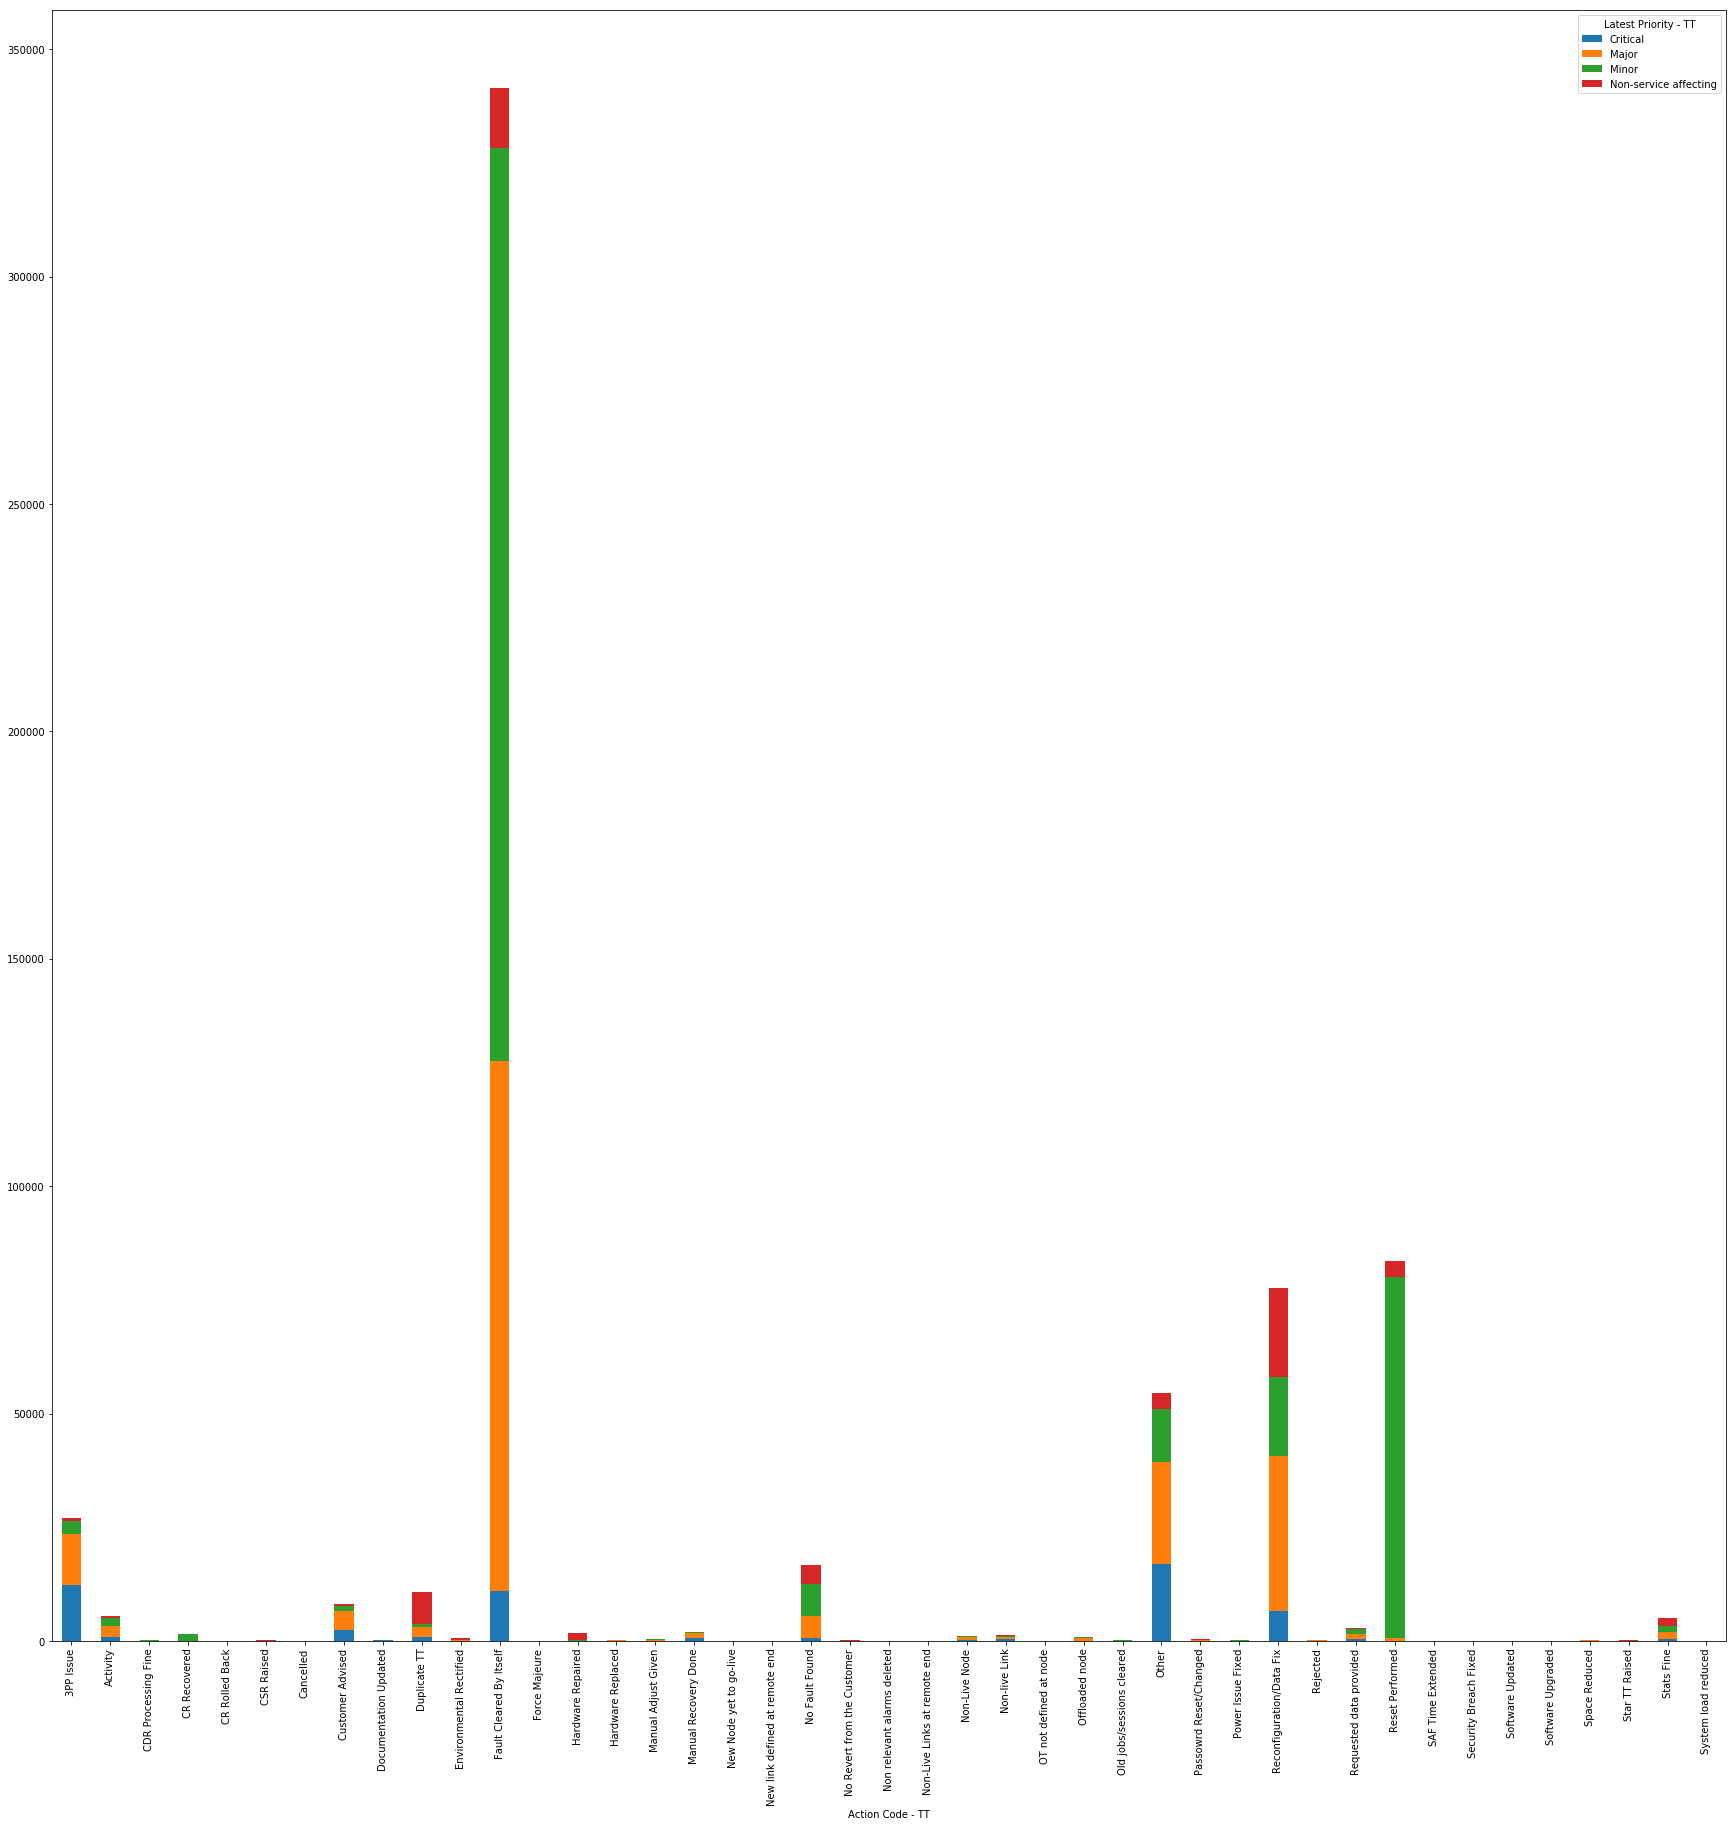

In [54]:
# Now lets see no of Major and Minor tickets with respect to each category
group_ticket_priority_with_per_solution_tickets = df.groupby(['Action Code - TT','Latest Priority - TT'])['Latest Priority - TT'].count()
print(group_ticket_priority_with_per_solution_tickets)
df.groupby(['Action Code - TT','Latest Priority - TT']).size().unstack().plot(kind='bar', stacked=True, figsize=(30,30))
plt.savefig('solution type vs priority.jpg')

In [5]:
major_contribution_df = df.loc[df['Action Code - TT']=='Fault Cleared By Itself']

In [9]:
# Now lets see no of Major and Minor tickets for Fault cleared by Itself
group_ticket_priority_vs_Fault_cleared_by_self = major_contribution_df.groupby(['Assign to Group Name - TT','Latest Priority - TT'])['Latest Priority - TT'].count()
print(group_ticket_priority_vs_Fault_cleared_by_self)

Assign to Group Name - TT      Latest Priority - TT 
1st LA PM FO Delhi             Major                        1
AIRTEL_BO_MPBN_EAST BO Delhi   Critical                    16
                               Major                     2841
                               Minor                      242
                               Non-service affecting       13
AIRTEL_BO_MPBN_NORTH BO Delhi  Critical                     2
                               Major                     4603
                               Minor                      116
                               Non-service affecting      178
AIRTEL_BO_MPBN_SOUTH BO Delhi  Major                     1531
                               Minor                       58
                               Non-service affecting       11
AIRTEL_BO_MPBN_WEST BO Delhi   Critical                     9
                               Major                      475
                               Minor                       20
BHARTI_L1PM FO De

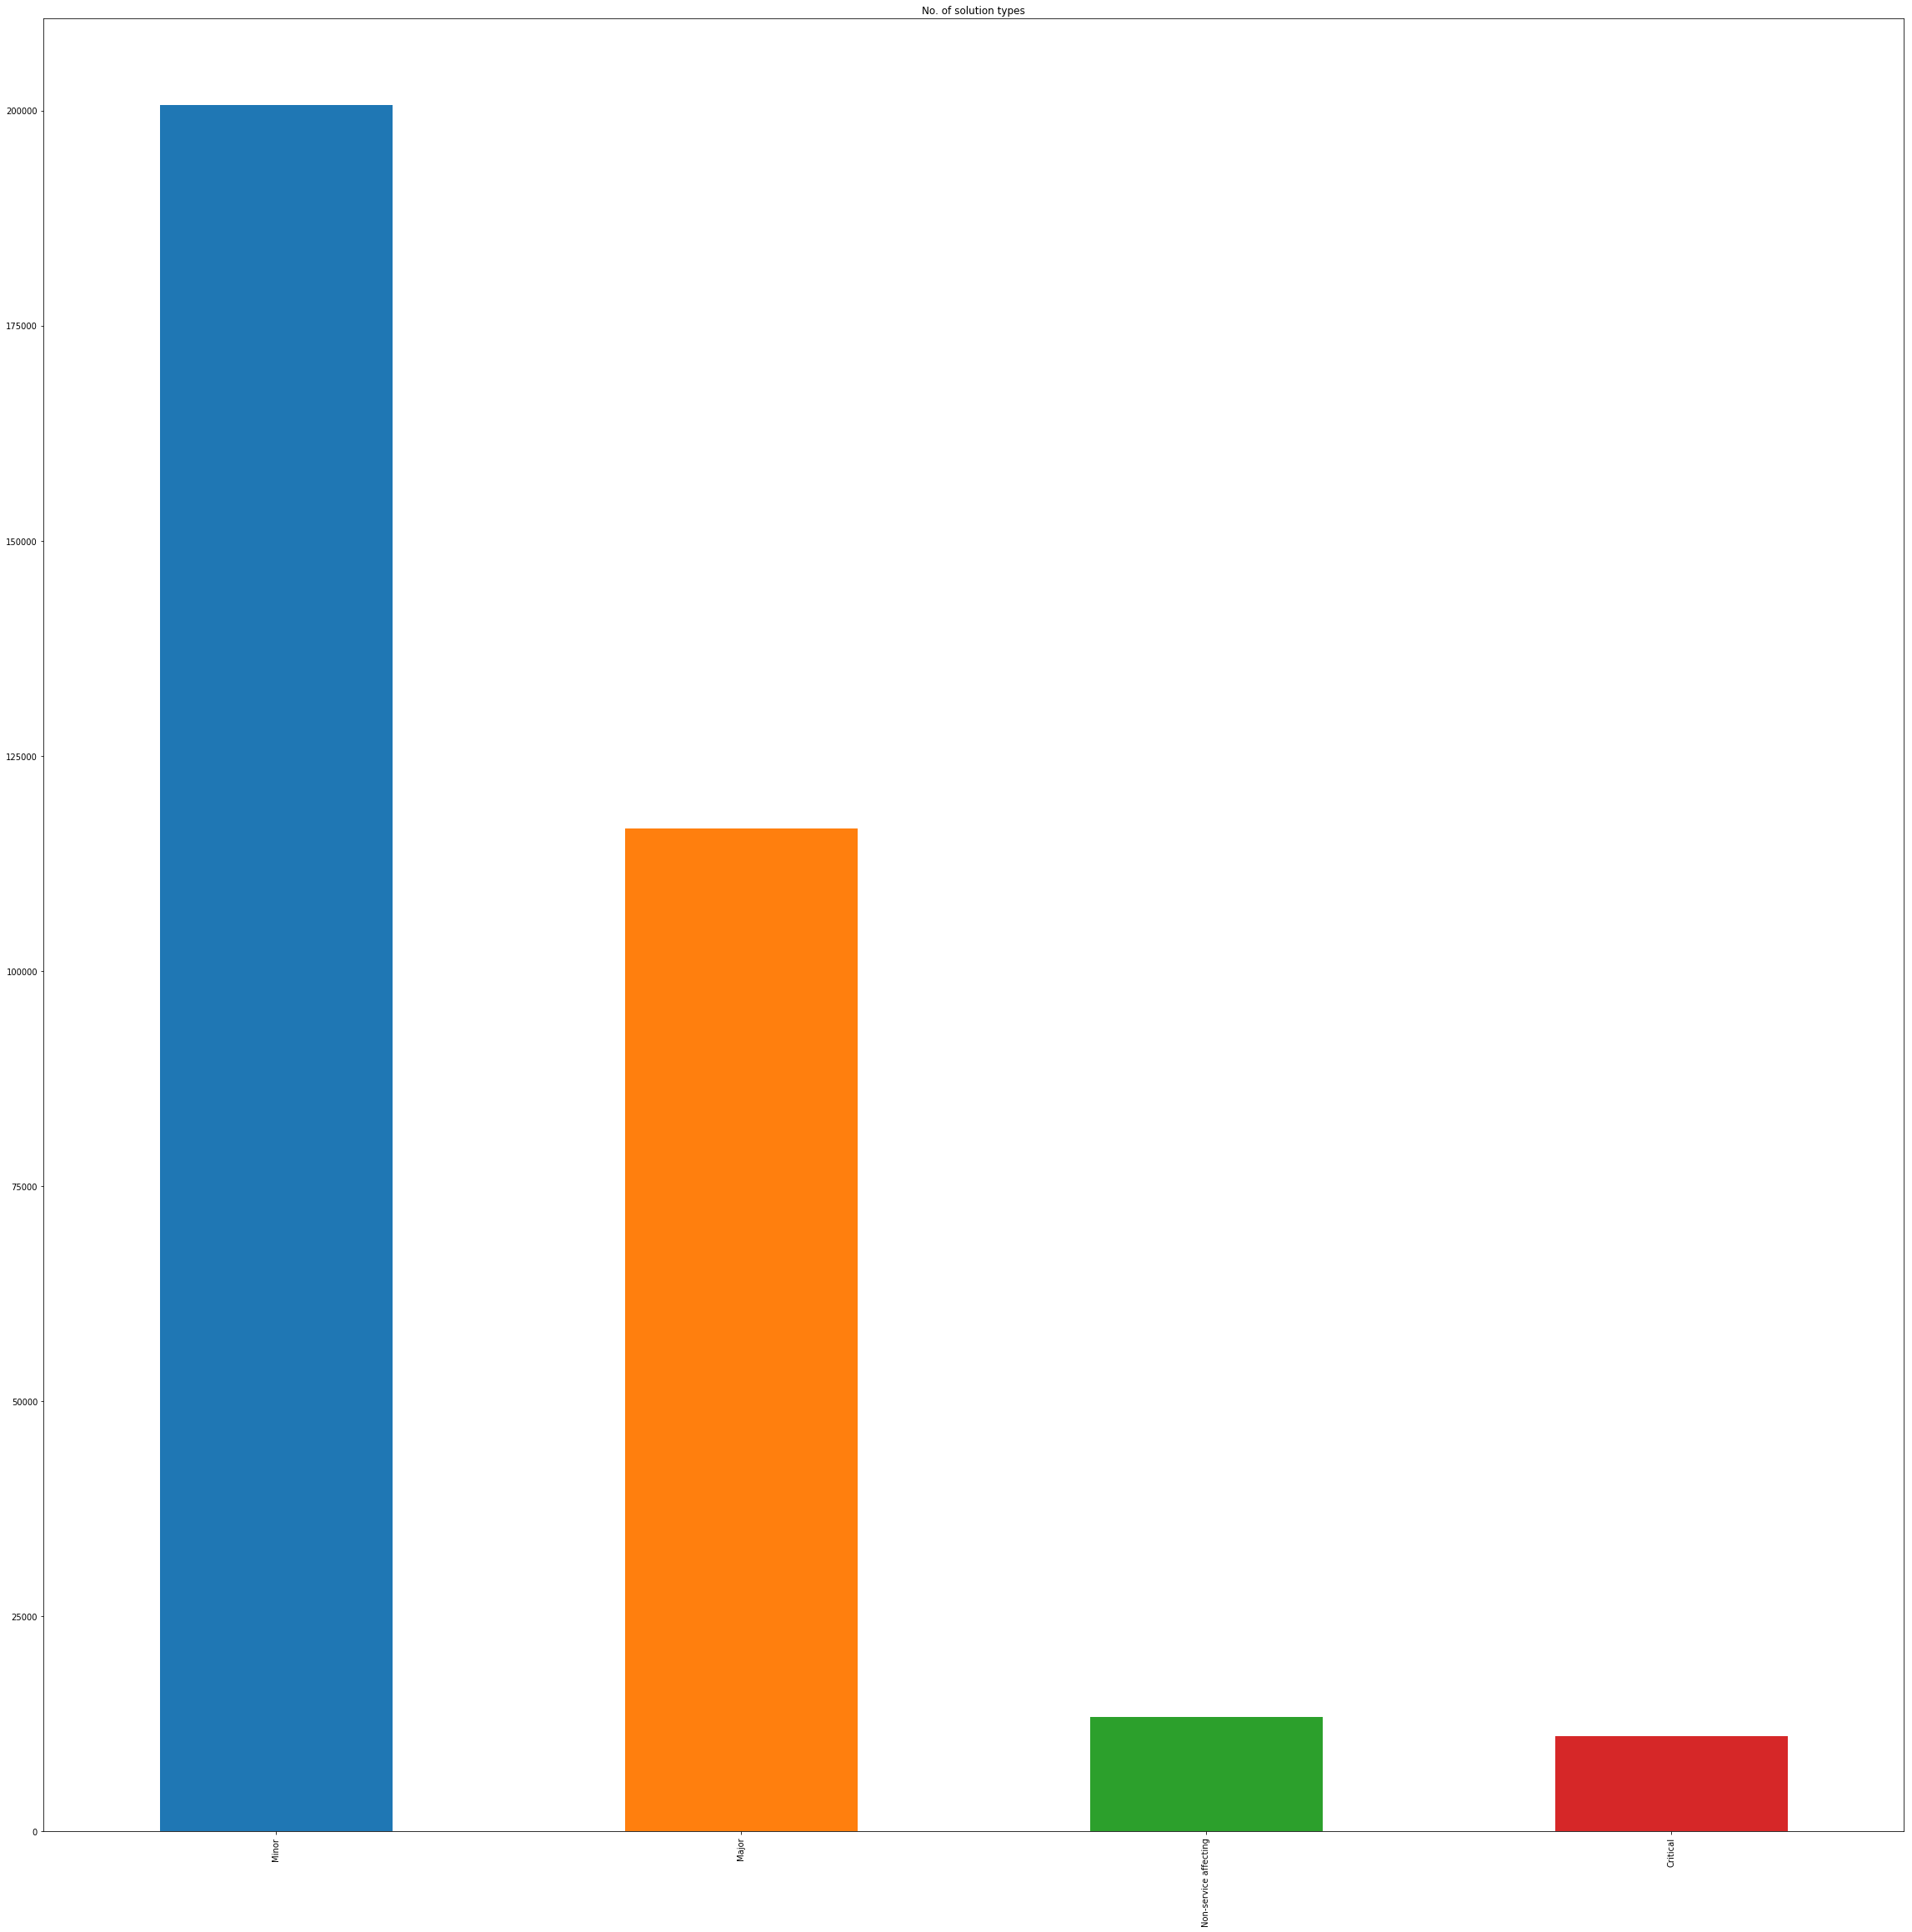

In [55]:
# Priority for fault self cleared
priority_for_FCS = major_contribution_df['Latest Priority - TT'].value_counts()

# plot the bar graph for visualization
priority_for_FCS_plot = priority_for_FCS.plot(kind='bar', figsize=(40,40), title='No. of solution types')
plt.savefig('priority details for FSC.jpg')


Assign to Group Name - TT
1st LA PM FO Delhi                    1
AIRTEL_BO_MPBN_EAST BO Delhi       3112
AIRTEL_BO_MPBN_NORTH BO Delhi      4899
AIRTEL_BO_MPBN_SOUTH BO Delhi      1600
AIRTEL_BO_MPBN_WEST BO Delhi        504
BHARTI_L1PM FO Delhi                701
BHARTI_L1PM_NSS FO Delhi           2634
BO RAN_L1 BO Delhi                59381
BO RAN_L2 BO Delhi                14533
BO-TXN-BHARTI BO Delhi               55
CORE NORTH BO Delhi                3855
CORE SOUTH BO India                1959
CORE_EAST_WEST_Bharti BO Delhi     6135
Core FO India                         1
FM_BSS FO India                   42684
FM_NSS FO India                    4374
IN NORTH BO India                    40
IN NORTH Central BO India            62
IN_EAST1_KOL_WB_DELHI              1561
IN_EAST2_BHR_DELHI                 2308
IN_EAST3_OR_AS_NE_DELHI            1239
IN_NCR_UPE BO India                  82
IN_SOUTH_AP_DELHI                     4
IN_SOUTH_KK_DELHI                     2
IN_SOUTH_KTN_D

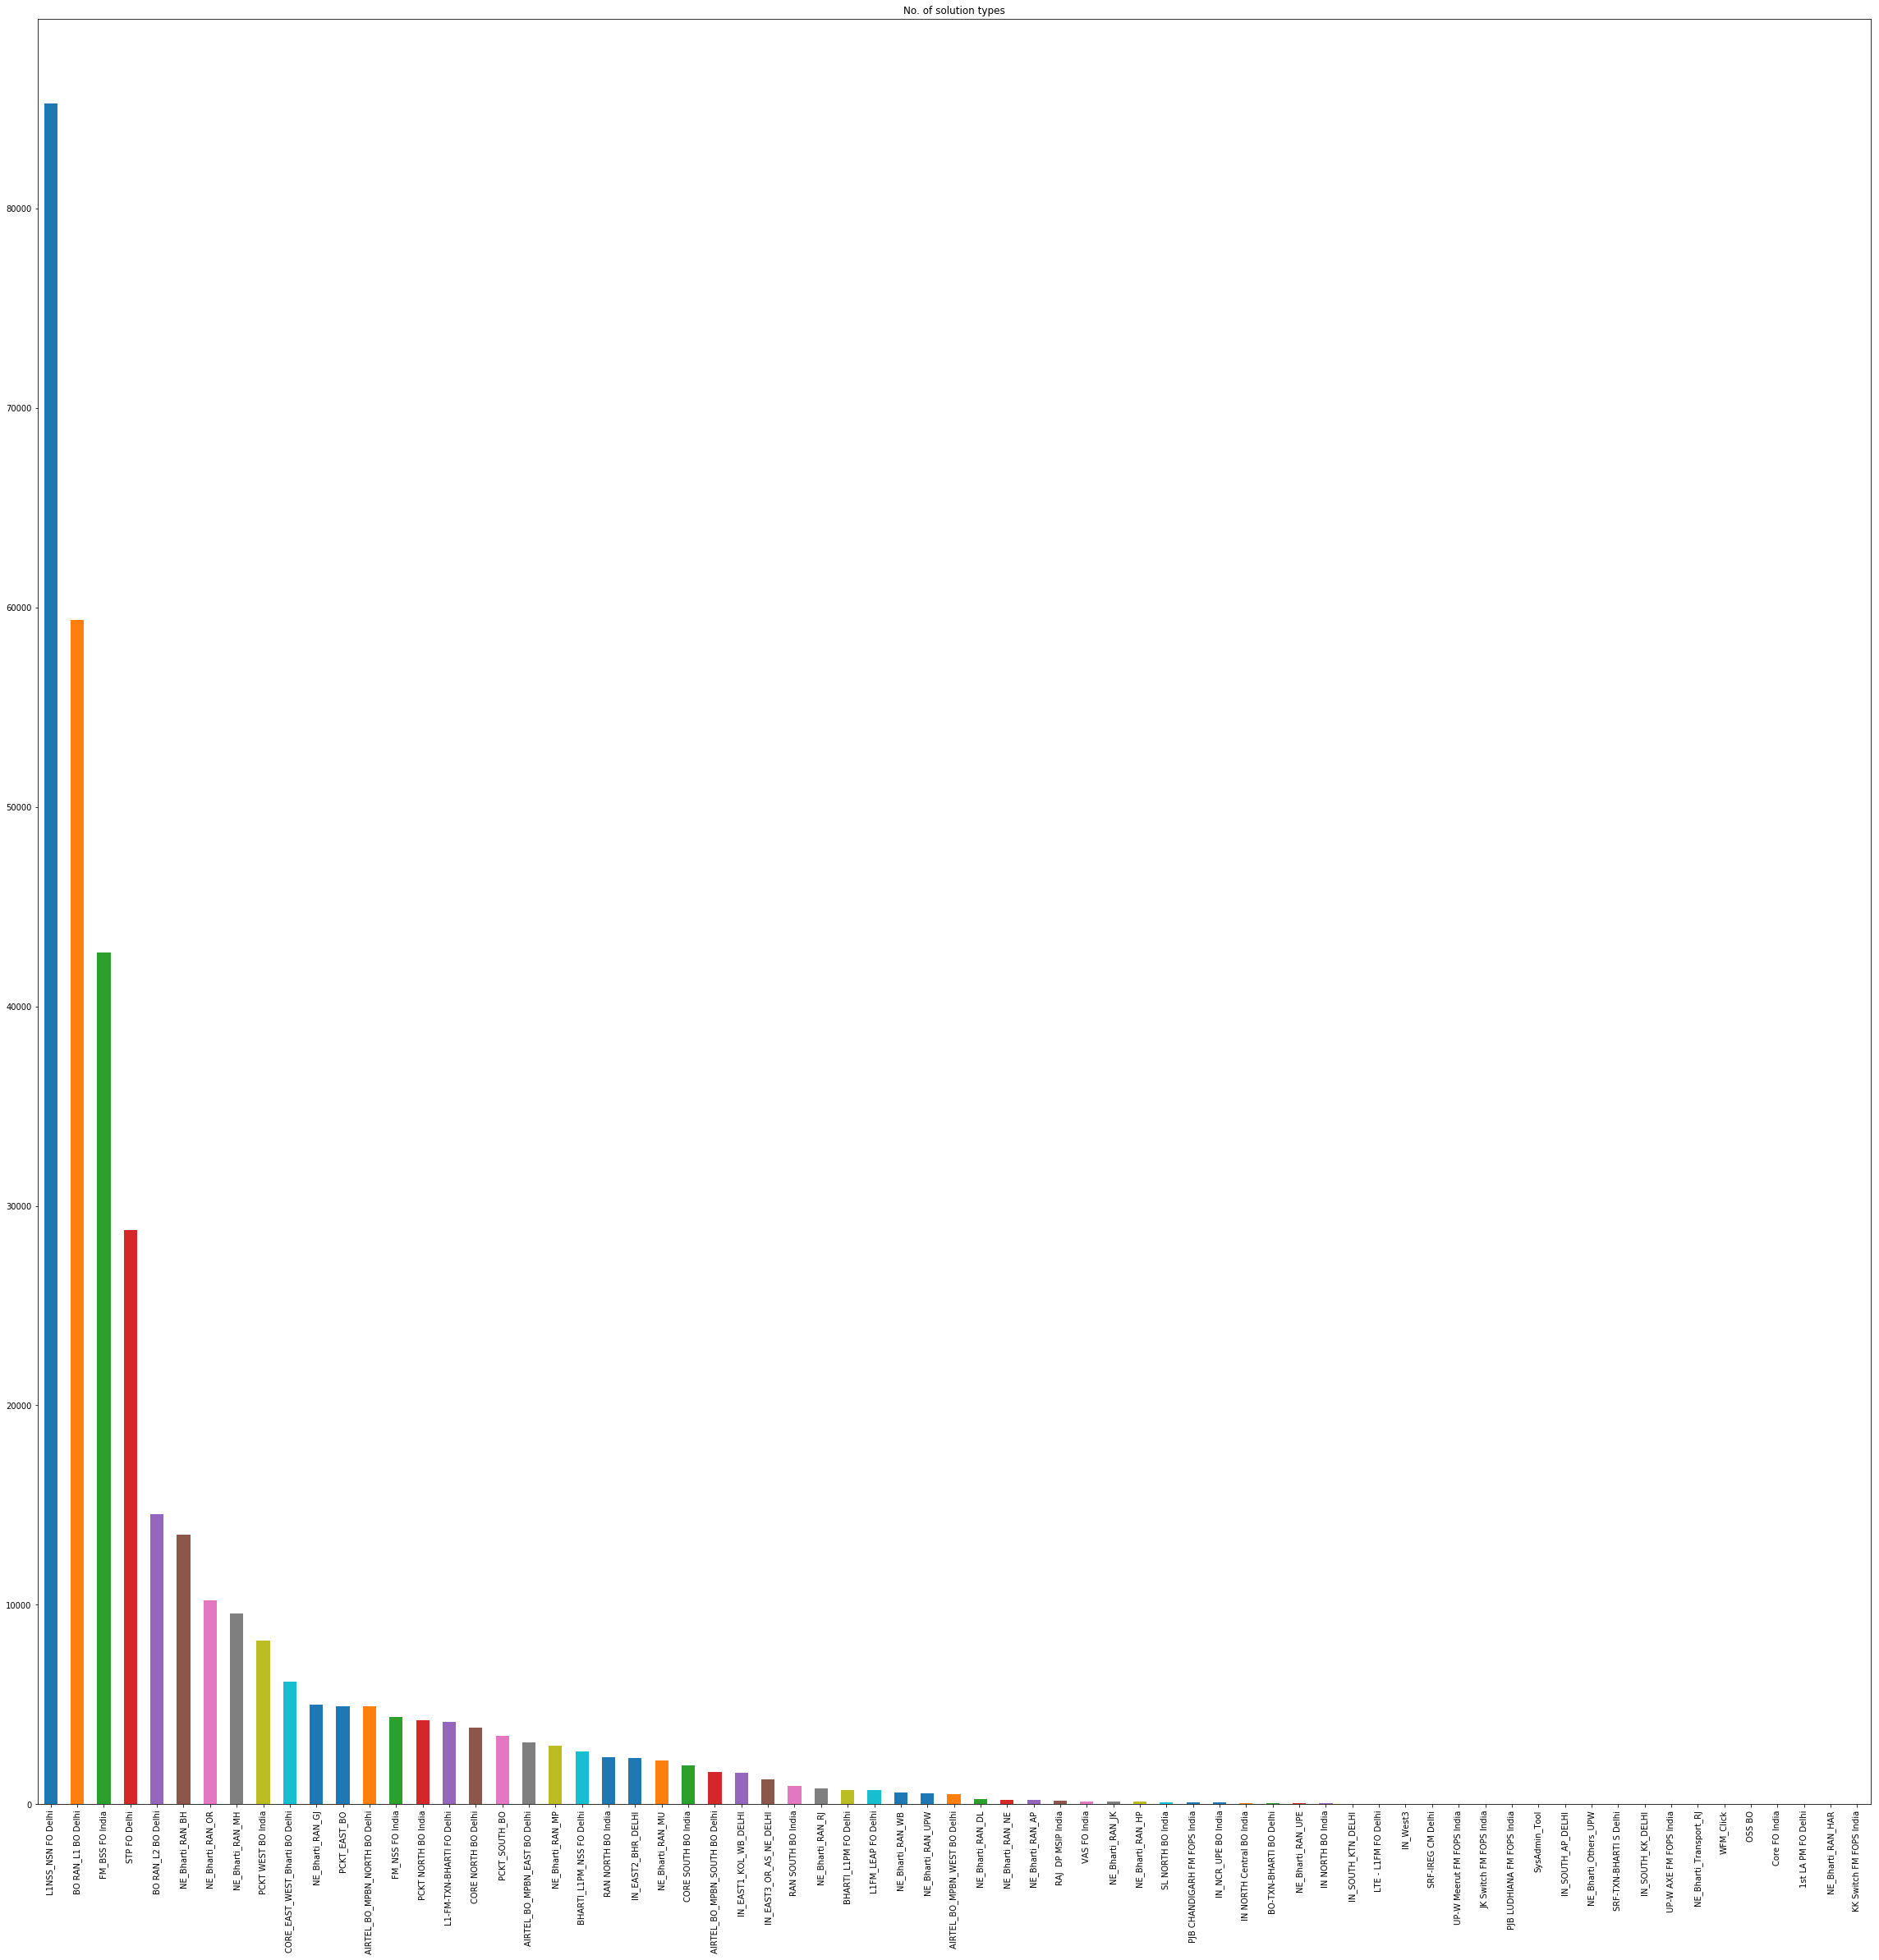

In [56]:
# Group Names for fault self cleared
assigned_groups_for_FCS = major_contribution_df['Assign to Group Name - TT'].value_counts()

# plot the bar graph for visualization
assigned_groups_for_FCS_plot = assigned_groups_for_FCS.plot(kind='bar', figsize=(40,40), title='No. of solution types')

# Now lets see no of groups for Fault cleared by Itself
assigned_groups_vs_Fault_cleared_by_self = major_contribution_df.groupby(['Assign to Group Name - TT'])['Latest Priority - TT'].count()
print(assigned_groups_vs_Fault_cleared_by_self)

plt.savefig('group details for FSC.jpg')

In [13]:
# deep dive into the SOlution type analysis
# find the mean value of the action code 

action_code_average = tickets_solution.mean()
print('Mean value of action_code_count {}'.format(action_code_average))

Mean value of action_code_count 15010.162790697674


Fault Cleared By Itself     341521
Reset Performed              83475
Reconfiguration/Data Fix     77559
Other                        54552
3PP Issue                    27091
No Fault Found               16698
Name: Action Code - TT, dtype: int64


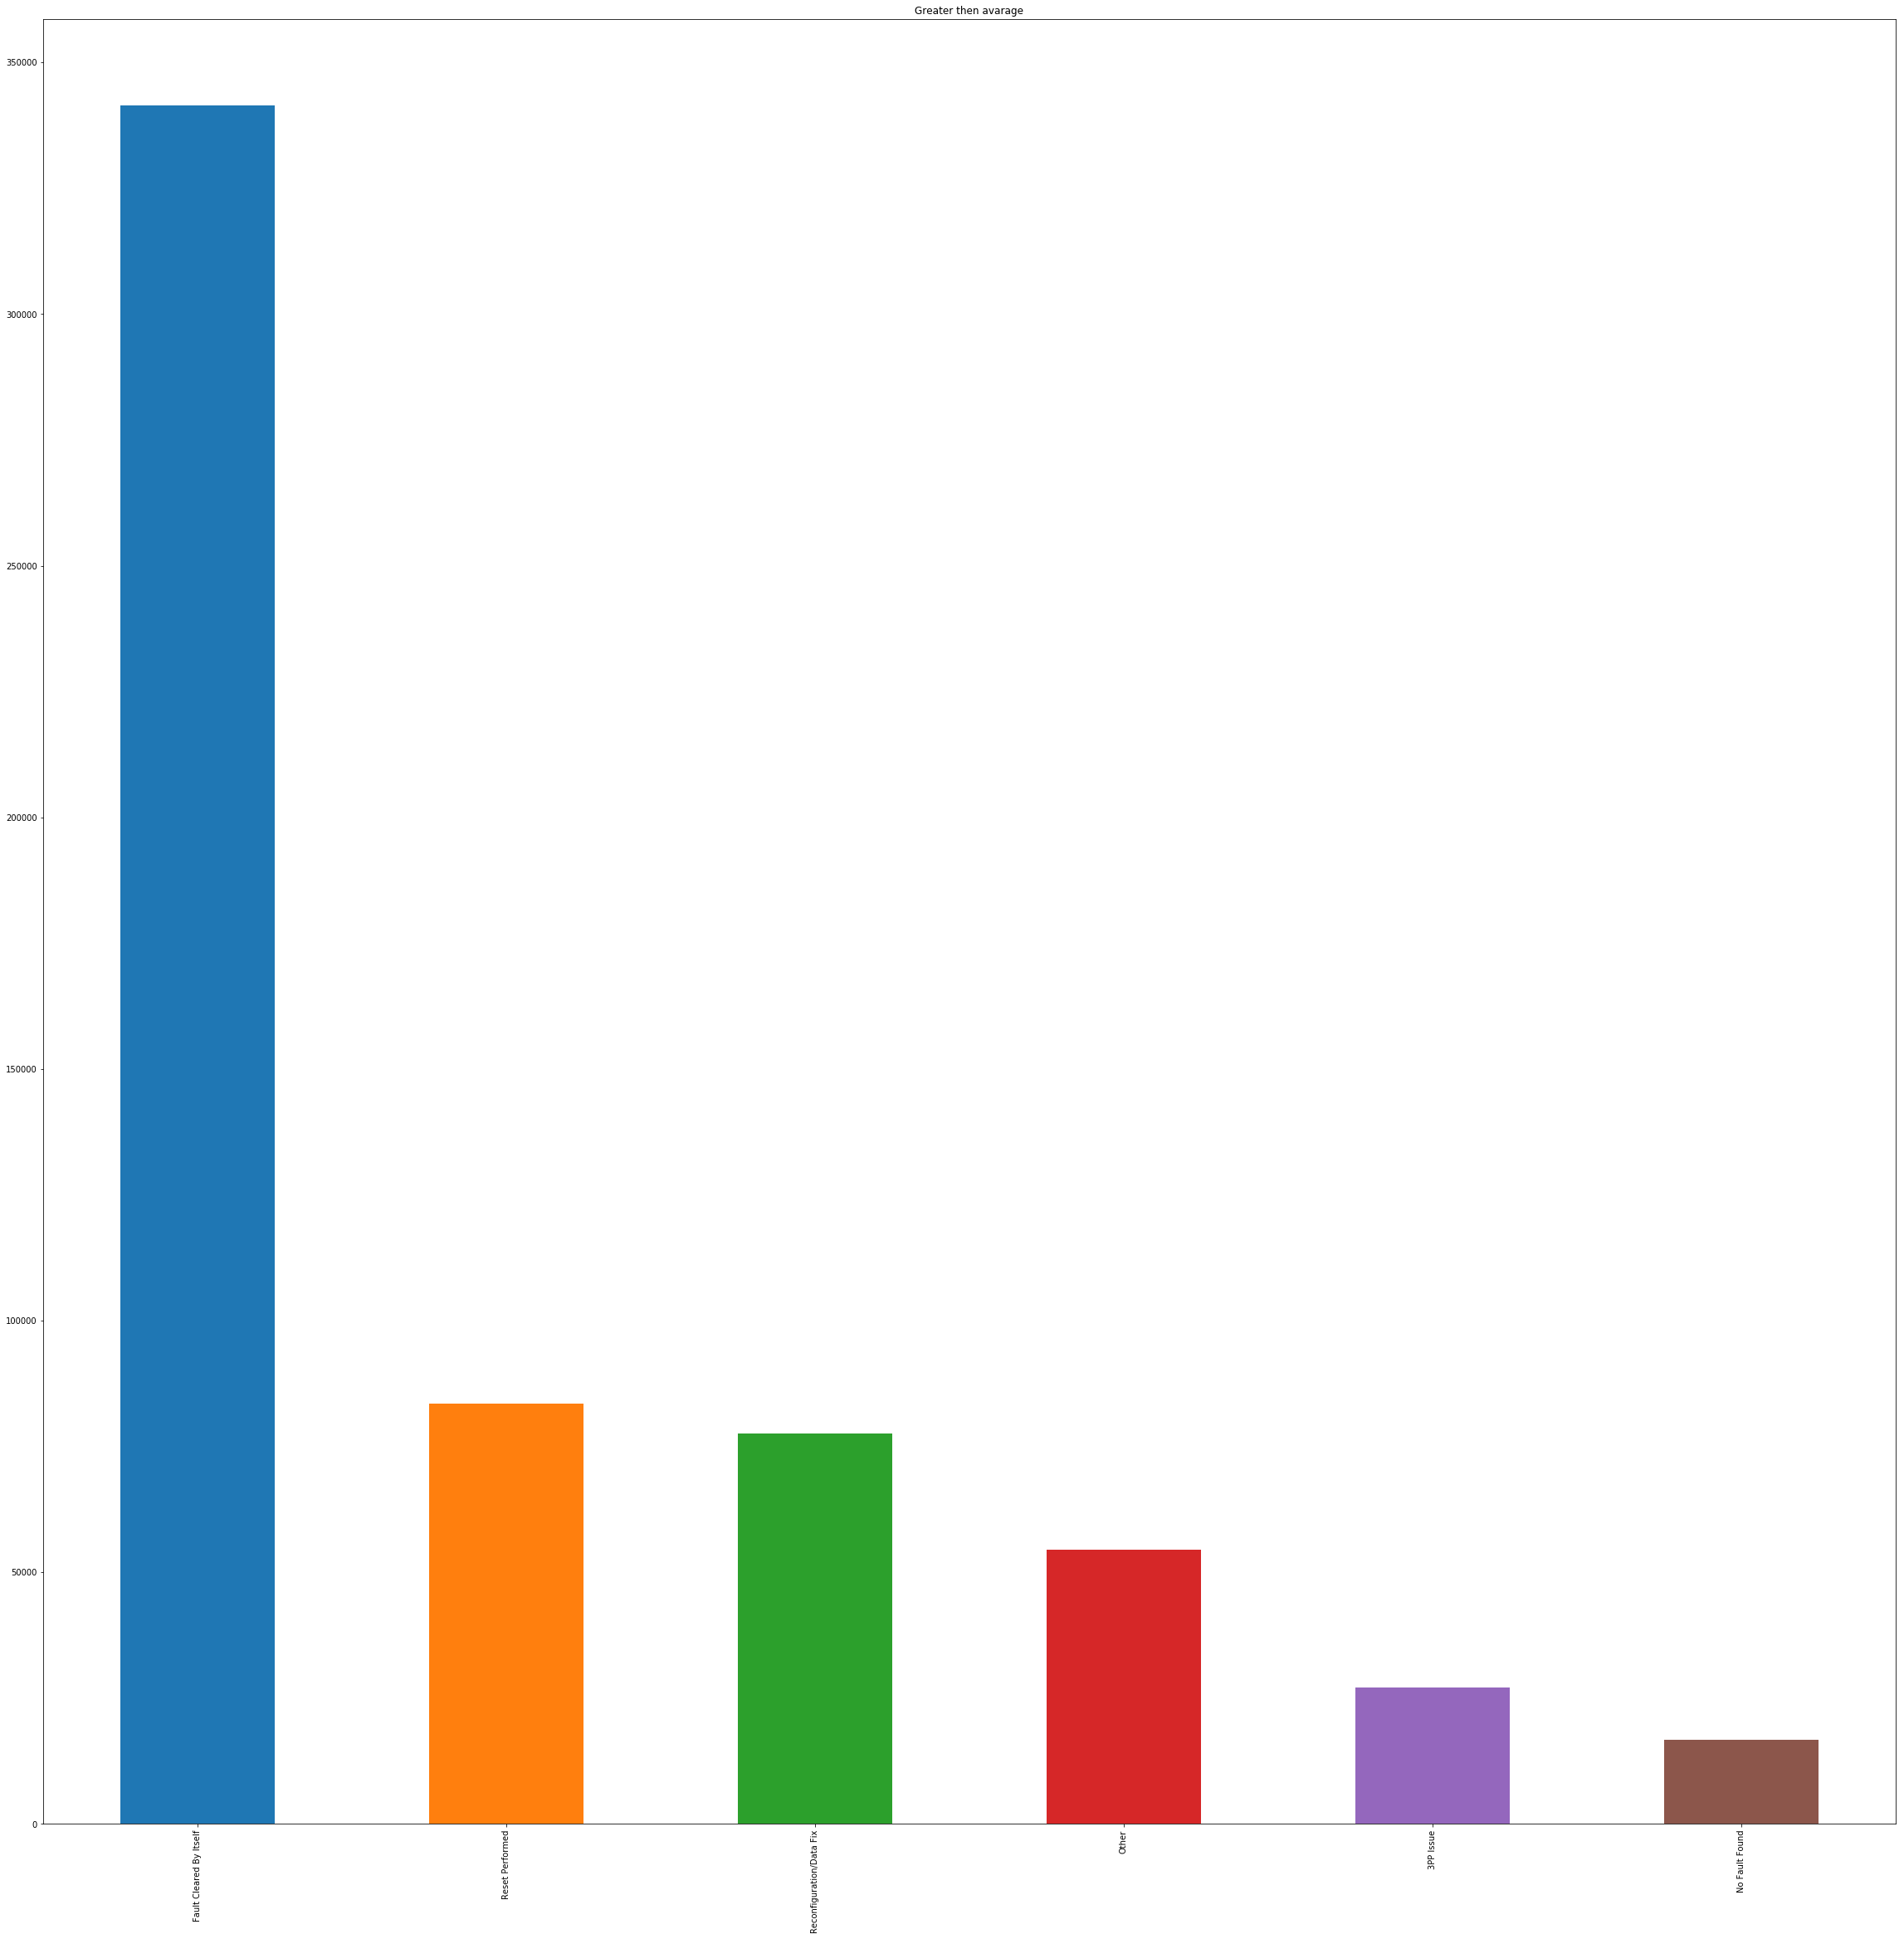

In [57]:
# find the action codes greater then 15010 and plotting them
action_code_greater_then_average = tickets_solution[tickets_solution > action_code_average]
print(action_code_greater_then_average)
action_code_greater_then_average.plot(kind='bar', figsize=(40,40), title='Greater then avarage')

plt.savefig('action code greater than avg.jpg')



KeyError: False

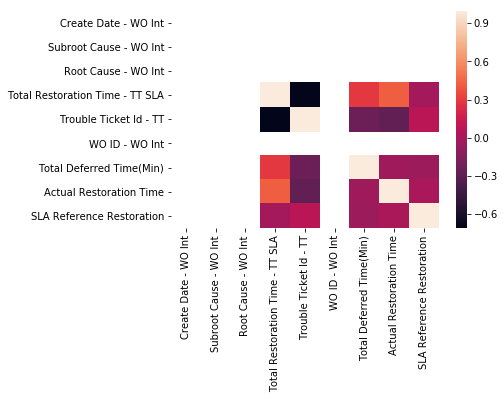

In [58]:
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.savefig('correlation matrix.jpg')